In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Chargement des fichiers avec échantillonnage
x_train = pd.read_csv("archive/x_train_sncf.csv")
y_train = pd.read_csv("archive/y_train_sncf.csv")

x_train,y_train

(               date station  job  ferie  vacances
 0        2015-01-01     1J7    1      1         1
 1        2015-01-01     O2O    1      1         1
 2        2015-01-01     8QR    1      1         1
 3        2015-01-01     UMC    1      1         1
 4        2015-01-01     FK3    1      1         1
 ...             ...     ...  ...    ...       ...
 1229858  2022-12-31     V2P    0      0         1
 1229859  2022-12-31     N9K    0      0         1
 1229860  2022-12-31     P6E    0      0         1
 1229861  2022-12-31     BDC    0      0         1
 1229862  2022-12-31     W14    0      0         1
 
 [1229863 rows x 5 columns],
                   index     y
 0        2015-01-01_1J7     7
 1        2015-01-01_O2O     0
 2        2015-01-01_8QR     9
 3        2015-01-01_UMC     9
 4        2015-01-01_FK3    28
 ...                 ...   ...
 1229858  2022-12-31_V2P  1227
 1229859  2022-12-31_N9K   544
 1229860  2022-12-31_P6E    92
 1229861  2022-12-31_BDC    91
 1229862  2022-1

In [134]:
# Fusion des datasets 
x_train["key"] = x_train["date"] + "_" + x_train["station"]
y_train["key"] = y_train["index"]
train_data = x_train.merge(y_train, on="key").drop(columns=["index", "key"])
x_train_data_lissage = train_data.copy()

train_data

date station  job  ferie  vacances     y
0        2015-01-01     1J7    1      1         1     7
1        2015-01-01     O2O    1      1         1     0
2        2015-01-01     8QR    1      1         1     9
3        2015-01-01     UMC    1      1         1     9
4        2015-01-01     FK3    1      1         1    28
...             ...     ...  ...    ...       ...   ...
1229858  2022-12-31     V2P    0      0         1  1227
1229859  2022-12-31     N9K    0      0         1   544
1229860  2022-12-31     P6E    0      0         1    92
1229861  2022-12-31     BDC    0      0         1    91
1229862  2022-12-31     W14    0      0         1    18

[1229863 rows x 6 columns]

# Analyse Exploratoire de Données

In [10]:
train_data.describe()

date           job         ferie  \
count                        1229863  1.229863e+06  1.229863e+06   
mean   2018-12-29 15:14:03.275389440  7.171587e-01  2.986105e-02   
min              2015-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2016-12-30 00:00:00  0.000000e+00  0.000000e+00   
50%              2018-12-21 00:00:00  1.000000e+00  0.000000e+00   
75%              2021-01-04 00:00:00  1.000000e+00  0.000000e+00   
max              2022-12-31 00:00:00  1.000000e+00  1.000000e+00   
std                              NaN  4.503801e-01  1.702040e-01   

           vacances             y  
count  1.229863e+06  1.229863e+06  
mean   3.395712e-01  3.930904e+03  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.180000e+02  
50%    0.000000e+00  1.108000e+03  
75%    1.000000e+00  4.249000e+03  
max    1.000000e+00  2.084090e+05  
std    4.735639e-01  9.683394e+03

In [11]:
train_data.isna().sum()

date        0
station     0
job         0
ferie       0
vacances    0
y           0
dtype: int64

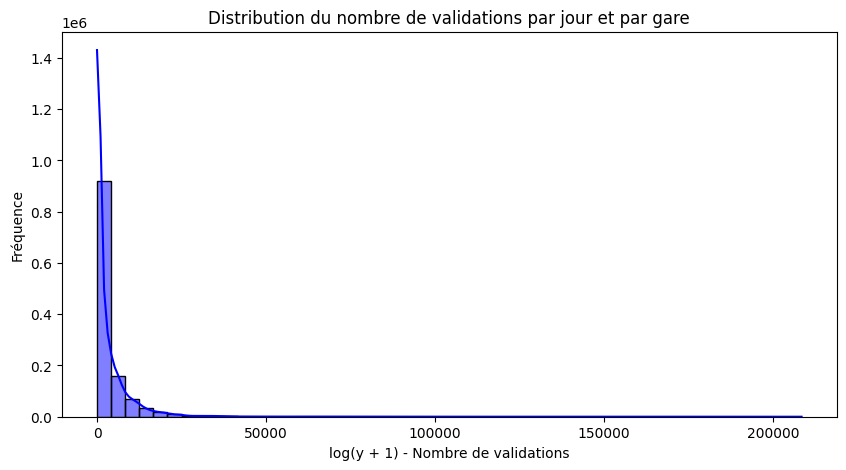

In [ ]:
# Vérification de la distribution de y 
plt.figure(figsize=(10, 5))
sns.histplot((train_data["y"]), bins=50, kde=True, color="blue")
plt.xlabel("log(y + 1) - Nombre de validations")
plt.ylabel("Fréquence")
plt.title("Distribution du nombre de validations par jour et par gare")
plt.show()

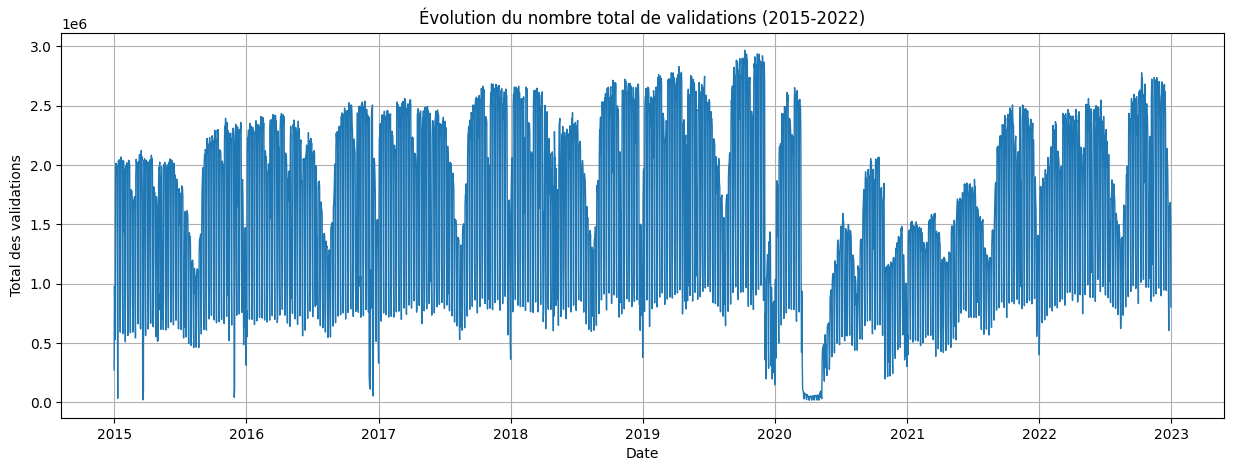

In [141]:
# Vérification de la tendance temporelle globale
train_data["date"] = pd.to_datetime(train_data["date"])
daily_validations = train_data.groupby("date")["y"].sum()

plt.figure(figsize=(15, 5))
plt.plot(daily_validations, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Total des validations")
plt.title("Évolution du nombre total de validations (2015-2022)")
plt.grid()
plt.show()

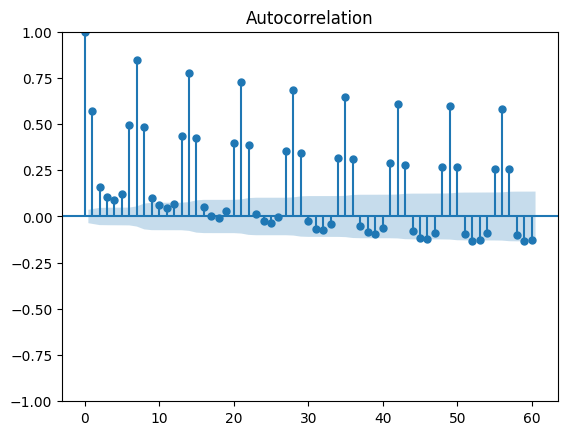

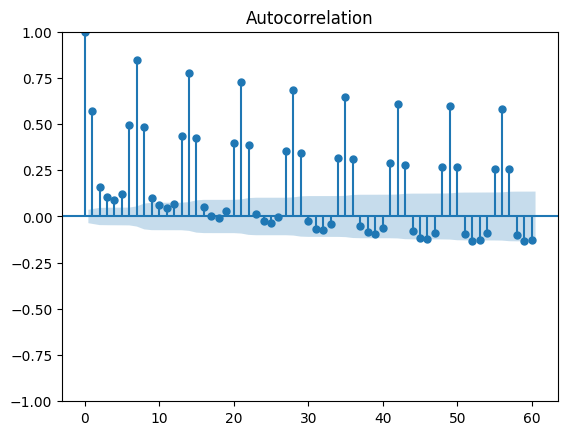

In [143]:
from statsmodels.graphics.tsaplots import plot_acf

# Moyenne des y par date
mean_series = train_data.groupby('date')['y'].mean()

plot_acf(mean_series, lags=60)

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/20136190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data.sort_values('date', inplace=True)


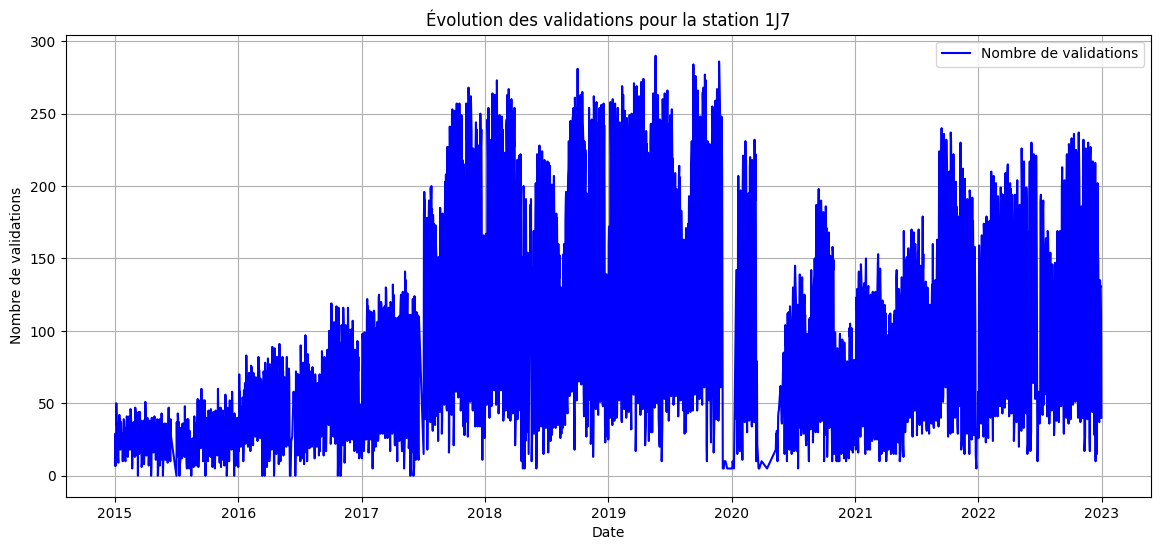

In [137]:
# Filtrer les données pour la station "1J7"
station_data = train_data[train_data['station'] == '1J7']
station_data.sort_values('date', inplace=True)
# Tracer les données
plt.figure(figsize=(14, 6))
plt.plot(station_data['date'], station_data['y'], label='Nombre de validations', color='blue')
plt.xlabel('Date')
plt.ylabel('Nombre de validations')
plt.title('Évolution des validations pour la station 1J7')
plt.legend()
plt.grid(True)
plt.show()

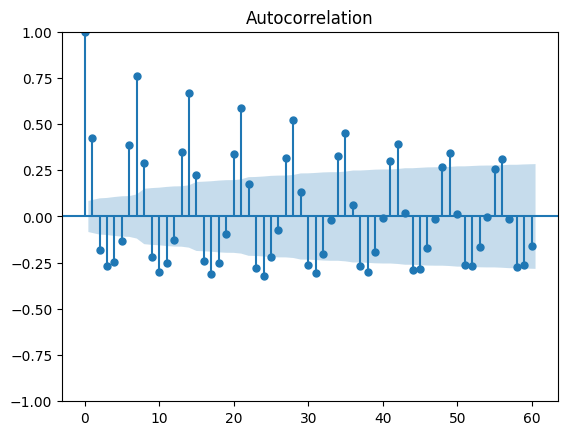

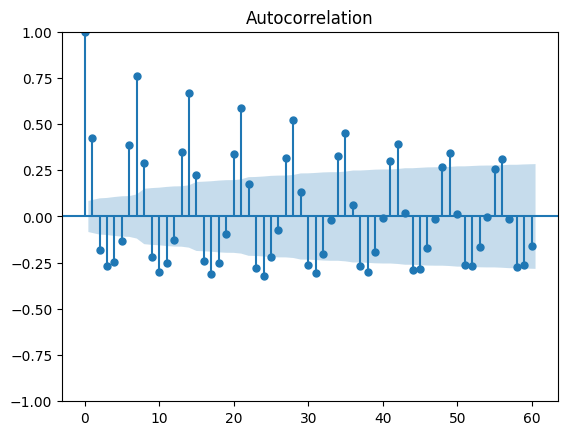

In [191]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(station_data.groupby('date')['y'].mean(), lags=60)

1. Analyse Globale des Tendances
Évolution annuelle du nombre total de validations
- Agréger les validations (y) par année.
- Tracer une courbe pour voir la tendance globale 

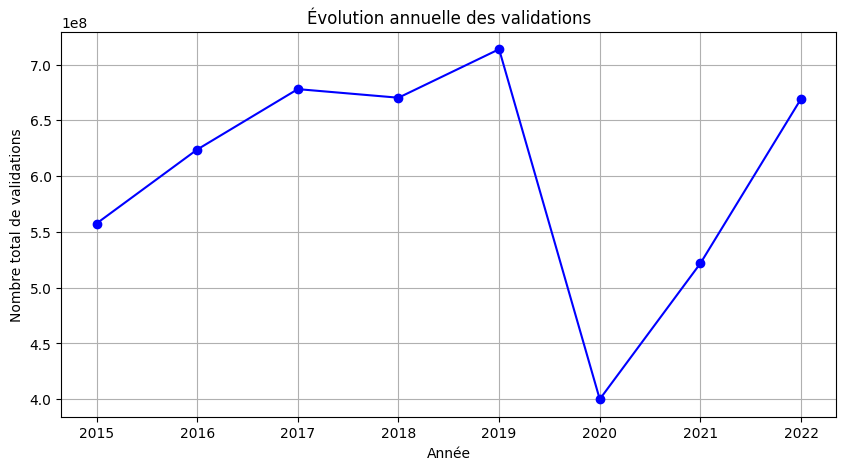

In [12]:
# Conversion de la date en datetime
train_data["date"] = pd.to_datetime(train_data["date"])

# Agrégation annuelle
df_yearly = train_data.groupby(train_data["date"].dt.year)["y"].sum()

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(df_yearly.index, df_yearly.values, marker="o", linestyle="-", color="b")
plt.title("Évolution annuelle des validations")
plt.xlabel("Année")
plt.ylabel("Nombre total de validations")
plt.grid()
plt.show()

2. Analyse Hebdomadaire (Effet JOB et week-end)

- Calculer la moyenne des validations par jour de la semaine.
- Comparer les JOB (lundi-vendredi) vs week-end (samedi-dimanche).

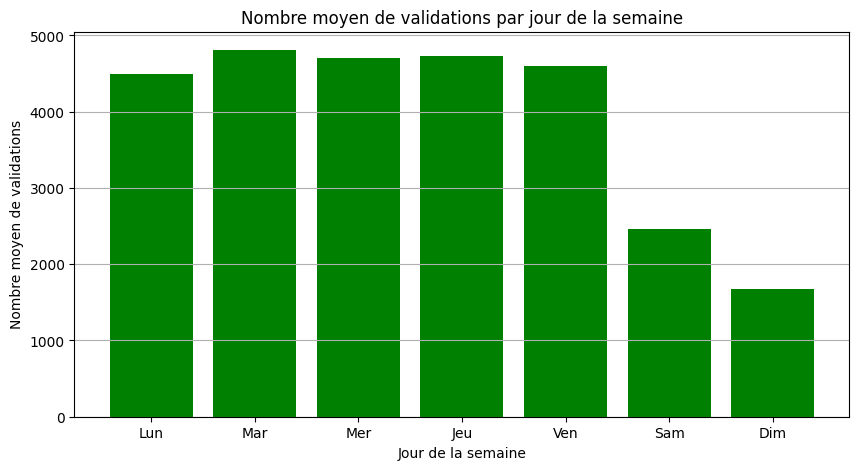

In [13]:
# Ajouter la colonne du jour de la semaine (0 = lundi, 6 = dimanche)
train_data["weekday"] = train_data["date"].dt.dayofweek

# Moyenne par jour de la semaine
df_weekly = train_data.groupby("weekday")["y"].mean()

# Tracé du graphique
plt.figure(figsize=(10, 5))
plt.bar(["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"], df_weekly, color="g")
plt.title("Nombre moyen de validations par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre moyen de validations")
plt.grid(axis="y")
plt.show()


3. Impact des Jours Fériés et Vacances
- Comparer la moyenne des validations jours fériés vs non fériés.
- Comparer la moyenne des validations période scolaire vs vacances.

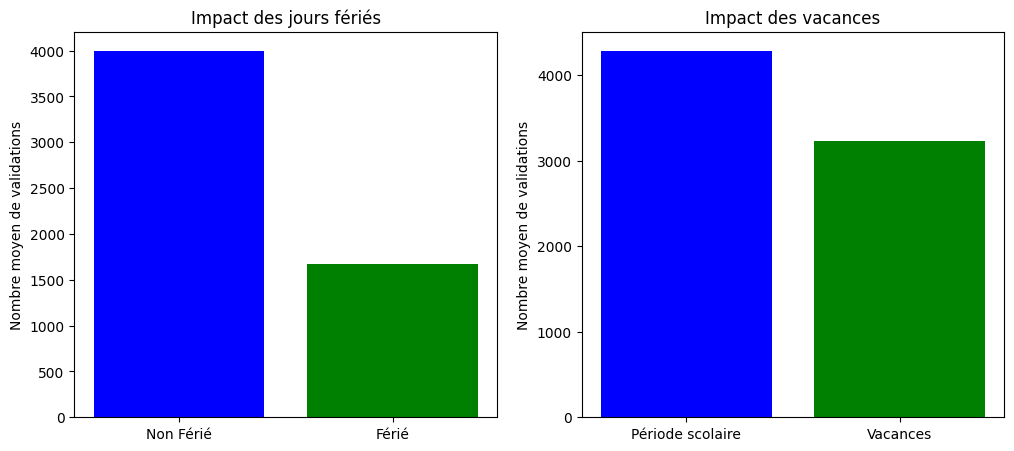

In [15]:
# Comparaison fériés vs non fériés
df_ferie = train_data.groupby("ferie")["y"].mean()
df_vacances = train_data.groupby("vacances")["y"].mean()

# Affichage
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(["Non Férié", "Férié"], df_ferie, color=["blue", "green"])
ax[0].set_title("Impact des jours fériés")
ax[0].set_ylabel("Nombre moyen de validations")

ax[1].bar(["Période scolaire", "Vacances"], df_vacances, color=["blue", "green"])
ax[1].set_title("Impact des vacances")
ax[1].set_ylabel("Nombre moyen de validations")

plt.show()


4. Analyse Saisonnalité Mensuelle
   
On s’attend à une variation saisonnière (été et fin d’année avec moins de validations).

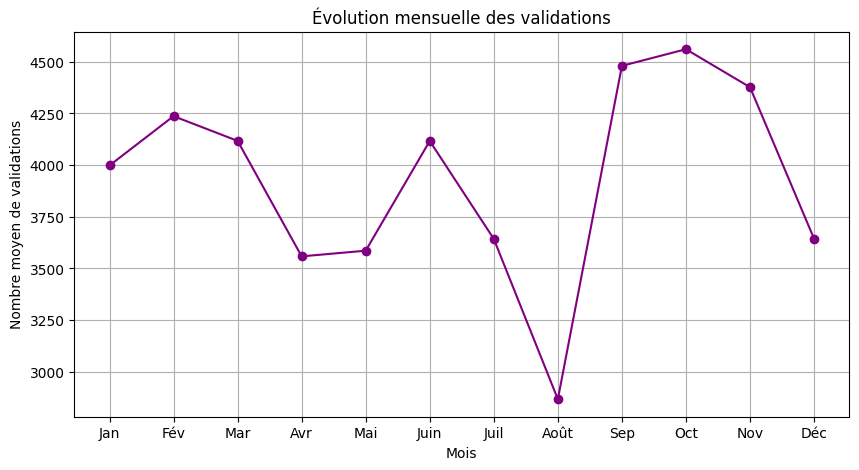

In [17]:
# Moyenne par mois
train_data["month"] = train_data["date"].dt.month
df_monthly = train_data.groupby("month")["y"].mean()

# Tracé du graphique
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), df_monthly, marker="o", linestyle="-", color="purple")
plt.xticks(range(1, 13), ["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sep", "Oct", "Nov", "Déc"])
plt.title("Évolution mensuelle des validations")
plt.xlabel("Mois")
plt.ylabel("Nombre moyen de validations")
plt.grid()
plt.show()


# Méthode benchemark

**Score public : 177**

In [ ]:
import pandas as pd


train_data = pd.read_csv("archive/x_train_sncf2.csv")
file_path = "archive/x_test_sncf.csv"
test_data = pd.read_csv(file_path)

# Assurer que les dates sont bien en format datetime
test_data['date'] = pd.to_datetime(test_data['date'])

# Charger les données historiques (train jusqu'à 31 décembre 2022)
train_data['date'] = pd.to_datetime(train_data['date'])

# Créer la correspondance 2023 -> 2022
test_data['date_2022'] = test_data['date'] - pd.DateOffset(years=1)

# 1️⃣ **Fusionner avec 2022 en priorité**
merged_data = test_data.merge(train_data[['date', 'station', 'y']], 
                              left_on=['date_2022', 'station'], 
                              right_on=['date', 'station'], 
                              how='left')

#
merged_data.rename(columns={'y': 'y_pred'}, inplace=True)

# Vérifier combien de valeurs manquantes restent
print("Nombre de NaN après fusion avec 2022 :", merged_data['y_pred'].isna().sum())


Nombre de NaN après fusion avec 2022 : 2214


In [ ]:

if merged_data['y_pred'].isna().sum() > 0:
    # Créer la correspondance avec 2021 et 2022
    train_data['date_target'] = train_data['date'] + pd.DateOffset(years=1)

    # Calcul de la moyenne par station et date pour 2021 & 2022
    mean_y_per_date = train_data.groupby(['date_target', 'station'])['y'].mean().reset_index()

    # Compléter les NaN en fusionnant avec la moyenne historique
    merged_data = merged_data.merge(mean_y_per_date, 
                                    left_on=['date_x', 'station'], 
                                    right_on=['date_target', 'station'], 
                                    how='left')

    # Remplir les NaN restants avec cette moyenne
    merged_data['y_pred'].fillna(merged_data['y'], inplace=True)

    # Vérifier combien de valeurs sont toujours manquantes
    print("Nombre de NaN après fallback sur 2021-2022 :", merged_data['y_pred'].isna().sum())

if merged_data['y_pred'].isna().sum() > 0:
    median_per_station = train_data.groupby('station')['y'].median()
    merged_data['y_pred'].fillna(merged_data['station'].map(median_per_station), inplace=True)

    print("Nombre de NaN après correction finale :", merged_data['y_pred'].isna().sum())



Nombre de NaN après fallback sur 2021-2022 : 2214
Nombre de NaN après correction finale : 0


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_26504/1195921151.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['y_pred'].fillna(merged_data['y'], inplace=True)
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_26504/1195921151.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [29]:
merged_data = merged_data[['index', 'y_pred']]
merged_data.rename(columns={'y_pred': 'y'}, inplace=True)

In [30]:
merged_data

index       y
0      2023-01-01_1J7    26.0
1      2023-01-01_O2O    15.0
2      2023-01-01_8QR    23.0
3      2023-01-01_L58    15.0
4      2023-01-01_UMC    39.0
...               ...     ...
78647  2023-05-31_N9K  1189.0
78648  2023-05-31_P6E   121.0
78649  2023-05-31_BDC    88.0
78650  2023-05-31_QD6   131.5
78651  2023-05-31_W14    35.5

[78652 rows x 2 columns]

In [67]:
# Exporter les prédictions finales
merged_data[['index', 'y']].to_csv("benchemarkk_predictions_sncf_2023.csv", index=False)
print("Fichier de soumission généré : predictions_sncf_2023.csv")

Fichier de soumission généré : predictions_sncf_2023.csv


# Méthode basée sur les tendances historiques

On peut utiliser les tendances historiques pour prédire les validations futures. C'est a dire qu'on regarde l'évolution sur les dernières années par station et ensuite on les ajoute à la valeur de y 2022 pour prédire les validations de 2023.

**Score public : 349,5272992791666**

In [ ]:
import pandas as pd


# Convertir la colonne 'date' en format datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Définir les périodes pour voir l'évolution depuis le 01/01/2021
start_2021 = train_data[(train_data['date'] >= '2021-01-01') & (train_data['date'] <'2021-12-31')]
end_2022 = train_data[(train_data['date'] >= '2022-01-01') & (train_data['date'] <= '2022-12-31')]

# Calculer la moyenne de 'y' par station pour les années 2021 et 2022
mean_y_by_station_2021 = start_2021.groupby('station')['y'].mean()
mean_y_by_station_2022 = end_2022.groupby('station')['y'].mean()

# Calculer l'augmentation en pourcentage pour chaque station
increase_percentage_by_station = ((mean_y_by_station_2022 - mean_y_by_station_2021) / mean_y_by_station_2021) * 100

increase_percentage_by_station = pd.DataFrame(increase_percentage_by_station).reset_index()
increase_percentage_by_station.rename(columns={'y': 'increase_percentage'}, inplace=True)

increase_percentage_by_station

station  increase_percentage
0       003            16.313972
1       033            73.001462
2       034            67.774893
3       09U            46.566112
4       0CM            19.614635
..      ...                  ...
434     Z76            24.184553
435     ZII            24.671278
436     ZIK            35.656079
437     ZSR            30.423501
438     ZXY            38.761190

[439 rows x 2 columns]

In [15]:
import pandas as pd

file_path = "archive/x_train_sncf2.csv"
train_data = pd.read_csv(file_path)
# Charger le jeu de test (2023)
test_file_path = "archive/x_test_sncf.csv"
test_data = pd.read_csv(test_file_path)

# Convertir la colonne 'date' en format datetime
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Sélectionner uniquement les données de 2021 et 2022
data_2021 = train_data[(train_data['date'] >= '2021-01-01') & (train_data['date'] <= '2021-12-31')]
data_2022 = train_data[(train_data['date'] >= '2022-01-01') & (train_data['date'] <= '2022-12-31')]

# Calculer la moyenne de `y` par station pour 2021 et 2022
mean_y_by_station_2021 = data_2021.groupby('station')['y'].mean()
mean_y_by_station_2022 = data_2022.groupby('station')['y'].mean()

# Calculer le pourcentage d'augmentation par station
increase_percentage_by_station = ((mean_y_by_station_2022 - mean_y_by_station_2021) / mean_y_by_station_2021) * 100
increase_percentage_by_station

station
003    16.411820
033    72.986626
034    67.619281
09U    46.690497
0CM    19.836361
         ...    
Z76    24.257452
ZII    24.801820
ZIK    35.762182
ZSR    30.553459
ZXY    38.829830
Name: y, Length: 439, dtype: float64

In [16]:
# Fusionner l'augmentation avec les données de 2022
data_2022 = data_2022.merge(increase_percentage_by_station.rename('increase_percentage'), on='station', how='left')

# Remplacer les NaN par la médiane des augmentations des autres stations
median_increase = increase_percentage_by_station.median()
data_2022['increase_percentage'].fillna(median_increase, inplace=True)

# Calculer `y_pred` en appliquant l'augmentation de chaque station
data_2022['y_pred'] = data_2022['y'] * (1 + data_2022['increase_percentage'] / 100)



# Vérifier s'il reste des NaN
print("Nombre de NaN après correction :", data_2022['increase_percentage'].isna().sum())
# Vérifier les résultats
print(data_2022[['date', 'station', 'y', 'y_pred', 'increase_percentage']].head())

Nombre de NaN après correction : 0
        date station    y      y_pred  increase_percentage
0 2022-01-01     7NG  255  318.057960            24.728612
1 2022-01-01     222  689  912.651497            32.460304
2 2022-01-01     1TE  132  170.872155            29.448602
3 2022-01-01     CYD  280  393.196476            40.427313
4 2022-01-01     GN3  271  418.135199            54.293431


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/3275293456.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_2022['increase_percentage'].fillna(median_increase, inplace=True)


In [18]:
# Associer chaque date 2023 avec sa date correspondante en 2022 (même jour, même station)
test_data['date_2022'] = test_data['date'] - pd.DateOffset(years=1)

# Fusionner avec les valeurs prédictives de `y` en 2022
test_data = test_data.merge(data_2022[['date', 'station', 'y_pred']], 
                            left_on=['date_2022', 'station'], 
                            right_on=['date', 'station'], 
                            how='left', 
                            suffixes=('', '_2022'))

# Renommer la colonne finale
test_data.rename(columns={'y_pred': 'y_pred_2023'}, inplace=True)

# Vérifier les NaN restants
print("Nombre de valeurs manquantes après fusion :", test_data['y_pred_2023'].isna().sum())

# Si des valeurs sont NaN (ex: stations manquantes), on peut utiliser la médiane d'augmentation
test_data['y_pred_2023'].fillna(test_data['station'].map(data_2022.groupby('station')['y_pred'].median()), inplace=True)

# Vérifier la distribution des prédictions
print(test_data[['date', 'station', 'y_pred_2023']].head())


Nombre de valeurs manquantes après fusion : 2214
        date station  y_pred_2023
0 2023-01-01     1J7    31.669136
1 2023-01-01     O2O    20.931151
2 2023-01-01     8QR    35.759875
3 2023-01-01     L58    20.207356
4 2023-01-01     UMC    41.372203


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/1130880526.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['y_pred_2023'].fillna(test_data['station'].map(data_2022.groupby('station')['y_pred'].median()), inplace=True)


In [20]:
test_data.rename(columns={'y_pred_2023': 'y'}, inplace=True)
test_data[['index', 'y']].to_csv("predictions_sncf_2023_avec_increase.csv", index=False)

# ARIMA par station

**Score public : 255,81330456748285**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path = "archive/x_train_sncf2.csv"
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])

forecast_all_stations = []

# Boucle sur chaque gare sélectionnée
for station in df['station'].unique():
    try:
        # Filtrer les données pour cette gare
        df_station = df[df['station'] == station].set_index('date')

        # Ajuster un modèle SARIMA
        sarima_model = SARIMAX(df_station['y'], order=(1,1,1), seasonal_order=(1,1,1,12),
                               enforce_stationarity=False, enforce_invertibility=False)
        sarima_result = sarima_model.fit(disp=False)

        # Faire des prévisions pour Janvier 2023 à Juin 2023
        future_dates = pd.date_range(start="2023-01-01", end="2023-06-30", freq='D')
        forecast = sarima_result.get_forecast(steps=len(future_dates))
        forecast_values = forecast.predicted_mean

        # Stocker les prévisions
        forecast_df = pd.DataFrame({'date': future_dates, 'station': station, 'y_pred': forecast_values.values})
        forecast_all_stations.append(forecast_df)
    
    except Exception as e:
        print(f"Erreur pour la gare {station}: {e}")

# Fusionner toutes les prévisions en un seul DataFrame
final_forecast_df = pd.concat(forecast_all_stations, ignore_index=True)

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, callin

In [124]:
final_forecast_df.sort_values( 'date', inplace=True)
final_forecast_df

date station        y_pred
0     2023-01-01     1J7     81.263195
70409 2023-01-01     7NG    331.761394
78373 2023-01-01     48S   1537.404673
1086  2023-01-01     0S9    705.429780
63531 2023-01-01     NWM    275.207779
...          ...     ...           ...
51403 2023-06-30     KY6   2960.226872
28054 2023-06-30     YJK    366.716244
23167 2023-06-30     2T1  10604.021070
46878 2023-06-30     651    538.736069
79458 2023-06-30     QD6   1217.968502

[79459 rows x 3 columns]

In [134]:
final_forecast_df['index']= final_forecast_df['date'].astype(str) + "_" + final_forecast_df['station']
final_forecast_df = final_forecast_df[['index', 'y_pred']]
final_forecast_df.rename(columns={'y_pred': 'y'}, inplace=True)
final_forecast_df

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/54868498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_forecast_df.rename(columns={'y_pred': 'y'}, inplace=True)


index             y
0      2023-01-01_1J7     81.263195
70409  2023-01-01_7NG    331.761394
78373  2023-01-01_48S   1537.404673
1086   2023-01-01_0S9    705.429780
63531  2023-01-01_NWM    275.207779
...               ...           ...
51403  2023-06-30_KY6   2960.226872
28054  2023-06-30_YJK    366.716244
23167  2023-06-30_2T1  10604.021070
46878  2023-06-30_651    538.736069
79458  2023-06-30_QD6   1217.968502

[79459 rows x 2 columns]

In [201]:
test_csv = pd.read_csv("archive/x_test_sncf.csv")

submit = test_csv.merge(final_forecast_df, on='index', how='left')
submit = submit[['index', 'y']]
submit.shape

submit.to_csv("predictions_sncf_2023_sarima_par_gare.csv", index=False)

# Méthode avec un ajout de la variable binaire covid

**Score public de mon meilleur model(XGBoost) : 314,59702899767404**

## Préparation des données

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import train

train_data["date"] = pd.to_datetime(train_data["date"])

train_data = train_data.sort_values(by=["date"])

#features temporelles
train_data["year"] = train_data["date"].dt.year
train_data["month"] = train_data["date"].dt.month
train_data["day"] = train_data["date"].dt.day
train_data["weekday"] = train_data["date"].dt.weekday
train_data['covid_impact'] = train_data['date'].apply(lambda x: 1 if pd.Timestamp('2020-03-15') <= x <= pd.Timestamp('2021-06-30') else 0)
train_data['weekofyear'] = train_data['date'].dt.isocalendar().week.astype(int)
train_data['quarter'] = train_data['date'].dt.quarter

#features de décalage (lags)
train_data["lag_1"] = train_data.groupby("station")["y"].shift(1) # 1 jour
train_data["lag_7"] = train_data.groupby("station")["y"].shift(7) # 1 semaine
train_data["lag_30"] = train_data.groupby("station")["y"].shift(30) # 1 mois
train_data["lag_365"] = train_data.groupby("station")["y"].shift(365) # 1 an
train_data["lag_730"] = train_data.groupby("station")["y"].shift(730) # 2 ans

# Calcul explicite de la médiane par station
median_station_365 = train_data.groupby('station')['lag_365'].transform('median')
median_station_730 = train_data.groupby('station')['lag_730'].transform('median')
median_station_1 = train_data.groupby('station')['lag_1'].transform('median')
median_station_7 = train_data.groupby('station')['lag_7'].transform('median')
median_station_30 = train_data.groupby('station')['lag_30'].transform('median')

# Remplacer les valeurs NaN par cette médiane station par station
train_data['lag_365'].fillna(median_station_365, inplace=True)
train_data['lag_730'].fillna(median_station_730, inplace=True)
train_data['lag_1'].fillna(median_station_1, inplace=True)
train_data['lag_7'].fillna(median_station_7, inplace=True)
train_data['lag_30'].fillna(median_station_30, inplace=True)

global_median_365 = train_data['lag_365'].median()
global_median_730 = train_data['lag_730'].median()

train_data['lag_365'].fillna(global_median_365, inplace=True)
train_data['lag_730'].fillna(global_median_730, inplace=True)
train_data['lag_365_log'] = np.log1p(train_data['lag_365'])
train_data['lag_730_log'] = np.log1p(train_data['lag_730'])
train_data['lag_1_log'] = np.log1p(train_data['lag_1'])
train_data['lag_7_log'] = np.log1p(train_data['lag_7'])
train_data['lag_30_log'] = np.log1p(train_data['lag_30'])



train_data['covid_impact'] = train_data['date'].apply(lambda x: 1 if pd.Timestamp('2020-03-15') <= x <= pd.Timestamp('2021-06-30') else 0)

encoder = LabelEncoder()
train_data['station_encoded'] = encoder.fit_transform(train_data['station'])

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/1214105910.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['lag_365'].fillna(median_station_365, inplace=True)
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/1214105910.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [117]:

# Transformation log de 'y' car la distribution est asymétrique
train_data['y_log'] = np.log1p(train_data['y'])

# Séparation temporelle
train = train_data[train_data['date'] <= '2021-12-31']
test = train_data[train_data['date'] >= '2022-01-01']

features = ['ferie', 'vacances', 'year', 'month', 'day','job',
            'covid_impact', 'weekday', 'weekofyear', 'station_encoded','quarter', 'lag_365_log', 'lag_730_log', 'lag_1_log', 'lag_7_log', 'lag_30_log']

X_train = train[features]
y_train = train['y_log']
X_test = test[features]
y_test = test['y']


In [118]:
train_data

date station  job  ferie  vacances     y  weekday  month  \
0       2015-01-01     1J7    1      1         1     7        3      1   
288     2015-01-01     S3E    1      1         1   103        3      1   
287     2015-01-01     RDK    1      1         1    98        3      1   
286     2015-01-01     I9U    1      1         1   277        3      1   
285     2015-01-01     OM7    1      1         1   398        3      1   
...            ...     ...  ...    ...       ...   ...      ...    ...   
1229565 2022-12-31     B65    0      0         1  1161        5     12   
1229564 2022-12-31     2P1    0      0         1  2118        5     12   
1229563 2022-12-31     D68    0      0         1   673        5     12   
1229574 2022-12-31     KQC    0      0         1  3128        5     12   
1229862 2022-12-31     W14    0      0         1    18        5     12   

         y_corrected   lag_1  ...  lag_7_log  lag_30_log  station_encoded  \
0                7.0    87.0  ...   4.477337    4.465908               24   
288            103.0   533.0  ...   6.280396    6.278521              340   
287             98.0   898.0  ...   6.802395    6.796824              331   
286            277.0  1480.0  ...   7.301822    7.300135              233   
285            398.0  1733.0  ...   7.458763    7.458474              301   
...              ...     ...  ...        ...         ...              ...   
1229565       1161.0  2160.0  ...   7.224753    8.301770              139   
1229564       2118.0  3631.0  ...   7.776535    8.831712               39   
1229563        673.0   938.0  ...   6.167516    7.688455              173   
1229574       3128.0  6126.0  ...   8.198639    9.456966              265   
1229862         18.0    19.0  ...   2.397895    4.189655              391   

         quarter  year  weekofyear  y_final_log  day  covid_impact     y_log  
0              1  2015           1     2.079442    1             0  2.079442  
288            1  2015           1     4.644391    1             0  4.644391  
287            1  2015           1     4.595120    1             0  4.595120  
286            1  2015           1     5.627621    1             0  5.627621  
285            1  2015           1     5.988961    1             0  5.988961  
...          ...   ...         ...          ...  ...           ...       ...  
1229565        4  2022          52     7.057898   31             0  7.057898  
1229564        4  2022          52     7.658700   31             0  7.658700  
1229563        4  2022          52     6.513230   31             0  6.513230  
1229574        4  2022          52     8.048469   31             0  8.048469  
1229862        4  2022          52     2.944439   31             0  2.944439  

[1229863 rows x 27 columns]

In [ ]:
# Imports nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import  StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D

SEQ_LEN = 365  # 30 jours de données passées pour prédire le jour suivant

def create_sequences(data, seq_length, features, target):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[features].iloc[i-seq_length:i].values)  # Séquence des 30 jours précédents
        y.append(data[target].iloc[i])  # Valeur cible du jour suivant
    return np.array(X), np.array(y)

features = ['ferie', 'vacances', 'year', 'month', 'day','job',
            'covid_impact', 'weekday', 'weekofyear', 'station_encoded','quarter', 'lag_365_log', 'lag_730_log', 'lag_1_log', 'lag_7_log', 'lag_30_log']
target = 'y'

X_train_seq, y_train_seq = create_sequences(train, SEQ_LEN, features, target)
X_test_seq, y_test_seq = create_sequences(test, SEQ_LEN, features, target)

# ✅ Normalisation (MinMaxScaler)
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train_seq.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test_seq.reshape(-1, 1))


## Modèles 

In [120]:
# Imports nécessaires
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Conv1D, MaxPooling1D, Flatten, Dropout


In [121]:
# Résultats des modèles
results = {}

### Naïf

In [28]:
# Modèle naïf
y_pred_naif = train['y'].iloc[-len(test):].values
results['Naif'] = mean_absolute_percentage_error(y_test, y_pred_naif)

### Prophet

In [29]:
# Données d'entraînement pour Prophet
df_prophet = train[['date', 'y'] + features].rename(columns={'date':'ds', 'y':'y'})

# Données de test pour Prophet
df_test_prophet = test[['date'] + features].rename(columns={'date':'ds'})

# Initialisation du modèle Prophet
m_prophet = Prophet()

# Ajout explicite de toutes les features
for feature in features:
    m_prophet.add_regressor(feature)

# Entraînement
m_prophet.fit(df_prophet)

# Prédiction avec Prophet incluant les features
forecast = m_prophet.predict(df_test_prophet)
y_pred_prophet = forecast['yhat'].values

# Évaluation avec MAPE
mape_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet)

results['prophet'] = mean_absolute_percentage_error(y_test, y_pred_prophet)

17:17:17 - cmdstanpy - INFO - Chain [1] start processing
17:19:35 - cmdstanpy - INFO - Chain [1] done processing


### ARIMA

In [ ]:
from pmdarima import auto_arima

# Entraînement Auto-ARIMA sur les données transformées (log)
auto_model_arima = auto_arima(
    train['y_log'], 
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d = None,
    seasonal=True,         
    stepwise=True,
    suppress_warnings=True,
    trace=True
)


# Affiche les paramètres trouvés automatiquement
print(auto_model_arima.summary())

# Prévisions sur la période test
y_pred_auto_arima = np.expm1(auto_model_arima.predict(n_periods=len(test)))

mape_auto_arima = mean_absolute_percentage_error(y_test, y_pred_auto_arima)

print(f"MAPE Auto-ARIMA : {mape_auto_arima:.2f}%")

results['auto_arima'] = mape_auto_arima

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4294558.794, Time=69.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4818049.078, Time=6.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4564147.117, Time=8.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4303662.012, Time=80.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4818047.078, Time=3.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4292300.075, Time=100.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4453987.565, Time=11.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4288134.463, Time=168.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4407411.816, Time=13.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4286953.719, Time=302.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4372856.354, Time=18.54 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4284350.909, Time=316.56 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4353264.113, Time=23.06 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=4281

: 

### XGBoost

In [ ]:
# XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=8, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = np.expm1(model_xgb.predict(X_test))
results['XGBoost'] = mean_absolute_percentage_error(y_test, y_pred_xgb)

### LightGBM

In [31]:
# LightGBM
model_lgb = lgb.LGBMRegressor(n_estimators=200, max_depth=8, learning_rate=0.1, random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = np.expm1(model_lgb.predict(X_test))
results['LightGBM'] = mean_absolute_percentage_error(y_test, y_pred_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 1073470, number of used features: 16
[LightGBM] [Info] Start training from score 6.733661


### CNN

In [33]:
# Modèle CNN
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, len(features))),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mape')
model.summary()

# Entraînement du modèle CNN
model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64)

# Prédiction
y_pred_log = model.predict(X_test_seq).flatten()
y_pred_cnn = np.expm1(y_pred_log)
y_true = np.expm1(y_test_seq)

mape_cnn = mean_absolute_percentage_error(y_true, y_pred_cnn)
results['CNN'] = mape_cnn

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 28, 64)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 26, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        41,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,013 (199.27 KB)

 Trainable params: 51,013 (199.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - loss: 188738.3438
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 133s 8ms/step - loss: 26333.1523
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 134s 8ms/step - loss: 13174.2256
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 138s 8ms/step - loss: 4646.9019
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - loss: 4372.3530
4887/4887 ━━━━━━━━━━━━━━━━━━━━ 4s 892us/step


### LSTM

In [130]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler


model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, len(features))),
    BatchNormalization(),
    LSTM(32, return_sequences=False),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1)  
])


model_lstm.compile(optimizer='adam', loss='mae')  # MAE est plus robuste que MAPE

model_lstm.fit(X_train_seq, y_train_scaled, epochs=10, batch_size=64)

y_pred_scaled = model_lstm.predict(X_test_seq).flatten()
y_pred_lstm = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

results['LSTM'] = mean_absolute_percentage_error(y_test_seq, y_pred_lstm)

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 293s 17ms/step - loss: 0.0163
Epoch 2/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 290s 17ms/step - loss: 0.0172
Epoch 3/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 290s 17ms/step - loss: 0.0172
Epoch 4/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 297s 18ms/step - loss: 0.0172
Epoch 5/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 291s 17ms/step - loss: 0.0171
Epoch 6/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 290s 17ms/step - loss: 0.0172
Epoch 7/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 290s 17ms/step - loss: 0.0171
Epoch 8/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 291s 17ms/step - loss: 0.0171
Epoch 9/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 290s 17ms/step - loss: 0.0171
Epoch 10/10
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 291s 17ms/step - loss: 0.0171
4887/4887 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


### GRU

In [35]:
# Modèle GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(SEQ_LEN, len(features))))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mae')

model_gru.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

y_pred_scaled= model_gru.predict(X_test_seq).flatten()
y_pred_gru = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

results['GRU'] = mean_absolute_percentage_error(y_test_seq, y_pred_gru)

Epoch 1/5


/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16773/16773 ━━━━━━━━━━━━━━━━━━━━ 199s 12ms/step - loss: 77460544.0000
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 198s 12ms/step - loss: 18347846.0000
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 198s 12ms/step - loss: 5259786.0000
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 198s 12ms/step - loss: 227999.6250
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 198s 12ms/step - loss: 4539.0835
4888/4888 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


### Transformers

In [63]:
print("Valeurs NaN ou infinies dans X_train:", np.isnan(X_train_seq).sum(), np.isinf(X_train_seq).sum())
print("Valeurs NaN ou infinies dans y_train:", np.isnan(y_train_seq).sum(), np.isinf(y_train_seq).sum())

Valeurs NaN ou infinies dans X_train: 0 0
Valeurs NaN ou infinies dans y_train: 0 0


In [36]:
# Modèle Transformer avec Keras
def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=input_shape[-1])(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization()(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

model = transformer_model(X_train_seq.shape[1:])
model.compile(optimizer='adam', loss='mape')

# Entraînement
model.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

# Prédiction
y_pred= model.predict(X_test_seq).flatten()
y_pred_transformers = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

mape_transformers = mean_absolute_percentage_error(y_test_seq, y_pred_transformers)
results['Transformer'] = mape_transformers


Epoch 1/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 206s 12ms/step - loss: 521964.3750
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 202s 12ms/step - loss: 49526.8984
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 202s 12ms/step - loss: 23990.6133
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 204s 12ms/step - loss: 6336.7021
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 201s 12ms/step - loss: 5064.9243
4887/4887 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


### Best Model

In [37]:

# Classement des modèles
best_model_name = min(results, key=results.get)

# Affichage des résultats
print("Résultats des modèles (MAPE) :")
for model, score in results.items():
    print(f"{model} : {score:.2f}")

print(f"\nMeilleur modèle : {best_model_name}")


Résultats des modèles (MAPE) :
Naif : 20.24
prophet : 31.60
XGBoost : 0.75
LightGBM : 0.77
CNN : 1.00
LSTM : 1.00
GRU : 1.00
Transformer : 1.00

Meilleur modèle : XGBoost


## Graphiques des résidus

### Naïf

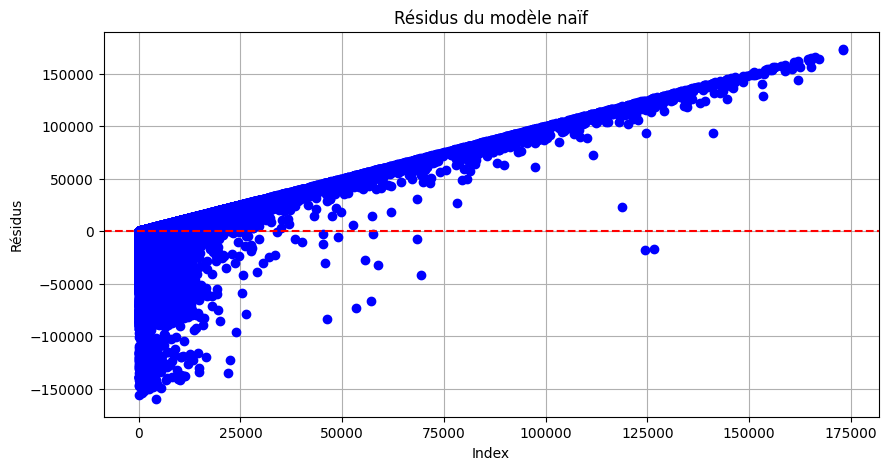

In [53]:
from turtle import color


residuals = y_test - y_pred_naif

plt.figure(figsize=(10, 5))
plt.plot(y_test,residuals, marker='o', linestyle='None',color='blue')
plt.axhline(0, color='r', linestyle='--')
plt.title("Résidus du modèle naïf")
plt.xlabel("Index")
plt.ylabel("Résidus")
plt.grid()
plt.show()

### Prophet

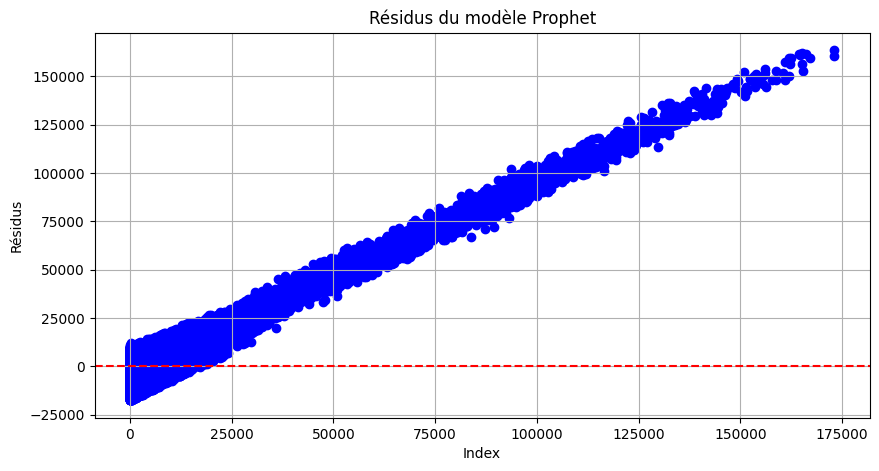

In [52]:
from turtle import color


residuals = y_test - y_pred_prophet

plt.figure(figsize=(10, 5))
plt.scatter(y_test,residuals, marker='o', linestyle='None',color='blue')
plt.axhline(0, color='r', linestyle='--')
plt.title("Résidus du modèle Prophet")
plt.xlabel("Index")
plt.ylabel("Résidus")
plt.grid()
plt.show()

### XGBoost

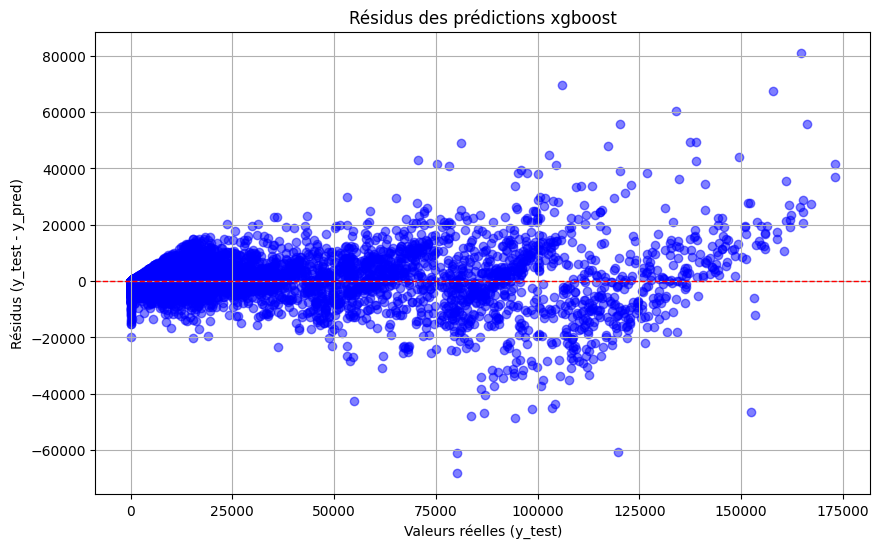

In [38]:
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = y_test - y_pred_xgb

# Tracé des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus des prédictions xgboost")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.grid(True)
plt.show()

### LightGBM

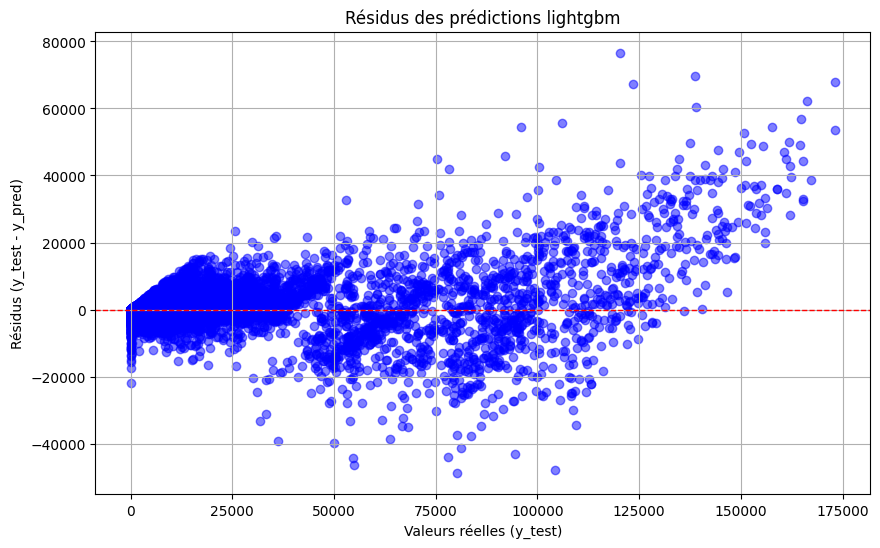

In [39]:
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = y_test - y_pred_lgb

# Tracé des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus des prédictions lightgbm")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.grid(True)
plt.show()

### CNN

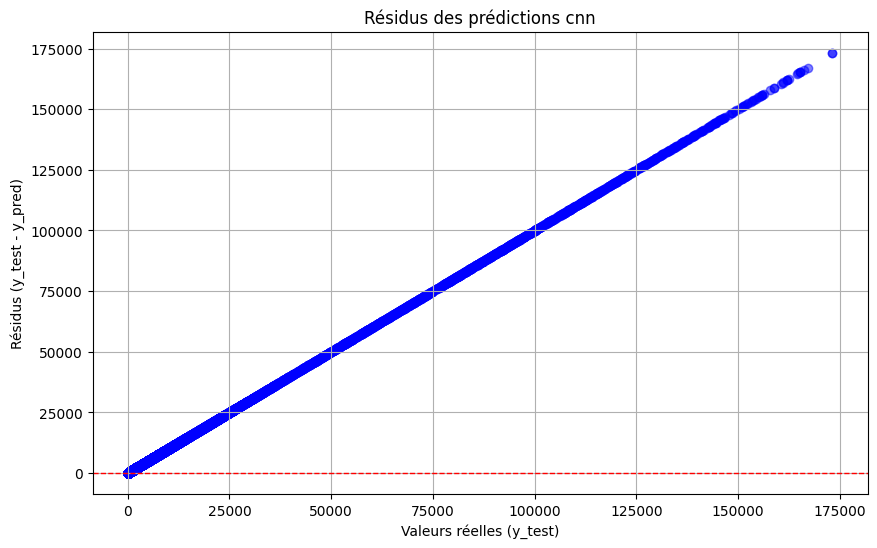

In [42]:
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = y_test_seq - y_pred_cnn

# Tracé des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus des prédictions cnn")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.grid(True)
plt.show()

### LSTM

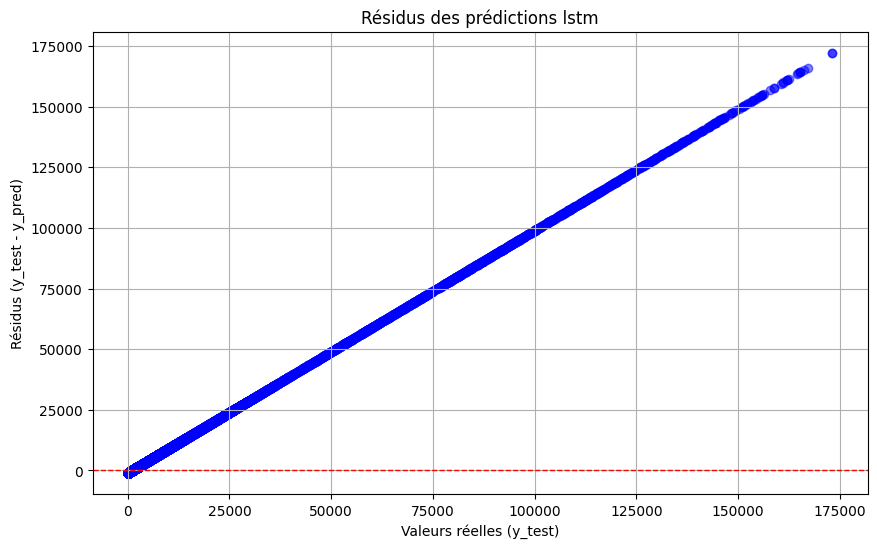

In [142]:
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = y_test_seq - y_pred_lstm

# Tracé des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus des prédictions lstm")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.grid(True)
plt.show()

### GRU

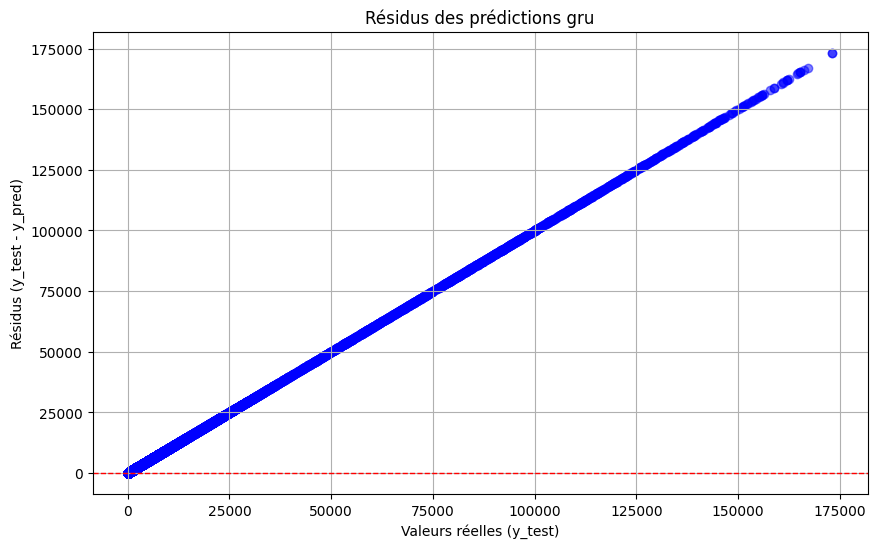

In [44]:
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = y_test_seq - y_pred_gru

# Tracé des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus des prédictions gru")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.grid(True)
plt.show()

### Transformers

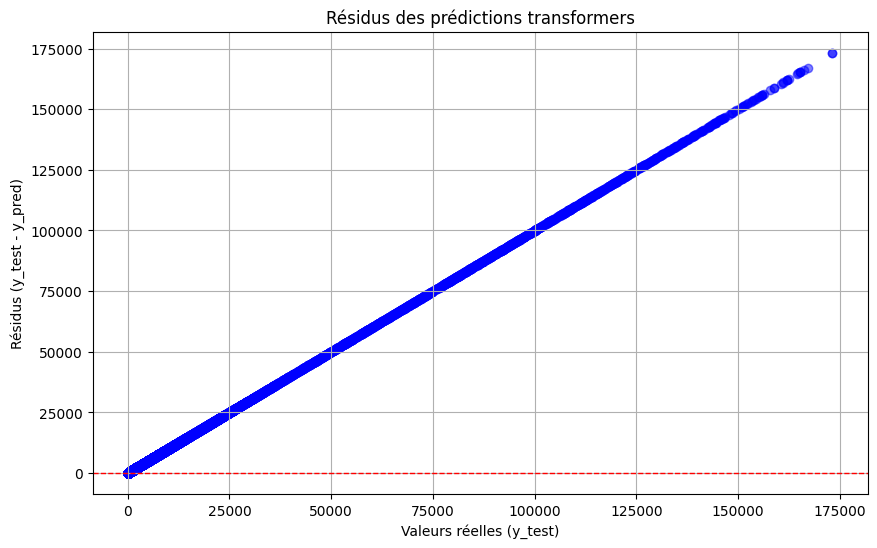

In [45]:
import matplotlib.pyplot as plt

# Calcul des résidus
residuals = y_test_seq - y_pred_transformers

# Tracé des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_test_seq, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus des prédictions transformers")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.grid(True)
plt.show()

## Optimisation des hyperparamètres du meilleur modèle

In [49]:
import optuna
# Fonction objective pour Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'random_state': 42
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mape

# Optimisation Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Meilleurs paramètres
print("Meilleurs paramètres :", study.best_params)

# Entraînement final avec les meilleurs paramètres
best_model = xgb.XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)


score_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE XGBoost optimisé : {score_mape:.2f}%")

[I 2025-03-20 18:37:46,823] A new study created in memory with name: no-name-252c93aa-acc6-4e19-8fb4-a5479e0a69a0
[I 2025-03-20 18:37:49,643] Trial 0 finished with value: 0.7499991126679908 and parameters: {'n_estimators': 338, 'max_depth': 10, 'learning_rate': 0.11742759416334346, 'subsample': 0.9333139712675711, 'colsample_bytree': 0.5396179224559827, 'gamma': 9.685624197290638, 'reg_alpha': 8.713625733905, 'reg_lambda': 0.8138777986491486}. Best is trial 0 with value: 0.7499991126679908.
[I 2025-03-20 18:37:53,927] Trial 1 finished with value: 0.7476955254031641 and parameters: {'n_estimators': 381, 'max_depth': 9, 'learning_rate': 0.055773734727195726, 'subsample': 0.9490510193535133, 'colsample_bytree': 0.9635749953180903, 'gamma': 3.653396498961128, 'reg_alpha': 6.436910608418074, 'reg_lambda': 0.09468444443512358}. Best is trial 1 with value: 0.7476955254031641.
[I 2025-03-20 18:37:57,617] Trial 2 finished with value: 0.7397636421876655 and parameters: {'n_estimators': 378, 'max

Meilleurs paramètres : {'n_estimators': 322, 'max_depth': 12, 'learning_rate': 0.036641150592136074, 'subsample': 0.7383025902751207, 'colsample_bytree': 0.9516413195406532, 'gamma': 0.6078568634594776, 'reg_alpha': 2.5213097138186575, 'reg_lambda': 7.9656741424607365}
MAPE XGBoost optimisé : 0.72%


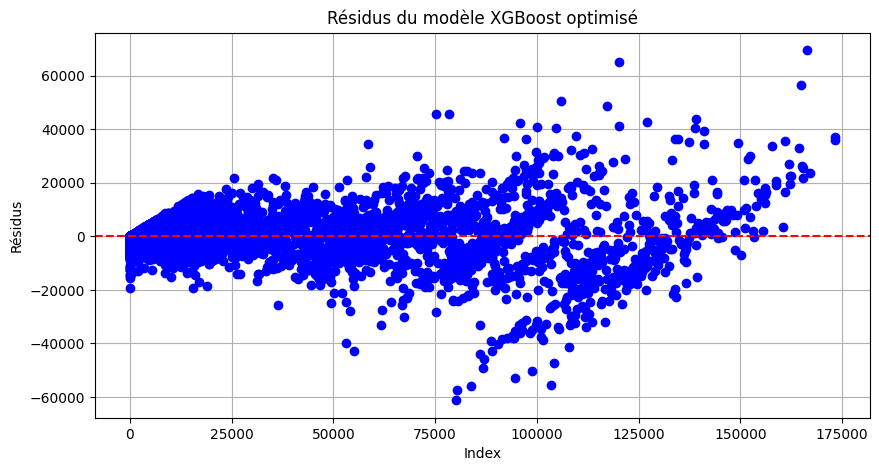

In [54]:
residuals_best_model = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.plot(y_test,residuals_best_model, marker='o', linestyle='None',color='blue')
plt.axhline(0, color='r', linestyle='--')
plt.title("Résidus du modèle XGBoost optimisé")
plt.xlabel("Index")
plt.ylabel("Résidus")
plt.grid()
plt.show()

## Prédictions sur les données de test

In [30]:
# Charger les données de test
file_test_path = 'archive/x_test_sncf.csv'
test_data = pd.read_csv(file_test_path, parse_dates=['date'])
train_data = train_data

# Feature Engineering
for df in [train_data,test_data]:
    df['covid_impact'] = df['date'].apply(lambda x: 1 if pd.Timestamp('2020-03-15') <= x <= pd.Timestamp('2021-06-30') else 0)
    df['weekday'] = df['date'].dt.weekday
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['year'] = df['date'].dt.year

# Création des lags pour les données d'entraînement seulement
for lag in [1, 7, 30]:
    train_data[f'lag_{lag}'] = train_data['y'].shift(lag)
train_data.fillna(method='bfill', inplace=True)

# Encodage station
le = LabelEncoder()
train_data['station_encoded'] = le.fit_transform(train_data['station'])
test_data['station_encoded'] = le.transform(test_data['station'])

# Transformation log de 'y'
train_data['y_log'] = np.log1p(train_data['y'])

# Séparation des features
features = ['ferie', 'vacances', 'covid_impact', 'weekday', 'weekofyear', 'quarter', 'station_encoded']

# Scaling
'''scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[features])
X_test_scaled = scaler.transform(test_data[features])'''

best_model.fit(train_data[features], train_data['y_log'])

# Prédiction sur le jeu de test
y_pred_log = best_model.predict(test_data[features])
y_pred = np.expm1(y_pred_log)


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_19436/3304462805.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='bfill', inplace=True)


In [32]:
predictions_df = test_data[['index','date', 'station_encoded','station']].copy()
predictions_df['y'] = y_pred

predictions_df

index       date  station_encoded station            y
0      2023-01-01_1J7 2023-01-01               24     1J7   106.780792
1      2023-01-01_O2O 2023-01-01              295     O2O   250.757843
2      2023-01-01_8QR 2023-01-01              107     8QR    50.167343
3      2023-01-01_L58 2023-01-01              269     L58    40.050148
4      2023-01-01_UMC 2023-01-01              367     UMC    99.366173
...               ...        ...              ...     ...          ...
78647  2023-05-31_N9K 2023-05-31              285     N9K   147.240799
78648  2023-05-31_P6E 2023-05-31              310     P6E  1672.833984
78649  2023-05-31_BDC 2023-05-31              143     BDC   380.148712
78650  2023-05-31_QD6 2023-05-31              324     QD6  3524.699951
78651  2023-05-31_W14 2023-05-31              391     W14   851.809814

[78652 rows x 5 columns]

In [33]:
submission = predictions_df[['index', 'y']]
submission.to_csv('submission_xgboost2.csv', index=False)

# Méthode avec lissage des données

Deux stratégies : 
  - Lissage exponentiel entre avant le covid et après le covid pour couvrir les valeurs durant le covid
  - Utilisation de la moyenne des y précédent le covid pour rmeplacer les valeurs durant le covid

## Remplacement des données par lissage exponentiel

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/4015719662.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1437881.48778871 1287102.2414521   998624.86901647  732298.70831153
  541760.39581807  406780.67707265  298378.77395085  217279.8417656
  175639.58923592  145111.41246514  122582.7887256   105920.25210792
   94113.67647554   76945.07353288   60515.55147302   61688.98603111
   62537.99022178   58392.29315524   55494.50520867   53730.95364607
   45771.06755225   37228.84728657   41087.1931006    43464.33517042
   45489.23461929   46576.36423351   47734.25496345   42015.27847442
   34692.79493209   31620.55645246   38486.78951673   43198.95266171
   46232.8668632    48458.00680424   42536.00476297   35168.90333408
   40986.53233385   45935.4726337    49344.23084359   51528.16159051
   52568.81311336   45853.06917935   37800.14842555   44072.20389788
   48791.44272852   51872.0099

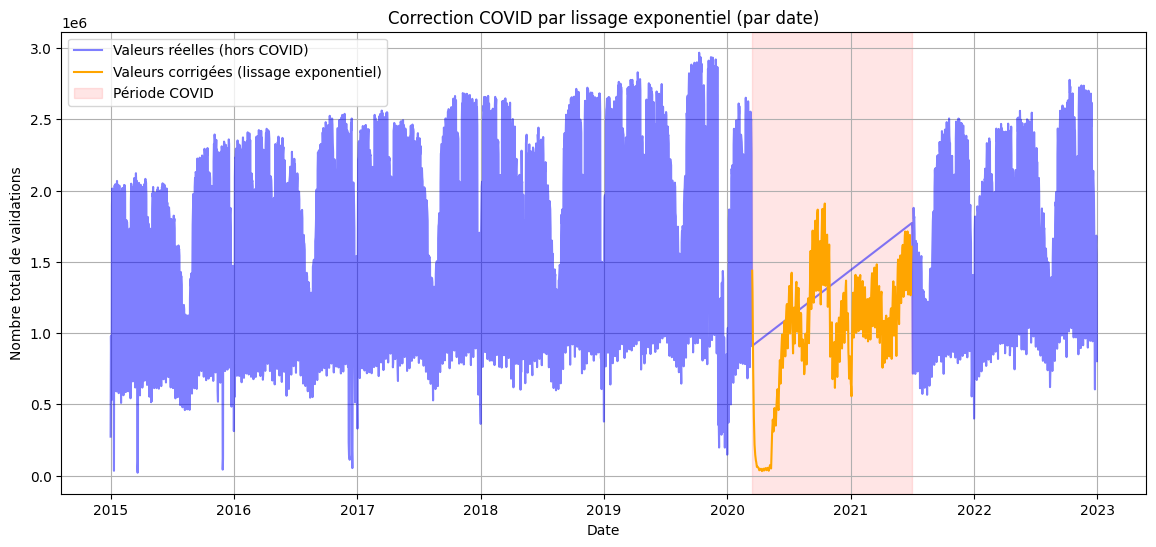

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
train_data = x_train_data_lissage.copy()

# Définir explicitement la période COVID
start_covid = pd.Timestamp('2020-03-15')
end_covid = pd.Timestamp('2021-06-30')
train_data['date'] = pd.to_datetime(train_data['date'])
# Grouper par date en sommant les validations
daily_data = train_data.groupby('date')['y'].sum().reset_index()

# Appliquer le lissage exponentiel à la série regroupée
daily_data['y_smooth'] = daily_data['y'].copy()
daily_data['y_exp_smooth'] = daily_data['y'].ewm(alpha=0.3).mean()

# Remplacer uniquement pendant la période COVID
covid_period = (daily_data['date'] >= start_covid) & (daily_data['date'] <= end_covid)
daily_data.loc[covid_period, 'y_smooth'] = daily_data.loc[covid_period, 'y_exp_smooth']

# Graphique clair comparatif
plt.figure(figsize=(14,6))

# Valeurs réelles hors COVID
plt.plot(daily_data.loc[~covid_period, 'date'], daily_data.loc[~covid_period, 'y'],
         label='Valeurs réelles (hors COVID)', alpha=0.5, color='blue')

# Valeurs corrigées uniquement pendant COVID
plt.plot(daily_data.loc[covid_period, 'date'], daily_data.loc[covid_period, 'y_smooth'],
         label='Valeurs corrigées (lissage exponentiel)', linewidth=1.5, color='orange')

# Zone COVID clairement indiquée
plt.axvspan(start_covid, end_covid, color='red', alpha=0.1, label='Période COVID')

# Labels et légende
plt.xlabel('Date')
plt.ylabel('Nombre total de validations')
plt.title('Correction COVID par lissage exponentiel (par date)')
plt.legend()
plt.grid(True)
plt.show()

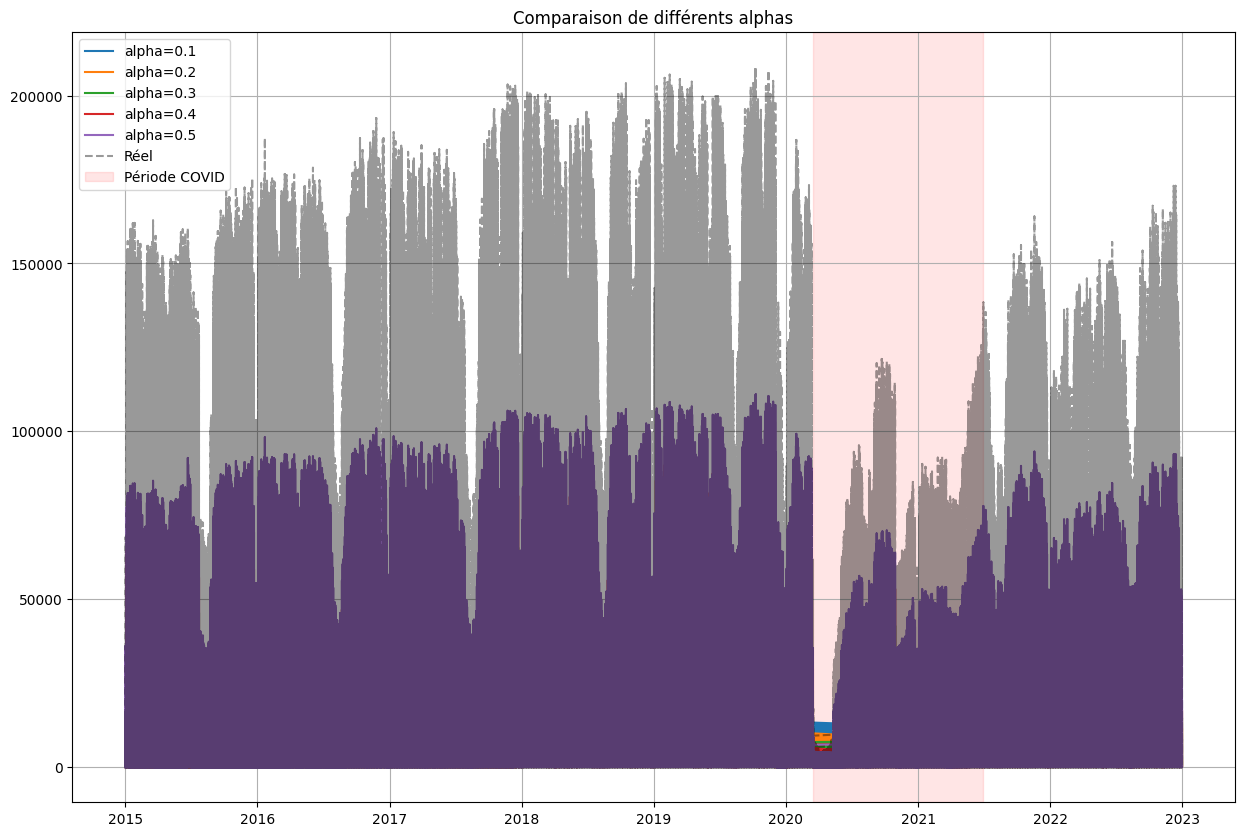

In [139]:
alphas = [0.1,0.2, 0.3, 0.4, 0.5]
plt.figure(figsize=(15,10))

for alpha in alphas:
    train_data['y_exp_smooth'] = train_data['y'].ewm(alpha=alpha).mean()
    plt.plot(train_data['date'], train_data['y_exp_smooth'], label=f'alpha={alpha}')

plt.plot(train_data['date'], train_data['y'], label='Réel', alpha=0.4, linestyle='--', color='black')
plt.axvspan(pd.Timestamp('2020-03-15'), pd.Timestamp('2021-06-30'), color='red', alpha=0.1, label='Période COVID')
plt.title('Comparaison de différents alphas')
plt.legend()
plt.grid()
plt.show()

## Remplacement des valeurs durant le covid par des valeurs moyennes

In [97]:
train_data = pd.read_csv('archive/x_train_sncf2.csv')
train_data['date'] = pd.to_datetime(train_data['date'])

In [98]:
# Définir explicitement les périodes
start_covid = pd.Timestamp('2020-03-15')
end_covid = pd.Timestamp('2021-06-30')

# Créer des features temporelles utiles pour calculer la moyenne
train_data['weekday'] = train_data['date'].dt.weekday
train_data['month'] = train_data['date'].dt.month
train_data['station'] = train_data['station'].astype(str)

# Séparer clairement la période pré-COVID
pre_covid = train_data[train_data['date'] < start_covid]

# Calculer la moyenne historique par station et jour de semaine
historical_means = pre_covid.groupby(['station', 'weekday', 'month'])['y'].mean().reset_index()
historical_means.rename(columns={'y':'y_mean_historical'}, inplace=True)

# Fusionner ces moyennes avec la période COVID pour correction
covid_period = (train_data['date'] >= start_covid) & (train_data['date'] <= end_covid)
data_covid = train_data[covid_period].copy()

# Merge clair
data_covid = data_covid.merge(historical_means, on=['station', 'weekday', 'month'], how='left')

# Remplacer les valeurs COVID par ces moyennes historiques
train_data.loc[covid_period, 'y_corrected'] = data_covid['y_mean_historical'].values
train_data.loc[~covid_period, 'y_corrected'] = train_data.loc[~covid_period, 'y']


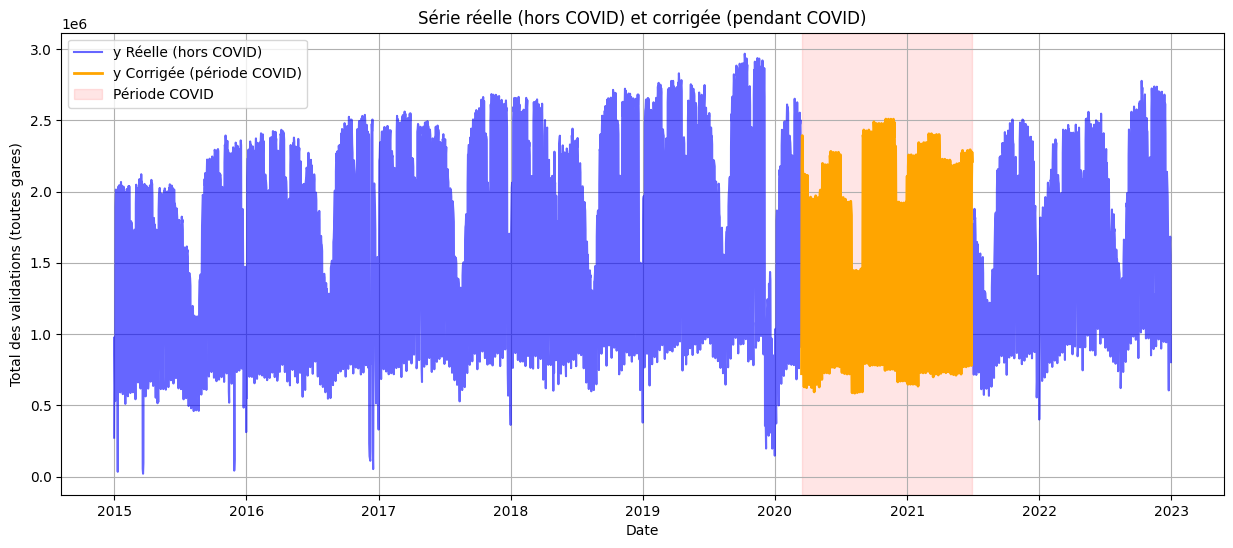

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Définir la période COVID
start_covid = pd.Timestamp('2020-03-15')
end_covid = pd.Timestamp('2021-06-30')

# Grouper les données par date
daily_sum_real = train_data.groupby('date')['y'].sum().reset_index()
daily_sum_corrected = train_data.groupby('date')['y_corrected'].sum().reset_index()

# Séparer clairement la période COVID et non-COVID
covid_period = (daily_sum_real['date'] >= start_covid) & (daily_sum_real['date'] <= end_covid)
non_covid_period = ~covid_period

# Graphique clair
plt.figure(figsize=(15, 6))

# Série réelle hors période COVID
plt.plot(daily_sum_real.loc[non_covid_period, 'date'],
         daily_sum_real.loc[non_covid_period, 'y'],
         label='y Réelle (hors COVID)', color='blue', alpha=0.6)

# Série corrigée uniquement période COVID
plt.plot(daily_sum_corrected.loc[covid_period, 'date'],
         daily_sum_corrected.loc[covid_period, 'y_corrected'],
         label='y Corrigée (période COVID)', color='orange', linewidth=2)

# Zone COVID
plt.axvspan(start_covid, end_covid, color='red', alpha=0.1, label='Période COVID')

# Labels et légende
plt.xlabel('Date')
plt.ylabel('Total des validations (toutes gares)')
plt.title('Série réelle (hors COVID) et corrigée (pendant COVID)')
plt.legend()
plt.grid(True)
plt.show()

La correction par la moyenne historique est privilégiée car elle permet de préserver fidèlement la saisonnalité naturelle des données tout en assurant une stabilité réaliste et cohérente, contrairement au lissage exponentiel qui peine à s’adapter efficacement aux variations brutales induites par la période COVID, produisant des corrections parfois artificielles et non représentatives.

Alors la suite de notre analyse utilisera la méthode de remplacement des données durant le covid par des valeurs moyennes.

## Préparation des données

In [100]:
train_data

date station  job  ferie  vacances  year  month  day  \
0       2015-01-01     1J7    1      1         1  2015      1    1   
1       2015-01-01     S3E    1      1         1  2015      1    1   
2       2015-01-01     RDK    1      1         1  2015      1    1   
3       2015-01-01     I9U    1      1         1  2015      1    1   
4       2015-01-01     OM7    1      1         1  2015      1    1   
...            ...     ...  ...    ...       ...   ...    ...  ...   
1229858 2022-12-31     B65    0      0         1  2022     12   31   
1229859 2022-12-31     2P1    0      0         1  2022     12   31   
1229860 2022-12-31     D68    0      0         1  2022     12   31   
1229861 2022-12-31     KQC    0      0         1  2022     12   31   
1229862 2022-12-31     W14    0      0         1  2022     12   31   

                  index     y  weekday  y_corrected  
0        2015-01-01_1J7     7        3          7.0  
1        2015-01-01_S3E   103        3        103.0  
2        2015-01-01_RDK    98        3         98.0  
3        2015-01-01_I9U   277        3        277.0  
4        2015-01-01_OM7   398        3        398.0  
...                 ...   ...      ...          ...  
1229858  2022-12-31_B65  1161        5       1161.0  
1229859  2022-12-31_2P1  2118        5       2118.0  
1229860  2022-12-31_D68   673        5        673.0  
1229861  2022-12-31_KQC  3128        5       3128.0  
1229862  2022-12-31_W14    18        5         18.0  

[1229863 rows x 12 columns]

In [101]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

train_data['y_corrected'].fillna(train_data['y'], inplace=True)

train_data['lag_1'] = train_data.groupby('station')['y_corrected'].shift(1)
train_data['lag_7'] = train_data.groupby('station')['y_corrected'].shift(7)
train_data['lag_30'] = train_data.groupby('station')['y_corrected'].shift(30)
train_data['lag_365'] = train_data.groupby('station')['y_corrected'].shift(365)
train_data['lag_730'] = train_data.groupby('station')['y_corrected'].shift(730)

# Calcul explicite de la médiane par station
median_station_365 = train_data.groupby('station')['lag_365'].transform('median')
median_station_730 = train_data.groupby('station')['lag_730'].transform('median')
median_station_1 = train_data.groupby('station')['lag_1'].transform('median')
median_station_7 = train_data.groupby('station')['lag_7'].transform('median')
median_station_30 = train_data.groupby('station')['lag_30'].transform('median')

# Remplacer les valeurs NaN par cette médiane station par station
train_data['lag_365'].fillna(median_station_365, inplace=True)
train_data['lag_730'].fillna(median_station_730, inplace=True)
train_data['lag_1'].fillna(median_station_1, inplace=True)
train_data['lag_7'].fillna(median_station_7, inplace=True)
train_data['lag_30'].fillna(median_station_30, inplace=True)

global_median_365 = train_data['lag_365'].median()
global_median_730 = train_data['lag_730'].median()

train_data['lag_365'].fillna(global_median_365, inplace=True)
train_data['lag_730'].fillna(global_median_730, inplace=True)

train_data['lag_365_log'] = np.log1p(train_data['lag_365'])
train_data['lag_730_log'] = np.log1p(train_data['lag_730'])
train_data['lag_1_log'] = np.log1p(train_data['lag_1'])
train_data['lag_7_log'] = np.log1p(train_data['lag_7'])
train_data['lag_30_log'] = np.log1p(train_data['lag_30'])


le = LabelEncoder()
train_data['station_encoded'] = le.fit_transform(train_data['station'])

train_data['quarter'] = train_data['date'].dt.quarter
train_data['year'] = train_data['date'].dt.year
train_data['weekofyear'] = train_data['date'].dt.isocalendar().week.astype(int)


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/3871204745.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['y_corrected'].fillna(train_data['y'], inplace=True)
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/3871204745.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [68]:
train_data.isna().sum()

date               0
station            0
job                0
ferie              0
vacances           0
y                  0
weekday            0
month              0
y_corrected        0
lag_1              0
lag_7              0
lag_30             0
lag_365            0
lag_730            0
lag_365_log        0
lag_730_log        0
lag_1_log          0
lag_7_log          0
lag_30_log         0
station_encoded    0
quarter            0
year               0
weekofyear         0
dtype: int64

In [69]:
y_train.isna().sum()

index    0
y        0
key      0
dtype: int64

In [103]:
# Cible finale après correction COVID (moyenne historique)
train_data['y_final_log'] = np.log1p(train_data['y_corrected'])
train_data2 = train_data.copy()

# Séparer clairement entraînement/test
train = train_data[train_data['date'] <= '2021-12-31']
test = train_data[train_data['date'] >= '2022-01-01']

features = ['ferie', 'vacances', 'weekday', 'weekofyear', 'job',
            'quarter', 'lag_1_log', 'lag_7_log', 'lag_30_log', 'station_encoded','year','lag_365_log', 'lag_730_log']

X_train = train[features]
y_train = train['y_final_log']
X_test = test[features]
y_test = test['y_corrected']

In [ ]:
# Imports nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import  StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D

SEQ_LEN = 365  

def create_sequences(data, seq_length, features, target):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[features].iloc[i-seq_length:i].values)  
        y.append(data[target].iloc[i])  # Valeur cible du jour suivant
    return np.array(X), np.array(y)

target = 'y_corrected'

X_train_seq, y_train_seq = create_sequences(train, SEQ_LEN, features, target)
X_test_seq, y_test_seq = create_sequences(test, SEQ_LEN, features, target)

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train_seq.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test_seq.reshape(-1, 1))


## Modeles

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from prophet import Prophet
from pmdarima import auto_arima
import numpy as np

results = {}


### Prophet

In [90]:
# Données d'entraînement pour Prophet
df_prophet = train[['date', 'y_final_log'] + features].rename(columns={'date':'ds', 'y_final_log':'y'})

# Données de test pour Prophet
df_test_prophet = test[['date'] + features].rename(columns={'date':'ds'})

# Initialisation du modèle Prophet
m_prophet = Prophet()

# Ajout explicite de toutes les features
for feature in features:
    m_prophet.add_regressor(feature)

# Entraînement
m_prophet.fit(df_prophet)

# Prédiction avec Prophet incluant les features
forecast = m_prophet.predict(df_test_prophet)
y_pred_prophet = np.expm1(forecast['yhat'].values)

# Évaluation avec MAPE
mape_prophet = mean_absolute_percentage_error(y_test, y_pred_prophet)

results['prophet'] = mean_absolute_percentage_error(y_test, y_pred_prophet)

19:03:50 - cmdstanpy - INFO - Chain [1] start processing
19:12:21 - cmdstanpy - INFO - Chain [1] done processing


### XGBoost

In [100]:
# XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=200, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = np.expm1(model_xgb.predict(X_test))
results['XGBoost'] = mean_absolute_percentage_error(y_test, y_pred_xgb)


### LightGBM

In [101]:

# LightGBM
model_lgb = lgb.LGBMRegressor(n_estimators=200, random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = np.expm1(model_lgb.predict(X_test))
results['LightGBM'] = mean_absolute_percentage_error(y_test, y_pred_lgb)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1604
[LightGBM] [Info] Number of data points in the train set: 1073470, number of used features: 13
[LightGBM] [Info] Start training from score 6.875068


### CNN

In [94]:
# Modèle CNN
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, len(features))),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mape')

# Entraînement du modèle CNN
model.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

# Prédiction
y_pred = model.predict(X_test_seq).flatten()
y_pred_cnn= scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

mape_cnn = mean_absolute_percentage_error(y_test_seq, y_pred_cnn)
results['CNN'] = mape_cnn

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 141s 8ms/step - loss: 117045.3906
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 138s 8ms/step - loss: 6022.7212
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 137s 8ms/step - loss: 6154.4868
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 140s 8ms/step - loss: 8288.0596
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 136s 8ms/step - loss: 8556.7197
4887/4887 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


### LSTM

In [112]:
# LSTM

model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, len(features))),
    BatchNormalization(),
    LSTM(32, return_sequences=False),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1)  # Pas d'activation ici !
])


model_lstm.compile(optimizer='adam', loss='mae')  # MAE est plus robuste que MAPE

model_lstm.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

y_pred_scaled = model_lstm.predict(X_test_seq).flatten()
y_pred_lstm = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

results['LSTM'] = mean_absolute_percentage_error(y_test_seq, y_pred_lstm)

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 202s 12ms/step - loss: 0.8841
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 209s 12ms/step - loss: 0.5081
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 196s 12ms/step - loss: 0.5007
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 196s 12ms/step - loss: 0.4988
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 196s 12ms/step - loss: 0.4955
4888/4888 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


### GRU

In [103]:
model_gru = Sequential([
    GRU(64, return_sequences=True, input_shape=(SEQ_LEN, len(features))),
    GRU(32, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mae')

model_gru.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

y_pred_scaled = model_gru.predict(X_test_seq).flatten()
y_pred_gru = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

results['GRU'] = mean_absolute_percentage_error(y_test_seq, y_pred_gru)

Epoch 1/5


/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16773/16773 ━━━━━━━━━━━━━━━━━━━━ 196s 12ms/step - loss: 0.8632
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 195s 12ms/step - loss: 0.4930
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 195s 12ms/step - loss: 0.4893
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 191s 11ms/step - loss: 0.4840
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 191s 11ms/step - loss: 0.4805
4888/4888 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step


### Transformers

In [104]:
# Modèle Transformer avec Keras
def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=input_shape[-1])(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization()(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

model = transformer_model(X_train_seq.shape[1:])
model.compile(optimizer='adam', loss='mae')

# Entraînement
model.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

# Prédiction
y_pred_scaled = model.predict(X_test_seq).flatten()
y_pred_transformers = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mape_transformers = mean_absolute_percentage_error(y_test_seq, y_pred_transformers)
results['Transformer'] = mape_transformers

Epoch 1/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 221s 13ms/step - loss: 1.4191
Epoch 2/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 219s 13ms/step - loss: 1.2752
Epoch 3/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 220s 13ms/step - loss: 1.2584
Epoch 4/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 223s 13ms/step - loss: 1.2419
Epoch 5/5
16773/16773 ━━━━━━━━━━━━━━━━━━━━ 221s 13ms/step - loss: 1.2308
4887/4887 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


### Best Model

In [ ]:
# Résultats finaux
for model_name, score in results.items():
    print(f"{model_name} MAPE : {score:.2f}%")

# Sélection automatique du meilleur modèle
best_model = min(results, key=results.get)
print(f"\nMeilleur modèle selon MAPE : {best_model} ({results[best_model]:.2f}%)")

prophet MAPE : 22.30%
XGBoost MAPE : 1.71%
CNN MAPE : 1.00%
LightGBM MAPE : 1.74%
LSTM MAPE : 1.52%
GRU MAPE : 1.53%
Transformer MAPE : 6.05%

Meilleur modèle selon MAPE : CNN (1.00%)


 Vue les résultats, l'approche ne fonctionne pas, donc on va essayer une autre méthode.

# Méthode avec données uniquement après le covid

On va supprimer les données avant le covid et on va entrainer les modèles sur les données après le covid malheuresement on ne pourra pas évaluer les modèles sur les données de test car on a pas assez de données après le covid.

**Score public : 217,43184135354034**

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Chargement des fichiers avec échantillonnage
x_train = pd.read_csv("archive/x_train_sncf.csv")
y_train = pd.read_csv("archive/y_train_sncf.csv")

x_train,y_train

(               date station  job  ferie  vacances
 0        2015-01-01     1J7    1      1         1
 1        2015-01-01     O2O    1      1         1
 2        2015-01-01     8QR    1      1         1
 3        2015-01-01     UMC    1      1         1
 4        2015-01-01     FK3    1      1         1
 ...             ...     ...  ...    ...       ...
 1229858  2022-12-31     V2P    0      0         1
 1229859  2022-12-31     N9K    0      0         1
 1229860  2022-12-31     P6E    0      0         1
 1229861  2022-12-31     BDC    0      0         1
 1229862  2022-12-31     W14    0      0         1
 
 [1229863 rows x 5 columns],
                   index     y
 0        2015-01-01_1J7     7
 1        2015-01-01_O2O     0
 2        2015-01-01_8QR     9
 3        2015-01-01_UMC     9
 4        2015-01-01_FK3    28
 ...                 ...   ...
 1229858  2022-12-31_V2P  1227
 1229859  2022-12-31_N9K   544
 1229860  2022-12-31_P6E    92
 1229861  2022-12-31_BDC    91
 1229862  2022-1

In [144]:
# Fusion des datasets pour une analyse plus complète
x_train["key"] = x_train["date"] + "_" + x_train["station"]
y_train["key"] = y_train["index"]
train_data = x_train.merge(y_train, on="key").drop(columns=["index", "key"])

train_data

date station  job  ferie  vacances     y
0        2015-01-01     1J7    1      1         1     7
1        2015-01-01     O2O    1      1         1     0
2        2015-01-01     8QR    1      1         1     9
3        2015-01-01     UMC    1      1         1     9
4        2015-01-01     FK3    1      1         1    28
...             ...     ...  ...    ...       ...   ...
1229858  2022-12-31     V2P    0      0         1  1227
1229859  2022-12-31     N9K    0      0         1   544
1229860  2022-12-31     P6E    0      0         1    92
1229861  2022-12-31     BDC    0      0         1    91
1229862  2022-12-31     W14    0      0         1    18

[1229863 rows x 6 columns]

In [145]:
train_data = train_data[train_data['date'] >='2021-06-30'] # On garde les données à partir de 2021-06-30
train_data

date station  job  ferie  vacances     y
2894     2022-01-01     1J7    0      1         1    26
2895     2022-01-01     O2O    0      1         1    15
2896     2022-01-01     NZV    0      1         1    15
2897     2022-01-01     8QR    0      1         1    23
2898     2022-01-01     UMC    0      1         1    39
...             ...     ...  ...    ...       ...   ...
1229858  2022-12-31     V2P    0      0         1  1227
1229859  2022-12-31     N9K    0      0         1   544
1229860  2022-12-31     P6E    0      0         1    92
1229861  2022-12-31     BDC    0      0         1    91
1229862  2022-12-31     W14    0      0         1    18

[233545 rows x 6 columns]

## Préparation des données

In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


train_data["date"] = pd.to_datetime(train_data["date"])

train_data = train_data.sort_values(by=['station', 'date'])

#features temporelles
train_data["year"] = train_data["date"].dt.year
train_data["month"] = train_data["date"].dt.month
train_data["day"] = train_data["date"].dt.day
train_data["weekday"] = train_data["date"].dt.weekday
train_data['weekofyear'] = train_data['date'].dt.isocalendar().week.astype(int)
train_data['quarter'] = train_data['date'].dt.quarter

#features de décalage (lags)
train_data["lag_1"] = train_data.groupby("station")["y"].shift(1) # 1 jour
train_data["lag_7"] = train_data.groupby("station")["y"].shift(7) # 1 semaine
train_data["lag_30"] = train_data.groupby("station")["y"].shift(30) # 1 mois
train_data["lag_365"] = train_data.groupby("station")["y"].shift(365) # 1 an

# Calcul explicite de la médiane par station
median_station_365 = train_data.groupby('station')['lag_365'].transform('median')
median_station_1 = train_data.groupby('station')['lag_1'].transform('median')
median_station_7 = train_data.groupby('station')['lag_7'].transform('median')
median_station_30 = train_data.groupby('station')['lag_30'].transform('median')
global_median_365 = train_data['lag_365'].median()

# Remplacer les valeurs NaN par cette médiane station par station
train_data['lag_365'].fillna(median_station_365, inplace=True)
train_data['lag_1'].fillna(median_station_1, inplace=True)
train_data['lag_7'].fillna(median_station_7, inplace=True)
train_data['lag_30'].fillna(median_station_30, inplace=True)
train_data['lag_365'].fillna(global_median_365, inplace=True)


train_data['lag_365_log'] = np.log1p(train_data['lag_365'])
train_data['lag_1_log'] = np.log1p(train_data['lag_1'])
train_data['lag_7_log'] = np.log1p(train_data['lag_7'])
train_data['lag_30_log'] = np.log1p(train_data['lag_30'])

# Encodage de la variable catégorielle 'station'
encoder = LabelEncoder()
train_data['station_encoded'] = encoder.fit_transform(train_data['station'])

train_data['y_log'] = np.log1p(train_data['y'])

train_data

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/3617136399.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['lag_365'].fillna(median_station_365, inplace=True)
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/3617136399.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

date station  job  ferie  vacances     y  year  month  day  \
1185326 2021-06-30     003    1      0         0   402  2021      6   30   
22685   2021-07-01     003    1      0         0   395  2021      7    1   
63236   2021-07-02     003    1      0         0   443  2021      7    2   
103739  2021-07-03     003    0      0         0   197  2021      7    3   
144245  2021-07-04     003    0      0         0   140  2021      7    4   
...            ...     ...  ...    ...       ...   ...   ...    ...  ...   
1091110 2022-12-27     ZXY    1      0         1  4507  2022     12   27   
1131396 2022-12-28     ZXY    1      0         1  4187  2022     12   28   
1169076 2022-12-29     ZXY    1      0         1  4271  2022     12   29   
1206028 2022-12-30     ZXY    1      0         1  3818  2022     12   30   
1229614 2022-12-31     ZXY    0      0         1  2146  2022     12   31   

         weekday  ...   lag_1   lag_7  lag_30  lag_365  lag_365_log  \
1185326        2  ...   377.0   379.0   377.5    327.0     5.793014   
22685          3  ...   402.0   379.0   377.5    327.0     5.793014   
63236          4  ...   395.0   379.0   377.5    327.0     5.793014   
103739         5  ...   443.0   379.0   377.5    327.0     5.793014   
144245         6  ...   197.0   379.0   377.5    327.0     5.793014   
...          ...  ...     ...     ...     ...      ...          ...   
1091110        1  ...  3807.0  5156.0  1125.0   3608.0     8.191186   
1131396        2  ...  4507.0  4898.0  6793.0   3731.0     8.224700   
1169076        3  ...  4187.0  5068.0  7053.0   3684.0     8.212026   
1206028        4  ...  4271.0  4470.0  6780.0   3776.0     8.236685   
1229614        5  ...  3818.0  2360.0  6111.0   2764.0     7.924796   

         lag_1_log  lag_7_log  lag_30_log  station_encoded     y_log  
1185326   5.934894   5.940171    5.936216                0  5.998937  
22685     5.998937   5.940171    5.936216                0  5.981414  
63236     5.981414   5.940171    5.936216                0  6.095825  
103739    6.095825   5.940171    5.936216                0  5.288267  
144245    5.288267   5.940171    5.936216                0  4.948760  
...            ...        ...         ...              ...       ...  
1091110   8.244859   8.548110    7.026427              438  8.413609  
1131396   8.413609   8.496786    8.823795              438  8.339979  
1169076   8.339979   8.530899    8.861350              438  8.359837  
1206028   8.359837   8.405367    8.821880              438  8.247744  
1229614   8.247744   7.766841    8.718009              438  7.671827  

[233545 rows x 22 columns]

In [167]:
test = pd.read_csv("archive/x_test_sncf.csv")
test['date'] = pd.to_datetime(test['date'])

test["year"] = test["date"].dt.year
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day
test["weekday"] = test["date"].dt.weekday
test['weekofyear'] = test['date'].dt.isocalendar().week.astype(int)
test['quarter'] = test['date'].dt.quarter

#features de décalage (lags)
#test["lag_365"] = train_data.groupby("station")["y"]# 1 an


test['station_encoded'] = encoder.transform(test['station'])

test


index       date station  job  ferie  vacances  year  month  \
0      2023-01-01_1J7 2023-01-01     1J7    0      1         1  2023      1   
1      2023-01-01_O2O 2023-01-01     O2O    0      1         1  2023      1   
2      2023-01-01_8QR 2023-01-01     8QR    0      1         1  2023      1   
3      2023-01-01_L58 2023-01-01     L58    0      1         1  2023      1   
4      2023-01-01_UMC 2023-01-01     UMC    0      1         1  2023      1   
...               ...        ...     ...  ...    ...       ...   ...    ...   
78647  2023-05-31_N9K 2023-05-31     N9K    1      0         0  2023      5   
78648  2023-05-31_P6E 2023-05-31     P6E    1      0         0  2023      5   
78649  2023-05-31_BDC 2023-05-31     BDC    1      0         0  2023      5   
78650  2023-05-31_QD6 2023-05-31     QD6    1      0         0  2023      5   
78651  2023-05-31_W14 2023-05-31     W14    1      0         0  2023      5   

       day  weekday  weekofyear  quarter  station_encoded  
0        1        6          52        1               24  
1        1        6          52        1              295  
2        1        6          52        1              107  
3        1        6          52        1              269  
4        1        6          52        1              367  
...    ...      ...         ...      ...              ...  
78647   31        2          22        2              285  
78648   31        2          22        2              310  
78649   31        2          22        2              143  
78650   31        2          22        2              324  
78651   31        2          22        2              391  

[78652 rows x 13 columns]

In [168]:
# Assurer que les dates sont bien en datetime
train_data['date'] = pd.to_datetime(train_data['date'])
test['date'] = pd.to_datetime(test['date'])

# Créer la correspondance date_2023 → date_2022
test['date_2022'] = test['date'] - pd.DateOffset(years=1)

# Fusionner avec 2022 pour récupérer `y` de l'année précédente en tant que `lag_365`
test_data = test.merge(train_data[['date', 'station', 'y']], 
                            left_on=['date_2022', 'station'], 
                            right_on=['date', 'station'], 
                            how='left', 
                            suffixes=('', '_lag_365'))


# Vérifier combien de valeurs `NaN` restent
print("Nombre de NaN dans `lag_365` après fusion :", test_data['y'].isna().sum())

test_data.rename(columns={'y':'lag_365'}, inplace=True)

Nombre de NaN dans `lag_365` après fusion : 2214


In [169]:
global_median_365_test = test_data['lag_365'].median()
test_data['lag_365'].fillna(global_median_365_test, inplace=True)

test_data['lag_365_log'] = np.log1p(test_data['lag_365'])
test_data = test_data.sort_values(by=['station', 'date'])
test_data

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_27976/3658083239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['lag_365'].fillna(global_median_365_test, inplace=True)


index       date station  job  ferie  vacances  year  month  \
163    2023-01-01_003 2023-01-01     003    0      1         1  2023      1   
2778   2023-01-02_003 2023-01-02     003    1      0         1  2023      1   
5397   2023-01-03_003 2023-01-03     003    1      0         0  2023      1   
8021   2023-01-04_003 2023-01-04     003    1      0         0  2023      1   
10633  2023-01-05_003 2023-01-05     003    1      0         0  2023      1   
...               ...        ...     ...  ...    ...       ...   ...    ...   
67519  2023-06-26_ZXY 2023-06-26     ZXY    1      0         0  2023      6   
70142  2023-06-27_ZXY 2023-06-27     ZXY    1      0         0  2023      6   
72756  2023-06-28_ZXY 2023-06-28     ZXY    1      0         0  2023      6   
74926  2023-06-29_ZXY 2023-06-29     ZXY    1      0         0  2023      6   
77108  2023-06-30_ZXY 2023-06-30     ZXY    1      0         0  2023      6   

       day  weekday  weekofyear  quarter  station_encoded  date_2022  \
163      1        6          52        1                0 2022-01-01   
2778     2        0           1        1                0 2022-01-02   
5397     3        1           1        1                0 2022-01-03   
8021     4        2           1        1                0 2022-01-04   
10633    5        3           1        1                0 2022-01-05   
...    ...      ...         ...      ...              ...        ...   
67519   26        0          26        2              438 2022-06-26   
70142   27        1          26        2              438 2022-06-27   
72756   28        2          26        2              438 2022-06-28   
74926   29        3          26        2              438 2022-06-29   
77108   30        4          26        2              438 2022-06-30   

      date_lag_365  lag_365  lag_365_log  
163     2022-01-01    129.0     4.867534  
2778    2022-01-02    121.0     4.804021  
5397    2022-01-03    456.0     6.124683  
8021    2022-01-04    474.0     6.163315  
10633   2022-01-05    437.0     6.082219  
...            ...      ...          ...  
67519   2022-06-26   1883.0     7.541152  
70142   2022-06-27   5655.0     8.640472  
72756   2022-06-28   5698.0     8.648046  
74926   2022-06-29   5612.0     8.632841  
77108   2022-06-30   5799.0     8.665613  

[78652 rows x 17 columns]

In [171]:
# Définition des features utilisées pour l'entraînement
features = ['ferie', 'vacances', 'weekday', 'weekofyear','day','job','month','year',
            'quarter', 'lag_365_log', 'station_encoded']

# Séparer X et y pour l'entraînement
X_train, y_train = train_data[features], train_data['y_log']

# X_test = les features du fichier test
X_test = test_data[features]

In [178]:
train_data

date station  job  ferie  vacances     y  year  month  day  \
1185326 2021-06-30     003    1      0         0   402  2021      6   30   
22685   2021-07-01     003    1      0         0   395  2021      7    1   
63236   2021-07-02     003    1      0         0   443  2021      7    2   
103739  2021-07-03     003    0      0         0   197  2021      7    3   
144245  2021-07-04     003    0      0         0   140  2021      7    4   
...            ...     ...  ...    ...       ...   ...   ...    ...  ...   
1091110 2022-12-27     ZXY    1      0         1  4507  2022     12   27   
1131396 2022-12-28     ZXY    1      0         1  4187  2022     12   28   
1169076 2022-12-29     ZXY    1      0         1  4271  2022     12   29   
1206028 2022-12-30     ZXY    1      0         1  3818  2022     12   30   
1229614 2022-12-31     ZXY    0      0         1  2146  2022     12   31   

         weekday  ...   lag_1   lag_7  lag_30  lag_365  lag_365_log  \
1185326        2  ...   377.0   379.0   377.5    327.0     5.793014   
22685          3  ...   402.0   379.0   377.5    327.0     5.793014   
63236          4  ...   395.0   379.0   377.5    327.0     5.793014   
103739         5  ...   443.0   379.0   377.5    327.0     5.793014   
144245         6  ...   197.0   379.0   377.5    327.0     5.793014   
...          ...  ...     ...     ...     ...      ...          ...   
1091110        1  ...  3807.0  5156.0  1125.0   3608.0     8.191186   
1131396        2  ...  4507.0  4898.0  6793.0   3731.0     8.224700   
1169076        3  ...  4187.0  5068.0  7053.0   3684.0     8.212026   
1206028        4  ...  4271.0  4470.0  6780.0   3776.0     8.236685   
1229614        5  ...  3818.0  2360.0  6111.0   2764.0     7.924796   

         lag_1_log  lag_7_log  lag_30_log  station_encoded     y_log  
1185326   5.934894   5.940171    5.936216                0  5.998937  
22685     5.998937   5.940171    5.936216                0  5.981414  
63236     5.981414   5.940171    5.936216                0  6.095825  
103739    6.095825   5.940171    5.936216                0  5.288267  
144245    5.288267   5.940171    5.936216                0  4.948760  
...            ...        ...         ...              ...       ...  
1091110   8.244859   8.548110    7.026427              438  8.413609  
1131396   8.413609   8.496786    8.823795              438  8.339979  
1169076   8.339979   8.530899    8.861350              438  8.359837  
1206028   8.359837   8.405367    8.821880              438  8.247744  
1229614   8.247744   7.766841    8.718009              438  7.671827  

[233545 rows x 22 columns]

In [182]:
# Imports nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import  StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D

SEQ_LEN = 365  # 30 jours de données passées pour prédire le jour suivant

def create_sequences(data, seq_length, features, target=None):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[features].iloc[i-seq_length:i].values)
        if target is not None and target in data.columns:
            y.append(data[target].iloc[i])
    if target is not None and target in data.columns:
        return np.array(X), np.array(y)
    else:
        return np.array(X)

features = ['ferie', 'vacances', 'year', 'month', 'day','job', 'weekday', 'weekofyear', 'station_encoded','quarter', 'lag_365_log']
target = 'y'

X_train_seq, y_train_seq = create_sequences(train_data, SEQ_LEN, features, target)
X_test_seq = create_sequences(test_data, SEQ_LEN, features)

# ✅ Normalisation (MinMaxScaler)
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train_seq.reshape(-1, 1))
#y_test_scaled = scaler.transform(y_test_seq.reshape(-1, 1))


## Modeles

In [157]:
test_data

index       date station  job  ferie  vacances  year  month  \
163    2023-01-01_003 2023-01-01     003    0      1         1  2023      1   
2778   2023-01-02_003 2023-01-02     003    1      0         1  2023      1   
5397   2023-01-03_003 2023-01-03     003    1      0         0  2023      1   
8021   2023-01-04_003 2023-01-04     003    1      0         0  2023      1   
10633  2023-01-05_003 2023-01-05     003    1      0         0  2023      1   
...               ...        ...     ...  ...    ...       ...   ...    ...   
67519  2023-06-26_ZXY 2023-06-26     ZXY    1      0         0  2023      6   
70142  2023-06-27_ZXY 2023-06-27     ZXY    1      0         0  2023      6   
72756  2023-06-28_ZXY 2023-06-28     ZXY    1      0         0  2023      6   
74926  2023-06-29_ZXY 2023-06-29     ZXY    1      0         0  2023      6   
77108  2023-06-30_ZXY 2023-06-30     ZXY    1      0         0  2023      6   

       day  weekday  weekofyear  quarter  station_encoded  date_2022  \
163      1        6          52        1                0 2022-01-01   
2778     2        0           1        1                0 2022-01-02   
5397     3        1           1        1                0 2022-01-03   
8021     4        2           1        1                0 2022-01-04   
10633    5        3           1        1                0 2022-01-05   
...    ...      ...         ...      ...              ...        ...   
67519   26        0          26        2              438 2022-06-26   
70142   27        1          26        2              438 2022-06-27   
72756   28        2          26        2              438 2022-06-28   
74926   29        3          26        2              438 2022-06-29   
77108   30        4          26        2              438 2022-06-30   

      date_lag_365  lag_365  lag_365_log  
163     2022-01-01    129.0     4.867534  
2778    2022-01-02    121.0     4.804021  
5397    2022-01-03    456.0     6.124683  
8021    2022-01-04    474.0     6.163315  
10633   2022-01-05    437.0     6.082219  
...            ...      ...          ...  
67519   2022-06-26   1883.0     7.541152  
70142   2022-06-27   5655.0     8.640472  
72756   2022-06-28   5698.0     8.648046  
74926   2022-06-29   5612.0     8.632841  
77108   2022-06-30   5799.0     8.665613  

[78652 rows x 17 columns]

### Prophet

In [172]:
# Données d'entraînement pour Prophet
df_prophet = train_data[['date', 'y_log'] + features].rename(columns={'date':'ds', 'y_log':'y'})

# Données de test pour Prophet
df_test_prophet = test_data[['date'] + features].rename(columns={'date':'ds'})

# Initialisation du modèle Prophet
m_prophet = Prophet()

# Ajout explicite de toutes les features
for feature in features:
    m_prophet.add_regressor(feature)

# Entraînement
m_prophet.fit(df_prophet)

# Prédiction avec Prophet incluant les features
forecast = m_prophet.predict(df_test_prophet)
y_pred_prophet = forecast['yhat'].values
y_pred_prophet = np.expm1(y_pred_prophet)


13:24:05 - cmdstanpy - INFO - Chain [1] start processing
13:24:36 - cmdstanpy - INFO - Chain [1] done processing


In [173]:
y_pred_prophet

array([  45.87562282,   38.42677561,   28.17953459, ...,  592.05097482,
        214.84181301, 8223.9089219 ])

In [174]:
predictions_df_prophet = test_data[['index','date', 'station_encoded','station']].copy()
predictions_df_prophet['y'] = y_pred_prophet

predictions_df_prophet

index       date  station_encoded station             y
163    2023-01-01_003 2023-01-01                0     003     45.875623
2778   2023-01-02_003 2023-01-02                0     003     38.426776
5397   2023-01-03_003 2023-01-03                0     003     28.179535
8021   2023-01-04_003 2023-01-04                0     003    162.855713
10633  2023-01-05_003 2023-01-05                0     003     89.458003
...               ...        ...              ...     ...           ...
67519  2023-06-26_ZXY 2023-06-26              438     ZXY   5385.800459
70142  2023-06-27_ZXY 2023-06-27              438     ZXY  34682.142751
72756  2023-06-28_ZXY 2023-06-28              438     ZXY    592.050975
74926  2023-06-29_ZXY 2023-06-29              438     ZXY    214.841813
77108  2023-06-30_ZXY 2023-06-30              438     ZXY   8223.908922

[78652 rows x 5 columns]

In [175]:
predictions_df_prophet = predictions_df_prophet[['index', 'y']]
predictions_df_prophet.to_csv('submission_prophet_aftercovid.csv', index=False)

### Xgboost

In [60]:
import xgboost as xgb

# Initialisation et entraînement du modèle
model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model_xgb.fit(X_train, y_train)

# Prédiction sur 2023
y_pred_xgb = np.expm1(model_xgb.predict(X_test))

In [61]:
predictions_df = test_data[['index','date', 'station_encoded','station']].copy()
predictions_df['y'] = y_pred_xgb

predictions_df

index       date  station_encoded station            y
163    2023-01-01_003 2023-01-01                0     003   117.542877
2778   2023-01-02_003 2023-01-02                0     003   191.761490
5397   2023-01-03_003 2023-01-03                0     003   464.023499
8021   2023-01-04_003 2023-01-04                0     003   475.230133
10633  2023-01-05_003 2023-01-05                0     003   439.828949
...               ...        ...              ...     ...          ...
67519  2023-06-26_ZXY 2023-06-26              438     ZXY  4723.958984
70142  2023-06-27_ZXY 2023-06-27              438     ZXY  8382.953125
72756  2023-06-28_ZXY 2023-06-28              438     ZXY  7697.788086
74926  2023-06-29_ZXY 2023-06-29              438     ZXY  7660.112793
77108  2023-06-30_ZXY 2023-06-30              438     ZXY  7254.069824

[78652 rows x 5 columns]

In [65]:
predictions_df = predictions_df[['index', 'y']]
predictions_df.to_csv('submission_xgboost_aftercovid.csv', index=False)

In [63]:
train_data[(train_data['date'] >= '2022-01-01') & (train_data['station'] == 'N9K')] # On garde les données à partir de 2022-01-01


date station  job  ferie  vacances    y  year  month  day  \
3310    2022-01-01     N9K    0      1         1   71  2022      1    1   
43666   2022-01-02     N9K    0      0         1  200  2022      1    2   
84254   2022-01-03     N9K    1      0         0  752  2022      1    3   
124742  2022-01-04     N9K    1      0         0  816  2022      1    4   
165259  2022-01-05     N9K    1      0         0  785  2022      1    5   
...            ...     ...  ...    ...       ...  ...   ...    ...  ...   
1091355 2022-12-27     N9K    1      0         1  811  2022     12   27   
1131641 2022-12-28     N9K    1      0         1  809  2022     12   28   
1169321 2022-12-29     N9K    1      0         1  819  2022     12   29   
1206273 2022-12-30     N9K    1      0         1  760  2022     12   30   
1229859 2022-12-31     N9K    0      0         1  544  2022     12   31   

         weekday  ...  lag_1  lag_7  lag_30  lag_365  lag_365_log  lag_1_log  \
3310           5  ...  376.0  170.0  1289.0    638.0     6.459904   5.932245   
43666          6  ...   71.0  254.0  1199.0    638.0     6.459904   4.276666   
84254          0  ...  200.0  387.0   511.0    638.0     6.459904   5.303305   
124742         1  ...  752.0  426.0   403.0    638.0     6.459904   6.624065   
165259         2  ...  816.0  416.0  1232.0    638.0     6.459904   6.705639   
...          ...  ...    ...    ...     ...      ...          ...        ...   
1091355        1  ...  704.0  968.0   508.0    170.0     5.141664   6.558198   
1131641        2  ...  811.0  966.0  1723.0    254.0     5.541264   6.699500   
1169321        3  ...  809.0  957.0  1761.0    387.0     5.961005   6.697034   
1206273        4  ...  819.0  801.0  1568.0    426.0     6.056784   6.709304   
1229859        5  ...  760.0  417.0  1498.0    416.0     6.033086   6.634633   

         lag_7_log  lag_30_log  station_encoded     y_log  
3310      5.141664    7.162397              285  4.276666  
43666     5.541264    7.090077              285  5.303305  
84254     5.961005    6.238325              285  6.624065  
124742    6.056784    6.001415              285  6.705639  
165259    6.033086    7.117206              285  6.666957  
...            ...         ...              ...       ...  
1091355   6.876265    6.232448              285  6.699500  
1131641   6.874198    7.452402              285  6.697034  
1169321   6.864848    7.474205              285  6.709304  
1206273   6.687109    7.358194              285  6.634633  
1229859   6.035481    7.312553              285  6.300786  

[363 rows x 22 columns]

### LightGBM

In [196]:
model_lgb = lgb.LGBMRegressor(n_estimators=200, random_state=42)

model_lgb.fit(X_train, y_train)

y_pred_lgb = np.expm1(model_lgb.predict(X_test))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 233545, number of used features: 11
[LightGBM] [Info] Start training from score 6.944719


In [197]:
y_pred_lgb

array([  74.7395056 ,  306.71736975,  598.27561391, ..., 8083.70651302,
       8083.70651302, 7739.63862119])

In [198]:
predictions_df_lgb = test_data[['index','date', 'station_encoded','station']].copy()
predictions_df_lgb['y'] = y_pred_lgb

predictions_df_lgb = predictions_df_lgb[['index', 'y']]
predictions_df_lgb.to_csv('submission_lightgbm_aftercovid.csv', index=False)

### CNN

In [ ]:
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, len(features))),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mae')

# Entraînement du modèle CNN
model_cnn.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

# Prédiction
y_pred = model_cnn.predict(X_test_seq).flatten()
y_pred_cnn= scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

predictions_df_cnn = test_data[['index','date', 'station_encoded','station']].copy()
predictions_df_cnn['y'] = y_pred_cnn

### LSTM

In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, len(features))),
    BatchNormalization(),
    LSTM(32, return_sequences=False),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1)  
])

model_lstm.compile(optimizer='adam', loss='mae')
model_lstm.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64, verbose=1)

# Prédiction
y_pred_lstm = model_lstm.predict(X_test_seq).flatten()
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()



/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3644/3644 ━━━━━━━━━━━━━━━━━━━━ 160s 43ms/step - loss: 0.3780
Epoch 2/5
3644/3644 ━━━━━━━━━━━━━━━━━━━━ 160s 44ms/step - loss: 0.3777
Epoch 3/5
3644/3644 ━━━━━━━━━━━━━━━━━━━━ 160s 44ms/step - loss: 0.3755
Epoch 4/5
3644/3644 ━━━━━━━━━━━━━━━━━━━━ 161s 44ms/step - loss: 0.3784
Epoch 5/5
3644/3644 ━━━━━━━━━━━━━━━━━━━━ 308s 84ms/step - loss: 0.3761
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step


ValueError: Length of values (78287) does not match length of index (78652)

### GRU

In [ ]:
# Définition du modèle GRU
model_gru = Sequential([
    GRU(64, return_sequences=True, input_shape=(SEQ_LEN, len(features))),
    GRU(32),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mae')
model_gru.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64, verbose=1)

# Prédiction
y_pred_gru = model_gru.predict(X_test_seq).flatten()
y_pred_gru = scaler.inverse_transform(y_pred_gru.reshape(-1, 1)).flatten()

test_data['y_pred_gru'] = y_pred_gru

### Transformers

In [ ]:
# Modèle Transformer avec Keras
def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=input_shape[-1])(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization()(x)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

model = transformer_model(X_train_seq.shape[1:])
model.compile(optimizer='adam', loss='mae')

# Entraînement
model.fit(X_train_seq, y_train_scaled, epochs=5, batch_size=64)

# Prédiction
y_pred_t = model.predict(X_test_seq).flatten()
y_pred_transformers = scaler.inverse_transform(y_pred_t.reshape(-1, 1)).flatten()

test_data['y_pred_transformers'] = y_pred_transformers

# XGBOOST par station

Comme dans toutes les démarches précédentes le XGBoost a toujours été le modele le plus performant, on va donc l'entrainer par station pour voir si on peut améliorer les prédictions.
Et c'est le cas car la soumission a été améliorée et est de 150,2213 pour le score public, c'est la première fois que l'on dépasse la mape du benchmark étant de 177,0825 

- **Score public données de base : 150,2213**
- **Score public données après le covid : 143,6463**

In [63]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Charger les données d'entraînement et test
df_train = pd.read_csv("archive/x_train_sncf2.csv")
df_test = pd.read_csv("archive/x_test_sncf.csv")

# Convertir les dates
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])


## Sur les données de base

### Préparation des données

In [64]:
import pandas as pd
import numpy as np

#features temporelles

df_train["weekday"] = df_train["date"].dt.weekday
df_train['weekofyear'] = df_train['date'].dt.isocalendar().week.astype(int)
df_train['quarter'] = df_train['date'].dt.quarter

#features de décalage (lags)
df_train["lag_1"] = df_train.groupby("station")["y"].shift(1) # 1 jour
df_train["lag_7"] = df_train.groupby("station")["y"].shift(7) # 1 semaine
df_train["lag_30"] = df_train.groupby("station")["y"].shift(30) # 1 mois
df_train["lag_365"] = df_train.groupby("station")["y"].shift(365) # 1 an

# Calcul explicite de la médiane par station
median_station_365 = df_train.groupby('station')['lag_365'].transform('median')
median_station_1 = df_train.groupby('station')['lag_1'].transform('median')
median_station_7 = df_train.groupby('station')['lag_7'].transform('median')
median_station_30 = df_train.groupby('station')['lag_30'].transform('median')
global_median_365 = df_train['lag_365'].median()

# Remplacer les valeurs NaN par cette médiane station par station
df_train['lag_365'].fillna(median_station_365, inplace=True)
df_train['lag_1'].fillna(median_station_1, inplace=True)
df_train['lag_7'].fillna(median_station_7, inplace=True)
df_train['lag_30'].fillna(median_station_30, inplace=True)
df_train['lag_365'].fillna(global_median_365, inplace=True)


df_train['lag_365_log'] = np.log1p(df_train['lag_365'])
df_train['lag_1_log'] = np.log1p(df_train['lag_1'])
df_train['lag_7_log'] = np.log1p(df_train['lag_7'])
df_train['lag_30_log'] = np.log1p(df_train['lag_30'])

df_train['y_log'] = np.log1p(df_train['y'])

df_train

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_98217/1757963449.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['lag_365'].fillna(median_station_365, inplace=True)
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_98217/1757963449.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

date station  job  ferie  vacances  year  month  day  \
0       2015-01-01     1J7    1      1         1  2015      1    1   
1       2015-01-01     S3E    1      1         1  2015      1    1   
2       2015-01-01     RDK    1      1         1  2015      1    1   
3       2015-01-01     I9U    1      1         1  2015      1    1   
4       2015-01-01     OM7    1      1         1  2015      1    1   
...            ...     ...  ...    ...       ...   ...    ...  ...   
1229858 2022-12-31     B65    0      0         1  2022     12   31   
1229859 2022-12-31     2P1    0      0         1  2022     12   31   
1229860 2022-12-31     D68    0      0         1  2022     12   31   
1229861 2022-12-31     KQC    0      0         1  2022     12   31   
1229862 2022-12-31     W14    0      0         1  2022     12   31   

                  index     y  ...  quarter   lag_1   lag_7   lag_30  lag_365  \
0        2015-01-01_1J7     7  ...        1    87.0    87.0     86.0     78.0   
1        2015-01-01_S3E   103  ...        1   533.0   533.0    532.0    498.0   
2        2015-01-01_RDK    98  ...        1   898.0   899.0    894.0    858.0   
3        2015-01-01_I9U   277  ...        1  1480.0  1482.0   1479.5   1448.0   
4        2015-01-01_OM7   398  ...        1  1733.0  1734.0   1733.5   1723.0   
...                 ...   ...  ...      ...     ...     ...      ...      ...   
1229858  2022-12-31_B65  1161  ...        4  2160.0  1372.0   4030.0   1354.0   
1229859  2022-12-31_2P1  2118  ...        4  3631.0  2383.0   6847.0   1500.0   
1229860  2022-12-31_D68   673  ...        4   938.0   476.0   2182.0    699.0   
1229861  2022-12-31_KQC  3128  ...        4  6126.0  3635.0  12796.0   3375.0   
1229862  2022-12-31_W14    18  ...        4    19.0    10.0     65.0   1079.0   

         lag_365_log  lag_1_log  lag_7_log  lag_30_log     y_log  
0           4.369448   4.477337   4.477337    4.465908  2.079442  
1           6.212606   6.280396   6.280396    6.278521  4.644391  
2           6.755769   6.801283   6.802395    6.796824  4.595120  
3           7.278629   7.300473   7.301822    7.300135  5.627621  
4           7.452402   7.458186   7.458763    7.458474  5.988961  
...              ...        ...        ...         ...       ...  
1229858     7.211557   7.678326   7.224753    8.301770  7.057898  
1229859     7.313887   8.197539   7.776535    8.831712  7.658700  
1229860     6.551080   6.844815   6.167516    7.688455  6.513230  
1229861     8.124447   8.720461   8.198639    9.456966  8.048469  
1229862     6.984716   2.995732   2.397895    4.189655  2.944439  

[1229863 rows x 22 columns]

In [65]:
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test["weekday"] = df_test["date"].dt.weekday
df_test['weekofyear'] = df_test['date'].dt.isocalendar().week.astype(int)
df_test['quarter'] = df_test['date'].dt.quarter

#features de décalage (lags)
#test["lag_365"] = train_data.groupby("station")["y"]# 1 an


df_test


index       date station  job  ferie  vacances  year  month  \
0      2023-01-01_1J7 2023-01-01     1J7    0      1         1  2023      1   
1      2023-01-01_O2O 2023-01-01     O2O    0      1         1  2023      1   
2      2023-01-01_8QR 2023-01-01     8QR    0      1         1  2023      1   
3      2023-01-01_L58 2023-01-01     L58    0      1         1  2023      1   
4      2023-01-01_UMC 2023-01-01     UMC    0      1         1  2023      1   
...               ...        ...     ...  ...    ...       ...   ...    ...   
78647  2023-05-31_N9K 2023-05-31     N9K    1      0         0  2023      5   
78648  2023-05-31_P6E 2023-05-31     P6E    1      0         0  2023      5   
78649  2023-05-31_BDC 2023-05-31     BDC    1      0         0  2023      5   
78650  2023-05-31_QD6 2023-05-31     QD6    1      0         0  2023      5   
78651  2023-05-31_W14 2023-05-31     W14    1      0         0  2023      5   

       day  weekday  weekofyear  quarter  
0        1        6          52        1  
1        1        6          52        1  
2        1        6          52        1  
3        1        6          52        1  
4        1        6          52        1  
...    ...      ...         ...      ...  
78647   31        2          22        2  
78648   31        2          22        2  
78649   31        2          22        2  
78650   31        2          22        2  
78651   31        2          22        2  

[78652 rows x 12 columns]

In [66]:
# Créer la correspondance date_2023 → date_2022
df_test['date_2022'] = df_test['date'] - pd.DateOffset(years=1)

# Fusionner avec 2022 pour récupérer `y` de l'année précédente en tant que `lag_365`
df_test = df_test.merge(df_train[['date', 'station', 'y']], 
                            left_on=['date_2022', 'station'], 
                            right_on=['date', 'station'], 
                            how='left', 
                            suffixes=('', '_lag_365'))


# Vérifier combien de valeurs `NaN` restent
print("Nombre de NaN dans `lag_365` après fusion :", df_test['y'].isna().sum())

df_test.rename(columns={'y':'lag_365'}, inplace=True)

Nombre de NaN dans `lag_365` après fusion : 2214


In [67]:
global_median_365_test = df_test['lag_365'].median()
df_test['lag_365'].fillna(global_median_365_test, inplace=True)

df_test['lag_365_log'] = np.log1p(df_test['lag_365'])
df_test = df_test.sort_values(by=['station', 'date'])
df_test

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_98217/3103018220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['lag_365'].fillna(global_median_365_test, inplace=True)


index       date station  job  ferie  vacances  year  month  \
163    2023-01-01_003 2023-01-01     003    0      1         1  2023      1   
2778   2023-01-02_003 2023-01-02     003    1      0         1  2023      1   
5397   2023-01-03_003 2023-01-03     003    1      0         0  2023      1   
8021   2023-01-04_003 2023-01-04     003    1      0         0  2023      1   
10633  2023-01-05_003 2023-01-05     003    1      0         0  2023      1   
...               ...        ...     ...  ...    ...       ...   ...    ...   
67519  2023-06-26_ZXY 2023-06-26     ZXY    1      0         0  2023      6   
70142  2023-06-27_ZXY 2023-06-27     ZXY    1      0         0  2023      6   
72756  2023-06-28_ZXY 2023-06-28     ZXY    1      0         0  2023      6   
74926  2023-06-29_ZXY 2023-06-29     ZXY    1      0         0  2023      6   
77108  2023-06-30_ZXY 2023-06-30     ZXY    1      0         0  2023      6   

       day  weekday  weekofyear  quarter  date_2022 date_lag_365  lag_365  \
163      1        6          52        1 2022-01-01   2022-01-01    129.0   
2778     2        0           1        1 2022-01-02   2022-01-02    121.0   
5397     3        1           1        1 2022-01-03   2022-01-03    456.0   
8021     4        2           1        1 2022-01-04   2022-01-04    474.0   
10633    5        3           1        1 2022-01-05   2022-01-05    437.0   
...    ...      ...         ...      ...        ...          ...      ...   
67519   26        0          26        2 2022-06-26   2022-06-26   1883.0   
70142   27        1          26        2 2022-06-27   2022-06-27   5655.0   
72756   28        2          26        2 2022-06-28   2022-06-28   5698.0   
74926   29        3          26        2 2022-06-29   2022-06-29   5612.0   
77108   30        4          26        2 2022-06-30   2022-06-30   5799.0   

       lag_365_log  
163       4.867534  
2778      4.804021  
5397      6.124683  
8021      6.163315  
10633     6.082219  
...            ...  
67519     7.541152  
70142     8.640472  
72756     8.648046  
74926     8.632841  
77108     8.665613  

[78652 rows x 16 columns]

### Modeles

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import shap

# Définir les colonnes
features = ['ferie', 'vacances', 'weekday', 'weekofyear','day','job','month','year',
            'quarter', 'lag_365_log']
target = 'y_log'

# Stocker les résultats
validation_scores = []
all_true = []
all_preds = []
all_shap_values = []
all_feature_values = []

# Boucle sur chaque station
for station in df_train['station'].unique():
    try:
        # Split train / validation
        train_data = df_train[(df_train['station'] == station) & (df_train['year'] < 2022)]
        valid_data = df_train[(df_train['station'] == station) & (df_train['year'] == 2022)]


        # Entraîner XGBoost avec des hyperparamètres par défaut
        model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
        model.fit(train_data[features], train_data[target])

        # Prédire sur 2022
        preds = model.predict(valid_data[features])
        y_true = np.expm1(valid_data[target])
        y_pred = np.expm1(preds)

        # MAPE + stockage des valeurs pour graphique
        mape_score = mean_absolute_percentage_error(y_true, y_pred)
        residuals = y_true - y_pred

        validation_scores.append({'station': station, 'mape_2022': mape_score})
        all_true.extend(y_true)
        all_preds.extend(y_pred)

        # SHAP
        explainer = shap.Explainer(model, train_data[features])
        shap_values = explainer(valid_data[features])

        # Stockage global
        all_shap_values.append(shap_values.values)
        all_feature_values.append(valid_data[features])

    except Exception as e:
        print(f"Erreur avec la station {station} : {e}")

all_true = np.array(all_true)
all_preds = np.array(all_preds)
global_residuals = all_true - all_preds


/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/shap/explainers/_tree.py:272: RuntimeWarning: Mean of empty slice.
  self.expected_value = self.model.predict(self.data).mean(0)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/shap/explainers/_tree.py:272: RuntimeWarning: Mean of empty slice.
  self.expected_value = self.model.predict(self.data).mean(0)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/shap/explainers/_tree.py:272: RuntimeWarning: Mean of empty slice.
  self.expected_value = self.model.predict(self.data).mean(0)
/Users/aaudric/miniconda3

Erreur avec la station P6E : Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was nan, while the model output was 0.000000. If this difference is acceptable you can set check_additivity=False to disable this check.
Erreur avec la station BDC : Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was nan, while the model output was 0.000000. If this difference is acceptable you can set check_additivity=False to disable this check.
Erreur avec la station W14 : Additivity check failed in TreeExplainer! Please ensure the

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/shap/explainers/_tree.py:272: RuntimeWarning: Mean of empty slice.
  self.expected_value = self.model.predict(self.data).mean(0)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/shap/explainers/_tree.py:272: RuntimeWarning: Mean of empty slice.
  self.expected_value = self.model.predict(self.data).mean(0)
/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Graphiques des résidus

- Grande valeurs pour les petites prédictions

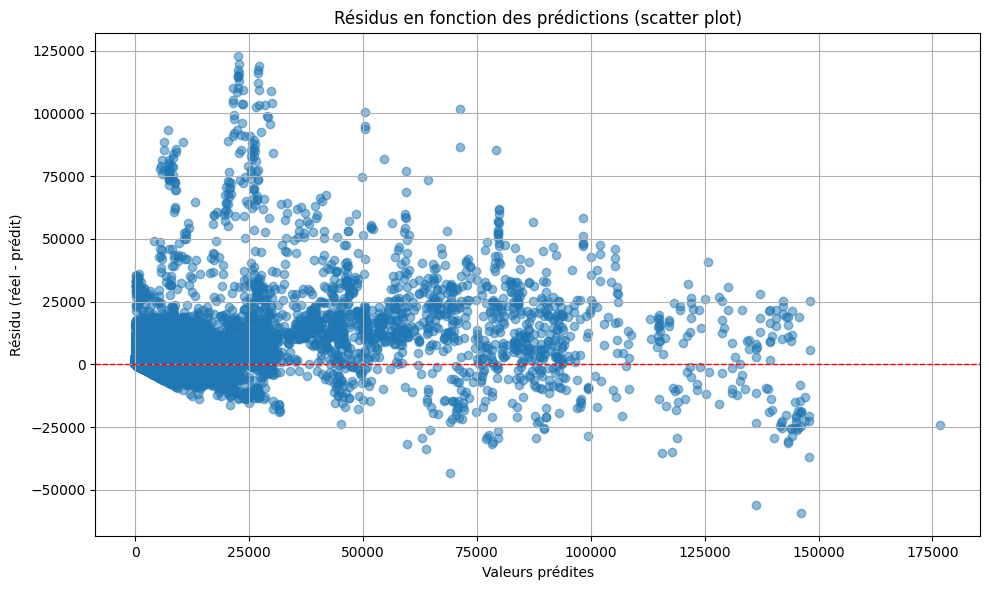

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(all_preds, global_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus en fonction des prédictions (scatter plot)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidu (réel - prédit)")
plt.grid(True)
plt.tight_layout()
plt.show()

### SHAP

Permet de voir l'importance des features dans le modèle.

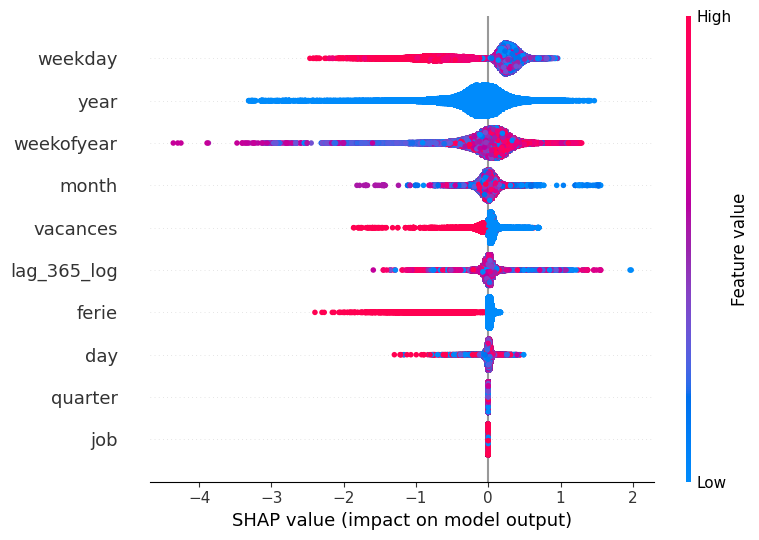

In [17]:
# Concaténer tous les shap_values et features en DataFrames
shap_array = np.vstack(all_shap_values)
features_df = pd.concat(all_feature_values)

# Créer l'objet SHAP explicatif complet
global_shap_values = shap.Explanation(
    values=shap_array,
    base_values=np.mean(shap_array, axis=0),
    data=features_df.values,
    feature_names=features_df.columns.tolist()
)

# Plot global
shap.summary_plot(global_shap_values, features_df)

Corrélation entre lag_365_log et prédictions : 0.479 (p = 0.000e+00)


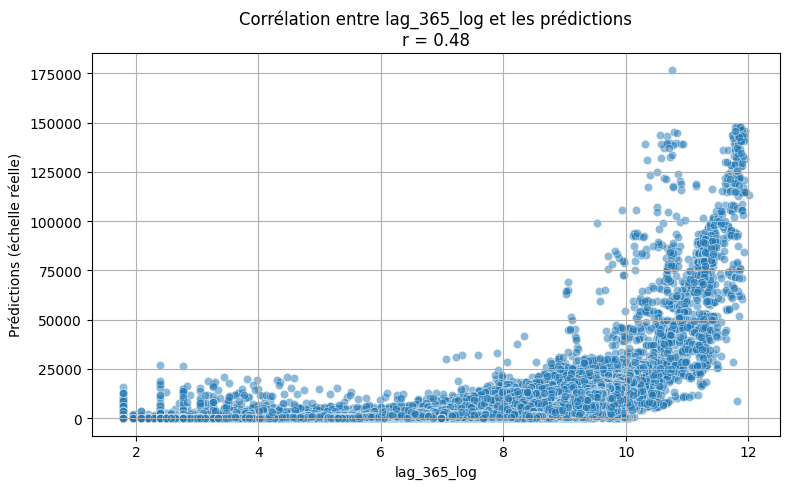

In [19]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Stocker toutes les valeurs
all_lag_365_log = []

# Reboucle rapide pour récupérer lag_365_log + préds (en plus de all_preds déjà dispo)
for station in df_train['station'].unique():
    try:
        valid_data = df_train[(df_train['station'] == station) & (df_train['year'] == 2022)]
        all_lag_365_log.extend(valid_data['lag_365_log'])
    except:
        continue

# Convertir en array
all_lag_365_log = np.array(all_lag_365_log)

# Calcul corrélation de Pearson
corr, p_value = pearsonr(all_lag_365_log, all_preds)
print(f"Corrélation entre lag_365_log et prédictions : {corr:.3f} (p = {p_value:.3e})")

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=all_lag_365_log, y=all_preds, alpha=0.5)
plt.title(f"Corrélation entre lag_365_log et les prédictions\nr = {corr:.2f}")
plt.xlabel("lag_365_log")
plt.ylabel("Prédictions (échelle réelle)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Optimisation des hyperparamètres et prédictions sur les données de test

In [122]:
import optuna
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

features = ['ferie', 'vacances', 'weekday', 'weekofyear','day','job','month','year',
            'quarter', 'lag_365_log']
target = 'y_log'

optimized_params = {}
validation_mapes = {}
all_test_preds = []

def optimize_xgb_for_station(df_train, features, target, station):
    train_data = df_train[(df_train['station'] == station) & (df_train['year'] < 2022)]
    valid_data = df_train[(df_train['station'] == station) & (df_train['year'] == 2022)]


    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
        }

        model = xgb.XGBRegressor(**params)
        model.fit(train_data[features], train_data[target])
        preds = model.predict(valid_data[features])
        mape = mean_absolute_percentage_error(np.expm1(valid_data[target]), np.expm1(preds))
        return mape

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20, timeout=120)

    return study.best_params, study.best_value

# Boucle sur les stations
for station in df_train['station'].unique():
    try:
        print(f"Optimisation station {station}")
        best_params, best_mape = optimize_xgb_for_station(df_train, features, target, station)
        optimized_params[station] = best_params
        validation_mapes[station] = best_mape
        print(f" {station} — MAPE validée : {best_mape:.4f}")

        # Réentraîner sur toutes les données dispo
        full_train = df_train[df_train['station'] == station]
        test_data = df_test[df_test['station'] == station]

        model = xgb.XGBRegressor(**best_params)
        model.fit(full_train[features], full_train[target])

        test_data['y_pred'] = np.expm1(model.predict(test_data[features]))
        all_test_preds.append(test_data[['index','date', 'station', 'y_pred']])

    except Exception as e:
        print(f" Erreur station {station} : {e}")

# Fusionner les résultats test
df_submission = pd.concat(all_test_preds, ignore_index=True)

[I 2025-03-22 18:25:47,292] A new study created in memory with name: no-name-771c7fac-7935-4ebd-9559-7da5a7bf50ea
[I 2025-03-22 18:25:47,327] Trial 0 finished with value: 0.3481394275626263 and parameters: {'n_estimators': 158, 'max_depth': 3, 'learning_rate': 0.2026963169502858, 'subsample': 0.9105737414931615, 'colsample_bytree': 0.6868896883735928, 'gamma': 4.5071732089515, 'reg_alpha': 4.416800626316231, 'reg_lambda': 1.3334244785716842}. Best is trial 0 with value: 0.3481394275626263.
[I 2025-03-22 18:25:47,387] Trial 1 finished with value: 0.3352007707497401 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.26249352080765387, 'subsample': 0.9469289576329701, 'colsample_bytree': 0.8940237336975643, 'gamma': 0.05883181087625977, 'reg_alpha': 3.7845859850422814, 'reg_lambda': 0.36175379622857995}. Best is trial 1 with value: 0.3352007707497401.
[I 2025-03-22 18:25:47,432] Trial 2 finished with value: 0.34494223141624347 and parameters: {'n_estimators': 130, 'm

Optimisation station 1J7


[I 2025-03-22 18:25:47,463] Trial 3 finished with value: 0.33894075403001206 and parameters: {'n_estimators': 86, 'max_depth': 5, 'learning_rate': 0.12776286943630522, 'subsample': 0.7431761765770838, 'colsample_bytree': 0.8081328605054888, 'gamma': 3.7502106102503854, 'reg_alpha': 3.8445350584703295, 'reg_lambda': 2.8856697249818164}. Best is trial 1 with value: 0.3352007707497401.
[I 2025-03-22 18:25:47,510] Trial 4 finished with value: 0.32743141176571683 and parameters: {'n_estimators': 206, 'max_depth': 4, 'learning_rate': 0.26208251455216147, 'subsample': 0.7054589996610533, 'colsample_bytree': 0.7045485671981555, 'gamma': 1.8162578331046046, 'reg_alpha': 2.8939762282274266, 'reg_lambda': 1.7325390595845342}. Best is trial 4 with value: 0.32743141176571683.
[I 2025-03-22 18:25:47,539] Trial 5 finished with value: 0.3335872996830699 and parameters: {'n_estimators': 106, 'max_depth': 9, 'learning_rate': 0.13544596573498854, 'subsample': 0.8311728398429958, 'colsample_bytree': 0.791

 1J7 — MAPE validée : 0.3199
Optimisation station S3E


[I 2025-03-22 18:25:48,571] Trial 1 finished with value: 0.7232172478046259 and parameters: {'n_estimators': 199, 'max_depth': 3, 'learning_rate': 0.15939189534671303, 'subsample': 0.6431717468192253, 'colsample_bytree': 0.8184809663752725, 'gamma': 4.701056902601005, 'reg_alpha': 0.11288741248010159, 'reg_lambda': 1.9387228032790682}. Best is trial 0 with value: 0.7101686462134463.
[I 2025-03-22 18:25:48,607] Trial 2 finished with value: 0.6915915789600732 and parameters: {'n_estimators': 139, 'max_depth': 8, 'learning_rate': 0.2501231243223574, 'subsample': 0.8567264441423281, 'colsample_bytree': 0.9114875301359459, 'gamma': 1.5469883898583825, 'reg_alpha': 1.9242741241733152, 'reg_lambda': 3.5506959671128886}. Best is trial 2 with value: 0.6915915789600732.
[I 2025-03-22 18:25:48,639] Trial 3 finished with value: 0.7186120130365888 and parameters: {'n_estimators': 148, 'max_depth': 4, 'learning_rate': 0.16121492453265057, 'subsample': 0.9266645595375511, 'colsample_bytree': 0.984591

 S3E — MAPE validée : 0.6675
Optimisation station RDK


[I 2025-03-22 18:25:49,817] Trial 1 finished with value: 1.2164580141460715 and parameters: {'n_estimators': 198, 'max_depth': 3, 'learning_rate': 0.06219849808815082, 'subsample': 0.6369442044695771, 'colsample_bytree': 0.7787447856849847, 'gamma': 0.9706904385012732, 'reg_alpha': 2.754017291650924, 'reg_lambda': 2.136930229377211}. Best is trial 0 with value: 1.2147696734647024.
[I 2025-03-22 18:25:49,857] Trial 2 finished with value: 1.1177493042580764 and parameters: {'n_estimators': 171, 'max_depth': 10, 'learning_rate': 0.2900527649236938, 'subsample': 0.906079205530728, 'colsample_bytree': 0.9671949069812538, 'gamma': 0.376145397386225, 'reg_alpha': 0.4214532593811271, 'reg_lambda': 1.1429894177379225}. Best is trial 2 with value: 1.1177493042580764.
[I 2025-03-22 18:25:49,894] Trial 3 finished with value: 1.232352981825092 and parameters: {'n_estimators': 238, 'max_depth': 6, 'learning_rate': 0.24164641159180889, 'subsample': 0.9338313977358937, 'colsample_bytree': 0.7580039306

 RDK — MAPE validée : 1.1177
Optimisation station I9U


[I 2025-03-22 18:25:50,993] Trial 1 finished with value: 0.5228698039647265 and parameters: {'n_estimators': 163, 'max_depth': 4, 'learning_rate': 0.10270619095217441, 'subsample': 0.8371697264510072, 'colsample_bytree': 0.6197503553353334, 'gamma': 0.20353438322783024, 'reg_alpha': 0.3711554907979048, 'reg_lambda': 3.4065112422476957}. Best is trial 0 with value: 0.473781987909864.
[I 2025-03-22 18:25:51,039] Trial 2 finished with value: 0.4929383790990805 and parameters: {'n_estimators': 225, 'max_depth': 9, 'learning_rate': 0.24748347245573932, 'subsample': 0.7444026828976407, 'colsample_bytree': 0.7103826191058742, 'gamma': 1.4599931751981048, 'reg_alpha': 1.9851635141927304, 'reg_lambda': 0.7702004685041103}. Best is trial 0 with value: 0.473781987909864.
[I 2025-03-22 18:25:51,085] Trial 3 finished with value: 0.47968511132537345 and parameters: {'n_estimators': 243, 'max_depth': 8, 'learning_rate': 0.11981815630366205, 'subsample': 0.9634943954484514, 'colsample_bytree': 0.94807

 I9U — MAPE validée : 0.4394
Optimisation station OM7


[I 2025-03-22 18:25:52,363] Trial 1 finished with value: 2.549050476069816 and parameters: {'n_estimators': 201, 'max_depth': 5, 'learning_rate': 0.08082473819979347, 'subsample': 0.6613888017226376, 'colsample_bytree': 0.8645676708091352, 'gamma': 0.508951796877859, 'reg_alpha': 3.8647113247990856, 'reg_lambda': 3.4350221637230423}. Best is trial 1 with value: 2.549050476069816.
[I 2025-03-22 18:25:52,418] Trial 2 finished with value: 2.6123717954781625 and parameters: {'n_estimators': 257, 'max_depth': 6, 'learning_rate': 0.17509015280483303, 'subsample': 0.7343398074277354, 'colsample_bytree': 0.9265021223940001, 'gamma': 2.343563698720522, 'reg_alpha': 1.242477625587557, 'reg_lambda': 3.220502426062573}. Best is trial 1 with value: 2.549050476069816.
[I 2025-03-22 18:25:52,469] Trial 3 finished with value: 2.529617164987375 and parameters: {'n_estimators': 258, 'max_depth': 5, 'learning_rate': 0.2934656559080484, 'subsample': 0.7856875947908245, 'colsample_bytree': 0.90407604128350

 OM7 — MAPE validée : 2.3314
Optimisation station 09U


[I 2025-03-22 18:25:53,533] Trial 2 finished with value: 0.7355650066371027 and parameters: {'n_estimators': 216, 'max_depth': 4, 'learning_rate': 0.25086906348200916, 'subsample': 0.8935260340073432, 'colsample_bytree': 0.884114758455885, 'gamma': 0.8416781111772093, 'reg_alpha': 3.3754706324862482, 'reg_lambda': 4.5989283901717}. Best is trial 2 with value: 0.7355650066371027.
[I 2025-03-22 18:25:53,559] Trial 3 finished with value: 0.7942188552292533 and parameters: {'n_estimators': 75, 'max_depth': 8, 'learning_rate': 0.15724909964939304, 'subsample': 0.7655796477974373, 'colsample_bytree': 0.7250335656555162, 'gamma': 0.8222209070014291, 'reg_alpha': 1.9979214546663187, 'reg_lambda': 3.5628116612324794}. Best is trial 2 with value: 0.7355650066371027.
[I 2025-03-22 18:25:53,578] Trial 4 finished with value: 0.8424815879964701 and parameters: {'n_estimators': 60, 'max_depth': 9, 'learning_rate': 0.29783516361888457, 'subsample': 0.6720877077714953, 'colsample_bytree': 0.74532030688

 09U — MAPE validée : 0.6969
Optimisation station 0S9


[I 2025-03-22 18:25:54,597] Trial 1 finished with value: 1.4375308560699636 and parameters: {'n_estimators': 276, 'max_depth': 8, 'learning_rate': 0.014142868997122544, 'subsample': 0.7689803065418868, 'colsample_bytree': 0.6873254081329105, 'gamma': 3.50331908611123, 'reg_alpha': 2.588676471808501, 'reg_lambda': 4.909892270555355}. Best is trial 0 with value: 1.393066193474965.
[I 2025-03-22 18:25:54,641] Trial 2 finished with value: 1.3191585563849852 and parameters: {'n_estimators': 166, 'max_depth': 4, 'learning_rate': 0.08381338256957115, 'subsample': 0.7680901360603768, 'colsample_bytree': 0.7534265537665408, 'gamma': 1.0997968836818321, 'reg_alpha': 2.989585119830254, 'reg_lambda': 1.77293909361403}. Best is trial 2 with value: 1.3191585563849852.
[I 2025-03-22 18:25:54,690] Trial 3 finished with value: 1.3463521910890044 and parameters: {'n_estimators': 218, 'max_depth': 6, 'learning_rate': 0.08130591948901932, 'subsample': 0.9496312205454313, 'colsample_bytree': 0.991786651720

 0S9 — MAPE validée : 1.2479
Optimisation station KO0


[I 2025-03-22 18:25:55,824] Trial 2 finished with value: 0.7776266183376404 and parameters: {'n_estimators': 204, 'max_depth': 5, 'learning_rate': 0.09121166581519868, 'subsample': 0.6144690019196136, 'colsample_bytree': 0.7407215237796487, 'gamma': 2.218737511228923, 'reg_alpha': 3.2294429484542455, 'reg_lambda': 0.6160682986999072}. Best is trial 2 with value: 0.7776266183376404.
[I 2025-03-22 18:25:55,853] Trial 3 finished with value: 0.8121344136412136 and parameters: {'n_estimators': 147, 'max_depth': 3, 'learning_rate': 0.2227935768709337, 'subsample': 0.7038143624011316, 'colsample_bytree': 0.9819359390510044, 'gamma': 4.831164882636292, 'reg_alpha': 0.7451109782255877, 'reg_lambda': 0.35371904060368276}. Best is trial 2 with value: 0.7776266183376404.
[I 2025-03-22 18:25:55,893] Trial 4 finished with value: 0.7530662750518593 and parameters: {'n_estimators': 84, 'max_depth': 8, 'learning_rate': 0.03188427544016733, 'subsample': 0.6850210515159849, 'colsample_bytree': 0.63419170

 KO0 — MAPE validée : 0.7331
Optimisation station 4WI


[I 2025-03-22 18:25:56,818] Trial 1 finished with value: 0.25624440066429033 and parameters: {'n_estimators': 87, 'max_depth': 5, 'learning_rate': 0.020846568867520482, 'subsample': 0.6698411242202307, 'colsample_bytree': 0.9604083571671755, 'gamma': 3.5696985467183264, 'reg_alpha': 4.565449041714855, 'reg_lambda': 3.154462028585734}. Best is trial 0 with value: 0.23643499003919854.
[I 2025-03-22 18:25:56,853] Trial 2 finished with value: 0.2254526933234616 and parameters: {'n_estimators': 145, 'max_depth': 6, 'learning_rate': 0.21254738507805662, 'subsample': 0.88394156148182, 'colsample_bytree': 0.7838696421722053, 'gamma': 0.9336691534740982, 'reg_alpha': 2.4851182757159176, 'reg_lambda': 0.991662379647622}. Best is trial 2 with value: 0.2254526933234616.
[I 2025-03-22 18:25:56,905] Trial 3 finished with value: 0.23523493876321744 and parameters: {'n_estimators': 233, 'max_depth': 8, 'learning_rate': 0.08405301410695715, 'subsample': 0.6755199304078168, 'colsample_bytree': 0.9814874

 4WI — MAPE validée : 0.2187
Optimisation station 23N


[I 2025-03-22 18:25:57,982] Trial 1 finished with value: 0.6724916026467714 and parameters: {'n_estimators': 184, 'max_depth': 4, 'learning_rate': 0.05184610125993907, 'subsample': 0.7975698080889848, 'colsample_bytree': 0.7829129169752668, 'gamma': 1.6372574216975395, 'reg_alpha': 0.9355390785843393, 'reg_lambda': 1.5227714573155042}. Best is trial 0 with value: 0.6231935328732813.
[I 2025-03-22 18:25:58,006] Trial 2 finished with value: 0.6987638008239694 and parameters: {'n_estimators': 84, 'max_depth': 4, 'learning_rate': 0.17248442975872957, 'subsample': 0.6012027081606158, 'colsample_bytree': 0.9550390682515105, 'gamma': 4.134810891057544, 'reg_alpha': 0.9237716168282212, 'reg_lambda': 0.7271353214750814}. Best is trial 0 with value: 0.6231935328732813.
[I 2025-03-22 18:25:58,055] Trial 3 finished with value: 0.6411024472062166 and parameters: {'n_estimators': 268, 'max_depth': 3, 'learning_rate': 0.24445138628895352, 'subsample': 0.6420229221862684, 'colsample_bytree': 0.8346890

 23N — MAPE validée : 0.6154
Optimisation station WVV


[I 2025-03-22 18:25:59,127] Trial 0 finished with value: 1.0586282912103249 and parameters: {'n_estimators': 71, 'max_depth': 8, 'learning_rate': 0.0923850390697612, 'subsample': 0.6255398192373374, 'colsample_bytree': 0.8006779888596457, 'gamma': 2.7564867553197296, 'reg_alpha': 3.032930126823171, 'reg_lambda': 1.3931223628120182}. Best is trial 0 with value: 1.0586282912103249.
[I 2025-03-22 18:25:59,175] Trial 1 finished with value: 1.0810069040735315 and parameters: {'n_estimators': 148, 'max_depth': 7, 'learning_rate': 0.11973999912354996, 'subsample': 0.6744530514650223, 'colsample_bytree': 0.9243170082957719, 'gamma': 4.81716748016079, 'reg_alpha': 3.5467352476025846, 'reg_lambda': 2.300874004002456}. Best is trial 0 with value: 1.0586282912103249.
[I 2025-03-22 18:25:59,255] Trial 2 finished with value: 1.024274618074425 and parameters: {'n_estimators': 271, 'max_depth': 10, 'learning_rate': 0.1754409145918127, 'subsample': 0.8503798514352328, 'colsample_bytree': 0.696474693535

 WVV — MAPE validée : 0.9874
Optimisation station SWS


[I 2025-03-22 18:26:00,656] Trial 1 finished with value: 0.7384971976690172 and parameters: {'n_estimators': 277, 'max_depth': 8, 'learning_rate': 0.16861662714153416, 'subsample': 0.7406131193531548, 'colsample_bytree': 0.7756831339364628, 'gamma': 0.10950437451403339, 'reg_alpha': 0.5250279941665675, 'reg_lambda': 0.9537481501342754}. Best is trial 0 with value: 0.7383836745910209.
[I 2025-03-22 18:26:00,697] Trial 2 finished with value: 0.7950916282972348 and parameters: {'n_estimators': 103, 'max_depth': 9, 'learning_rate': 0.2922722485187046, 'subsample': 0.6813941470364199, 'colsample_bytree': 0.9480741209910967, 'gamma': 0.285101346514699, 'reg_alpha': 0.27515792321050225, 'reg_lambda': 3.0541032535943198}. Best is trial 0 with value: 0.7383836745910209.
[I 2025-03-22 18:26:00,734] Trial 3 finished with value: 0.7134690361910134 and parameters: {'n_estimators': 159, 'max_depth': 5, 'learning_rate': 0.06292352454736078, 'subsample': 0.6943057161397949, 'colsample_bytree': 0.65086

 SWS — MAPE validée : 0.6803
Optimisation station TFW


[I 2025-03-22 18:26:01,731] Trial 1 finished with value: 1.0142120381549953 and parameters: {'n_estimators': 97, 'max_depth': 8, 'learning_rate': 0.09371041497917208, 'subsample': 0.6039046027310236, 'colsample_bytree': 0.7474782337196316, 'gamma': 1.820521764710914, 'reg_alpha': 4.98320318501068, 'reg_lambda': 1.3931572852110286}. Best is trial 1 with value: 1.0142120381549953.
[I 2025-03-22 18:26:01,773] Trial 2 finished with value: 1.0328131939720708 and parameters: {'n_estimators': 101, 'max_depth': 5, 'learning_rate': 0.12072452476632506, 'subsample': 0.6903564264541364, 'colsample_bytree': 0.8283040568675714, 'gamma': 4.56910817529254, 'reg_alpha': 4.10696299416644, 'reg_lambda': 4.490066252809343}. Best is trial 1 with value: 1.0142120381549953.
[I 2025-03-22 18:26:01,816] Trial 3 finished with value: 1.115247146464577 and parameters: {'n_estimators': 213, 'max_depth': 4, 'learning_rate': 0.2749887550478687, 'subsample': 0.6650658288464149, 'colsample_bytree': 0.7516619535336, '

 TFW — MAPE validée : 0.9843
Optimisation station X3T


[I 2025-03-22 18:26:03,083] Trial 2 finished with value: 2.045272844102926 and parameters: {'n_estimators': 96, 'max_depth': 3, 'learning_rate': 0.23824351362518184, 'subsample': 0.8813129722874413, 'colsample_bytree': 0.8256215529606489, 'gamma': 3.4395062706791277, 'reg_alpha': 3.7701277731468426, 'reg_lambda': 1.1559984935384997}. Best is trial 1 with value: 1.1601901142717763.
[I 2025-03-22 18:26:03,129] Trial 3 finished with value: 0.9468309195488716 and parameters: {'n_estimators': 146, 'max_depth': 6, 'learning_rate': 0.24908130961561287, 'subsample': 0.6514614793629111, 'colsample_bytree': 0.8917700902825662, 'gamma': 2.2343623304516544, 'reg_alpha': 2.108176721729736, 'reg_lambda': 3.656152882624293}. Best is trial 3 with value: 0.9468309195488716.
[I 2025-03-22 18:26:03,177] Trial 4 finished with value: 2.444868434441834 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.029475766193668942, 'subsample': 0.8457548047343083, 'colsample_bytree': 0.884255515

 X3T — MAPE validée : 0.7484
Optimisation station I8D


[I 2025-03-22 18:26:04,438] Trial 2 finished with value: 0.788302975201251 and parameters: {'n_estimators': 134, 'max_depth': 7, 'learning_rate': 0.20237833518737453, 'subsample': 0.7259700655196213, 'colsample_bytree': 0.8138924965004147, 'gamma': 2.0949893841003893, 'reg_alpha': 2.5979475942002845, 'reg_lambda': 4.796864395229579}. Best is trial 2 with value: 0.788302975201251.
[I 2025-03-22 18:26:04,507] Trial 3 finished with value: 0.8211499758005788 and parameters: {'n_estimators': 208, 'max_depth': 6, 'learning_rate': 0.06547865469053343, 'subsample': 0.7799949730825634, 'colsample_bytree': 0.8784632566328192, 'gamma': 0.5162985035308687, 'reg_alpha': 2.776814632057232, 'reg_lambda': 0.5380463819819659}. Best is trial 2 with value: 0.788302975201251.
[I 2025-03-22 18:26:04,533] Trial 4 finished with value: 1.1201433884812222 and parameters: {'n_estimators': 119, 'max_depth': 3, 'learning_rate': 0.19164886198237288, 'subsample': 0.6490362893771022, 'colsample_bytree': 0.8684977893

 I8D — MAPE validée : 0.7883
Optimisation station EOE


[I 2025-03-22 18:26:05,595] Trial 1 finished with value: 0.3251749652783845 and parameters: {'n_estimators': 274, 'max_depth': 6, 'learning_rate': 0.062204380896577385, 'subsample': 0.696641709941456, 'colsample_bytree': 0.6705721433282398, 'gamma': 1.596349492465869, 'reg_alpha': 4.367413626613824, 'reg_lambda': 4.021130346543117}. Best is trial 0 with value: 0.3184543489409995.
[I 2025-03-22 18:26:05,661] Trial 2 finished with value: 0.3265129092737331 and parameters: {'n_estimators': 244, 'max_depth': 6, 'learning_rate': 0.04266999810449007, 'subsample': 0.7172730158255411, 'colsample_bytree': 0.7786582396918978, 'gamma': 4.507168081325037, 'reg_alpha': 0.006804316512318276, 'reg_lambda': 1.2733724560344766}. Best is trial 0 with value: 0.3184543489409995.
[I 2025-03-22 18:26:05,703] Trial 3 finished with value: 0.32338056708457813 and parameters: {'n_estimators': 219, 'max_depth': 5, 'learning_rate': 0.14096093434027404, 'subsample': 0.7058348479700988, 'colsample_bytree': 0.678050

 EOE — MAPE validée : 0.3072
Optimisation station MBC


[I 2025-03-22 18:26:06,858] Trial 2 finished with value: 0.815120372703803 and parameters: {'n_estimators': 233, 'max_depth': 6, 'learning_rate': 0.1913620414414942, 'subsample': 0.7548634805300162, 'colsample_bytree': 0.7747070337405496, 'gamma': 1.4869248157261827, 'reg_alpha': 0.3500739919307094, 'reg_lambda': 1.5917367612550626}. Best is trial 2 with value: 0.815120372703803.
[I 2025-03-22 18:26:06,903] Trial 3 finished with value: 0.7971476936410173 and parameters: {'n_estimators': 243, 'max_depth': 6, 'learning_rate': 0.13836156787940368, 'subsample': 0.6858590274000307, 'colsample_bytree': 0.9313739974375664, 'gamma': 3.594351060549559, 'reg_alpha': 3.1524071181499487, 'reg_lambda': 1.509343531282693}. Best is trial 3 with value: 0.7971476936410173.
[I 2025-03-22 18:26:06,935] Trial 4 finished with value: 0.8726952250330666 and parameters: {'n_estimators': 142, 'max_depth': 10, 'learning_rate': 0.08373965690018474, 'subsample': 0.7572455483082072, 'colsample_bytree': 0.675527316

 MBC — MAPE validée : 0.7630
Optimisation station VS0


[I 2025-03-22 18:26:08,004] Trial 2 finished with value: 0.6969426295771818 and parameters: {'n_estimators': 207, 'max_depth': 4, 'learning_rate': 0.14402504230488522, 'subsample': 0.7258415589694454, 'colsample_bytree': 0.6570001327181468, 'gamma': 0.21670821614871105, 'reg_alpha': 3.265532760757347, 'reg_lambda': 3.486902342593158}. Best is trial 1 with value: 0.6580695750894638.
[I 2025-03-22 18:26:08,040] Trial 3 finished with value: 0.6652755618594021 and parameters: {'n_estimators': 216, 'max_depth': 6, 'learning_rate': 0.17471654431379272, 'subsample': 0.7013857994354651, 'colsample_bytree': 0.9040855467326444, 'gamma': 4.7053004717241675, 'reg_alpha': 2.286336853822168, 'reg_lambda': 2.346585391579467}. Best is trial 1 with value: 0.6580695750894638.
[I 2025-03-22 18:26:08,059] Trial 4 finished with value: 0.6503965008868099 and parameters: {'n_estimators': 76, 'max_depth': 7, 'learning_rate': 0.24426001448014778, 'subsample': 0.6736566384046446, 'colsample_bytree': 0.978230019

 VS0 — MAPE validée : 0.6504
Optimisation station EVR


[I 2025-03-22 18:26:09,019] Trial 2 finished with value: 0.6125678046537705 and parameters: {'n_estimators': 165, 'max_depth': 7, 'learning_rate': 0.1579833101325254, 'subsample': 0.890798134347929, 'colsample_bytree': 0.607751096714743, 'gamma': 3.1607873744443933, 'reg_alpha': 2.1589807768683626, 'reg_lambda': 1.8826040902619385}. Best is trial 1 with value: 0.601630455456284.
[I 2025-03-22 18:26:09,065] Trial 3 finished with value: 0.5808418857974739 and parameters: {'n_estimators': 136, 'max_depth': 6, 'learning_rate': 0.062345591701864544, 'subsample': 0.6461442660132691, 'colsample_bytree': 0.6779649733207894, 'gamma': 3.237916178469083, 'reg_alpha': 4.415983683008873, 'reg_lambda': 1.923686342482271}. Best is trial 3 with value: 0.5808418857974739.
[I 2025-03-22 18:26:09,125] Trial 4 finished with value: 0.5774677282677795 and parameters: {'n_estimators': 261, 'max_depth': 6, 'learning_rate': 0.19043921843147207, 'subsample': 0.8054680724566051, 'colsample_bytree': 0.75204895800

 EVR — MAPE validée : 0.5530
Optimisation station BZL


[I 2025-03-22 18:26:10,140] Trial 0 finished with value: 0.3853855629610855 and parameters: {'n_estimators': 214, 'max_depth': 4, 'learning_rate': 0.01111537282983454, 'subsample': 0.8235219005290628, 'colsample_bytree': 0.990647397621395, 'gamma': 2.7621335510815315, 'reg_alpha': 2.9867772662287075, 'reg_lambda': 4.941678851333196}. Best is trial 0 with value: 0.3853855629610855.
[I 2025-03-22 18:26:10,185] Trial 1 finished with value: 0.35708881242120927 and parameters: {'n_estimators': 197, 'max_depth': 6, 'learning_rate': 0.07702292957677295, 'subsample': 0.8984447890428113, 'colsample_bytree': 0.8282373914314614, 'gamma': 2.8402435370264456, 'reg_alpha': 0.8792910278521343, 'reg_lambda': 4.370122932132093}. Best is trial 1 with value: 0.35708881242120927.
[I 2025-03-22 18:26:10,218] Trial 2 finished with value: 0.34882287476300067 and parameters: {'n_estimators': 136, 'max_depth': 8, 'learning_rate': 0.19608155726488888, 'subsample': 0.9674227532570073, 'colsample_bytree': 0.76581

 BZL — MAPE validée : 0.3475
Optimisation station DF2


[I 2025-03-22 18:26:11,614] Trial 0 finished with value: 0.2866997045452033 and parameters: {'n_estimators': 260, 'max_depth': 5, 'learning_rate': 0.20651537504992767, 'subsample': 0.7633142402059561, 'colsample_bytree': 0.7990603577350904, 'gamma': 1.1028584707042404, 'reg_alpha': 0.5125817947566114, 'reg_lambda': 1.2696150309475096}. Best is trial 0 with value: 0.2866997045452033.
[I 2025-03-22 18:26:11,631] Trial 1 finished with value: 0.29120621429102334 and parameters: {'n_estimators': 55, 'max_depth': 8, 'learning_rate': 0.16699327110242151, 'subsample': 0.8972645941396902, 'colsample_bytree': 0.990959382291594, 'gamma': 4.872115765841434, 'reg_alpha': 2.1464626733805496, 'reg_lambda': 4.724221914662}. Best is trial 0 with value: 0.2866997045452033.
[I 2025-03-22 18:26:11,669] Trial 2 finished with value: 0.294975124179735 and parameters: {'n_estimators': 199, 'max_depth': 8, 'learning_rate': 0.2712468272430319, 'subsample': 0.8571556059101395, 'colsample_bytree': 0.7677126590380

 DF2 — MAPE validée : 0.2779
Optimisation station APM


[I 2025-03-22 18:26:13,681] Trial 1 finished with value: 0.5511576764483715 and parameters: {'n_estimators': 61, 'max_depth': 4, 'learning_rate': 0.045544562230897465, 'subsample': 0.914277790125198, 'colsample_bytree': 0.8620729369303601, 'gamma': 3.4243324410132745, 'reg_alpha': 0.24947517060680768, 'reg_lambda': 3.7324783626310705}. Best is trial 1 with value: 0.5511576764483715.
[I 2025-03-22 18:26:13,729] Trial 2 finished with value: 0.5379005536974366 and parameters: {'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.08476853649608378, 'subsample': 0.8871373273212657, 'colsample_bytree': 0.6968833670216417, 'gamma': 3.568912718814699, 'reg_alpha': 1.018944608761404, 'reg_lambda': 4.141055612389013}. Best is trial 2 with value: 0.5379005536974366.
[I 2025-03-22 18:26:13,785] Trial 3 finished with value: 0.5763078404486759 and parameters: {'n_estimators': 172, 'max_depth': 9, 'learning_rate': 0.043100325072517466, 'subsample': 0.8475940502037904, 'colsample_bytree': 0.7994773

 APM — MAPE validée : 0.5017
Optimisation station 12Q


[I 2025-03-22 18:26:14,730] Trial 1 finished with value: 0.7561808838396504 and parameters: {'n_estimators': 257, 'max_depth': 10, 'learning_rate': 0.10171551119834915, 'subsample': 0.6388652070567448, 'colsample_bytree': 0.6563554245776149, 'gamma': 0.1885245078082748, 'reg_alpha': 2.929850845001905, 'reg_lambda': 4.547581458576638}. Best is trial 1 with value: 0.7561808838396504.
[I 2025-03-22 18:26:14,764] Trial 2 finished with value: 0.7285586371299293 and parameters: {'n_estimators': 194, 'max_depth': 9, 'learning_rate': 0.19659848640174418, 'subsample': 0.9317996112128968, 'colsample_bytree': 0.9806847132957663, 'gamma': 2.657525520241333, 'reg_alpha': 3.3778575359551266, 'reg_lambda': 3.514247749396807}. Best is trial 2 with value: 0.7285586371299293.
[I 2025-03-22 18:26:14,830] Trial 3 finished with value: 0.8112352709313707 and parameters: {'n_estimators': 206, 'max_depth': 3, 'learning_rate': 0.011448953602369685, 'subsample': 0.7849003534806647, 'colsample_bytree': 0.9450305

 12Q — MAPE validée : 0.6947
Optimisation station L6F


[I 2025-03-22 18:26:15,850] Trial 2 finished with value: 1.275053659500117 and parameters: {'n_estimators': 216, 'max_depth': 6, 'learning_rate': 0.02471464396844086, 'subsample': 0.9748803642019535, 'colsample_bytree': 0.6169500338422542, 'gamma': 1.6204148701161725, 'reg_alpha': 3.4115411143401877, 'reg_lambda': 4.237703303118228}. Best is trial 1 with value: 1.0931526785884513.
[I 2025-03-22 18:26:15,883] Trial 3 finished with value: 1.2336382041361085 and parameters: {'n_estimators': 142, 'max_depth': 3, 'learning_rate': 0.16888740466284063, 'subsample': 0.9652108628069147, 'colsample_bytree': 0.7387683892085827, 'gamma': 2.7497826756075416, 'reg_alpha': 0.9301974278036873, 'reg_lambda': 1.4631096180166547}. Best is trial 1 with value: 1.0931526785884513.
[I 2025-03-22 18:26:15,910] Trial 4 finished with value: 1.0878160975658528 and parameters: {'n_estimators': 105, 'max_depth': 3, 'learning_rate': 0.27139304181072327, 'subsample': 0.9566189282477897, 'colsample_bytree': 0.8041824

 L6F — MAPE validée : 1.0072
Optimisation station WDP


[I 2025-03-22 18:26:16,841] Trial 0 finished with value: 0.9756677809168294 and parameters: {'n_estimators': 297, 'max_depth': 4, 'learning_rate': 0.23515881231273547, 'subsample': 0.9869958534229288, 'colsample_bytree': 0.717832987384516, 'gamma': 2.2961712636041804, 'reg_alpha': 0.9042450439995892, 'reg_lambda': 0.02893747118489276}. Best is trial 0 with value: 0.9756677809168294.
[I 2025-03-22 18:26:16,923] Trial 1 finished with value: 1.0087779660009644 and parameters: {'n_estimators': 155, 'max_depth': 3, 'learning_rate': 0.1455107011414677, 'subsample': 0.6545750811193846, 'colsample_bytree': 0.8776016644972816, 'gamma': 1.4157666099741766, 'reg_alpha': 0.10914974691679902, 'reg_lambda': 3.8606645453990893}. Best is trial 0 with value: 0.9756677809168294.
[I 2025-03-22 18:26:16,972] Trial 2 finished with value: 0.7524481454356283 and parameters: {'n_estimators': 216, 'max_depth': 6, 'learning_rate': 0.23830482658172955, 'subsample': 0.7684014957355626, 'colsample_bytree': 0.98722

 WDP — MAPE validée : 0.6763
Optimisation station ZII


[I 2025-03-22 18:26:18,183] Trial 2 finished with value: 0.3659963850279758 and parameters: {'n_estimators': 56, 'max_depth': 6, 'learning_rate': 0.0957675522010861, 'subsample': 0.9381927992450334, 'colsample_bytree': 0.8903285635494309, 'gamma': 1.4384327543069704, 'reg_alpha': 3.7547347930118775, 'reg_lambda': 1.4849395997896786}. Best is trial 2 with value: 0.3659963850279758.
[I 2025-03-22 18:26:18,307] Trial 3 finished with value: 0.3525886728771038 and parameters: {'n_estimators': 182, 'max_depth': 7, 'learning_rate': 0.015437862344067065, 'subsample': 0.620445037171589, 'colsample_bytree': 0.7451308319229338, 'gamma': 0.000956271156638544, 'reg_alpha': 4.702457373989503, 'reg_lambda': 4.13766871116824}. Best is trial 3 with value: 0.3525886728771038.
[I 2025-03-22 18:26:18,362] Trial 4 finished with value: 0.4037617412629087 and parameters: {'n_estimators': 287, 'max_depth': 4, 'learning_rate': 0.2779144525479734, 'subsample': 0.8511548398782842, 'colsample_bytree': 0.771898204

 ZII — MAPE validée : 0.3526
Optimisation station W67


[I 2025-03-22 18:26:19,535] A new study created in memory with name: no-name-030d76ea-e5d9-4121-a622-c77e7957ba1b
[I 2025-03-22 18:26:19,585] Trial 0 finished with value: 0.9893284491042826 and parameters: {'n_estimators': 272, 'max_depth': 6, 'learning_rate': 0.21521077859314652, 'subsample': 0.8894055075679845, 'colsample_bytree': 0.6568254084228716, 'gamma': 0.47551170567335377, 'reg_alpha': 2.5934823777084457, 'reg_lambda': 1.0890928934691728}. Best is trial 0 with value: 0.9893284491042826.
[I 2025-03-22 18:26:19,619] Trial 1 finished with value: 1.016140483158807 and parameters: {'n_estimators': 131, 'max_depth': 9, 'learning_rate': 0.05136034987180698, 'subsample': 0.6272108286234603, 'colsample_bytree': 0.6361067060182762, 'gamma': 4.265762873657569, 'reg_alpha': 4.385045453488677, 'reg_lambda': 3.466161142426989}. Best is trial 0 with value: 0.9893284491042826.
[I 2025-03-22 18:26:19,666] Trial 2 finished with value: 1.0099475627338907 and parameters: {'n_estimators': 271, 'ma

 W67 — MAPE validée : 0.9037
Optimisation station 4V8


[I 2025-03-22 18:26:20,899] Trial 1 finished with value: 0.5077332490555873 and parameters: {'n_estimators': 187, 'max_depth': 9, 'learning_rate': 0.14135078693404682, 'subsample': 0.965246570015434, 'colsample_bytree': 0.7494724658384078, 'gamma': 2.14400256153686, 'reg_alpha': 2.626453858708533, 'reg_lambda': 4.673603421699495}. Best is trial 0 with value: 0.5070602274335085.
[I 2025-03-22 18:26:20,953] Trial 2 finished with value: 0.5370893582257187 and parameters: {'n_estimators': 270, 'max_depth': 7, 'learning_rate': 0.23195103699463124, 'subsample': 0.9176314959057013, 'colsample_bytree': 0.7589907132697942, 'gamma': 1.5442501088368403, 'reg_alpha': 2.5401830073381553, 'reg_lambda': 2.421522295737593}. Best is trial 0 with value: 0.5070602274335085.
[I 2025-03-22 18:26:20,990] Trial 3 finished with value: 0.5602952040605496 and parameters: {'n_estimators': 235, 'max_depth': 4, 'learning_rate': 0.2011677384339443, 'subsample': 0.9450270830274381, 'colsample_bytree': 0.909487504981

 4V8 — MAPE validée : 0.4642
Optimisation station 214


[I 2025-03-22 18:26:21,981] Trial 1 finished with value: 0.2447630674859323 and parameters: {'n_estimators': 166, 'max_depth': 7, 'learning_rate': 0.048104260541596555, 'subsample': 0.8920180420682626, 'colsample_bytree': 0.6940219862405561, 'gamma': 0.3463047477563119, 'reg_alpha': 4.366396125553446, 'reg_lambda': 3.035993817303559}. Best is trial 1 with value: 0.2447630674859323.
[I 2025-03-22 18:26:22,021] Trial 2 finished with value: 0.2561172452773521 and parameters: {'n_estimators': 206, 'max_depth': 4, 'learning_rate': 0.16022533962956378, 'subsample': 0.9679637063427701, 'colsample_bytree': 0.7983626502081894, 'gamma': 1.2626662345359874, 'reg_alpha': 1.1890987740993082, 'reg_lambda': 3.389377208559956}. Best is trial 1 with value: 0.2447630674859323.
[I 2025-03-22 18:26:22,062] Trial 3 finished with value: 0.25542010573654494 and parameters: {'n_estimators': 252, 'max_depth': 7, 'learning_rate': 0.18560331508717115, 'subsample': 0.691341888745014, 'colsample_bytree': 0.6576116

 214 — MAPE validée : 0.2349
Optimisation station 2YA


[I 2025-03-22 18:26:23,272] Trial 2 finished with value: 0.27972624450485684 and parameters: {'n_estimators': 104, 'max_depth': 7, 'learning_rate': 0.13073897786648506, 'subsample': 0.6095963509203868, 'colsample_bytree': 0.9142178613862451, 'gamma': 2.042082957976214, 'reg_alpha': 0.14308281438606907, 'reg_lambda': 3.7741925394386278}. Best is trial 0 with value: 0.2708835793059688.
[I 2025-03-22 18:26:23,320] Trial 3 finished with value: 0.30752507846684535 and parameters: {'n_estimators': 247, 'max_depth': 3, 'learning_rate': 0.16168686193525325, 'subsample': 0.6430067864566292, 'colsample_bytree': 0.888919010355448, 'gamma': 2.05603038373424, 'reg_alpha': 4.349653239625378, 'reg_lambda': 3.099574420860445}. Best is trial 0 with value: 0.2708835793059688.
[I 2025-03-22 18:26:23,374] Trial 4 finished with value: 0.2839034626045736 and parameters: {'n_estimators': 281, 'max_depth': 4, 'learning_rate': 0.07145671363970428, 'subsample': 0.6501610998875029, 'colsample_bytree': 0.80281942

 2YA — MAPE validée : 0.2491
Optimisation station L15


[I 2025-03-22 18:26:24,229] Trial 2 finished with value: 0.9400587442172781 and parameters: {'n_estimators': 71, 'max_depth': 4, 'learning_rate': 0.07576104947526263, 'subsample': 0.6245322924710163, 'colsample_bytree': 0.8550896623400086, 'gamma': 3.7185790035962674, 'reg_alpha': 3.269892564550611, 'reg_lambda': 2.687649849262079}. Best is trial 0 with value: 0.8211876195343863.
[I 2025-03-22 18:26:24,289] Trial 3 finished with value: 0.6133578109030839 and parameters: {'n_estimators': 230, 'max_depth': 10, 'learning_rate': 0.1139598038828534, 'subsample': 0.7708715165546551, 'colsample_bytree': 0.6421708646997796, 'gamma': 0.54198292769362, 'reg_alpha': 3.669064354163453, 'reg_lambda': 2.2711989159102193}. Best is trial 3 with value: 0.6133578109030839.
[I 2025-03-22 18:26:24,325] Trial 4 finished with value: 0.8922609704670973 and parameters: {'n_estimators': 244, 'max_depth': 4, 'learning_rate': 0.26446229921164466, 'subsample': 0.73638248897064, 'colsample_bytree': 0.7151088639359

 L15 — MAPE validée : 0.4399
Optimisation station PRZ


[I 2025-03-22 18:26:25,730] Trial 1 finished with value: 0.5978302892756454 and parameters: {'n_estimators': 72, 'max_depth': 7, 'learning_rate': 0.21565022918339286, 'subsample': 0.6345477553754034, 'colsample_bytree': 0.6417958271492097, 'gamma': 0.7921861775005168, 'reg_alpha': 4.339273661262048, 'reg_lambda': 4.153463498214002}. Best is trial 1 with value: 0.5978302892756454.
[I 2025-03-22 18:26:25,747] Trial 2 finished with value: 0.6212730817556749 and parameters: {'n_estimators': 84, 'max_depth': 4, 'learning_rate': 0.23204153241778322, 'subsample': 0.8873810039621635, 'colsample_bytree': 0.8562894699422468, 'gamma': 4.548217782036778, 'reg_alpha': 2.766946958853888, 'reg_lambda': 0.46939511083006924}. Best is trial 1 with value: 0.5978302892756454.
[I 2025-03-22 18:26:25,784] Trial 3 finished with value: 0.6243839714129503 and parameters: {'n_estimators': 241, 'max_depth': 8, 'learning_rate': 0.25395099859234405, 'subsample': 0.9201681029531339, 'colsample_bytree': 0.6098018426

 PRZ — MAPE validée : 0.5913
Optimisation station 2UV


[I 2025-03-22 18:26:26,666] Trial 2 finished with value: 0.29704559932680774 and parameters: {'n_estimators': 260, 'max_depth': 10, 'learning_rate': 0.21877025327303637, 'subsample': 0.757374839994059, 'colsample_bytree': 0.803093297005085, 'gamma': 2.704004617141903, 'reg_alpha': 2.3456925116674587, 'reg_lambda': 4.817902889494475}. Best is trial 1 with value: 0.28698125039721345.
[I 2025-03-22 18:26:26,706] Trial 3 finished with value: 0.3080354259033496 and parameters: {'n_estimators': 206, 'max_depth': 5, 'learning_rate': 0.17952453976641064, 'subsample': 0.7674945116044594, 'colsample_bytree': 0.7897417843702097, 'gamma': 3.7912064970793304, 'reg_alpha': 3.7567431077459323, 'reg_lambda': 4.7178225853447175}. Best is trial 1 with value: 0.28698125039721345.
[I 2025-03-22 18:26:26,782] Trial 4 finished with value: 0.29135359854082693 and parameters: {'n_estimators': 251, 'max_depth': 4, 'learning_rate': 0.2573797219968509, 'subsample': 0.8607006767636122, 'colsample_bytree': 0.69680

 2UV — MAPE validée : 0.2838
Optimisation station OF0


[I 2025-03-22 18:26:28,186] Trial 1 finished with value: 2.5573404086216875 and parameters: {'n_estimators': 108, 'max_depth': 9, 'learning_rate': 0.12399699299790662, 'subsample': 0.8949454146628357, 'colsample_bytree': 0.7228269751779451, 'gamma': 1.9189043836166697, 'reg_alpha': 0.051738724808019776, 'reg_lambda': 2.19234084413011}. Best is trial 1 with value: 2.5573404086216875.
[I 2025-03-22 18:26:28,211] Trial 2 finished with value: 2.553233507580101 and parameters: {'n_estimators': 84, 'max_depth': 8, 'learning_rate': 0.21390658673787769, 'subsample': 0.9691610386266618, 'colsample_bytree': 0.75488015703928, 'gamma': 3.9429930551538837, 'reg_alpha': 2.0251051349283062, 'reg_lambda': 0.6678239624953941}. Best is trial 2 with value: 2.553233507580101.
[I 2025-03-22 18:26:28,251] Trial 3 finished with value: 2.7674808540946723 and parameters: {'n_estimators': 240, 'max_depth': 4, 'learning_rate': 0.12568360670679607, 'subsample': 0.8478561669545917, 'colsample_bytree': 0.6565754683

 OF0 — MAPE validée : 2.4208
Optimisation station PCE


[I 2025-03-22 18:26:29,156] Trial 2 finished with value: 0.7773525249065611 and parameters: {'n_estimators': 90, 'max_depth': 3, 'learning_rate': 0.10138477033239729, 'subsample': 0.8440062832197127, 'colsample_bytree': 0.8901445193001036, 'gamma': 1.5919696621674833, 'reg_alpha': 1.7220989299364082, 'reg_lambda': 3.534526206139916}. Best is trial 1 with value: 0.7489226761051924.
[I 2025-03-22 18:26:29,208] Trial 3 finished with value: 0.7344800290463496 and parameters: {'n_estimators': 231, 'max_depth': 6, 'learning_rate': 0.2540334024144734, 'subsample': 0.9841843570964648, 'colsample_bytree': 0.6461121979179556, 'gamma': 3.310530439344773, 'reg_alpha': 1.6681299694330605, 'reg_lambda': 2.9922310861667656}. Best is trial 3 with value: 0.7344800290463496.
[I 2025-03-22 18:26:29,260] Trial 4 finished with value: 0.7449977350042695 and parameters: {'n_estimators': 203, 'max_depth': 10, 'learning_rate': 0.039125825983644884, 'subsample': 0.7452296427445387, 'colsample_bytree': 0.7318999

 PCE — MAPE validée : 0.6945
Optimisation station UAJ


[I 2025-03-22 18:26:30,336] Trial 0 finished with value: 1.0973759517237285 and parameters: {'n_estimators': 168, 'max_depth': 3, 'learning_rate': 0.14038564563902436, 'subsample': 0.8034981741876015, 'colsample_bytree': 0.7562967419707571, 'gamma': 0.4635145623538939, 'reg_alpha': 2.8213858252990276, 'reg_lambda': 3.073144496746755}. Best is trial 0 with value: 1.0973759517237285.
[I 2025-03-22 18:26:30,455] Trial 1 finished with value: 1.1105641871915872 and parameters: {'n_estimators': 72, 'max_depth': 9, 'learning_rate': 0.043676995070568284, 'subsample': 0.6415415787180536, 'colsample_bytree': 0.9679320208096894, 'gamma': 0.9285899702081629, 'reg_alpha': 0.6980100663220218, 'reg_lambda': 4.994864326146605}. Best is trial 0 with value: 1.0973759517237285.
[I 2025-03-22 18:26:30,534] Trial 2 finished with value: 1.1607051412513187 and parameters: {'n_estimators': 54, 'max_depth': 9, 'learning_rate': 0.23574252192079337, 'subsample': 0.9711886022446056, 'colsample_bytree': 0.70127811

 UAJ — MAPE validée : 1.0020
Optimisation station K75


[I 2025-03-22 18:26:32,074] Trial 2 finished with value: 0.26785476620981974 and parameters: {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.07054175823280277, 'subsample': 0.6775785718247553, 'colsample_bytree': 0.9472226878711641, 'gamma': 4.119059014198632, 'reg_alpha': 4.4677318954338965, 'reg_lambda': 2.0659998789096767}. Best is trial 0 with value: 0.25653495051246644.
[I 2025-03-22 18:26:32,189] Trial 3 finished with value: 0.24481962340940244 and parameters: {'n_estimators': 233, 'max_depth': 9, 'learning_rate': 0.027834326443858096, 'subsample': 0.6828576669623105, 'colsample_bytree': 0.8237078438240545, 'gamma': 3.906606779284631, 'reg_alpha': 1.6165947176410018, 'reg_lambda': 2.705675617489119}. Best is trial 3 with value: 0.24481962340940244.
[I 2025-03-22 18:26:32,255] Trial 4 finished with value: 0.23074045033882498 and parameters: {'n_estimators': 208, 'max_depth': 6, 'learning_rate': 0.29125316749935437, 'subsample': 0.9160725641216677, 'colsample_bytree': 0.60

 K75 — MAPE validée : 0.2144
Optimisation station 9RF


[I 2025-03-22 18:26:33,370] Trial 1 finished with value: 0.46045247839495934 and parameters: {'n_estimators': 239, 'max_depth': 7, 'learning_rate': 0.20616625300617938, 'subsample': 0.945342014639976, 'colsample_bytree': 0.627634970781215, 'gamma': 0.874338353242915, 'reg_alpha': 3.213235534231707, 'reg_lambda': 2.439612955359319}. Best is trial 1 with value: 0.46045247839495934.
[I 2025-03-22 18:26:33,396] Trial 2 finished with value: 1.1327100720493375 and parameters: {'n_estimators': 62, 'max_depth': 4, 'learning_rate': 0.2529139611745262, 'subsample': 0.7221011946098752, 'colsample_bytree': 0.8593919056829418, 'gamma': 4.017320679125118, 'reg_alpha': 3.3673284626697746, 'reg_lambda': 2.598280632500631}. Best is trial 1 with value: 0.46045247839495934.
[I 2025-03-22 18:26:33,498] Trial 3 finished with value: 0.5934611109394053 and parameters: {'n_estimators': 284, 'max_depth': 5, 'learning_rate': 0.10816426301652146, 'subsample': 0.7441082670453042, 'colsample_bytree': 0.68760528271

 9RF — MAPE validée : 0.2984
Optimisation station 2EW


[I 2025-03-22 18:26:34,885] Trial 1 finished with value: 0.21265511045707458 and parameters: {'n_estimators': 262, 'max_depth': 6, 'learning_rate': 0.06998931106450035, 'subsample': 0.9037667932828874, 'colsample_bytree': 0.6757897521871088, 'gamma': 0.6042937706693574, 'reg_alpha': 4.446808579673129, 'reg_lambda': 4.6960906220223455}. Best is trial 1 with value: 0.21265511045707458.
[I 2025-03-22 18:26:34,929] Trial 2 finished with value: 0.24025384248228093 and parameters: {'n_estimators': 106, 'max_depth': 9, 'learning_rate': 0.021762402752808628, 'subsample': 0.6022885774894033, 'colsample_bytree': 0.743454877574701, 'gamma': 4.504119829015038, 'reg_alpha': 1.3979555709517926, 'reg_lambda': 3.7613139970876426}. Best is trial 1 with value: 0.21265511045707458.
[I 2025-03-22 18:26:35,012] Trial 3 finished with value: 0.23825511014113235 and parameters: {'n_estimators': 229, 'max_depth': 8, 'learning_rate': 0.014787706811051675, 'subsample': 0.8902833153684924, 'colsample_bytree': 0.9

 2EW — MAPE validée : 0.2024
Optimisation station 6E0


[I 2025-03-22 18:26:35,942] Trial 2 finished with value: 0.2929189607596195 and parameters: {'n_estimators': 106, 'max_depth': 4, 'learning_rate': 0.22099621649101453, 'subsample': 0.740253057252554, 'colsample_bytree': 0.7910977186888911, 'gamma': 2.993636826450624, 'reg_alpha': 2.310513213408037, 'reg_lambda': 3.0565683816105715}. Best is trial 0 with value: 0.2771826776348415.
[I 2025-03-22 18:26:36,014] Trial 3 finished with value: 0.26004226804135183 and parameters: {'n_estimators': 280, 'max_depth': 7, 'learning_rate': 0.19675420823880982, 'subsample': 0.7745982823417548, 'colsample_bytree': 0.7555009718875875, 'gamma': 1.4477169974013453, 'reg_alpha': 4.754682283134997, 'reg_lambda': 3.0724555311226283}. Best is trial 3 with value: 0.26004226804135183.
[I 2025-03-22 18:26:36,077] Trial 4 finished with value: 0.25311091395939833 and parameters: {'n_estimators': 224, 'max_depth': 5, 'learning_rate': 0.2526804778408189, 'subsample': 0.8924164542187578, 'colsample_bytree': 0.6252308

 6E0 — MAPE validée : 0.2218
Optimisation station 033


[I 2025-03-22 18:26:37,574] Trial 2 finished with value: 3.6538705652712142 and parameters: {'n_estimators': 247, 'max_depth': 5, 'learning_rate': 0.03735287376065449, 'subsample': 0.8184207440011015, 'colsample_bytree': 0.9918067749860544, 'gamma': 2.101278647665624, 'reg_alpha': 1.2971745381034712, 'reg_lambda': 4.970718248850655}. Best is trial 0 with value: 3.645573568774032.
[I 2025-03-22 18:26:37,615] Trial 3 finished with value: 3.6467544051215235 and parameters: {'n_estimators': 127, 'max_depth': 9, 'learning_rate': 0.1887004177748889, 'subsample': 0.6413285891973733, 'colsample_bytree': 0.9094033533476095, 'gamma': 2.0156602803708563, 'reg_alpha': 1.317302409094575, 'reg_lambda': 0.8299289427788725}. Best is trial 0 with value: 3.645573568774032.
[I 2025-03-22 18:26:37,657] Trial 4 finished with value: 3.5309812354744756 and parameters: {'n_estimators': 212, 'max_depth': 4, 'learning_rate': 0.23473973261766992, 'subsample': 0.8839973120370785, 'colsample_bytree': 0.62471463597

 033 — MAPE validée : 3.4825
Optimisation station KHT


[I 2025-03-22 18:26:38,680] Trial 2 finished with value: 0.2970725679691455 and parameters: {'n_estimators': 180, 'max_depth': 5, 'learning_rate': 0.13671737183775504, 'subsample': 0.6147258565722605, 'colsample_bytree': 0.9597679895049676, 'gamma': 1.7071789788573166, 'reg_alpha': 3.6784341105459517, 'reg_lambda': 1.7530128351910075}. Best is trial 2 with value: 0.2970725679691455.
[I 2025-03-22 18:26:38,711] Trial 3 finished with value: 0.3034125696260254 and parameters: {'n_estimators': 160, 'max_depth': 10, 'learning_rate': 0.22237704124550453, 'subsample': 0.8504779568591525, 'colsample_bytree': 0.824116380897915, 'gamma': 2.8667038906392754, 'reg_alpha': 2.923212844944996, 'reg_lambda': 2.9082123661410897}. Best is trial 2 with value: 0.2970725679691455.
[I 2025-03-22 18:26:38,752] Trial 4 finished with value: 0.34992721504325114 and parameters: {'n_estimators': 225, 'max_depth': 5, 'learning_rate': 0.265717625855846, 'subsample': 0.6213936054235566, 'colsample_bytree': 0.8322775

 KHT — MAPE validée : 0.2633
Optimisation station P8U


[I 2025-03-22 18:26:39,687] Trial 2 finished with value: 0.25166104299185416 and parameters: {'n_estimators': 247, 'max_depth': 4, 'learning_rate': 0.08925036440593825, 'subsample': 0.7870457975547673, 'colsample_bytree': 0.7868175529931696, 'gamma': 3.067647222899894, 'reg_alpha': 1.9925618406264318, 'reg_lambda': 0.04221448717192322}. Best is trial 1 with value: 0.2315691284908427.
[I 2025-03-22 18:26:39,742] Trial 3 finished with value: 0.2370048732723232 and parameters: {'n_estimators': 296, 'max_depth': 9, 'learning_rate': 0.09332101476014865, 'subsample': 0.8578687664100693, 'colsample_bytree': 0.7838010298127616, 'gamma': 0.8427439336120734, 'reg_alpha': 3.3311991770801868, 'reg_lambda': 0.6835198773670481}. Best is trial 1 with value: 0.2315691284908427.
[I 2025-03-22 18:26:39,774] Trial 4 finished with value: 0.21473775487301164 and parameters: {'n_estimators': 93, 'max_depth': 9, 'learning_rate': 0.23629502005814218, 'subsample': 0.7219585622108627, 'colsample_bytree': 0.6385

 P8U — MAPE validée : 0.2147
Optimisation station CW1


[I 2025-03-22 18:26:40,617] Trial 3 finished with value: 0.23112336810845 and parameters: {'n_estimators': 90, 'max_depth': 4, 'learning_rate': 0.08072501199018829, 'subsample': 0.9778380897355606, 'colsample_bytree': 0.9729149023148145, 'gamma': 1.7909839334877913, 'reg_alpha': 3.3499460254927556, 'reg_lambda': 2.0949501760461056}. Best is trial 2 with value: 0.2184967232678599.
[I 2025-03-22 18:26:40,651] Trial 4 finished with value: 0.22360711706281858 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.22062862810584813, 'subsample': 0.7437499807416693, 'colsample_bytree': 0.6965779843100562, 'gamma': 1.4882403487991902, 'reg_alpha': 2.0813956261998827, 'reg_lambda': 2.174336109269115}. Best is trial 2 with value: 0.2184967232678599.
[I 2025-03-22 18:26:40,666] Trial 5 finished with value: 0.2506189942907158 and parameters: {'n_estimators': 72, 'max_depth': 3, 'learning_rate': 0.2555636698692894, 'subsample': 0.8410934739070791, 'colsample_bytree': 0.7180556743

 CW1 — MAPE validée : 0.2079
Optimisation station AK3


[I 2025-03-22 18:26:41,552] Trial 2 finished with value: 2.5457176394928642 and parameters: {'n_estimators': 185, 'max_depth': 7, 'learning_rate': 0.1636167776632441, 'subsample': 0.7846453856987285, 'colsample_bytree': 0.9423986830445199, 'gamma': 2.0974819136552627, 'reg_alpha': 1.4514766631609382, 'reg_lambda': 1.425317240403277}. Best is trial 2 with value: 2.5457176394928642.
[I 2025-03-22 18:26:41,658] Trial 3 finished with value: 2.644933828683807 and parameters: {'n_estimators': 197, 'max_depth': 7, 'learning_rate': 0.25606669012328775, 'subsample': 0.7153572976582427, 'colsample_bytree': 0.7674698961459268, 'gamma': 0.5841122780083835, 'reg_alpha': 3.732791934442699, 'reg_lambda': 4.879809899114964}. Best is trial 2 with value: 2.5457176394928642.
[I 2025-03-22 18:26:41,735] Trial 4 finished with value: 2.8367514381256176 and parameters: {'n_estimators': 213, 'max_depth': 9, 'learning_rate': 0.01227450452745622, 'subsample': 0.7241058160792533, 'colsample_bytree': 0.9200232546

 AK3 — MAPE validée : 2.5457
Optimisation station IJR


[I 2025-03-22 18:26:42,644] Trial 2 finished with value: 0.2954866140640953 and parameters: {'n_estimators': 217, 'max_depth': 10, 'learning_rate': 0.275018435656252, 'subsample': 0.6682927936007833, 'colsample_bytree': 0.8735695724155423, 'gamma': 3.009737904088344, 'reg_alpha': 4.808555698087295, 'reg_lambda': 0.31126927463373477}. Best is trial 0 with value: 0.29201254165844.
[I 2025-03-22 18:26:42,679] Trial 3 finished with value: 0.2972182275075486 and parameters: {'n_estimators': 105, 'max_depth': 4, 'learning_rate': 0.23190809010775945, 'subsample': 0.9018544444446936, 'colsample_bytree': 0.674282091277652, 'gamma': 1.048024975747922, 'reg_alpha': 0.40757289438860145, 'reg_lambda': 2.5522911313282797}. Best is trial 0 with value: 0.29201254165844.
[I 2025-03-22 18:26:42,701] Trial 4 finished with value: 0.29751124820968844 and parameters: {'n_estimators': 96, 'max_depth': 5, 'learning_rate': 0.16229979453896698, 'subsample': 0.6264796910676399, 'colsample_bytree': 0.704137950531

 IJR — MAPE validée : 0.2732
Optimisation station CM6


[I 2025-03-22 18:26:43,686] Trial 3 finished with value: 0.1929232328767908 and parameters: {'n_estimators': 284, 'max_depth': 10, 'learning_rate': 0.019544889784002647, 'subsample': 0.668568024679431, 'colsample_bytree': 0.8254159858243995, 'gamma': 3.8586673745015094, 'reg_alpha': 4.733189088955903, 'reg_lambda': 0.47264260031452676}. Best is trial 1 with value: 0.1763870672964282.
[I 2025-03-22 18:26:43,751] Trial 4 finished with value: 0.18258361493360764 and parameters: {'n_estimators': 292, 'max_depth': 5, 'learning_rate': 0.19180536699963036, 'subsample': 0.9824825869995079, 'colsample_bytree': 0.8170890810802262, 'gamma': 3.643362333362807, 'reg_alpha': 4.999087106672936, 'reg_lambda': 1.4241222727605778}. Best is trial 1 with value: 0.1763870672964282.
[I 2025-03-22 18:26:43,793] Trial 5 finished with value: 0.19355084369912312 and parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2590280302136801, 'subsample': 0.9506702272510584, 'colsample_bytree': 0.91117

 CM6 — MAPE validée : 0.1650
Optimisation station NZP


[I 2025-03-22 18:26:44,680] Trial 1 finished with value: 2.6030909886630775 and parameters: {'n_estimators': 85, 'max_depth': 7, 'learning_rate': 0.15141080499666326, 'subsample': 0.7453992723268236, 'colsample_bytree': 0.7982049796827584, 'gamma': 0.8816101886846678, 'reg_alpha': 4.643946626559683, 'reg_lambda': 4.603759652336752}. Best is trial 0 with value: 2.3858223346701406.
[I 2025-03-22 18:26:44,722] Trial 2 finished with value: 2.8823368534973426 and parameters: {'n_estimators': 56, 'max_depth': 5, 'learning_rate': 0.1634568674474057, 'subsample': 0.6417291935251169, 'colsample_bytree': 0.7975489876378319, 'gamma': 0.2741201614263927, 'reg_alpha': 1.7514679031539289, 'reg_lambda': 0.7138851918700811}. Best is trial 0 with value: 2.3858223346701406.
[I 2025-03-22 18:26:44,756] Trial 3 finished with value: 2.5416126289958556 and parameters: {'n_estimators': 205, 'max_depth': 7, 'learning_rate': 0.234032883475642, 'subsample': 0.7615412071397244, 'colsample_bytree': 0.750759413305

 NZP — MAPE validée : 2.1610
Optimisation station ICH


[I 2025-03-22 18:26:45,622] Trial 3 finished with value: 0.1876410527302825 and parameters: {'n_estimators': 294, 'max_depth': 9, 'learning_rate': 0.29028657925289925, 'subsample': 0.9310787261454675, 'colsample_bytree': 0.6399204421442447, 'gamma': 0.2720464122558858, 'reg_alpha': 2.9467592679175656, 'reg_lambda': 4.7693706133461}. Best is trial 3 with value: 0.1876410527302825.
[I 2025-03-22 18:26:45,654] Trial 4 finished with value: 0.21812036742224294 and parameters: {'n_estimators': 163, 'max_depth': 8, 'learning_rate': 0.14516374015813394, 'subsample': 0.9334642453056707, 'colsample_bytree': 0.9665802204541402, 'gamma': 3.056770848789791, 'reg_alpha': 1.9843859169231042, 'reg_lambda': 1.453307990367994}. Best is trial 3 with value: 0.1876410527302825.
[I 2025-03-22 18:26:45,676] Trial 5 finished with value: 0.22331377980291833 and parameters: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.16307167217851684, 'subsample': 0.8489181135891791, 'colsample_bytree': 0.94775241

 ICH — MAPE validée : 0.1876
Optimisation station Q62


[I 2025-03-22 18:26:46,699] Trial 2 finished with value: 9.813188394524337 and parameters: {'n_estimators': 123, 'max_depth': 9, 'learning_rate': 0.18686248576950482, 'subsample': 0.9846183175520199, 'colsample_bytree': 0.6648149556959103, 'gamma': 3.5289873849362987, 'reg_alpha': 4.583990249062381, 'reg_lambda': 0.944348340620112}. Best is trial 0 with value: 8.688074274942167.
[I 2025-03-22 18:26:46,760] Trial 3 finished with value: 9.488591688985206 and parameters: {'n_estimators': 177, 'max_depth': 6, 'learning_rate': 0.17861276574399093, 'subsample': 0.741855245518763, 'colsample_bytree': 0.6065950062297575, 'gamma': 0.160316931501559, 'reg_alpha': 2.58082633709034, 'reg_lambda': 1.1625381255841467}. Best is trial 0 with value: 8.688074274942167.
[I 2025-03-22 18:26:46,793] Trial 4 finished with value: 9.053388077413166 and parameters: {'n_estimators': 107, 'max_depth': 10, 'learning_rate': 0.23273304232231007, 'subsample': 0.8056947582822924, 'colsample_bytree': 0.914453553695397

 Q62 — MAPE validée : 7.6066
Optimisation station 19G


[I 2025-03-22 18:26:47,791] Trial 2 finished with value: 0.5343924564004977 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.13890685907456785, 'subsample': 0.9201102796709161, 'colsample_bytree': 0.6879731806283609, 'gamma': 1.545601276909414, 'reg_alpha': 1.4558193250756413, 'reg_lambda': 4.620509999574178}. Best is trial 2 with value: 0.5343924564004977.
[I 2025-03-22 18:26:47,827] Trial 3 finished with value: 0.5068988593686633 and parameters: {'n_estimators': 180, 'max_depth': 8, 'learning_rate': 0.2719519608156278, 'subsample': 0.6713479377783834, 'colsample_bytree': 0.8074212270895919, 'gamma': 1.355724269917837, 'reg_alpha': 2.2674825123735842, 'reg_lambda': 1.5294750330736369}. Best is trial 3 with value: 0.5068988593686633.
[I 2025-03-22 18:26:47,881] Trial 4 finished with value: 0.5659139084409823 and parameters: {'n_estimators': 210, 'max_depth': 8, 'learning_rate': 0.09398330735417136, 'subsample': 0.6355660837518162, 'colsample_bytree': 0.948518725

 19G — MAPE validée : 0.4821
Optimisation station KY2


[I 2025-03-22 18:26:48,902] Trial 1 finished with value: 0.3702697299692123 and parameters: {'n_estimators': 86, 'max_depth': 9, 'learning_rate': 0.20667581343118793, 'subsample': 0.7295368802524353, 'colsample_bytree': 0.988516126567484, 'gamma': 0.9049261444619111, 'reg_alpha': 2.9923014212337335, 'reg_lambda': 2.907172305049431}. Best is trial 1 with value: 0.3702697299692123.
[I 2025-03-22 18:26:48,977] Trial 2 finished with value: 0.3984191521007542 and parameters: {'n_estimators': 151, 'max_depth': 4, 'learning_rate': 0.27211115652974377, 'subsample': 0.7494723685180015, 'colsample_bytree': 0.9386199711344846, 'gamma': 1.2212889509785918, 'reg_alpha': 0.30695320502208523, 'reg_lambda': 1.4907017613181184}. Best is trial 1 with value: 0.3702697299692123.
[I 2025-03-22 18:26:49,037] Trial 3 finished with value: 0.3958671865718171 and parameters: {'n_estimators': 225, 'max_depth': 5, 'learning_rate': 0.034522791758042834, 'subsample': 0.9384760791560615, 'colsample_bytree': 0.950880

 KY2 — MAPE validée : 0.3540
Optimisation station T2H


[I 2025-03-22 18:26:50,023] Trial 3 finished with value: 0.32469323290876684 and parameters: {'n_estimators': 239, 'max_depth': 4, 'learning_rate': 0.08476828101672396, 'subsample': 0.8137447009800343, 'colsample_bytree': 0.9029583178378153, 'gamma': 2.3415692924931193, 'reg_alpha': 4.774208915739258, 'reg_lambda': 1.2934737120259765}. Best is trial 0 with value: 0.3094362897327791.
[I 2025-03-22 18:26:50,061] Trial 4 finished with value: 0.321650332572631 and parameters: {'n_estimators': 237, 'max_depth': 9, 'learning_rate': 0.21248206050843826, 'subsample': 0.6127615750649148, 'colsample_bytree': 0.8216364894908684, 'gamma': 4.673194156220337, 'reg_alpha': 4.370943661522576, 'reg_lambda': 0.9208531068010706}. Best is trial 0 with value: 0.3094362897327791.
[I 2025-03-22 18:26:50,110] Trial 5 finished with value: 0.32364642564517543 and parameters: {'n_estimators': 166, 'max_depth': 6, 'learning_rate': 0.02514201134336505, 'subsample': 0.6401493625220646, 'colsample_bytree': 0.9295864

 T2H — MAPE validée : 0.3094
Optimisation station TMT


[I 2025-03-22 18:26:50,957] Trial 2 finished with value: 0.9232780284021385 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.25947985223818026, 'subsample': 0.7416068993141554, 'colsample_bytree': 0.9116641165089272, 'gamma': 2.1940096446002806, 'reg_alpha': 4.742901169918373, 'reg_lambda': 4.820978899891023}. Best is trial 0 with value: 0.6363894932985587.
[I 2025-03-22 18:26:50,995] Trial 3 finished with value: 0.8685555166030509 and parameters: {'n_estimators': 159, 'max_depth': 10, 'learning_rate': 0.16066617698850943, 'subsample': 0.7303108330463811, 'colsample_bytree': 0.7891553492630805, 'gamma': 1.9556147686836427, 'reg_alpha': 1.0085184429738703, 'reg_lambda': 1.7024418249754858}. Best is trial 0 with value: 0.6363894932985587.
[I 2025-03-22 18:26:51,025] Trial 4 finished with value: 0.9185591620242738 and parameters: {'n_estimators': 155, 'max_depth': 3, 'learning_rate': 0.21619253172057526, 'subsample': 0.8603688430428591, 'colsample_bytree': 0.961455

 TMT — MAPE validée : 0.6192
Optimisation station DRI


[I 2025-03-22 18:26:52,041] Trial 1 finished with value: 0.398671717256703 and parameters: {'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.019390231426280803, 'subsample': 0.864559393789636, 'colsample_bytree': 0.7200696206508436, 'gamma': 1.3567999395814239, 'reg_alpha': 0.5756508299231006, 'reg_lambda': 3.9819704753479623}. Best is trial 0 with value: 0.39139062378906175.
[I 2025-03-22 18:26:52,085] Trial 2 finished with value: 0.37850473580145017 and parameters: {'n_estimators': 258, 'max_depth': 5, 'learning_rate': 0.22516142635802203, 'subsample': 0.6285860527216537, 'colsample_bytree': 0.9514149514662582, 'gamma': 0.8281068232582456, 'reg_alpha': 3.8002534054395465, 'reg_lambda': 0.9996556227390851}. Best is trial 2 with value: 0.37850473580145017.
[I 2025-03-22 18:26:52,106] Trial 3 finished with value: 0.4004816176944476 and parameters: {'n_estimators': 79, 'max_depth': 6, 'learning_rate': 0.07910878762200638, 'subsample': 0.7339666206763771, 'colsample_bytree': 0.7543

 DRI — MAPE validée : 0.3707
Optimisation station KAX


[I 2025-03-22 18:26:53,068] Trial 1 finished with value: 0.5565404688256779 and parameters: {'n_estimators': 146, 'max_depth': 6, 'learning_rate': 0.07757015854677031, 'subsample': 0.8944436714352935, 'colsample_bytree': 0.7368972477464006, 'gamma': 2.8479002794604895, 'reg_alpha': 3.067393872123889, 'reg_lambda': 3.7571155931228657}. Best is trial 1 with value: 0.5565404688256779.
[I 2025-03-22 18:26:53,118] Trial 2 finished with value: 0.5542122492946224 and parameters: {'n_estimators': 275, 'max_depth': 4, 'learning_rate': 0.06967140331352277, 'subsample': 0.9000748131140967, 'colsample_bytree': 0.7061610357575946, 'gamma': 3.7866661978540126, 'reg_alpha': 4.970405214472614, 'reg_lambda': 3.928442211478573}. Best is trial 2 with value: 0.5542122492946224.
[I 2025-03-22 18:26:53,145] Trial 3 finished with value: 0.5513110914207152 and parameters: {'n_estimators': 174, 'max_depth': 4, 'learning_rate': 0.15710536719841442, 'subsample': 0.7794474970653709, 'colsample_bytree': 0.89526466

 KAX — MAPE validée : 0.5340
Optimisation station BC6


[I 2025-03-22 18:26:54,127] Trial 2 finished with value: 3.999199536744816 and parameters: {'n_estimators': 145, 'max_depth': 4, 'learning_rate': 0.011743734993230484, 'subsample': 0.902646055662078, 'colsample_bytree': 0.6379937722108722, 'gamma': 0.9694704965342921, 'reg_alpha': 3.5931086760449054, 'reg_lambda': 4.6373133401455275}. Best is trial 1 with value: 3.679718603716553.
[I 2025-03-22 18:26:54,148] Trial 3 finished with value: 4.04836633926829 and parameters: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.0341090750791665, 'subsample': 0.7837728636445858, 'colsample_bytree': 0.9162212735388805, 'gamma': 1.8622336552588408, 'reg_alpha': 0.4402955516477419, 'reg_lambda': 2.569471321797497}. Best is trial 1 with value: 3.679718603716553.
[I 2025-03-22 18:26:54,188] Trial 4 finished with value: 3.5867454744038536 and parameters: {'n_estimators': 221, 'max_depth': 6, 'learning_rate': 0.15246571920132126, 'subsample': 0.6740765046142306, 'colsample_bytree': 0.9699012328563

 BC6 — MAPE validée : 3.4766
Optimisation station 6VM


[I 2025-03-22 18:26:54,978] Trial 2 finished with value: 0.9251312074680986 and parameters: {'n_estimators': 101, 'max_depth': 6, 'learning_rate': 0.04679523942045328, 'subsample': 0.8049318743383623, 'colsample_bytree': 0.8261650427401303, 'gamma': 2.4474863349386418, 'reg_alpha': 1.0405874552370342, 'reg_lambda': 4.880754714415273}. Best is trial 0 with value: 0.9032515944838029.
[I 2025-03-22 18:26:55,022] Trial 3 finished with value: 0.9369175066152142 and parameters: {'n_estimators': 249, 'max_depth': 6, 'learning_rate': 0.0809798246668224, 'subsample': 0.6103101733745775, 'colsample_bytree': 0.8106319917040427, 'gamma': 3.7884271941971006, 'reg_alpha': 1.3541688464647494, 'reg_lambda': 2.257862778317583}. Best is trial 0 with value: 0.9032515944838029.
[I 2025-03-22 18:26:55,072] Trial 4 finished with value: 0.9129762244812479 and parameters: {'n_estimators': 278, 'max_depth': 9, 'learning_rate': 0.050855875249164406, 'subsample': 0.8754649420289891, 'colsample_bytree': 0.6572977

 6VM — MAPE validée : 0.8805
Optimisation station UCE


[I 2025-03-22 18:26:56,061] Trial 1 finished with value: 0.851103166552284 and parameters: {'n_estimators': 287, 'max_depth': 7, 'learning_rate': 0.15815774067305893, 'subsample': 0.6205972648478731, 'colsample_bytree': 0.9100213110124176, 'gamma': 2.9572034733510417, 'reg_alpha': 0.758446321500606, 'reg_lambda': 2.4845944557215716}. Best is trial 1 with value: 0.851103166552284.
[I 2025-03-22 18:26:56,096] Trial 2 finished with value: 0.831915569041433 and parameters: {'n_estimators': 185, 'max_depth': 3, 'learning_rate': 0.2516180148238414, 'subsample': 0.6742526852389261, 'colsample_bytree': 0.6699902915196194, 'gamma': 2.136059173285057, 'reg_alpha': 1.3684992976354455, 'reg_lambda': 2.708006980046094}. Best is trial 2 with value: 0.831915569041433.
[I 2025-03-22 18:26:56,129] Trial 3 finished with value: 0.8824265952673278 and parameters: {'n_estimators': 210, 'max_depth': 3, 'learning_rate': 0.20488801493470446, 'subsample': 0.6146081348883116, 'colsample_bytree': 0.7749468444288

 UCE — MAPE validée : 0.8319
Optimisation station 0CM


[I 2025-03-22 18:26:57,018] Trial 3 finished with value: 0.3367568336828319 and parameters: {'n_estimators': 227, 'max_depth': 5, 'learning_rate': 0.18904782735192888, 'subsample': 0.7331393763931875, 'colsample_bytree': 0.8803814698301766, 'gamma': 3.3172298125304063, 'reg_alpha': 2.9145998072671, 'reg_lambda': 4.170329254298933}. Best is trial 2 with value: 0.3225294004514838.
[I 2025-03-22 18:26:57,034] Trial 4 finished with value: 0.3316820423901104 and parameters: {'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.1914216361746038, 'subsample': 0.9111065355090276, 'colsample_bytree': 0.9804856937256738, 'gamma': 1.2144008156318558, 'reg_alpha': 4.040323941053531, 'reg_lambda': 1.4111014170711393}. Best is trial 2 with value: 0.3225294004514838.
[I 2025-03-22 18:26:57,069] Trial 5 finished with value: 0.3267622936047233 and parameters: {'n_estimators': 269, 'max_depth': 5, 'learning_rate': 0.27625029275022156, 'subsample': 0.6734886137026117, 'colsample_bytree': 0.752322832092

 0CM — MAPE validée : 0.3173
Optimisation station V5L


[I 2025-03-22 18:26:57,976] Trial 3 finished with value: 0.3550887844454469 and parameters: {'n_estimators': 192, 'max_depth': 3, 'learning_rate': 0.09531373377239975, 'subsample': 0.8256941181800038, 'colsample_bytree': 0.9464651925347075, 'gamma': 3.035790752708414, 'reg_alpha': 2.0459374848224314, 'reg_lambda': 2.2196107389559705}. Best is trial 3 with value: 0.3550887844454469.
[I 2025-03-22 18:26:58,068] Trial 4 finished with value: 0.37149701511531247 and parameters: {'n_estimators': 146, 'max_depth': 9, 'learning_rate': 0.1381948742100082, 'subsample': 0.8550708688423471, 'colsample_bytree': 0.945563345688952, 'gamma': 3.632070173672339, 'reg_alpha': 3.332796337566311, 'reg_lambda': 4.1510328337571565}. Best is trial 3 with value: 0.3550887844454469.
[I 2025-03-22 18:26:58,092] Trial 5 finished with value: 0.35699457789811917 and parameters: {'n_estimators': 67, 'max_depth': 6, 'learning_rate': 0.07877691194570163, 'subsample': 0.7285967615666069, 'colsample_bytree': 0.716818294

 V5L — MAPE validée : 0.3472
Optimisation station BI7


[I 2025-03-22 18:26:58,972] Trial 1 finished with value: 0.4222745019523196 and parameters: {'n_estimators': 290, 'max_depth': 4, 'learning_rate': 0.10403897219718573, 'subsample': 0.7367308654198753, 'colsample_bytree': 0.8231169437303608, 'gamma': 2.1948967781159254, 'reg_alpha': 1.6908251040363276, 'reg_lambda': 2.658725171663269}. Best is trial 0 with value: 0.39967386029691543.
[I 2025-03-22 18:26:59,020] Trial 2 finished with value: 0.40656841314306746 and parameters: {'n_estimators': 273, 'max_depth': 6, 'learning_rate': 0.0912647690959513, 'subsample': 0.8667947018281832, 'colsample_bytree': 0.927827793806548, 'gamma': 3.540289327295434, 'reg_alpha': 1.6574380162909415, 'reg_lambda': 0.3864663549849512}. Best is trial 0 with value: 0.39967386029691543.
[I 2025-03-22 18:26:59,055] Trial 3 finished with value: 0.40551459863817585 and parameters: {'n_estimators': 247, 'max_depth': 7, 'learning_rate': 0.23027334023580542, 'subsample': 0.7330250188380578, 'colsample_bytree': 0.71878

 BI7 — MAPE validée : 0.3852
Optimisation station Q5M


[I 2025-03-22 18:27:00,073] Trial 2 finished with value: 0.39842377093030795 and parameters: {'n_estimators': 152, 'max_depth': 6, 'learning_rate': 0.25227955159737314, 'subsample': 0.6112298390847011, 'colsample_bytree': 0.8585652205485422, 'gamma': 3.9684068476156735, 'reg_alpha': 4.025880379228285, 'reg_lambda': 4.411095586529025}. Best is trial 0 with value: 0.3801263148170713.
[I 2025-03-22 18:27:00,134] Trial 3 finished with value: 0.39766050989560237 and parameters: {'n_estimators': 211, 'max_depth': 5, 'learning_rate': 0.0860318716422149, 'subsample': 0.857726636773857, 'colsample_bytree': 0.7379112942224526, 'gamma': 4.6883947448048255, 'reg_alpha': 1.907731124267999, 'reg_lambda': 3.8604532011675987}. Best is trial 0 with value: 0.3801263148170713.
[I 2025-03-22 18:27:00,167] Trial 4 finished with value: 0.3892116628640114 and parameters: {'n_estimators': 54, 'max_depth': 7, 'learning_rate': 0.14492768246259555, 'subsample': 0.9881954373059781, 'colsample_bytree': 0.766683610

 Q5M — MAPE validée : 0.3675
Optimisation station 1EB


[I 2025-03-22 18:27:01,349] Trial 1 finished with value: 0.6096436952004091 and parameters: {'n_estimators': 120, 'max_depth': 10, 'learning_rate': 0.048443917724798946, 'subsample': 0.6438720438293546, 'colsample_bytree': 0.722422493574468, 'gamma': 4.822531503493966, 'reg_alpha': 2.3908820425907713, 'reg_lambda': 3.9759648211541485}. Best is trial 1 with value: 0.6096436952004091.
[I 2025-03-22 18:27:01,376] Trial 2 finished with value: 0.6160399892834939 and parameters: {'n_estimators': 104, 'max_depth': 7, 'learning_rate': 0.23427122363802813, 'subsample': 0.7967554212171735, 'colsample_bytree': 0.8888589127612181, 'gamma': 4.894908476954018, 'reg_alpha': 1.828590037373008, 'reg_lambda': 2.423715072272809}. Best is trial 1 with value: 0.6096436952004091.
[I 2025-03-22 18:27:01,415] Trial 3 finished with value: 0.674612855759691 and parameters: {'n_estimators': 243, 'max_depth': 4, 'learning_rate': 0.09657250048324632, 'subsample': 0.8208902880633738, 'colsample_bytree': 0.938191108

 1EB — MAPE validée : 0.5833
Optimisation station IAM


[I 2025-03-22 18:27:02,347] Trial 2 finished with value: 0.4564206850646191 and parameters: {'n_estimators': 269, 'max_depth': 7, 'learning_rate': 0.13738761593066431, 'subsample': 0.916665406767617, 'colsample_bytree': 0.7770831025079463, 'gamma': 3.4883005748175426, 'reg_alpha': 4.870750242369949, 'reg_lambda': 0.21338051372478017}. Best is trial 1 with value: 0.4493710911640229.
[I 2025-03-22 18:27:02,446] Trial 3 finished with value: 0.4676648976078066 and parameters: {'n_estimators': 215, 'max_depth': 6, 'learning_rate': 0.021120503622971243, 'subsample': 0.8238525559873435, 'colsample_bytree': 0.8252669984465703, 'gamma': 4.754705555485125, 'reg_alpha': 2.4341422126470666, 'reg_lambda': 4.395068747410582}. Best is trial 1 with value: 0.4493710911640229.
[I 2025-03-22 18:27:02,492] Trial 4 finished with value: 0.44073101059857406 and parameters: {'n_estimators': 76, 'max_depth': 4, 'learning_rate': 0.028064863692115243, 'subsample': 0.82972155227115, 'colsample_bytree': 0.97772287

 IAM — MAPE validée : 0.4121
Optimisation station AOW


[I 2025-03-22 18:27:03,378] Trial 1 finished with value: 0.9934003163046135 and parameters: {'n_estimators': 279, 'max_depth': 5, 'learning_rate': 0.24324500637772825, 'subsample': 0.6481343636291141, 'colsample_bytree': 0.6017189373089576, 'gamma': 1.9443251011641087, 'reg_alpha': 4.483442274552188, 'reg_lambda': 3.012399098999476}. Best is trial 1 with value: 0.9934003163046135.
[I 2025-03-22 18:27:03,408] Trial 2 finished with value: 0.910425834810356 and parameters: {'n_estimators': 128, 'max_depth': 7, 'learning_rate': 0.21053553831922223, 'subsample': 0.7850360483583709, 'colsample_bytree': 0.9349049791492038, 'gamma': 4.163519514544538, 'reg_alpha': 0.05403601165865246, 'reg_lambda': 0.3765318466560602}. Best is trial 2 with value: 0.910425834810356.
[I 2025-03-22 18:27:03,459] Trial 3 finished with value: 1.0005654992535045 and parameters: {'n_estimators': 265, 'max_depth': 3, 'learning_rate': 0.030839059199153265, 'subsample': 0.8172357152339664, 'colsample_bytree': 0.78373549

 AOW — MAPE validée : 0.8493
Optimisation station YX9


[I 2025-03-22 18:27:04,400] Trial 1 finished with value: 0.35759214583076465 and parameters: {'n_estimators': 74, 'max_depth': 8, 'learning_rate': 0.0507545413348834, 'subsample': 0.6292046372381546, 'colsample_bytree': 0.7659267730903321, 'gamma': 4.914837869589663, 'reg_alpha': 3.324482963292001, 'reg_lambda': 3.0330309608071717}. Best is trial 1 with value: 0.35759214583076465.
[I 2025-03-22 18:27:04,437] Trial 2 finished with value: 0.3531253128426113 and parameters: {'n_estimators': 199, 'max_depth': 4, 'learning_rate': 0.14060283127129924, 'subsample': 0.6501927255900289, 'colsample_bytree': 0.8105024036587768, 'gamma': 2.5887115089953654, 'reg_alpha': 4.033793379287806, 'reg_lambda': 4.726401407421653}. Best is trial 2 with value: 0.3531253128426113.
[I 2025-03-22 18:27:04,456] Trial 3 finished with value: 0.35249715384037317 and parameters: {'n_estimators': 111, 'max_depth': 3, 'learning_rate': 0.19679963902322223, 'subsample': 0.6264555568529248, 'colsample_bytree': 0.65607756

 YX9 — MAPE validée : 0.3413
Optimisation station 7EJ


[I 2025-03-22 18:27:05,609] Trial 1 finished with value: 0.2762908304010975 and parameters: {'n_estimators': 240, 'max_depth': 7, 'learning_rate': 0.2272193604963674, 'subsample': 0.7668372418756514, 'colsample_bytree': 0.6493521871357835, 'gamma': 1.6213301755955052, 'reg_alpha': 0.44780329435749555, 'reg_lambda': 1.4988046139689681}. Best is trial 1 with value: 0.2762908304010975.
[I 2025-03-22 18:27:05,648] Trial 2 finished with value: 0.28679366173706095 and parameters: {'n_estimators': 131, 'max_depth': 10, 'learning_rate': 0.21906145940998148, 'subsample': 0.8203735109274897, 'colsample_bytree': 0.9970900915839054, 'gamma': 3.63068494324113, 'reg_alpha': 4.660237838606024, 'reg_lambda': 3.376004184856897}. Best is trial 1 with value: 0.2762908304010975.
[I 2025-03-22 18:27:05,680] Trial 3 finished with value: 0.27642305030154224 and parameters: {'n_estimators': 125, 'max_depth': 9, 'learning_rate': 0.1784134232000188, 'subsample': 0.6335045583198395, 'colsample_bytree': 0.6665935

 7EJ — MAPE validée : 0.2634
Optimisation station 0WC


[I 2025-03-22 18:27:06,865] Trial 1 finished with value: 0.2857827134010771 and parameters: {'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.22168957479173848, 'subsample': 0.9976005350214346, 'colsample_bytree': 0.8171069379046788, 'gamma': 3.3211521801875405, 'reg_alpha': 3.211226824595073, 'reg_lambda': 0.429407626669297}. Best is trial 1 with value: 0.2857827134010771.
[I 2025-03-22 18:27:06,907] Trial 2 finished with value: 0.2905646727320247 and parameters: {'n_estimators': 113, 'max_depth': 10, 'learning_rate': 0.13520569696898813, 'subsample': 0.9669092190817251, 'colsample_bytree': 0.6599557530977144, 'gamma': 4.6258479762564315, 'reg_alpha': 4.839141554905406, 'reg_lambda': 0.015079028040361209}. Best is trial 1 with value: 0.2857827134010771.
[I 2025-03-22 18:27:06,934] Trial 3 finished with value: 0.2991066264148636 and parameters: {'n_estimators': 208, 'max_depth': 3, 'learning_rate': 0.23542983712486745, 'subsample': 0.8991857467452073, 'colsample_bytree': 0.77655

 0WC — MAPE validée : 0.2721
Optimisation station WQR


[I 2025-03-22 18:27:08,037] Trial 2 finished with value: 0.30867024253009123 and parameters: {'n_estimators': 104, 'max_depth': 5, 'learning_rate': 0.17421607939047004, 'subsample': 0.7459642486082103, 'colsample_bytree': 0.7670968920637626, 'gamma': 4.306606385607929, 'reg_alpha': 4.004699371743334, 'reg_lambda': 4.077931003960764}. Best is trial 1 with value: 0.28566563462753763.
[I 2025-03-22 18:27:08,093] Trial 3 finished with value: 0.3052755752687105 and parameters: {'n_estimators': 285, 'max_depth': 8, 'learning_rate': 0.23133562678557268, 'subsample': 0.7502779610101054, 'colsample_bytree': 0.6518494510637014, 'gamma': 4.674678743927917, 'reg_alpha': 0.4220185689818967, 'reg_lambda': 0.33335100391792105}. Best is trial 1 with value: 0.28566563462753763.
[I 2025-03-22 18:27:08,125] Trial 4 finished with value: 0.2985896615937734 and parameters: {'n_estimators': 183, 'max_depth': 7, 'learning_rate': 0.14545960747466719, 'subsample': 0.8419795367071563, 'colsample_bytree': 0.74352

 WQR — MAPE validée : 0.2720
Optimisation station WQO


[I 2025-03-22 18:27:08,965] Trial 2 finished with value: 0.5826308088091116 and parameters: {'n_estimators': 281, 'max_depth': 8, 'learning_rate': 0.21235144817524962, 'subsample': 0.6773651916800395, 'colsample_bytree': 0.6246221608733428, 'gamma': 1.525219105137663, 'reg_alpha': 0.0831325441258518, 'reg_lambda': 2.8690692121457664}. Best is trial 0 with value: 0.5591246961521578.
[I 2025-03-22 18:27:08,998] Trial 3 finished with value: 0.5689987195414109 and parameters: {'n_estimators': 120, 'max_depth': 10, 'learning_rate': 0.16694814876147931, 'subsample': 0.8581854032607747, 'colsample_bytree': 0.8511169680195372, 'gamma': 0.6624325641702095, 'reg_alpha': 3.5156753802625933, 'reg_lambda': 1.4070231339068207}. Best is trial 0 with value: 0.5591246961521578.
[I 2025-03-22 18:27:09,035] Trial 4 finished with value: 0.6077729803689712 and parameters: {'n_estimators': 129, 'max_depth': 4, 'learning_rate': 0.01768211485184942, 'subsample': 0.6001696529168142, 'colsample_bytree': 0.61740

 WQO — MAPE validée : 0.5402
Optimisation station LHY


[I 2025-03-22 18:27:10,042] Trial 2 finished with value: 0.7952693848333232 and parameters: {'n_estimators': 183, 'max_depth': 5, 'learning_rate': 0.28427357263660663, 'subsample': 0.8864412381378322, 'colsample_bytree': 0.8543142564392899, 'gamma': 0.528755378831528, 'reg_alpha': 4.2710313872965555, 'reg_lambda': 0.10317610602710636}. Best is trial 0 with value: 0.7277843219881678.
[I 2025-03-22 18:27:10,088] Trial 3 finished with value: 0.7947727860683561 and parameters: {'n_estimators': 180, 'max_depth': 8, 'learning_rate': 0.29334779458215676, 'subsample': 0.7926243302363393, 'colsample_bytree': 0.7504487120846209, 'gamma': 0.23011481185756189, 'reg_alpha': 3.699820353361863, 'reg_lambda': 3.5219857176929246}. Best is trial 0 with value: 0.7277843219881678.
[I 2025-03-22 18:27:10,129] Trial 4 finished with value: 0.7348654457632394 and parameters: {'n_estimators': 280, 'max_depth': 7, 'learning_rate': 0.1718433208811495, 'subsample': 0.6081511452610855, 'colsample_bytree': 0.669139

 LHY — MAPE validée : 0.7278
Optimisation station 193


[I 2025-03-22 18:27:11,120] Trial 1 finished with value: 0.41631368712881844 and parameters: {'n_estimators': 136, 'max_depth': 5, 'learning_rate': 0.17266667197481284, 'subsample': 0.8304857186156946, 'colsample_bytree': 0.9913346530636099, 'gamma': 0.5273210735667561, 'reg_alpha': 4.4771965013118695, 'reg_lambda': 0.532175910144696}. Best is trial 0 with value: 0.41275865310777404.
[I 2025-03-22 18:27:11,169] Trial 2 finished with value: 0.4249151941553775 and parameters: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.2344282378884623, 'subsample': 0.899497812618917, 'colsample_bytree': 0.8390111363517916, 'gamma': 0.3741157570440584, 'reg_alpha': 4.859045798094718, 'reg_lambda': 3.9992856873562515}. Best is trial 0 with value: 0.41275865310777404.
[I 2025-03-22 18:27:11,217] Trial 3 finished with value: 0.4054107817991489 and parameters: {'n_estimators': 258, 'max_depth': 5, 'learning_rate': 0.13419950171788106, 'subsample': 0.9757812728588136, 'colsample_bytree': 0.610612

 193 — MAPE validée : 0.3944
Optimisation station PQF


[I 2025-03-22 18:27:12,229] Trial 3 finished with value: 0.37142893213298644 and parameters: {'n_estimators': 79, 'max_depth': 6, 'learning_rate': 0.15022535162953224, 'subsample': 0.9816636329339362, 'colsample_bytree': 0.7319471595856742, 'gamma': 4.894881736854902, 'reg_alpha': 1.4695842346400196, 'reg_lambda': 2.428392261493129}. Best is trial 3 with value: 0.37142893213298644.
[I 2025-03-22 18:27:12,253] Trial 4 finished with value: 0.3620762943195443 and parameters: {'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.15818585265909027, 'subsample': 0.9939299698346267, 'colsample_bytree': 0.9648224184920243, 'gamma': 2.973307655505541, 'reg_alpha': 0.3828376071586559, 'reg_lambda': 3.0239058506709284}. Best is trial 4 with value: 0.3620762943195443.
[I 2025-03-22 18:27:12,270] Trial 5 finished with value: 0.3498468303464656 and parameters: {'n_estimators': 66, 'max_depth': 6, 'learning_rate': 0.24348113220332962, 'subsample': 0.6849812515892935, 'colsample_bytree': 0.982391813

 PQF — MAPE validée : 0.3357
Optimisation station XN6


[I 2025-03-22 18:27:13,353] Trial 2 finished with value: 0.310800691430271 and parameters: {'n_estimators': 270, 'max_depth': 7, 'learning_rate': 0.09519753493303001, 'subsample': 0.6223477061673841, 'colsample_bytree': 0.9506057260660055, 'gamma': 0.7838581174301557, 'reg_alpha': 4.3223689277185064, 'reg_lambda': 2.133590824483585}. Best is trial 2 with value: 0.310800691430271.
[I 2025-03-22 18:27:13,410] Trial 3 finished with value: 0.32727800726534 and parameters: {'n_estimators': 246, 'max_depth': 8, 'learning_rate': 0.03824758210385815, 'subsample': 0.9112597670744703, 'colsample_bytree': 0.7844206416013857, 'gamma': 2.6080080924170974, 'reg_alpha': 0.6242375961475416, 'reg_lambda': 4.955123705849324}. Best is trial 2 with value: 0.310800691430271.
[I 2025-03-22 18:27:13,436] Trial 4 finished with value: 0.31714676563231203 and parameters: {'n_estimators': 124, 'max_depth': 9, 'learning_rate': 0.25887076133399883, 'subsample': 0.9744049428342322, 'colsample_bytree': 0.95583049721

 XN6 — MAPE validée : 0.3064
Optimisation station 0YY


[I 2025-03-22 18:27:14,427] Trial 2 finished with value: 0.5280221136572251 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.2361435200978266, 'subsample': 0.9937293201911185, 'colsample_bytree': 0.8090065535150783, 'gamma': 1.397938592203007, 'reg_alpha': 3.2434715086722763, 'reg_lambda': 1.230513493337801}. Best is trial 0 with value: 0.5129092909332391.
[I 2025-03-22 18:27:14,475] Trial 3 finished with value: 0.5482835240483921 and parameters: {'n_estimators': 81, 'max_depth': 7, 'learning_rate': 0.19049586490342088, 'subsample': 0.816045761445194, 'colsample_bytree': 0.6274350970419789, 'gamma': 0.2455883735570047, 'reg_alpha': 0.1704787599630031, 'reg_lambda': 0.8738044289267999}. Best is trial 0 with value: 0.5129092909332391.
[I 2025-03-22 18:27:14,517] Trial 4 finished with value: 0.5367277254550796 and parameters: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.10675837239564884, 'subsample': 0.6935469598955869, 'colsample_bytree': 0.891389551

 0YY — MAPE validée : 0.4668
Optimisation station 1VL


[I 2025-03-22 18:27:15,632] Trial 2 finished with value: 0.3252179301887539 and parameters: {'n_estimators': 261, 'max_depth': 4, 'learning_rate': 0.15068872751265738, 'subsample': 0.8385531577149768, 'colsample_bytree': 0.7925813520929196, 'gamma': 0.03311981945435749, 'reg_alpha': 1.31658779522827, 'reg_lambda': 4.4639600264519705}. Best is trial 1 with value: 0.3237036940747704.
[I 2025-03-22 18:27:15,670] Trial 3 finished with value: 0.3431466477718691 and parameters: {'n_estimators': 190, 'max_depth': 9, 'learning_rate': 0.20975085467301158, 'subsample': 0.9676764094501933, 'colsample_bytree': 0.9083119613773079, 'gamma': 2.029820913862219, 'reg_alpha': 1.579347838311484, 'reg_lambda': 0.9326725938192648}. Best is trial 1 with value: 0.3237036940747704.
[I 2025-03-22 18:27:15,711] Trial 4 finished with value: 0.350263646808656 and parameters: {'n_estimators': 209, 'max_depth': 3, 'learning_rate': 0.1139437279844892, 'subsample': 0.777757568315429, 'colsample_bytree': 0.90737435758

 1VL — MAPE validée : 0.3196
Optimisation station 1AA


[I 2025-03-22 18:27:16,899] Trial 2 finished with value: 0.7823537118068005 and parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.07000188935063636, 'subsample': 0.7063188318553533, 'colsample_bytree': 0.8749920636521045, 'gamma': 3.5616376099016906, 'reg_alpha': 0.5811924607073715, 'reg_lambda': 2.6072476693123994}. Best is trial 2 with value: 0.7823537118068005.
[I 2025-03-22 18:27:16,944] Trial 3 finished with value: 0.8613744652744715 and parameters: {'n_estimators': 265, 'max_depth': 5, 'learning_rate': 0.15984454016064273, 'subsample': 0.646096213485091, 'colsample_bytree': 0.6029582806395338, 'gamma': 2.278759592074517, 'reg_alpha': 3.306580823743064, 'reg_lambda': 1.7679474672701712}. Best is trial 2 with value: 0.7823537118068005.
[I 2025-03-22 18:27:16,983] Trial 4 finished with value: 0.764273902488045 and parameters: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.08160152054308509, 'subsample': 0.6868111820046617, 'colsample_bytree': 0.8929933021

 1AA — MAPE validée : 0.6413
Optimisation station A1R


[I 2025-03-22 18:27:18,243] Trial 1 finished with value: 0.9509065183210473 and parameters: {'n_estimators': 287, 'max_depth': 5, 'learning_rate': 0.25906939878837126, 'subsample': 0.8143882199171749, 'colsample_bytree': 0.9410892709563432, 'gamma': 4.076727777494251, 'reg_alpha': 0.4282506704474176, 'reg_lambda': 1.56213396568879}. Best is trial 1 with value: 0.9509065183210473.
[I 2025-03-22 18:27:18,291] Trial 2 finished with value: 1.1342254907862208 and parameters: {'n_estimators': 211, 'max_depth': 9, 'learning_rate': 0.1409196610448486, 'subsample': 0.9048219120876138, 'colsample_bytree': 0.6561956393652892, 'gamma': 4.437320663754558, 'reg_alpha': 1.0002003824096635, 'reg_lambda': 0.7593520233924317}. Best is trial 1 with value: 0.9509065183210473.
[I 2025-03-22 18:27:18,383] Trial 3 finished with value: 0.8990688155047868 and parameters: {'n_estimators': 282, 'max_depth': 7, 'learning_rate': 0.06641038634150535, 'subsample': 0.67783436334517, 'colsample_bytree': 0.914109014860

 A1R — MAPE validée : 0.8419
Optimisation station 9P6


[I 2025-03-22 18:27:19,426] Trial 0 finished with value: 0.9249616874389918 and parameters: {'n_estimators': 207, 'max_depth': 9, 'learning_rate': 0.18240135940687166, 'subsample': 0.7035580953644431, 'colsample_bytree': 0.685868798328986, 'gamma': 4.3504705001341115, 'reg_alpha': 1.6502704991539958, 'reg_lambda': 2.0806579369456024}. Best is trial 0 with value: 0.9249616874389918.
[I 2025-03-22 18:27:19,459] Trial 1 finished with value: 0.7895735656045888 and parameters: {'n_estimators': 96, 'max_depth': 6, 'learning_rate': 0.2514300541587331, 'subsample': 0.606501863701279, 'colsample_bytree': 0.724474527199662, 'gamma': 0.17957482625748256, 'reg_alpha': 4.03376202626881, 'reg_lambda': 2.3244560523651243}. Best is trial 1 with value: 0.7895735656045888.
[I 2025-03-22 18:27:19,477] Trial 2 finished with value: 0.9216968487099152 and parameters: {'n_estimators': 58, 'max_depth': 4, 'learning_rate': 0.08678962658023594, 'subsample': 0.6144901363750924, 'colsample_bytree': 0.925958009668

 9P6 — MAPE validée : 0.7896
Optimisation station 6HE


[I 2025-03-22 18:27:20,379] Trial 1 finished with value: 1.7667514836920688 and parameters: {'n_estimators': 288, 'max_depth': 5, 'learning_rate': 0.21266494827585544, 'subsample': 0.9277215452025074, 'colsample_bytree': 0.9212973476984332, 'gamma': 1.8199467653334478, 'reg_alpha': 1.2959588431146285, 'reg_lambda': 3.489679329329939}. Best is trial 1 with value: 1.7667514836920688.
[I 2025-03-22 18:27:20,447] Trial 2 finished with value: 1.9350842665930446 and parameters: {'n_estimators': 240, 'max_depth': 10, 'learning_rate': 0.20479341022174366, 'subsample': 0.913785505702948, 'colsample_bytree': 0.8614884915914984, 'gamma': 0.04345125486041268, 'reg_alpha': 0.9707989855515808, 'reg_lambda': 1.8254131078590223}. Best is trial 1 with value: 1.7667514836920688.
[I 2025-03-22 18:27:20,470] Trial 3 finished with value: 1.5840877744384505 and parameters: {'n_estimators': 115, 'max_depth': 8, 'learning_rate': 0.2997310297756063, 'subsample': 0.8936153655266703, 'colsample_bytree': 0.664930

 6HE — MAPE validée : 1.4923
Optimisation station 700


[I 2025-03-22 18:27:21,591] Trial 2 finished with value: 0.9148866393139234 and parameters: {'n_estimators': 216, 'max_depth': 5, 'learning_rate': 0.08304936400444478, 'subsample': 0.7830796463869455, 'colsample_bytree': 0.9500537365217334, 'gamma': 1.1431744375129709, 'reg_alpha': 0.07497292597547334, 'reg_lambda': 3.9595885746262596}. Best is trial 1 with value: 0.8962043620191489.
[I 2025-03-22 18:27:21,630] Trial 3 finished with value: 0.9825747982355083 and parameters: {'n_estimators': 97, 'max_depth': 3, 'learning_rate': 0.24611549807891264, 'subsample': 0.9421207402898425, 'colsample_bytree': 0.7837342270794868, 'gamma': 3.943038372439257, 'reg_alpha': 4.213869561820326, 'reg_lambda': 4.732775151418661}. Best is trial 1 with value: 0.8962043620191489.
[I 2025-03-22 18:27:21,759] Trial 4 finished with value: 0.8451977945235304 and parameters: {'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.09092931135443934, 'subsample': 0.8399331351200303, 'colsample_bytree': 0.86573048

 700 — MAPE validée : 0.8452
Optimisation station SZ5


[I 2025-03-22 18:27:22,903] Trial 2 finished with value: 0.8291968382222845 and parameters: {'n_estimators': 193, 'max_depth': 5, 'learning_rate': 0.010776452959378362, 'subsample': 0.6098982185442073, 'colsample_bytree': 0.9270481489427785, 'gamma': 2.190930633118099, 'reg_alpha': 1.4943865875437186, 'reg_lambda': 3.700488884851163}. Best is trial 1 with value: 0.7994730187265062.
[I 2025-03-22 18:27:22,928] Trial 3 finished with value: 0.813746811056809 and parameters: {'n_estimators': 53, 'max_depth': 10, 'learning_rate': 0.1843993167981491, 'subsample': 0.7794797971031782, 'colsample_bytree': 0.6502196758807502, 'gamma': 3.0972054773143687, 'reg_alpha': 0.28566422044137063, 'reg_lambda': 4.069756301302312}. Best is trial 1 with value: 0.7994730187265062.
[I 2025-03-22 18:27:22,993] Trial 4 finished with value: 0.782434967678606 and parameters: {'n_estimators': 176, 'max_depth': 9, 'learning_rate': 0.0664814858120025, 'subsample': 0.8280337763284593, 'colsample_bytree': 0.9145209099

 SZ5 — MAPE validée : 0.7681
Optimisation station H2M


[I 2025-03-22 18:27:24,027] Trial 1 finished with value: 0.3253590447369523 and parameters: {'n_estimators': 136, 'max_depth': 10, 'learning_rate': 0.18719659476240305, 'subsample': 0.9346050202666376, 'colsample_bytree': 0.8255869633743065, 'gamma': 0.06592784910125993, 'reg_alpha': 4.586699642539479, 'reg_lambda': 1.8947963050267669}. Best is trial 0 with value: 0.3247667873011762.
[I 2025-03-22 18:27:24,089] Trial 2 finished with value: 0.33327445203995404 and parameters: {'n_estimators': 295, 'max_depth': 7, 'learning_rate': 0.21344341294628386, 'subsample': 0.7420184339058566, 'colsample_bytree': 0.9704231137086244, 'gamma': 2.9969801261037703, 'reg_alpha': 4.750918835452259, 'reg_lambda': 3.2607163794812037}. Best is trial 0 with value: 0.3247667873011762.
[I 2025-03-22 18:27:24,156] Trial 3 finished with value: 0.3276908153432045 and parameters: {'n_estimators': 162, 'max_depth': 10, 'learning_rate': 0.07489260619279872, 'subsample': 0.6854723134648546, 'colsample_bytree': 0.993

 H2M — MAPE validée : 0.3245
Optimisation station SSM


[I 2025-03-22 18:27:25,321] Trial 1 finished with value: 0.3179582490576379 and parameters: {'n_estimators': 239, 'max_depth': 4, 'learning_rate': 0.12541699503040957, 'subsample': 0.8029311208964698, 'colsample_bytree': 0.891054198299353, 'gamma': 2.005395547114208, 'reg_alpha': 0.4222939386129837, 'reg_lambda': 3.8810531243840636}. Best is trial 0 with value: 0.31423195168193446.
[I 2025-03-22 18:27:25,349] Trial 2 finished with value: 0.3085848765328376 and parameters: {'n_estimators': 53, 'max_depth': 10, 'learning_rate': 0.12710709144159965, 'subsample': 0.8193332757396286, 'colsample_bytree': 0.739851004512007, 'gamma': 3.2073388004463737, 'reg_alpha': 4.693114780658655, 'reg_lambda': 1.1282496897340994}. Best is trial 2 with value: 0.3085848765328376.
[I 2025-03-22 18:27:25,379] Trial 3 finished with value: 0.32508792479039766 and parameters: {'n_estimators': 99, 'max_depth': 8, 'learning_rate': 0.0748263066699103, 'subsample': 0.7437332679424347, 'colsample_bytree': 0.830233380

 SSM — MAPE validée : 0.2779
Optimisation station G1F


[I 2025-03-22 18:27:26,349] Trial 3 finished with value: 0.32275510783913486 and parameters: {'n_estimators': 58, 'max_depth': 7, 'learning_rate': 0.28766562061395745, 'subsample': 0.7536772928416651, 'colsample_bytree': 0.9402151486236875, 'gamma': 2.761771582579147, 'reg_alpha': 1.6967783364708655, 'reg_lambda': 1.5597423345632977}. Best is trial 2 with value: 0.3104282843882149.
[I 2025-03-22 18:27:26,417] Trial 4 finished with value: 0.3609418570985891 and parameters: {'n_estimators': 107, 'max_depth': 4, 'learning_rate': 0.06505699805825718, 'subsample': 0.7163245385558408, 'colsample_bytree': 0.8545496399070737, 'gamma': 0.8739160352853836, 'reg_alpha': 3.3791094609141945, 'reg_lambda': 1.5489407236002277}. Best is trial 2 with value: 0.3104282843882149.
[I 2025-03-22 18:27:26,471] Trial 5 finished with value: 0.30853667781941524 and parameters: {'n_estimators': 145, 'max_depth': 9, 'learning_rate': 0.26496889683736025, 'subsample': 0.7030518540814779, 'colsample_bytree': 0.66504

 G1F — MAPE validée : 0.3085
Optimisation station QTM


[I 2025-03-22 18:27:27,418] Trial 2 finished with value: 0.33082190792723104 and parameters: {'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.2500531127414941, 'subsample': 0.7688125102792217, 'colsample_bytree': 0.9120699572458111, 'gamma': 3.2107468186156884, 'reg_alpha': 2.8593780071650228, 'reg_lambda': 1.996015382883568}. Best is trial 1 with value: 0.3258636839323747.
[I 2025-03-22 18:27:27,444] Trial 3 finished with value: 0.3378137963554745 and parameters: {'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.1576293721474353, 'subsample': 0.9985081091556578, 'colsample_bytree': 0.7166890053172665, 'gamma': 4.3860354667362405, 'reg_alpha': 3.3356154301660714, 'reg_lambda': 2.0916095611453525}. Best is trial 1 with value: 0.3258636839323747.
[I 2025-03-22 18:27:27,466] Trial 4 finished with value: 0.3197429109155109 and parameters: {'n_estimators': 116, 'max_depth': 9, 'learning_rate': 0.19992651407664289, 'subsample': 0.8743789797299841, 'colsample_bytree': 0.719265

 QTM — MAPE validée : 0.3104
Optimisation station K6N


[I 2025-03-22 18:27:28,508] Trial 1 finished with value: 0.44453588979639086 and parameters: {'n_estimators': 262, 'max_depth': 3, 'learning_rate': 0.04600006226283487, 'subsample': 0.8626736386903018, 'colsample_bytree': 0.8631912597350162, 'gamma': 3.414640878643134, 'reg_alpha': 1.7493981630253097, 'reg_lambda': 4.8373768490031}. Best is trial 0 with value: 0.4327844574026469.
[I 2025-03-22 18:27:28,554] Trial 2 finished with value: 0.42424447390500736 and parameters: {'n_estimators': 219, 'max_depth': 6, 'learning_rate': 0.1486676690155741, 'subsample': 0.8434600597418107, 'colsample_bytree': 0.7000961518097001, 'gamma': 1.2174483866096752, 'reg_alpha': 0.8294225419301138, 'reg_lambda': 0.9058236594548608}. Best is trial 2 with value: 0.42424447390500736.
[I 2025-03-22 18:27:28,602] Trial 3 finished with value: 0.42407174641355405 and parameters: {'n_estimators': 237, 'max_depth': 4, 'learning_rate': 0.19666389150978775, 'subsample': 0.6877542684333775, 'colsample_bytree': 0.882290

 K6N — MAPE validée : 0.4169
Optimisation station N6O


[I 2025-03-22 18:27:29,883] Trial 2 finished with value: 0.3134345602597789 and parameters: {'n_estimators': 234, 'max_depth': 8, 'learning_rate': 0.2851953012001854, 'subsample': 0.9298399609930073, 'colsample_bytree': 0.7793100826701096, 'gamma': 4.453708383626293, 'reg_alpha': 0.31757101553280265, 'reg_lambda': 3.161093089050236}. Best is trial 1 with value: 0.3033970692302328.
[I 2025-03-22 18:27:29,926] Trial 3 finished with value: 0.3065584632403307 and parameters: {'n_estimators': 177, 'max_depth': 8, 'learning_rate': 0.08739771514328368, 'subsample': 0.822090702581464, 'colsample_bytree': 0.684904792698627, 'gamma': 4.916067697986575, 'reg_alpha': 4.336987021634549, 'reg_lambda': 3.0879116433515192}. Best is trial 1 with value: 0.3033970692302328.
[I 2025-03-22 18:27:29,971] Trial 4 finished with value: 0.3040543284137977 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.0947494995565318, 'subsample': 0.6487751212147975, 'colsample_bytree': 0.910502976341

 N6O — MAPE validée : 0.3028
Optimisation station HZ1


[I 2025-03-22 18:27:31,040] Trial 1 finished with value: 0.4575083832422938 and parameters: {'n_estimators': 171, 'max_depth': 7, 'learning_rate': 0.14432197207298875, 'subsample': 0.7115196650223355, 'colsample_bytree': 0.6429452029213808, 'gamma': 0.8800154713553598, 'reg_alpha': 4.305471652000924, 'reg_lambda': 0.09160016005214211}. Best is trial 0 with value: 0.4446521835536973.
[I 2025-03-22 18:27:31,140] Trial 2 finished with value: 0.4524077567167355 and parameters: {'n_estimators': 203, 'max_depth': 4, 'learning_rate': 0.2732962791814822, 'subsample': 0.8789007624543568, 'colsample_bytree': 0.8133989780851768, 'gamma': 3.429540435356564, 'reg_alpha': 3.8509360111933795, 'reg_lambda': 4.00503001000105}. Best is trial 0 with value: 0.4446521835536973.
[I 2025-03-22 18:27:31,191] Trial 3 finished with value: 0.4646433017666572 and parameters: {'n_estimators': 193, 'max_depth': 5, 'learning_rate': 0.08756607738137039, 'subsample': 0.7008869988114019, 'colsample_bytree': 0.997932368

 HZ1 — MAPE validée : 0.4399
Optimisation station ZIK


[I 2025-03-22 18:27:32,334] Trial 0 finished with value: 0.3293835199289102 and parameters: {'n_estimators': 219, 'max_depth': 9, 'learning_rate': 0.09304735337502548, 'subsample': 0.6523232895056391, 'colsample_bytree': 0.8867768037403261, 'gamma': 2.8126689167678984, 'reg_alpha': 3.64692716566592, 'reg_lambda': 3.6944552613540864}. Best is trial 0 with value: 0.3293835199289102.
[I 2025-03-22 18:27:32,385] Trial 1 finished with value: 0.3774308006015908 and parameters: {'n_estimators': 78, 'max_depth': 3, 'learning_rate': 0.032568010240575526, 'subsample': 0.8675305286800065, 'colsample_bytree': 0.9829863719486895, 'gamma': 0.6840069993651038, 'reg_alpha': 1.3023460059145986, 'reg_lambda': 1.9993744492415804}. Best is trial 0 with value: 0.3293835199289102.
[I 2025-03-22 18:27:32,455] Trial 2 finished with value: 0.33421840485666054 and parameters: {'n_estimators': 253, 'max_depth': 5, 'learning_rate': 0.14215291458978924, 'subsample': 0.672775985679236, 'colsample_bytree': 0.7788976

 ZIK — MAPE validée : 0.3081
Optimisation station 294


[I 2025-03-22 18:27:33,436] Trial 2 finished with value: 0.27499537108475186 and parameters: {'n_estimators': 274, 'max_depth': 10, 'learning_rate': 0.18687645309031573, 'subsample': 0.9603631240840222, 'colsample_bytree': 0.8173802686785843, 'gamma': 3.4012471347349345, 'reg_alpha': 4.897446166869964, 'reg_lambda': 3.379814261926552}. Best is trial 0 with value: 0.2733740449413736.
[I 2025-03-22 18:27:33,506] Trial 3 finished with value: 0.2570519790257179 and parameters: {'n_estimators': 271, 'max_depth': 6, 'learning_rate': 0.0927417052184723, 'subsample': 0.9043343715745403, 'colsample_bytree': 0.7263984965445986, 'gamma': 2.2385859579106104, 'reg_alpha': 0.4346134176445299, 'reg_lambda': 0.06616860605333397}. Best is trial 3 with value: 0.2570519790257179.
[I 2025-03-22 18:27:33,568] Trial 4 finished with value: 0.2758894646027482 and parameters: {'n_estimators': 125, 'max_depth': 8, 'learning_rate': 0.11708020387059061, 'subsample': 0.8624267779497734, 'colsample_bytree': 0.98577

 294 — MAPE validée : 0.2558
Optimisation station Y1C


[I 2025-03-22 18:27:34,750] Trial 1 finished with value: 0.3027287266426858 and parameters: {'n_estimators': 238, 'max_depth': 6, 'learning_rate': 0.034776448227058776, 'subsample': 0.8430237771487498, 'colsample_bytree': 0.6512823432239739, 'gamma': 0.9423865945267085, 'reg_alpha': 4.153546694304628, 'reg_lambda': 3.604839663999038}. Best is trial 1 with value: 0.3027287266426858.
[I 2025-03-22 18:27:34,773] Trial 2 finished with value: 0.30211935307386445 and parameters: {'n_estimators': 54, 'max_depth': 9, 'learning_rate': 0.22405316077745221, 'subsample': 0.8126194980193874, 'colsample_bytree': 0.8358721924357022, 'gamma': 1.552468169516354, 'reg_alpha': 0.7219498542514696, 'reg_lambda': 1.202686705066331}. Best is trial 2 with value: 0.30211935307386445.
[I 2025-03-22 18:27:34,827] Trial 3 finished with value: 0.3139468492899664 and parameters: {'n_estimators': 173, 'max_depth': 5, 'learning_rate': 0.04087324388864207, 'subsample': 0.648789703381181, 'colsample_bytree': 0.74460170

 Y1C — MAPE validée : 0.2902
Optimisation station BUH


[I 2025-03-22 18:27:35,792] Trial 2 finished with value: 0.27037026933166997 and parameters: {'n_estimators': 275, 'max_depth': 8, 'learning_rate': 0.08978581956860789, 'subsample': 0.8891766412325817, 'colsample_bytree': 0.9820631527977685, 'gamma': 4.813015675774416, 'reg_alpha': 3.526939852171966, 'reg_lambda': 3.2391324982211396}. Best is trial 2 with value: 0.27037026933166997.
[I 2025-03-22 18:27:35,833] Trial 3 finished with value: 0.2596797379282371 and parameters: {'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.1887461016567839, 'subsample': 0.9811821578663582, 'colsample_bytree': 0.7018525519282683, 'gamma': 3.326300240342994, 'reg_alpha': 3.2241975303927095, 'reg_lambda': 0.5394211838533447}. Best is trial 3 with value: 0.2596797379282371.
[I 2025-03-22 18:27:35,870] Trial 4 finished with value: 0.2909338126858579 and parameters: {'n_estimators': 132, 'max_depth': 3, 'learning_rate': 0.023502063826658558, 'subsample': 0.6628233416212237, 'colsample_bytree': 0.710028

 BUH — MAPE validée : 0.2394
Optimisation station XM1


[I 2025-03-22 18:27:36,906] Trial 3 finished with value: 0.2810495622039807 and parameters: {'n_estimators': 69, 'max_depth': 6, 'learning_rate': 0.06734613524710736, 'subsample': 0.7665521841001877, 'colsample_bytree': 0.9879455700499579, 'gamma': 1.8103229618323429, 'reg_alpha': 4.541314611895976, 'reg_lambda': 0.13907057194243067}. Best is trial 0 with value: 0.2731772079139256.
[I 2025-03-22 18:27:36,919] Trial 4 finished with value: 0.2796374638572044 and parameters: {'n_estimators': 54, 'max_depth': 3, 'learning_rate': 0.2796893114778979, 'subsample': 0.8732058705263722, 'colsample_bytree': 0.7578463864652351, 'gamma': 1.7473072866424066, 'reg_alpha': 3.97843098902749, 'reg_lambda': 3.016251195413875}. Best is trial 0 with value: 0.2731772079139256.
[I 2025-03-22 18:27:36,950] Trial 5 finished with value: 0.2820619566315974 and parameters: {'n_estimators': 113, 'max_depth': 9, 'learning_rate': 0.07486654430456947, 'subsample': 0.8596236190815447, 'colsample_bytree': 0.78076847243

 XM1 — MAPE validée : 0.2262
Optimisation station 0GU


[I 2025-03-22 18:27:37,948] Trial 3 finished with value: 0.49736074199442165 and parameters: {'n_estimators': 216, 'max_depth': 10, 'learning_rate': 0.04673605212578467, 'subsample': 0.7965245157005734, 'colsample_bytree': 0.6043048526846281, 'gamma': 1.7249997081095976, 'reg_alpha': 2.2458444128820148, 'reg_lambda': 1.6209795334957415}. Best is trial 3 with value: 0.49736074199442165.
[I 2025-03-22 18:27:37,979] Trial 4 finished with value: 0.4983164472600607 and parameters: {'n_estimators': 103, 'max_depth': 7, 'learning_rate': 0.06722033807687915, 'subsample': 0.679346313021084, 'colsample_bytree': 0.6555979031015379, 'gamma': 3.346470254151392, 'reg_alpha': 1.5583122049003477, 'reg_lambda': 1.5623709512091892}. Best is trial 3 with value: 0.49736074199442165.
[I 2025-03-22 18:27:38,003] Trial 5 finished with value: 0.5072223734956828 and parameters: {'n_estimators': 56, 'max_depth': 10, 'learning_rate': 0.105326659692352, 'subsample': 0.9590147811645566, 'colsample_bytree': 0.88087

 0GU — MAPE validée : 0.4858
Optimisation station B34


[I 2025-03-22 18:27:38,824] Trial 2 finished with value: 0.514111344769126 and parameters: {'n_estimators': 153, 'max_depth': 5, 'learning_rate': 0.24972339552826717, 'subsample': 0.8753293506037004, 'colsample_bytree': 0.694354038486287, 'gamma': 4.3961705225572505, 'reg_alpha': 1.5837897931878104, 'reg_lambda': 0.28155082901286266}. Best is trial 1 with value: 0.49276765528264943.
[I 2025-03-22 18:27:38,856] Trial 3 finished with value: 0.49796402126638273 and parameters: {'n_estimators': 194, 'max_depth': 6, 'learning_rate': 0.24378070325900345, 'subsample': 0.9615291617723594, 'colsample_bytree': 0.9931796005020186, 'gamma': 4.069282326857488, 'reg_alpha': 0.0755242078902435, 'reg_lambda': 3.3716323131274644}. Best is trial 1 with value: 0.49276765528264943.
[I 2025-03-22 18:27:38,884] Trial 4 finished with value: 0.5250539449948322 and parameters: {'n_estimators': 180, 'max_depth': 3, 'learning_rate': 0.09484168293376899, 'subsample': 0.9572045012434399, 'colsample_bytree': 0.8128

 B34 — MAPE validée : 0.4562
Optimisation station NXN


[I 2025-03-22 18:27:39,688] Trial 1 finished with value: 0.9598090509387002 and parameters: {'n_estimators': 52, 'max_depth': 5, 'learning_rate': 0.0872758612529884, 'subsample': 0.6047419757048428, 'colsample_bytree': 0.8201512510322624, 'gamma': 2.8252833772506825, 'reg_alpha': 3.6929269171997086, 'reg_lambda': 4.874221998471037}. Best is trial 0 with value: 0.8663424631447055.
[I 2025-03-22 18:27:39,735] Trial 2 finished with value: 0.8696757318692765 and parameters: {'n_estimators': 177, 'max_depth': 7, 'learning_rate': 0.11862636289423678, 'subsample': 0.9862120218953416, 'colsample_bytree': 0.78055172098561, 'gamma': 1.831222665592539, 'reg_alpha': 0.1368056288021985, 'reg_lambda': 3.853491438293636}. Best is trial 0 with value: 0.8663424631447055.
[I 2025-03-22 18:27:39,776] Trial 3 finished with value: 0.8974594505142522 and parameters: {'n_estimators': 193, 'max_depth': 8, 'learning_rate': 0.18275436399384012, 'subsample': 0.9986209541559257, 'colsample_bytree': 0.906035926558

 NXN — MAPE validée : 0.7980
Optimisation station 9MC


[I 2025-03-22 18:27:41,520] A new study created in memory with name: no-name-e34a5071-7fee-4ea8-b1b0-dd3b02b5b197
[I 2025-03-22 18:27:41,675] Trial 0 finished with value: 0.7129884522747983 and parameters: {'n_estimators': 246, 'max_depth': 5, 'learning_rate': 0.030977085749333368, 'subsample': 0.7149638429874634, 'colsample_bytree': 0.9287345246501488, 'gamma': 3.076563089008065, 'reg_alpha': 3.4770594754449027, 'reg_lambda': 4.107476362096251}. Best is trial 0 with value: 0.7129884522747983.
[I 2025-03-22 18:27:41,821] Trial 1 finished with value: 0.713009596697682 and parameters: {'n_estimators': 94, 'max_depth': 6, 'learning_rate': 0.25084214184758075, 'subsample': 0.6929667720234332, 'colsample_bytree': 0.904917389537325, 'gamma': 3.40087309043757, 'reg_alpha': 1.402901812015183, 'reg_lambda': 3.0770277757694315}. Best is trial 0 with value: 0.7129884522747983.
[I 2025-03-22 18:27:41,965] Trial 2 finished with value: 0.7199219640438905 and parameters: {'n_estimators': 148, 'max_de

 9MC — MAPE validée : 0.6958
Optimisation station JFA


[I 2025-03-22 18:27:43,592] Trial 1 finished with value: 1.8613489458989527 and parameters: {'n_estimators': 245, 'max_depth': 6, 'learning_rate': 0.2807579256237256, 'subsample': 0.6754538842744858, 'colsample_bytree': 0.9038069937345086, 'gamma': 0.2942997262438146, 'reg_alpha': 3.7941080398275853, 'reg_lambda': 0.868399764386768}. Best is trial 0 with value: 1.7559152467904016.
[I 2025-03-22 18:27:43,661] Trial 2 finished with value: 1.6671308235297695 and parameters: {'n_estimators': 98, 'max_depth': 6, 'learning_rate': 0.071621933629126, 'subsample': 0.9068711132132024, 'colsample_bytree': 0.6968638458420748, 'gamma': 0.01860979479801461, 'reg_alpha': 0.7198674248774556, 'reg_lambda': 3.7688300099726133}. Best is trial 2 with value: 1.6671308235297695.
[I 2025-03-22 18:27:43,712] Trial 3 finished with value: 1.8503900497481398 and parameters: {'n_estimators': 255, 'max_depth': 10, 'learning_rate': 0.2756814104916882, 'subsample': 0.6363563715878454, 'colsample_bytree': 0.725191846

 JFA — MAPE validée : 1.5258
Optimisation station AGN


[I 2025-03-22 18:27:44,807] Trial 1 finished with value: 0.9605590193846396 and parameters: {'n_estimators': 195, 'max_depth': 6, 'learning_rate': 0.06693766812281352, 'subsample': 0.9388272397423254, 'colsample_bytree': 0.690975323447816, 'gamma': 4.3534035805616, 'reg_alpha': 2.287096209041973, 'reg_lambda': 4.398122439894133}. Best is trial 0 with value: 0.9536516873045037.
[I 2025-03-22 18:27:45,039] Trial 2 finished with value: 0.9407579617996209 and parameters: {'n_estimators': 201, 'max_depth': 5, 'learning_rate': 0.03321795219277453, 'subsample': 0.6703742721205423, 'colsample_bytree': 0.942684359615102, 'gamma': 1.4399202858006344, 'reg_alpha': 4.019884300693197, 'reg_lambda': 1.0296597312525346}. Best is trial 2 with value: 0.9407579617996209.
[I 2025-03-22 18:27:45,085] Trial 3 finished with value: 0.9776123128832767 and parameters: {'n_estimators': 119, 'max_depth': 5, 'learning_rate': 0.13752648800365055, 'subsample': 0.672809854423169, 'colsample_bytree': 0.88498110498410

 AGN — MAPE validée : 0.8818
Optimisation station I6E


[I 2025-03-22 18:27:46,063] Trial 1 finished with value: 0.5294163399598202 and parameters: {'n_estimators': 287, 'max_depth': 9, 'learning_rate': 0.03962956832622833, 'subsample': 0.6612803147005172, 'colsample_bytree': 0.9357935396614396, 'gamma': 4.869417603359038, 'reg_alpha': 1.9239831887603764, 'reg_lambda': 1.3201490947243755}. Best is trial 0 with value: 0.5108604291874339.
[I 2025-03-22 18:27:46,102] Trial 2 finished with value: 0.5048712708910775 and parameters: {'n_estimators': 222, 'max_depth': 8, 'learning_rate': 0.1920817687116102, 'subsample': 0.9769956768649009, 'colsample_bytree': 0.9437568370243596, 'gamma': 1.9937917537346406, 'reg_alpha': 3.5898256836543094, 'reg_lambda': 0.6979547865534924}. Best is trial 2 with value: 0.5048712708910775.
[I 2025-03-22 18:27:46,149] Trial 3 finished with value: 0.5472808695285721 and parameters: {'n_estimators': 64, 'max_depth': 10, 'learning_rate': 0.02780479682395385, 'subsample': 0.8916496261627752, 'colsample_bytree': 0.8713798

 I6E — MAPE validée : 0.4864
Optimisation station W68


[I 2025-03-22 18:27:47,189] Trial 1 finished with value: 1.3619863075406684 and parameters: {'n_estimators': 156, 'max_depth': 7, 'learning_rate': 0.018628566291545468, 'subsample': 0.9763146241851363, 'colsample_bytree': 0.6744039143538529, 'gamma': 1.4719358231952722, 'reg_alpha': 2.811369583335432, 'reg_lambda': 3.1582957507771914}. Best is trial 0 with value: 1.324226466662799.
[I 2025-03-22 18:27:47,291] Trial 2 finished with value: 1.3079339458241124 and parameters: {'n_estimators': 165, 'max_depth': 4, 'learning_rate': 0.10973307831429435, 'subsample': 0.7227945836876132, 'colsample_bytree': 0.937105152817604, 'gamma': 2.76009160412324, 'reg_alpha': 3.434361671274615, 'reg_lambda': 4.538754307055354}. Best is trial 2 with value: 1.3079339458241124.
[I 2025-03-22 18:27:47,317] Trial 3 finished with value: 1.2914107589662662 and parameters: {'n_estimators': 119, 'max_depth': 10, 'learning_rate': 0.2664736273528401, 'subsample': 0.8056759486606556, 'colsample_bytree': 0.99746492567

 W68 — MAPE validée : 1.0841
Optimisation station VZD


[I 2025-03-22 18:27:48,404] Trial 1 finished with value: 0.6657414074785113 and parameters: {'n_estimators': 228, 'max_depth': 10, 'learning_rate': 0.19628859784139335, 'subsample': 0.7076086656170097, 'colsample_bytree': 0.7590068079426229, 'gamma': 0.2644638812602529, 'reg_alpha': 2.568106888769054, 'reg_lambda': 0.39012556855133496}. Best is trial 0 with value: 0.5770569462334694.
[I 2025-03-22 18:27:48,487] Trial 2 finished with value: 0.6571311330364383 and parameters: {'n_estimators': 179, 'max_depth': 8, 'learning_rate': 0.012662219208164297, 'subsample': 0.7397660656161601, 'colsample_bytree': 0.7246895016097745, 'gamma': 1.5637891643537627, 'reg_alpha': 2.0801107424713594, 'reg_lambda': 1.5682957823351285}. Best is trial 0 with value: 0.5770569462334694.
[I 2025-03-22 18:27:48,528] Trial 3 finished with value: 0.5993102577748126 and parameters: {'n_estimators': 129, 'max_depth': 7, 'learning_rate': 0.03678820761234899, 'subsample': 0.6282811910955185, 'colsample_bytree': 0.840

 VZD — MAPE validée : 0.5771
Optimisation station V6N


[I 2025-03-22 18:27:49,471] Trial 3 finished with value: 0.3390422466245293 and parameters: {'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.0921966867850591, 'subsample': 0.8885174446357476, 'colsample_bytree': 0.9658737018414418, 'gamma': 4.951790600121132, 'reg_alpha': 1.4080116827256113, 'reg_lambda': 3.4045176488214772}. Best is trial 1 with value: 0.3196761604570215.
[I 2025-03-22 18:27:49,565] Trial 4 finished with value: 0.3508720614077176 and parameters: {'n_estimators': 108, 'max_depth': 5, 'learning_rate': 0.038889325275517424, 'subsample': 0.8403945738276137, 'colsample_bytree': 0.9435418104148947, 'gamma': 4.081817828610549, 'reg_alpha': 4.797626909753157, 'reg_lambda': 0.16070146985666056}. Best is trial 1 with value: 0.3196761604570215.
[I 2025-03-22 18:27:49,599] Trial 5 finished with value: 0.2921898651028226 and parameters: {'n_estimators': 192, 'max_depth': 4, 'learning_rate': 0.18587713827182123, 'subsample': 0.7862431070522073, 'colsample_bytree': 0.8645921

 V6N — MAPE validée : 0.2912
Optimisation station 5SM


[I 2025-03-22 18:27:50,510] Trial 2 finished with value: 0.40364367759246655 and parameters: {'n_estimators': 142, 'max_depth': 3, 'learning_rate': 0.21913890340322195, 'subsample': 0.8574655523852561, 'colsample_bytree': 0.7802113340293572, 'gamma': 3.325091794441732, 'reg_alpha': 4.715695893188298, 'reg_lambda': 2.132725976225957}. Best is trial 1 with value: 0.35247735797926505.
[I 2025-03-22 18:27:50,540] Trial 3 finished with value: 0.36928175020719556 and parameters: {'n_estimators': 76, 'max_depth': 10, 'learning_rate': 0.16534308866999267, 'subsample': 0.633693702610219, 'colsample_bytree': 0.6559381817820918, 'gamma': 3.5941458157248016, 'reg_alpha': 1.4979709841017126, 'reg_lambda': 3.0853500185108733}. Best is trial 1 with value: 0.35247735797926505.
[I 2025-03-22 18:27:50,567] Trial 4 finished with value: 0.39142153614412184 and parameters: {'n_estimators': 127, 'max_depth': 5, 'learning_rate': 0.11809581464346877, 'subsample': 0.7676846456623722, 'colsample_bytree': 0.9781

 5SM — MAPE validée : 0.3197
Optimisation station UM6


[I 2025-03-22 18:27:51,746] Trial 1 finished with value: 0.33518702668268435 and parameters: {'n_estimators': 216, 'max_depth': 4, 'learning_rate': 0.07546882504613357, 'subsample': 0.8210378371056309, 'colsample_bytree': 0.7077220826620378, 'gamma': 3.237344067332807, 'reg_alpha': 4.910793915526626, 'reg_lambda': 4.3542977713325905}. Best is trial 0 with value: 0.30973547149749797.
[I 2025-03-22 18:27:51,782] Trial 2 finished with value: 0.3099904241718573 and parameters: {'n_estimators': 138, 'max_depth': 8, 'learning_rate': 0.12368090207011659, 'subsample': 0.7225007885700026, 'colsample_bytree': 0.9215818449074435, 'gamma': 3.1734132803962622, 'reg_alpha': 2.423428313687258, 'reg_lambda': 2.5400700753776877}. Best is trial 0 with value: 0.30973547149749797.
[I 2025-03-22 18:27:51,823] Trial 3 finished with value: 0.3096505247181954 and parameters: {'n_estimators': 148, 'max_depth': 10, 'learning_rate': 0.04914079871494959, 'subsample': 0.7375954712102873, 'colsample_bytree': 0.6877

 UM6 — MAPE validée : 0.2644
Optimisation station 4RW


[I 2025-03-22 18:27:52,714] Trial 2 finished with value: 3.6770766668776775 and parameters: {'n_estimators': 171, 'max_depth': 7, 'learning_rate': 0.20293647676498813, 'subsample': 0.6520859390167933, 'colsample_bytree': 0.6418562917829307, 'gamma': 3.8129413410342172, 'reg_alpha': 4.530874598008489, 'reg_lambda': 1.4156840298782596}. Best is trial 0 with value: 3.674414409290874.
[I 2025-03-22 18:27:52,751] Trial 3 finished with value: 3.5357817820437716 and parameters: {'n_estimators': 124, 'max_depth': 10, 'learning_rate': 0.29005103296403245, 'subsample': 0.873569033319122, 'colsample_bytree': 0.9064278998292503, 'gamma': 0.07045369511943345, 'reg_alpha': 3.032992573962694, 'reg_lambda': 2.4317239009164866}. Best is trial 3 with value: 3.5357817820437716.
[I 2025-03-22 18:27:52,791] Trial 4 finished with value: 3.7900527606645693 and parameters: {'n_estimators': 275, 'max_depth': 3, 'learning_rate': 0.274731183912593, 'subsample': 0.9634742235031187, 'colsample_bytree': 0.831280971

 4RW — MAPE validée : 3.4669
Optimisation station MPO


[I 2025-03-22 18:27:53,579] Trial 2 finished with value: 1.1777653854227537 and parameters: {'n_estimators': 171, 'max_depth': 8, 'learning_rate': 0.1289633261617658, 'subsample': 0.8881394475670668, 'colsample_bytree': 0.9471812339993385, 'gamma': 0.5512349615998768, 'reg_alpha': 0.4404029659096509, 'reg_lambda': 1.9642622523509279}. Best is trial 2 with value: 1.1777653854227537.
[I 2025-03-22 18:27:53,678] Trial 3 finished with value: 1.3527380754681175 and parameters: {'n_estimators': 169, 'max_depth': 6, 'learning_rate': 0.08241324524837682, 'subsample': 0.7754871433808871, 'colsample_bytree': 0.7447823600213206, 'gamma': 3.1863855053391035, 'reg_alpha': 0.5275860880470745, 'reg_lambda': 1.924578237864879}. Best is trial 2 with value: 1.1777653854227537.
[I 2025-03-22 18:27:53,709] Trial 4 finished with value: 1.395449291536651 and parameters: {'n_estimators': 186, 'max_depth': 8, 'learning_rate': 0.23992244343068253, 'subsample': 0.609387228975162, 'colsample_bytree': 0.650235248

 MPO — MAPE validée : 1.1778
Optimisation station MX8


[I 2025-03-22 18:27:54,624] Trial 2 finished with value: 1.2335210822013416 and parameters: {'n_estimators': 158, 'max_depth': 3, 'learning_rate': 0.08102252495629764, 'subsample': 0.7591690321778226, 'colsample_bytree': 0.7382917005693762, 'gamma': 3.6511782148161154, 'reg_alpha': 4.786976763528072, 'reg_lambda': 4.563373471334083}. Best is trial 0 with value: 0.9617852563633101.
[I 2025-03-22 18:27:54,654] Trial 3 finished with value: 1.0139611826408053 and parameters: {'n_estimators': 88, 'max_depth': 6, 'learning_rate': 0.18061126228947388, 'subsample': 0.8965707696869729, 'colsample_bytree': 0.7778366222186924, 'gamma': 2.0642418307129167, 'reg_alpha': 0.7590338855429413, 'reg_lambda': 4.472008359463972}. Best is trial 0 with value: 0.9617852563633101.
[I 2025-03-22 18:27:54,676] Trial 4 finished with value: 1.061230052063791 and parameters: {'n_estimators': 119, 'max_depth': 7, 'learning_rate': 0.23086783199818295, 'subsample': 0.8304476597898727, 'colsample_bytree': 0.6219661718

 MX8 — MAPE validée : 0.9219
Optimisation station MBB


[I 2025-03-22 18:27:55,770] Trial 1 finished with value: 0.7616237000818922 and parameters: {'n_estimators': 180, 'max_depth': 9, 'learning_rate': 0.07955196259016427, 'subsample': 0.8085910714763245, 'colsample_bytree': 0.9682484224138568, 'gamma': 4.307791162748897, 'reg_alpha': 4.479015950106955, 'reg_lambda': 4.753168569106579}. Best is trial 0 with value: 0.6882382116131014.
[I 2025-03-22 18:27:55,794] Trial 2 finished with value: 0.6780919818210416 and parameters: {'n_estimators': 55, 'max_depth': 4, 'learning_rate': 0.03589282711780724, 'subsample': 0.9969867679808037, 'colsample_bytree': 0.6316052935462382, 'gamma': 4.184064588293132, 'reg_alpha': 3.0270213462035573, 'reg_lambda': 0.2066114817222131}. Best is trial 2 with value: 0.6780919818210416.
[I 2025-03-22 18:27:55,813] Trial 3 finished with value: 0.7479823376211612 and parameters: {'n_estimators': 53, 'max_depth': 3, 'learning_rate': 0.22495817707921478, 'subsample': 0.8894786766057798, 'colsample_bytree': 0.74274265292

 MBB — MAPE validée : 0.5342
Optimisation station FTX


[I 2025-03-22 18:27:57,022] Trial 3 finished with value: 0.35232290474216066 and parameters: {'n_estimators': 218, 'max_depth': 7, 'learning_rate': 0.11491232463543954, 'subsample': 0.9852133454344637, 'colsample_bytree': 0.6537455614579823, 'gamma': 0.6788198713132942, 'reg_alpha': 3.7821620589676734, 'reg_lambda': 2.2846038769384984}. Best is trial 2 with value: 0.3467514657562762.
[I 2025-03-22 18:27:57,068] Trial 4 finished with value: 0.3450537173301538 and parameters: {'n_estimators': 249, 'max_depth': 9, 'learning_rate': 0.10439965510681604, 'subsample': 0.7203789376146812, 'colsample_bytree': 0.620526494937226, 'gamma': 0.9211056635449616, 'reg_alpha': 4.645448616114645, 'reg_lambda': 3.7088655360218645}. Best is trial 4 with value: 0.3450537173301538.
[I 2025-03-22 18:27:57,114] Trial 5 finished with value: 0.3338080975769715 and parameters: {'n_estimators': 152, 'max_depth': 4, 'learning_rate': 0.017258682329236087, 'subsample': 0.9701157042674495, 'colsample_bytree': 0.71538

 FTX — MAPE validée : 0.3338
Optimisation station PD6


[I 2025-03-22 18:27:57,981] Trial 2 finished with value: 0.2664958274777104 and parameters: {'n_estimators': 176, 'max_depth': 6, 'learning_rate': 0.14875404642340528, 'subsample': 0.6114715244522678, 'colsample_bytree': 0.613504612905778, 'gamma': 1.2759952715430345, 'reg_alpha': 4.3164909132981775, 'reg_lambda': 4.647539033283098}. Best is trial 2 with value: 0.2664958274777104.
[I 2025-03-22 18:27:58,031] Trial 3 finished with value: 0.28444265106106453 and parameters: {'n_estimators': 149, 'max_depth': 7, 'learning_rate': 0.020734326502770857, 'subsample': 0.6520101101232255, 'colsample_bytree': 0.9464369538408753, 'gamma': 4.476513680395216, 'reg_alpha': 1.7146953306284252, 'reg_lambda': 0.5325109313225707}. Best is trial 2 with value: 0.2664958274777104.
[I 2025-03-22 18:27:58,052] Trial 4 finished with value: 0.30459076801146134 and parameters: {'n_estimators': 67, 'max_depth': 3, 'learning_rate': 0.0861402107942036, 'subsample': 0.649581560806863, 'colsample_bytree': 0.88054579

 PD6 — MAPE validée : 0.2611
Optimisation station T16


[I 2025-03-22 18:27:59,063] Trial 2 finished with value: 0.25669294496238276 and parameters: {'n_estimators': 172, 'max_depth': 9, 'learning_rate': 0.06977701093999, 'subsample': 0.9071900773411369, 'colsample_bytree': 0.6966550480068476, 'gamma': 3.8943480047906345, 'reg_alpha': 0.2811108132860979, 'reg_lambda': 4.849866040476252}. Best is trial 1 with value: 0.22927514943809046.
[I 2025-03-22 18:27:59,098] Trial 3 finished with value: 0.25472462126854845 and parameters: {'n_estimators': 131, 'max_depth': 4, 'learning_rate': 0.1624421477306585, 'subsample': 0.7613756838427744, 'colsample_bytree': 0.9258202474382441, 'gamma': 0.9745598401981037, 'reg_alpha': 0.2338179439623561, 'reg_lambda': 2.002657306870743}. Best is trial 1 with value: 0.22927514943809046.
[I 2025-03-22 18:27:59,118] Trial 4 finished with value: 0.2441449003023576 and parameters: {'n_estimators': 67, 'max_depth': 8, 'learning_rate': 0.1252321770066947, 'subsample': 0.7497130222972141, 'colsample_bytree': 0.699265032

 T16 — MAPE validée : 0.2293
Optimisation station I10


[I 2025-03-22 18:27:59,926] Trial 2 finished with value: 0.2568542579079054 and parameters: {'n_estimators': 225, 'max_depth': 8, 'learning_rate': 0.2009010985291053, 'subsample': 0.7586762444322896, 'colsample_bytree': 0.6750735538019769, 'gamma': 4.937603378768479, 'reg_alpha': 0.9235547659493681, 'reg_lambda': 3.9822376129692874}. Best is trial 2 with value: 0.2568542579079054.
[I 2025-03-22 18:28:00,028] Trial 3 finished with value: 0.2695518285026582 and parameters: {'n_estimators': 276, 'max_depth': 6, 'learning_rate': 0.020477198092671477, 'subsample': 0.620396523616275, 'colsample_bytree': 0.8914496027020592, 'gamma': 0.5177297578590756, 'reg_alpha': 1.075441566193987, 'reg_lambda': 2.6981071591662475}. Best is trial 2 with value: 0.2568542579079054.
[I 2025-03-22 18:28:00,053] Trial 4 finished with value: 0.30199066292734267 and parameters: {'n_estimators': 152, 'max_depth': 4, 'learning_rate': 0.29374518452326837, 'subsample': 0.9780511968050576, 'colsample_bytree': 0.9917070

 I10 — MAPE validée : 0.2443
Optimisation station WNT


[I 2025-03-22 18:28:00,927] Trial 1 finished with value: 0.29380871864366176 and parameters: {'n_estimators': 286, 'max_depth': 6, 'learning_rate': 0.15407918853814398, 'subsample': 0.675299958993139, 'colsample_bytree': 0.8551339038854788, 'gamma': 2.4413851582147257, 'reg_alpha': 4.559144408849882, 'reg_lambda': 3.2499721514113715}. Best is trial 1 with value: 0.29380871864366176.
[I 2025-03-22 18:28:01,023] Trial 2 finished with value: 0.2911832458405479 and parameters: {'n_estimators': 108, 'max_depth': 9, 'learning_rate': 0.2609331835564073, 'subsample': 0.9973179342741294, 'colsample_bytree': 0.6713185982376708, 'gamma': 3.667840786071639, 'reg_alpha': 2.586813561425871, 'reg_lambda': 3.413859265561634}. Best is trial 2 with value: 0.2911832458405479.
[I 2025-03-22 18:28:01,059] Trial 3 finished with value: 0.31680757317415775 and parameters: {'n_estimators': 240, 'max_depth': 4, 'learning_rate': 0.23729659549570825, 'subsample': 0.942268315503251, 'colsample_bytree': 0.768632686

 WNT — MAPE validée : 0.2787
Optimisation station 4EG


[I 2025-03-22 18:28:01,983] Trial 2 finished with value: 0.9411654398879061 and parameters: {'n_estimators': 201, 'max_depth': 8, 'learning_rate': 0.03588509816265324, 'subsample': 0.9562430029652818, 'colsample_bytree': 0.8642750709184921, 'gamma': 0.577748327854033, 'reg_alpha': 0.1997386624720221, 'reg_lambda': 4.931393313119855}. Best is trial 2 with value: 0.9411654398879061.
[I 2025-03-22 18:28:02,020] Trial 3 finished with value: 1.1542794080148742 and parameters: {'n_estimators': 197, 'max_depth': 3, 'learning_rate': 0.1611559521840466, 'subsample': 0.7477226414582014, 'colsample_bytree': 0.7966021922819313, 'gamma': 2.6402266186953343, 'reg_alpha': 4.7831157057836755, 'reg_lambda': 1.829976531075942}. Best is trial 2 with value: 0.9411654398879061.
[I 2025-03-22 18:28:02,045] Trial 4 finished with value: 0.9864871818049307 and parameters: {'n_estimators': 120, 'max_depth': 4, 'learning_rate': 0.2200692036646545, 'subsample': 0.7311708810561364, 'colsample_bytree': 0.9801241948

 4EG — MAPE validée : 0.8453
Optimisation station X2X


[I 2025-03-22 18:28:03,799] A new study created in memory with name: no-name-f415d35b-94f6-4599-b4d3-fe7e8e4babf0
[I 2025-03-22 18:28:03,860] Trial 0 finished with value: 13.60430486247768 and parameters: {'n_estimators': 77, 'max_depth': 4, 'learning_rate': 0.07485050819808875, 'subsample': 0.7863487071166653, 'colsample_bytree': 0.8098806145489, 'gamma': 2.0308808284875, 'reg_alpha': 2.666658699646969, 'reg_lambda': 0.8623047349358909}. Best is trial 0 with value: 13.60430486247768.
[I 2025-03-22 18:28:04,046] Trial 1 finished with value: 14.59198922527394 and parameters: {'n_estimators': 288, 'max_depth': 10, 'learning_rate': 0.030433949374164014, 'subsample': 0.9996994597317109, 'colsample_bytree': 0.9759186327480825, 'gamma': 1.5216853114733453, 'reg_alpha': 1.0395584344341509, 'reg_lambda': 0.31147506728676777}. Best is trial 0 with value: 13.60430486247768.
[I 2025-03-22 18:28:04,070] Trial 2 finished with value: 14.389840977762267 and parameters: {'n_estimators': 124, 'max_dept

 X2X — MAPE validée : 12.8318
Optimisation station HN1


[I 2025-03-22 18:28:05,429] A new study created in memory with name: no-name-b88d8c47-86d5-4a49-ab55-79dc21fb18fa
[I 2025-03-22 18:28:05,464] Trial 0 finished with value: 1.099486624604771 and parameters: {'n_estimators': 76, 'max_depth': 4, 'learning_rate': 0.014496458945244624, 'subsample': 0.971574533419379, 'colsample_bytree': 0.9932891491902193, 'gamma': 3.952884684539366, 'reg_alpha': 2.7954408774105026, 'reg_lambda': 4.224461538293839}. Best is trial 0 with value: 1.099486624604771.
[I 2025-03-22 18:28:05,491] Trial 1 finished with value: 0.8406052108901597 and parameters: {'n_estimators': 149, 'max_depth': 8, 'learning_rate': 0.15900040721639153, 'subsample': 0.8480296425091671, 'colsample_bytree': 0.6514967233959078, 'gamma': 4.169382733915254, 'reg_alpha': 1.8322244647041008, 'reg_lambda': 2.0136362633864318}. Best is trial 1 with value: 0.8406052108901597.
[I 2025-03-22 18:28:05,520] Trial 2 finished with value: 0.8516286351036131 and parameters: {'n_estimators': 191, 'max_d

 HN1 — MAPE validée : 0.6936
Optimisation station ARC


[I 2025-03-22 18:28:07,211] A new study created in memory with name: no-name-137c5969-17f5-40d8-88cb-34f0cdeffaaa
[I 2025-03-22 18:28:07,233] Trial 0 finished with value: 0.2653819363472489 and parameters: {'n_estimators': 61, 'max_depth': 8, 'learning_rate': 0.2821090673653735, 'subsample': 0.7665276569780964, 'colsample_bytree': 0.921875572330785, 'gamma': 2.681395108440754, 'reg_alpha': 0.855920350348503, 'reg_lambda': 4.743030354179838}. Best is trial 0 with value: 0.2653819363472489.
[I 2025-03-22 18:28:07,264] Trial 1 finished with value: 0.26913543514835403 and parameters: {'n_estimators': 75, 'max_depth': 10, 'learning_rate': 0.07999979913595617, 'subsample': 0.8172280111100366, 'colsample_bytree': 0.9189377758968398, 'gamma': 2.428701446808001, 'reg_alpha': 2.476454394932133, 'reg_lambda': 3.020485963288894}. Best is trial 0 with value: 0.2653819363472489.
[I 2025-03-22 18:28:07,289] Trial 2 finished with value: 0.261312586723462 and parameters: {'n_estimators': 111, 'max_dept

 ARC — MAPE validée : 0.2291
Optimisation station T5V


[I 2025-03-22 18:28:08,561] Trial 1 finished with value: 0.24414733659547427 and parameters: {'n_estimators': 110, 'max_depth': 4, 'learning_rate': 0.04613050578519869, 'subsample': 0.8436490964350305, 'colsample_bytree': 0.6812900562725174, 'gamma': 3.449914663322495, 'reg_alpha': 4.534163221763842, 'reg_lambda': 1.9194068244278877}. Best is trial 0 with value: 0.241124267372919.
[I 2025-03-22 18:28:08,612] Trial 2 finished with value: 0.23968661418263854 and parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.11660683611511397, 'subsample': 0.6473978937590011, 'colsample_bytree': 0.827350458178269, 'gamma': 2.8107891745586224, 'reg_alpha': 2.5953570392558283, 'reg_lambda': 4.277523160253251}. Best is trial 2 with value: 0.23968661418263854.
[I 2025-03-22 18:28:08,657] Trial 3 finished with value: 0.23312053336564423 and parameters: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.029400885246437906, 'subsample': 0.7206846821950356, 'colsample_bytree': 0.831033

 T5V — MAPE validée : 0.2114
Optimisation station K2M


[I 2025-03-22 18:28:09,612] Trial 2 finished with value: 0.21185156511694958 and parameters: {'n_estimators': 254, 'max_depth': 9, 'learning_rate': 0.26956844310591627, 'subsample': 0.8396378175036376, 'colsample_bytree': 0.7920913347483625, 'gamma': 2.392382820410424, 'reg_alpha': 3.283962653118966, 'reg_lambda': 4.9046279315834}. Best is trial 1 with value: 0.2101826788267367.
[I 2025-03-22 18:28:09,652] Trial 3 finished with value: 0.21428096820752232 and parameters: {'n_estimators': 55, 'max_depth': 7, 'learning_rate': 0.020288515129941738, 'subsample': 0.7637937048350296, 'colsample_bytree': 0.7194192822481864, 'gamma': 1.4977256631641067, 'reg_alpha': 2.4977285461009187, 'reg_lambda': 3.782942770090596}. Best is trial 1 with value: 0.2101826788267367.
[I 2025-03-22 18:28:09,687] Trial 4 finished with value: 0.21806310157235248 and parameters: {'n_estimators': 208, 'max_depth': 4, 'learning_rate': 0.16818521331840042, 'subsample': 0.7619175448552392, 'colsample_bytree': 0.87368719

 K2M — MAPE validée : 0.1899
Optimisation station V2R


[I 2025-03-22 18:28:10,915] Trial 2 finished with value: 0.3144202157741444 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.05113657109046677, 'subsample': 0.9604680094501798, 'colsample_bytree': 0.8557688666071865, 'gamma': 0.5004346454326836, 'reg_alpha': 0.8085605078601638, 'reg_lambda': 1.1374717840077615}. Best is trial 1 with value: 0.29316166893631346.
[I 2025-03-22 18:28:10,961] Trial 3 finished with value: 0.32507267689504693 and parameters: {'n_estimators': 173, 'max_depth': 8, 'learning_rate': 0.09381062348282983, 'subsample': 0.8379327408198673, 'colsample_bytree': 0.902382985741912, 'gamma': 0.3895080045026683, 'reg_alpha': 3.1683899791225505, 'reg_lambda': 1.0035669463405679}. Best is trial 1 with value: 0.29316166893631346.
[I 2025-03-22 18:28:10,983] Trial 4 finished with value: 0.32202344118477777 and parameters: {'n_estimators': 91, 'max_depth': 6, 'learning_rate': 0.20625111339119234, 'subsample': 0.6327876721002553, 'colsample_bytree': 0.736

 V2R — MAPE validée : 0.2932
Optimisation station OE1


[I 2025-03-22 18:28:11,977] Trial 3 finished with value: 9.812192007665097 and parameters: {'n_estimators': 292, 'max_depth': 3, 'learning_rate': 0.2124937103621694, 'subsample': 0.7228873714606919, 'colsample_bytree': 0.7590433416447406, 'gamma': 4.002378975776676, 'reg_alpha': 4.825151272002705, 'reg_lambda': 4.220198855175916}. Best is trial 0 with value: 9.426638312959446.
[I 2025-03-22 18:28:12,072] Trial 4 finished with value: 7.737287861263701 and parameters: {'n_estimators': 166, 'max_depth': 7, 'learning_rate': 0.05991676392949712, 'subsample': 0.7510603207020541, 'colsample_bytree': 0.725808499935481, 'gamma': 0.3077613062377943, 'reg_alpha': 2.7275915029357596, 'reg_lambda': 0.35057290773054806}. Best is trial 4 with value: 7.737287861263701.
[I 2025-03-22 18:28:12,141] Trial 5 finished with value: 8.75660269004348 and parameters: {'n_estimators': 206, 'max_depth': 9, 'learning_rate': 0.15476487364223546, 'subsample': 0.9269117491506793, 'colsample_bytree': 0.826297346085659

 OE1 — MAPE validée : 6.3857
Optimisation station 94K


[I 2025-03-22 18:28:13,320] Trial 0 finished with value: 7.108962825180201 and parameters: {'n_estimators': 214, 'max_depth': 5, 'learning_rate': 0.01798081901176672, 'subsample': 0.9081234324849232, 'colsample_bytree': 0.9574444568560067, 'gamma': 2.729425376381514, 'reg_alpha': 4.338914974030227, 'reg_lambda': 4.082349140359611}. Best is trial 0 with value: 7.108962825180201.
[I 2025-03-22 18:28:13,358] Trial 1 finished with value: 6.801406923038619 and parameters: {'n_estimators': 133, 'max_depth': 10, 'learning_rate': 0.09395647821485602, 'subsample': 0.817534476932145, 'colsample_bytree': 0.7182860528265664, 'gamma': 1.3488731850649511, 'reg_alpha': 3.2173097695717483, 'reg_lambda': 1.9337301906216442}. Best is trial 1 with value: 6.801406923038619.
[I 2025-03-22 18:28:13,416] Trial 2 finished with value: 7.135722819515107 and parameters: {'n_estimators': 241, 'max_depth': 7, 'learning_rate': 0.07960893539281833, 'subsample': 0.9255051264846194, 'colsample_bytree': 0.9871241238998

 94K — MAPE validée : 5.8635
Optimisation station C5E


[I 2025-03-22 18:28:14,258] Trial 3 finished with value: 0.20862822903509887 and parameters: {'n_estimators': 138, 'max_depth': 8, 'learning_rate': 0.14137924920813913, 'subsample': 0.8452223251045039, 'colsample_bytree': 0.6193810150711015, 'gamma': 3.961557903278528, 'reg_alpha': 1.5729152475535202, 'reg_lambda': 4.941841262192119}. Best is trial 0 with value: 0.19970942222743654.
[I 2025-03-22 18:28:14,336] Trial 4 finished with value: 0.1916290269386467 and parameters: {'n_estimators': 214, 'max_depth': 4, 'learning_rate': 0.08369256109846336, 'subsample': 0.8525777286608727, 'colsample_bytree': 0.9001834339683327, 'gamma': 0.15796521124968266, 'reg_alpha': 2.147825918494071, 'reg_lambda': 1.30934877277143}. Best is trial 4 with value: 0.1916290269386467.
[I 2025-03-22 18:28:14,408] Trial 5 finished with value: 0.19891873478648636 and parameters: {'n_estimators': 223, 'max_depth': 9, 'learning_rate': 0.1757700177176925, 'subsample': 0.7724494607876153, 'colsample_bytree': 0.9389628

 C5E — MAPE validée : 0.1873
Optimisation station VTE


[I 2025-03-22 18:28:15,416] Trial 2 finished with value: 0.35032256759977615 and parameters: {'n_estimators': 162, 'max_depth': 6, 'learning_rate': 0.19367682106593767, 'subsample': 0.6394911998979411, 'colsample_bytree': 0.7126320963201189, 'gamma': 4.47642682816361, 'reg_alpha': 2.7547287124329434, 'reg_lambda': 2.490660129688785}. Best is trial 0 with value: 0.33813380910460406.
[I 2025-03-22 18:28:15,460] Trial 3 finished with value: 0.3366680475102201 and parameters: {'n_estimators': 233, 'max_depth': 8, 'learning_rate': 0.05729615954411254, 'subsample': 0.9705703366700431, 'colsample_bytree': 0.7791897017589057, 'gamma': 2.9588441268218864, 'reg_alpha': 1.1504201601106534, 'reg_lambda': 3.138578459157562}. Best is trial 3 with value: 0.3366680475102201.
[I 2025-03-22 18:28:15,489] Trial 4 finished with value: 0.33974455742769083 and parameters: {'n_estimators': 191, 'max_depth': 9, 'learning_rate': 0.27144586880415045, 'subsample': 0.8626103161501677, 'colsample_bytree': 0.811946

 VTE — MAPE validée : 0.2961
Optimisation station 2T1


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/4258511908.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = np.expm1(model.predict(test_data[features]))
[I 2025-03-22 18:28:16,759] A new study created in memory with name: no-name-b6c25ae3-6d48-462f-af81-739f58c5efac
[I 2025-03-22 18:28:16,813] Trial 0 finished with value: 12.371750163130208 and parameters: {'n_estimators': 148, 'max_depth': 4, 'learning_rate': 0.02239862395706258, 'subsample': 0.9596840435569054, 'colsample_bytree': 0.8378677319688117, 'gamma': 4.265243089755239, 'reg_alpha': 1.1593112675568717, 'reg_lambda': 3.267872264579201}. Best is trial 0 with value: 12.371750163130208.
[I 2025-03-22 18:28:16,845] Trial 1 finished with value: 11.47

 2T1 — MAPE validée : 7.2226
Optimisation station 0JU


[I 2025-03-22 18:28:18,168] Trial 2 finished with value: 9.564307905979073 and parameters: {'n_estimators': 84, 'max_depth': 3, 'learning_rate': 0.06723522299153267, 'subsample': 0.60691226148441, 'colsample_bytree': 0.618954771122567, 'gamma': 4.909554122343453, 'reg_alpha': 2.930003922433693, 'reg_lambda': 4.264134442065227}. Best is trial 1 with value: 8.649962247720326.
[I 2025-03-22 18:28:18,208] Trial 3 finished with value: 8.825431475865173 and parameters: {'n_estimators': 229, 'max_depth': 10, 'learning_rate': 0.213274172438059, 'subsample': 0.952518546167782, 'colsample_bytree': 0.8424757471504092, 'gamma': 2.9944642242969177, 'reg_alpha': 0.46976772193470406, 'reg_lambda': 2.681473388453094}. Best is trial 1 with value: 8.649962247720326.
[I 2025-03-22 18:28:18,239] Trial 4 finished with value: 8.59323835132001 and parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.24651919628598218, 'subsample': 0.7750902346082156, 'colsample_bytree': 0.7531448859920591, 'g

 0JU — MAPE validée : 7.0401
Optimisation station X3Q


[I 2025-03-22 18:28:19,351] Trial 0 finished with value: 0.26819502851143284 and parameters: {'n_estimators': 227, 'max_depth': 10, 'learning_rate': 0.05607506240707015, 'subsample': 0.6732939820490359, 'colsample_bytree': 0.8148884015920477, 'gamma': 1.3011936678008318, 'reg_alpha': 4.873181078167309, 'reg_lambda': 2.3561446181439964}. Best is trial 0 with value: 0.26819502851143284.
[I 2025-03-22 18:28:19,367] Trial 1 finished with value: 0.25401152126427795 and parameters: {'n_estimators': 74, 'max_depth': 10, 'learning_rate': 0.19679613185211603, 'subsample': 0.6330071211868001, 'colsample_bytree': 0.6131389125690643, 'gamma': 3.664321687624396, 'reg_alpha': 1.8091384880575352, 'reg_lambda': 4.525187890479472}. Best is trial 1 with value: 0.25401152126427795.
[I 2025-03-22 18:28:19,394] Trial 2 finished with value: 0.2608264331773019 and parameters: {'n_estimators': 180, 'max_depth': 4, 'learning_rate': 0.282796600987963, 'subsample': 0.9671060002324682, 'colsample_bytree': 0.88543

 X3Q — MAPE validée : 0.2500
Optimisation station RVB


[I 2025-03-22 18:28:20,310] Trial 2 finished with value: 1.747995849038754 and parameters: {'n_estimators': 67, 'max_depth': 8, 'learning_rate': 0.06709679193462204, 'subsample': 0.7573341374125969, 'colsample_bytree': 0.7138538903959036, 'gamma': 2.9948332349910514, 'reg_alpha': 3.507109783475291, 'reg_lambda': 1.804358417695306}. Best is trial 0 with value: 1.507130351090606.
[I 2025-03-22 18:28:20,390] Trial 3 finished with value: 1.9832203771307857 and parameters: {'n_estimators': 216, 'max_depth': 10, 'learning_rate': 0.015858848287984777, 'subsample': 0.8783659765790883, 'colsample_bytree': 0.6927487653715241, 'gamma': 3.9673432398416657, 'reg_alpha': 2.862331652098498, 'reg_lambda': 3.527271934618055}. Best is trial 0 with value: 1.507130351090606.
[I 2025-03-22 18:28:20,438] Trial 4 finished with value: 1.7835515393918675 and parameters: {'n_estimators': 178, 'max_depth': 8, 'learning_rate': 0.0651881341405743, 'subsample': 0.9882331621160442, 'colsample_bytree': 0.964707572595

 RVB — MAPE validée : 1.3220
Optimisation station 488


[I 2025-03-22 18:28:21,716] A new study created in memory with name: no-name-5bdb781c-2d07-467c-a64b-7fb32c07c695
[I 2025-03-22 18:28:21,771] Trial 0 finished with value: 3.050909885507307 and parameters: {'n_estimators': 295, 'max_depth': 7, 'learning_rate': 0.23263304894861733, 'subsample': 0.7729862771779314, 'colsample_bytree': 0.6088037416032435, 'gamma': 4.759714716167319, 'reg_alpha': 2.3514631730663726, 'reg_lambda': 2.8672889608584375}. Best is trial 0 with value: 3.050909885507307.
[I 2025-03-22 18:28:21,805] Trial 1 finished with value: 2.98745801346045 and parameters: {'n_estimators': 167, 'max_depth': 10, 'learning_rate': 0.23387491637342847, 'subsample': 0.7846468426180486, 'colsample_bytree': 0.7875523055219855, 'gamma': 1.6111168660553776, 'reg_alpha': 4.985374854778314, 'reg_lambda': 3.2142619465118747}. Best is trial 1 with value: 2.98745801346045.
[I 2025-03-22 18:28:21,830] Trial 2 finished with value: 3.304830474968081 and parameters: {'n_estimators': 99, 'max_dept

 488 — MAPE validée : 2.6360
Optimisation station DS2


[I 2025-03-22 18:28:23,053] Trial 0 finished with value: 3.8748116711466984 and parameters: {'n_estimators': 284, 'max_depth': 4, 'learning_rate': 0.04370755709605846, 'subsample': 0.6600668339475484, 'colsample_bytree': 0.9390231427620965, 'gamma': 1.449524389128406, 'reg_alpha': 3.830651952139648, 'reg_lambda': 4.347714142603671}. Best is trial 0 with value: 3.8748116711466984.
[I 2025-03-22 18:28:23,100] Trial 1 finished with value: 3.978287703351755 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.14900664167500072, 'subsample': 0.976355758202162, 'colsample_bytree': 0.7059826570544587, 'gamma': 3.9191442842361313, 'reg_alpha': 1.939022476726041, 'reg_lambda': 2.5895868463465517}. Best is trial 0 with value: 3.8748116711466984.
[I 2025-03-22 18:28:23,155] Trial 2 finished with value: 4.4576795379979695 and parameters: {'n_estimators': 51, 'max_depth': 3, 'learning_rate': 0.05261218047438079, 'subsample': 0.6419994843086204, 'colsample_bytree': 0.9048114255143

 DS2 — MAPE validée : 3.4911
Optimisation station 4CZ


[I 2025-03-22 18:28:24,343] Trial 2 finished with value: 0.3059546704952101 and parameters: {'n_estimators': 256, 'max_depth': 5, 'learning_rate': 0.07908897146878975, 'subsample': 0.7118976450113832, 'colsample_bytree': 0.9829066847960272, 'gamma': 2.7315925546622495, 'reg_alpha': 4.868499499811254, 'reg_lambda': 3.656178911802188}. Best is trial 0 with value: 0.2714802042908295.
[I 2025-03-22 18:28:24,378] Trial 3 finished with value: 0.2650647591863229 and parameters: {'n_estimators': 123, 'max_depth': 5, 'learning_rate': 0.11166100405403515, 'subsample': 0.9273382356177305, 'colsample_bytree': 0.7856014078764424, 'gamma': 0.4880478710376157, 'reg_alpha': 2.2816185970641625, 'reg_lambda': 0.12194778436181275}. Best is trial 3 with value: 0.2650647591863229.
[I 2025-03-22 18:28:24,400] Trial 4 finished with value: 0.25510313210267654 and parameters: {'n_estimators': 72, 'max_depth': 5, 'learning_rate': 0.12423739091913887, 'subsample': 0.9688153891111944, 'colsample_bytree': 0.655001

 4CZ — MAPE validée : 0.2312
Optimisation station 9LN


[I 2025-03-22 18:28:25,462] Trial 1 finished with value: 0.39722629939165377 and parameters: {'n_estimators': 280, 'max_depth': 6, 'learning_rate': 0.12344394128695314, 'subsample': 0.8221949005576353, 'colsample_bytree': 0.98968462505227, 'gamma': 4.695097382615593, 'reg_alpha': 1.9257465136039664, 'reg_lambda': 4.745387929647505}. Best is trial 0 with value: 0.38081837525770473.
[I 2025-03-22 18:28:25,515] Trial 2 finished with value: 0.40034615493697284 and parameters: {'n_estimators': 147, 'max_depth': 9, 'learning_rate': 0.041548992168644876, 'subsample': 0.6564599270864845, 'colsample_bytree': 0.8898164909759536, 'gamma': 4.038796907304632, 'reg_alpha': 3.921219821899265, 'reg_lambda': 0.40620346563166376}. Best is trial 0 with value: 0.38081837525770473.
[I 2025-03-22 18:28:25,538] Trial 3 finished with value: 0.39242087553013055 and parameters: {'n_estimators': 104, 'max_depth': 7, 'learning_rate': 0.17897472267782213, 'subsample': 0.8051027070446333, 'colsample_bytree': 0.9512

 9LN — MAPE validée : 0.3659
Optimisation station 6FB


[I 2025-03-22 18:28:26,643] Trial 2 finished with value: 0.2616124713634099 and parameters: {'n_estimators': 194, 'max_depth': 4, 'learning_rate': 0.25308803751822967, 'subsample': 0.8121082131321787, 'colsample_bytree': 0.7469504907306609, 'gamma': 4.056731209866877, 'reg_alpha': 1.5930091088217069, 'reg_lambda': 3.0773217686312777}. Best is trial 2 with value: 0.2616124713634099.
[I 2025-03-22 18:28:26,673] Trial 3 finished with value: 0.2515227607602567 and parameters: {'n_estimators': 136, 'max_depth': 8, 'learning_rate': 0.2511379931783388, 'subsample': 0.786151698415432, 'colsample_bytree': 0.9122316913778301, 'gamma': 3.5609689608606065, 'reg_alpha': 0.7008339338666492, 'reg_lambda': 1.789913383524166}. Best is trial 3 with value: 0.2515227607602567.
[I 2025-03-22 18:28:26,719] Trial 4 finished with value: 0.24433173837377486 and parameters: {'n_estimators': 298, 'max_depth': 8, 'learning_rate': 0.14507792199109112, 'subsample': 0.6253134074682726, 'colsample_bytree': 0.76137810

 6FB — MAPE validée : 0.2299
Optimisation station XXI


[I 2025-03-22 18:28:27,711] Trial 2 finished with value: 0.9000075539114063 and parameters: {'n_estimators': 143, 'max_depth': 3, 'learning_rate': 0.05544590569339679, 'subsample': 0.7453592212248097, 'colsample_bytree': 0.8423140523101454, 'gamma': 0.29194057003705254, 'reg_alpha': 2.4746262655218003, 'reg_lambda': 3.4460374346857945}. Best is trial 0 with value: 0.6813723998755739.
[I 2025-03-22 18:28:27,731] Trial 3 finished with value: 0.9102475477639713 and parameters: {'n_estimators': 109, 'max_depth': 4, 'learning_rate': 0.222835900008801, 'subsample': 0.8851173509534555, 'colsample_bytree': 0.7745974729950933, 'gamma': 3.1793582577943975, 'reg_alpha': 2.3953208108601394, 'reg_lambda': 3.433748729922957}. Best is trial 0 with value: 0.6813723998755739.
[I 2025-03-22 18:28:27,795] Trial 4 finished with value: 0.6628976284338839 and parameters: {'n_estimators': 193, 'max_depth': 7, 'learning_rate': 0.22799028866600984, 'subsample': 0.6077289616604685, 'colsample_bytree': 0.9812627

 XXI — MAPE validée : 0.5598
Optimisation station 959


[I 2025-03-22 18:28:29,078] Trial 1 finished with value: 7.238468439683495 and parameters: {'n_estimators': 66, 'max_depth': 8, 'learning_rate': 0.2546409097227826, 'subsample': 0.611849137665947, 'colsample_bytree': 0.6972887940079645, 'gamma': 0.5935702986831598, 'reg_alpha': 1.6831852130841236, 'reg_lambda': 4.632739660946786}. Best is trial 1 with value: 7.238468439683495.
[I 2025-03-22 18:28:29,156] Trial 2 finished with value: 9.187962187992582 and parameters: {'n_estimators': 159, 'max_depth': 9, 'learning_rate': 0.1479286407158037, 'subsample': 0.8424133647889059, 'colsample_bytree': 0.7595569792769075, 'gamma': 0.08150004846491754, 'reg_alpha': 1.7787403814528773, 'reg_lambda': 1.468444308471439}. Best is trial 1 with value: 7.238468439683495.
[I 2025-03-22 18:28:29,179] Trial 3 finished with value: 19.10076840791592 and parameters: {'n_estimators': 87, 'max_depth': 6, 'learning_rate': 0.2812365495514052, 'subsample': 0.978266275201306, 'colsample_bytree': 0.6187343826917384, 

 959 — MAPE validée : 3.8670
Optimisation station 2SG


[I 2025-03-22 18:28:30,402] Trial 0 finished with value: 0.5208422791697306 and parameters: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.16783242550325161, 'subsample': 0.7351360443288267, 'colsample_bytree': 0.7394607928461696, 'gamma': 0.4207084540232997, 'reg_alpha': 2.504872992320265, 'reg_lambda': 0.053134756826692664}. Best is trial 0 with value: 0.5208422791697306.
[I 2025-03-22 18:28:30,454] Trial 1 finished with value: 0.5776804499377604 and parameters: {'n_estimators': 89, 'max_depth': 9, 'learning_rate': 0.07259042501094318, 'subsample': 0.7764309406708174, 'colsample_bytree': 0.6116417303537912, 'gamma': 1.297425177922612, 'reg_alpha': 4.2370594219098425, 'reg_lambda': 2.1755801180197674}. Best is trial 0 with value: 0.5208422791697306.
[I 2025-03-22 18:28:30,508] Trial 2 finished with value: 0.8056886043603697 and parameters: {'n_estimators': 260, 'max_depth': 10, 'learning_rate': 0.20144282196937527, 'subsample': 0.7040968266457334, 'colsample_bytree': 0.73541

 2SG — MAPE validée : 0.5208
Optimisation station CQT


[I 2025-03-22 18:28:31,763] Trial 1 finished with value: 0.3443809411131919 and parameters: {'n_estimators': 70, 'max_depth': 8, 'learning_rate': 0.057928061349795605, 'subsample': 0.7680734398460871, 'colsample_bytree': 0.7917971317703566, 'gamma': 2.53777826386617, 'reg_alpha': 0.5607624615091011, 'reg_lambda': 2.572886877766412}. Best is trial 1 with value: 0.3443809411131919.
[I 2025-03-22 18:28:31,812] Trial 2 finished with value: 0.3694069227427036 and parameters: {'n_estimators': 248, 'max_depth': 8, 'learning_rate': 0.14071331134266032, 'subsample': 0.6752023605198941, 'colsample_bytree': 0.9607314786920816, 'gamma': 2.2041227932048573, 'reg_alpha': 1.685808829125159, 'reg_lambda': 3.7607379758479675}. Best is trial 1 with value: 0.3443809411131919.
[I 2025-03-22 18:28:31,847] Trial 3 finished with value: 0.363615519438331 and parameters: {'n_estimators': 227, 'max_depth': 8, 'learning_rate': 0.2506867313333652, 'subsample': 0.7159081030204992, 'colsample_bytree': 0.87840447599

 CQT — MAPE validée : 0.3234
Optimisation station B5A


[I 2025-03-22 18:28:32,946] Trial 0 finished with value: 0.380698826837255 and parameters: {'n_estimators': 186, 'max_depth': 5, 'learning_rate': 0.053153458977661244, 'subsample': 0.6895772107395062, 'colsample_bytree': 0.702740456664043, 'gamma': 0.16007944054260093, 'reg_alpha': 2.7175493375917252, 'reg_lambda': 3.641460607759371}. Best is trial 0 with value: 0.380698826837255.
[I 2025-03-22 18:28:33,003] Trial 1 finished with value: 0.35493568346019755 and parameters: {'n_estimators': 254, 'max_depth': 6, 'learning_rate': 0.22921524428575057, 'subsample': 0.6275377240087728, 'colsample_bytree': 0.603418956354784, 'gamma': 1.758980731998927, 'reg_alpha': 2.9263812793801436, 'reg_lambda': 2.5991309206059636}. Best is trial 1 with value: 0.35493568346019755.
[I 2025-03-22 18:28:33,049] Trial 2 finished with value: 0.3234754306649678 and parameters: {'n_estimators': 237, 'max_depth': 8, 'learning_rate': 0.13495362675644165, 'subsample': 0.6516715335185184, 'colsample_bytree': 0.9763780

 B5A — MAPE validée : 0.2756
Optimisation station YAQ


[I 2025-03-22 18:28:34,073] Trial 1 finished with value: 0.3168210478818457 and parameters: {'n_estimators': 89, 'max_depth': 10, 'learning_rate': 0.03115988352820607, 'subsample': 0.6071099664899966, 'colsample_bytree': 0.6618724166712071, 'gamma': 3.4561262332228204, 'reg_alpha': 4.054131738408444, 'reg_lambda': 2.782037281346596}. Best is trial 1 with value: 0.3168210478818457.
[I 2025-03-22 18:28:34,099] Trial 2 finished with value: 0.3540812453126148 and parameters: {'n_estimators': 72, 'max_depth': 5, 'learning_rate': 0.29324823833806757, 'subsample': 0.7305061198168687, 'colsample_bytree': 0.8872486565295238, 'gamma': 0.7359147337252103, 'reg_alpha': 0.895361179271052, 'reg_lambda': 3.2036651225290496}. Best is trial 1 with value: 0.3168210478818457.
[I 2025-03-22 18:28:34,126] Trial 3 finished with value: 0.3645243099283299 and parameters: {'n_estimators': 145, 'max_depth': 8, 'learning_rate': 0.294991242816398, 'subsample': 0.7060883317266301, 'colsample_bytree': 0.86256100643

 YAQ — MAPE validée : 0.3157
Optimisation station RPX


[I 2025-03-22 18:28:35,027] Trial 4 finished with value: 0.3435507762498808 and parameters: {'n_estimators': 286, 'max_depth': 9, 'learning_rate': 0.09939676310632459, 'subsample': 0.7625976966449325, 'colsample_bytree': 0.7602134664147824, 'gamma': 1.7929558333786884, 'reg_alpha': 4.893552858008175, 'reg_lambda': 2.9452204661203902}. Best is trial 4 with value: 0.3435507762498808.
[I 2025-03-22 18:28:35,066] Trial 5 finished with value: 0.31755250472334146 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.24260022778209464, 'subsample': 0.6756317116498147, 'colsample_bytree': 0.7019508963134496, 'gamma': 3.675426605119427, 'reg_alpha': 0.45026607291676735, 'reg_lambda': 0.7418593544436092}. Best is trial 5 with value: 0.31755250472334146.
[I 2025-03-22 18:28:35,084] Trial 6 finished with value: 0.38542277240636685 and parameters: {'n_estimators': 95, 'max_depth': 3, 'learning_rate': 0.24496127079415078, 'subsample': 0.9254425991439651, 'colsample_bytree': 0.7919

 RPX — MAPE validée : 0.3176
Optimisation station VTP


[I 2025-03-22 18:28:36,063] Trial 0 finished with value: 2.0678250671990894 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.19773968891367666, 'subsample': 0.834659977578733, 'colsample_bytree': 0.8039760300036931, 'gamma': 4.718091498290199, 'reg_alpha': 0.18878232064677036, 'reg_lambda': 1.9999929128282923}. Best is trial 0 with value: 2.0678250671990894.
[I 2025-03-22 18:28:36,092] Trial 1 finished with value: 6.287916029688471 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.2678733332598618, 'subsample': 0.9969803761436864, 'colsample_bytree': 0.7071107298331326, 'gamma': 4.48190816626769, 'reg_alpha': 4.145278846331662, 'reg_lambda': 1.7022641233121538}. Best is trial 0 with value: 2.0678250671990894.
[I 2025-03-22 18:28:36,116] Trial 2 finished with value: 2.8082777247544826 and parameters: {'n_estimators': 108, 'max_depth': 6, 'learning_rate': 0.21810512461983253, 'subsample': 0.761501204848538, 'colsample_bytree': 0.964914249760

 VTP — MAPE validée : 0.9594
Optimisation station 4MO


[I 2025-03-22 18:28:37,697] Trial 0 finished with value: 1.0098910097482767 and parameters: {'n_estimators': 167, 'max_depth': 6, 'learning_rate': 0.1661533488728657, 'subsample': 0.6057423602442523, 'colsample_bytree': 0.8130368385477743, 'gamma': 0.45453479153249265, 'reg_alpha': 2.299555778920985, 'reg_lambda': 3.5063480138337457}. Best is trial 0 with value: 1.0098910097482767.
[I 2025-03-22 18:28:37,749] Trial 1 finished with value: 1.012512531851558 and parameters: {'n_estimators': 259, 'max_depth': 8, 'learning_rate': 0.14494195060114365, 'subsample': 0.7501469563658233, 'colsample_bytree': 0.7192753976759794, 'gamma': 2.485938777103845, 'reg_alpha': 0.22470601963555104, 'reg_lambda': 3.1188802898060617}. Best is trial 0 with value: 1.0098910097482767.
[I 2025-03-22 18:28:37,783] Trial 2 finished with value: 1.022683008911771 and parameters: {'n_estimators': 205, 'max_depth': 8, 'learning_rate': 0.1924184575822513, 'subsample': 0.8799863051100472, 'colsample_bytree': 0.817451256

 4MO — MAPE validée : 0.9203
Optimisation station 034


[I 2025-03-22 18:28:38,844] Trial 0 finished with value: 7.761471997120098 and parameters: {'n_estimators': 196, 'max_depth': 5, 'learning_rate': 0.150000607595385, 'subsample': 0.9308451760651849, 'colsample_bytree': 0.619485464782208, 'gamma': 4.259350770547319, 'reg_alpha': 0.9442896421024266, 'reg_lambda': 1.8984172900986902}. Best is trial 0 with value: 7.761471997120098.
[I 2025-03-22 18:28:38,898] Trial 1 finished with value: 5.8980185204765165 and parameters: {'n_estimators': 178, 'max_depth': 9, 'learning_rate': 0.0960093230622651, 'subsample': 0.6462143435272434, 'colsample_bytree': 0.6546412944986132, 'gamma': 1.7949465577897883, 'reg_alpha': 2.771731998535693, 'reg_lambda': 2.026336177736377}. Best is trial 1 with value: 5.8980185204765165.
[I 2025-03-22 18:28:38,938] Trial 2 finished with value: 6.109089696386623 and parameters: {'n_estimators': 164, 'max_depth': 5, 'learning_rate': 0.21999898706271945, 'subsample': 0.7795902602799171, 'colsample_bytree': 0.844542801474512

 034 — MAPE validée : 5.8980
Optimisation station BJ5


[I 2025-03-22 18:28:40,067] Trial 2 finished with value: 0.6649862431621768 and parameters: {'n_estimators': 197, 'max_depth': 10, 'learning_rate': 0.11603162921280238, 'subsample': 0.8069123901453441, 'colsample_bytree': 0.6328025481739902, 'gamma': 3.3686047745376846, 'reg_alpha': 3.243891010225803, 'reg_lambda': 2.169586985028156}. Best is trial 0 with value: 0.6032876086658723.
[I 2025-03-22 18:28:40,104] Trial 3 finished with value: 0.6454202507787866 and parameters: {'n_estimators': 156, 'max_depth': 10, 'learning_rate': 0.29596596856153573, 'subsample': 0.7813178002425483, 'colsample_bytree': 0.6946034244370762, 'gamma': 3.8226710678398463, 'reg_alpha': 1.9548825652367352, 'reg_lambda': 4.913312320175379}. Best is trial 0 with value: 0.6032876086658723.
[I 2025-03-22 18:28:40,140] Trial 4 finished with value: 0.6435824407865589 and parameters: {'n_estimators': 260, 'max_depth': 8, 'learning_rate': 0.12063546308174587, 'subsample': 0.6215357243166634, 'colsample_bytree': 0.851489

 BJ5 — MAPE validée : 0.5770
Optimisation station KBV


[I 2025-03-22 18:28:41,178] Trial 2 finished with value: 0.2808220577978471 and parameters: {'n_estimators': 270, 'max_depth': 4, 'learning_rate': 0.021773184856554058, 'subsample': 0.6612942959699543, 'colsample_bytree': 0.8594086928993743, 'gamma': 3.0013662971596684, 'reg_alpha': 2.4314877156810892, 'reg_lambda': 3.1139496043181087}. Best is trial 0 with value: 0.27795713739223427.
[I 2025-03-22 18:28:41,224] Trial 3 finished with value: 0.2685620499850534 and parameters: {'n_estimators': 238, 'max_depth': 8, 'learning_rate': 0.11274410351793808, 'subsample': 0.8281866413543284, 'colsample_bytree': 0.7266807464080283, 'gamma': 3.463179804613232, 'reg_alpha': 1.25526520228131, 'reg_lambda': 3.8630269509792337}. Best is trial 3 with value: 0.2685620499850534.
[I 2025-03-22 18:28:41,264] Trial 4 finished with value: 0.2923366922040111 and parameters: {'n_estimators': 256, 'max_depth': 9, 'learning_rate': 0.19234290757123074, 'subsample': 0.940867725310998, 'colsample_bytree': 0.8987126

 KBV — MAPE validée : 0.2538
Optimisation station J52


[I 2025-03-22 18:28:42,214] Trial 2 finished with value: 0.36557779241181937 and parameters: {'n_estimators': 104, 'max_depth': 9, 'learning_rate': 0.26506833361865684, 'subsample': 0.8873257274872028, 'colsample_bytree': 0.7468794442791693, 'gamma': 4.668199718110565, 'reg_alpha': 1.0806230944259632, 'reg_lambda': 4.04849889892025}. Best is trial 2 with value: 0.36557779241181937.
[I 2025-03-22 18:28:42,261] Trial 3 finished with value: 0.3375151077216112 and parameters: {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.13560039359394607, 'subsample': 0.6758310197532014, 'colsample_bytree': 0.7895020680054581, 'gamma': 0.6067926324882733, 'reg_alpha': 0.6853711466313889, 'reg_lambda': 3.7838363514628357}. Best is trial 3 with value: 0.3375151077216112.
[I 2025-03-22 18:28:42,298] Trial 4 finished with value: 0.3463270475015761 and parameters: {'n_estimators': 193, 'max_depth': 4, 'learning_rate': 0.2531760231056715, 'subsample': 0.8546132344123027, 'colsample_bytree': 0.89071739

 J52 — MAPE validée : 0.3038
Optimisation station 2AC


[I 2025-03-22 18:28:43,560] Trial 1 finished with value: 2.8626162393735695 and parameters: {'n_estimators': 194, 'max_depth': 6, 'learning_rate': 0.2590944071556426, 'subsample': 0.8992142636099543, 'colsample_bytree': 0.9188148221199048, 'gamma': 1.626994187170327, 'reg_alpha': 1.109907586952736, 'reg_lambda': 1.8942513521664406}. Best is trial 0 with value: 2.330345625078909.
[I 2025-03-22 18:28:43,722] Trial 2 finished with value: 2.675809109152744 and parameters: {'n_estimators': 243, 'max_depth': 6, 'learning_rate': 0.01672133161582191, 'subsample': 0.9693773500329768, 'colsample_bytree': 0.7204925967183442, 'gamma': 3.2143892894005988, 'reg_alpha': 1.9378299011439597, 'reg_lambda': 3.2499231407193463}. Best is trial 0 with value: 2.330345625078909.
[I 2025-03-22 18:28:43,775] Trial 3 finished with value: 3.1545349985878963 and parameters: {'n_estimators': 249, 'max_depth': 5, 'learning_rate': 0.21378648884192575, 'subsample': 0.9620908552797554, 'colsample_bytree': 0.90939843429

 2AC — MAPE validée : 1.9932
Optimisation station 56W


[I 2025-03-22 18:28:44,659] Trial 2 finished with value: 0.41745188825110024 and parameters: {'n_estimators': 271, 'max_depth': 8, 'learning_rate': 0.25533099111936686, 'subsample': 0.908129343801003, 'colsample_bytree': 0.6436635522729477, 'gamma': 3.1839568942259895, 'reg_alpha': 4.644075341615023, 'reg_lambda': 1.8871154889461978}. Best is trial 2 with value: 0.41745188825110024.
[I 2025-03-22 18:28:44,697] Trial 3 finished with value: 0.46731505523320177 and parameters: {'n_estimators': 142, 'max_depth': 10, 'learning_rate': 0.23701879326257852, 'subsample': 0.8270930170812357, 'colsample_bytree': 0.8285698740298433, 'gamma': 0.7438599106727545, 'reg_alpha': 1.4429930080287416, 'reg_lambda': 1.8162053209243867}. Best is trial 2 with value: 0.41745188825110024.
[I 2025-03-22 18:28:44,717] Trial 4 finished with value: 0.41973606854671003 and parameters: {'n_estimators': 95, 'max_depth': 5, 'learning_rate': 0.2694893689179369, 'subsample': 0.998963826762047, 'colsample_bytree': 0.9239

 56W — MAPE validée : 0.3829
Optimisation station T29


[I 2025-03-22 18:28:45,754] Trial 1 finished with value: 0.9711562615264301 and parameters: {'n_estimators': 293, 'max_depth': 4, 'learning_rate': 0.04005734444910396, 'subsample': 0.6870215511897267, 'colsample_bytree': 0.9950615771217439, 'gamma': 1.0642947471465458, 'reg_alpha': 4.383388708072563, 'reg_lambda': 0.8421896287209907}. Best is trial 0 with value: 0.9691892092766046.
[I 2025-03-22 18:28:45,796] Trial 2 finished with value: 0.9352491926959607 and parameters: {'n_estimators': 173, 'max_depth': 7, 'learning_rate': 0.24255420506567207, 'subsample': 0.669669255728567, 'colsample_bytree': 0.6836060364748768, 'gamma': 2.352793513723534, 'reg_alpha': 1.4497210988363807, 'reg_lambda': 2.3125793038515}. Best is trial 2 with value: 0.9352491926959607.
[I 2025-03-22 18:28:45,856] Trial 3 finished with value: 1.0329708504844237 and parameters: {'n_estimators': 222, 'max_depth': 8, 'learning_rate': 0.10943499658420625, 'subsample': 0.7467412414047523, 'colsample_bytree': 0.64356042543

 T29 — MAPE validée : 0.8618
Optimisation station PEA


[I 2025-03-22 18:28:47,055] Trial 2 finished with value: 0.31134641100672233 and parameters: {'n_estimators': 198, 'max_depth': 7, 'learning_rate': 0.07745533219445475, 'subsample': 0.6570764546682906, 'colsample_bytree': 0.6119477207205039, 'gamma': 0.01112403003603879, 'reg_alpha': 0.12113332997799875, 'reg_lambda': 2.601589723303414}. Best is trial 1 with value: 0.3025988209617816.
[I 2025-03-22 18:28:47,102] Trial 3 finished with value: 0.3080594888087896 and parameters: {'n_estimators': 78, 'max_depth': 8, 'learning_rate': 0.08579814332556854, 'subsample': 0.6287575932529877, 'colsample_bytree': 0.671753632408157, 'gamma': 1.3062489996805837, 'reg_alpha': 1.8242932439137278, 'reg_lambda': 4.265245592883488}. Best is trial 1 with value: 0.3025988209617816.
[I 2025-03-22 18:28:47,135] Trial 4 finished with value: 0.30444799177659937 and parameters: {'n_estimators': 137, 'max_depth': 10, 'learning_rate': 0.10147031002172861, 'subsample': 0.919558707137086, 'colsample_bytree': 0.79854

 PEA — MAPE validée : 0.2878
Optimisation station BL1


[I 2025-03-22 18:28:47,960] Trial 1 finished with value: 0.3572941755435977 and parameters: {'n_estimators': 157, 'max_depth': 9, 'learning_rate': 0.03222056302814818, 'subsample': 0.8957857151913666, 'colsample_bytree': 0.6661915106508425, 'gamma': 2.6932098976534564, 'reg_alpha': 3.9206647666030516, 'reg_lambda': 3.300844134905457}. Best is trial 1 with value: 0.3572941755435977.
[I 2025-03-22 18:28:47,994] Trial 2 finished with value: 0.35790455337443 and parameters: {'n_estimators': 166, 'max_depth': 6, 'learning_rate': 0.21679305815138322, 'subsample': 0.954145732717254, 'colsample_bytree': 0.9615423213533936, 'gamma': 3.161246776247025, 'reg_alpha': 2.355824001570201, 'reg_lambda': 1.4081902257660035}. Best is trial 1 with value: 0.3572941755435977.
[I 2025-03-22 18:28:48,024] Trial 3 finished with value: 0.3494970332943279 and parameters: {'n_estimators': 119, 'max_depth': 9, 'learning_rate': 0.14056764910898695, 'subsample': 0.8360744327593346, 'colsample_bytree': 0.76917140541

 BL1 — MAPE validée : 0.3353
Optimisation station YJK


[I 2025-03-22 18:28:48,969] Trial 3 finished with value: 0.39388392506202863 and parameters: {'n_estimators': 61, 'max_depth': 5, 'learning_rate': 0.06960303893273379, 'subsample': 0.8789703457885043, 'colsample_bytree': 0.9523834166367373, 'gamma': 4.988983564485553, 'reg_alpha': 3.537479988733074, 'reg_lambda': 2.5727370671598337}. Best is trial 2 with value: 0.38074973420215963.
[I 2025-03-22 18:28:49,012] Trial 4 finished with value: 0.3947263549260416 and parameters: {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.1803301369075594, 'subsample': 0.6515656669936004, 'colsample_bytree': 0.7710601483432127, 'gamma': 3.021776259059759, 'reg_alpha': 1.3492433617577937, 'reg_lambda': 1.5993485592131491}. Best is trial 2 with value: 0.38074973420215963.
[I 2025-03-22 18:28:49,045] Trial 5 finished with value: 0.39591070322068606 and parameters: {'n_estimators': 157, 'max_depth': 9, 'learning_rate': 0.10406990993000485, 'subsample': 0.8708786326371089, 'colsample_bytree': 0.933011

 YJK — MAPE validée : 0.3663
Optimisation station 92P


[I 2025-03-22 18:28:49,983] Trial 1 finished with value: 0.8969984585516251 and parameters: {'n_estimators': 287, 'max_depth': 7, 'learning_rate': 0.20571860950932974, 'subsample': 0.6486748015450791, 'colsample_bytree': 0.8978336565667646, 'gamma': 3.738239179522158, 'reg_alpha': 3.713782342122251, 'reg_lambda': 4.990813190975061}. Best is trial 0 with value: 0.8576887503127325.
[I 2025-03-22 18:28:50,025] Trial 2 finished with value: 0.8943779126001246 and parameters: {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.07435691391899776, 'subsample': 0.840527679060098, 'colsample_bytree': 0.6009029395639005, 'gamma': 3.4271613504886385, 'reg_alpha': 3.491468251812098, 'reg_lambda': 2.2464764387549168}. Best is trial 0 with value: 0.8576887503127325.
[I 2025-03-22 18:28:50,100] Trial 3 finished with value: 0.8540706711794503 and parameters: {'n_estimators': 290, 'max_depth': 3, 'learning_rate': 0.2567325631877584, 'subsample': 0.8895080061861455, 'colsample_bytree': 0.84517445859

 92P — MAPE validée : 0.8541
Optimisation station NEG


[I 2025-03-22 18:28:51,049] Trial 2 finished with value: 0.3279271996473561 and parameters: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.17564824179406488, 'subsample': 0.7241930428882855, 'colsample_bytree': 0.9853418315197495, 'gamma': 4.116039951168703, 'reg_alpha': 1.2979023575504522, 'reg_lambda': 2.257367168873012}. Best is trial 2 with value: 0.3279271996473561.
[I 2025-03-22 18:28:51,103] Trial 3 finished with value: 0.3283661261086972 and parameters: {'n_estimators': 291, 'max_depth': 10, 'learning_rate': 0.2403622966268802, 'subsample': 0.7237711345542452, 'colsample_bytree': 0.8447126390768936, 'gamma': 1.2063301468693666, 'reg_alpha': 0.6332923218116704, 'reg_lambda': 2.956192168420728}. Best is trial 2 with value: 0.3279271996473561.
[I 2025-03-22 18:28:51,164] Trial 4 finished with value: 0.32266938277461565 and parameters: {'n_estimators': 190, 'max_depth': 7, 'learning_rate': 0.21690858231984608, 'subsample': 0.7693917962599607, 'colsample_bytree': 0.91211604

 NEG — MAPE validée : 0.3170
Optimisation station 3T2


[I 2025-03-22 18:28:52,068] Trial 2 finished with value: 0.4377695108168757 and parameters: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.04880433127895686, 'subsample': 0.7274829383979551, 'colsample_bytree': 0.9385718812791926, 'gamma': 2.919177849845927, 'reg_alpha': 0.8188677606083822, 'reg_lambda': 1.4613294859616688}. Best is trial 1 with value: 0.43614325757994965.
[I 2025-03-22 18:28:52,120] Trial 3 finished with value: 0.47002279043846135 and parameters: {'n_estimators': 162, 'max_depth': 4, 'learning_rate': 0.01560253803568264, 'subsample': 0.8815171896110285, 'colsample_bytree': 0.8360402226903529, 'gamma': 4.546208271139353, 'reg_alpha': 1.521676232940572, 'reg_lambda': 4.073735925971217}. Best is trial 1 with value: 0.43614325757994965.
[I 2025-03-22 18:28:52,153] Trial 4 finished with value: 0.4391799587897719 and parameters: {'n_estimators': 148, 'max_depth': 5, 'learning_rate': 0.059183134691135716, 'subsample': 0.7560645437835487, 'colsample_bytree': 0.72568

 3T2 — MAPE validée : 0.4010
Optimisation station N6I


[I 2025-03-22 18:28:53,048] Trial 2 finished with value: 10.450665685391233 and parameters: {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.10927362621186812, 'subsample': 0.6980698815742662, 'colsample_bytree': 0.6718956541060442, 'gamma': 0.7562202271351803, 'reg_alpha': 1.4851196700246216, 'reg_lambda': 1.0297586049124146}. Best is trial 2 with value: 10.450665685391233.
[I 2025-03-22 18:28:53,097] Trial 3 finished with value: 12.966559823919932 and parameters: {'n_estimators': 215, 'max_depth': 10, 'learning_rate': 0.11857278181204997, 'subsample': 0.750757594028585, 'colsample_bytree': 0.7505055926135932, 'gamma': 1.3871099504932767, 'reg_alpha': 3.7800660711625955, 'reg_lambda': 1.2907762107342724}. Best is trial 2 with value: 10.450665685391233.
[I 2025-03-22 18:28:53,128] Trial 4 finished with value: 12.389693293819734 and parameters: {'n_estimators': 178, 'max_depth': 5, 'learning_rate': 0.19602699931789064, 'subsample': 0.7087449230714796, 'colsample_bytree': 0.94830

 N6I — MAPE validée : 9.8671
Optimisation station QL3


[I 2025-03-22 18:28:54,325] Trial 2 finished with value: 0.391051604909377 and parameters: {'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.034006359851881815, 'subsample': 0.7247870902829587, 'colsample_bytree': 0.8748237516126145, 'gamma': 1.1330263434263432, 'reg_alpha': 3.7715160015627425, 'reg_lambda': 4.156820097639191}. Best is trial 2 with value: 0.391051604909377.
[I 2025-03-22 18:28:54,368] Trial 3 finished with value: 0.40328083639249873 and parameters: {'n_estimators': 241, 'max_depth': 3, 'learning_rate': 0.2415502796561468, 'subsample': 0.7806395672769515, 'colsample_bytree': 0.988878372497529, 'gamma': 4.22112773102975, 'reg_alpha': 4.05517219695911, 'reg_lambda': 4.7780295654501295}. Best is trial 2 with value: 0.391051604909377.
[I 2025-03-22 18:28:54,431] Trial 4 finished with value: 0.4135362608086781 and parameters: {'n_estimators': 259, 'max_depth': 8, 'learning_rate': 0.09790574374720562, 'subsample': 0.897271336128716, 'colsample_bytree': 0.75073295024365

 QL3 — MAPE validée : 0.3794
Optimisation station M36


[I 2025-03-22 18:28:55,465] Trial 1 finished with value: 0.29386490923372227 and parameters: {'n_estimators': 269, 'max_depth': 8, 'learning_rate': 0.06430300016651655, 'subsample': 0.7242163635304903, 'colsample_bytree': 0.9158160223833541, 'gamma': 4.5955020047706725, 'reg_alpha': 3.779138981400465, 'reg_lambda': 4.863742982035195}. Best is trial 1 with value: 0.29386490923372227.
[I 2025-03-22 18:28:55,567] Trial 2 finished with value: 0.28582432862348284 and parameters: {'n_estimators': 219, 'max_depth': 10, 'learning_rate': 0.16720389421994516, 'subsample': 0.8406811121084284, 'colsample_bytree': 0.9442754406996992, 'gamma': 3.796670901266147, 'reg_alpha': 4.518891607662745, 'reg_lambda': 2.368755462683244}. Best is trial 2 with value: 0.28582432862348284.
[I 2025-03-22 18:28:55,608] Trial 3 finished with value: 0.28493527382059664 and parameters: {'n_estimators': 213, 'max_depth': 10, 'learning_rate': 0.16453046663862553, 'subsample': 0.7834100434120043, 'colsample_bytree': 0.621

 M36 — MAPE validée : 0.2667
Optimisation station X6B


[I 2025-03-22 18:28:56,507] Trial 2 finished with value: 7.271849555495785 and parameters: {'n_estimators': 152, 'max_depth': 4, 'learning_rate': 0.23146360335250912, 'subsample': 0.6011820845059935, 'colsample_bytree': 0.8085151587216141, 'gamma': 2.63520734945796, 'reg_alpha': 3.7120165774982934, 'reg_lambda': 1.271107268716587}. Best is trial 1 with value: 4.618473564337582.
[I 2025-03-22 18:28:56,590] Trial 3 finished with value: 9.83889419274722 and parameters: {'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.025475329205561302, 'subsample': 0.7212370317629435, 'colsample_bytree': 0.8359038350154733, 'gamma': 0.9931644592015526, 'reg_alpha': 3.3013851406202015, 'reg_lambda': 2.5434719371105894}. Best is trial 1 with value: 4.618473564337582.
[I 2025-03-22 18:28:56,638] Trial 4 finished with value: 6.905263500033158 and parameters: {'n_estimators': 196, 'max_depth': 8, 'learning_rate': 0.09154725260757823, 'subsample': 0.776747320164884, 'colsample_bytree': 0.65710045960666

 X6B — MAPE validée : 3.2917
Optimisation station O5P


[I 2025-03-22 18:28:57,699] Trial 3 finished with value: 0.2060778073508423 and parameters: {'n_estimators': 263, 'max_depth': 4, 'learning_rate': 0.24690107069803824, 'subsample': 0.6684320553341828, 'colsample_bytree': 0.7250770188128588, 'gamma': 2.964219354182071, 'reg_alpha': 2.6629145960354057, 'reg_lambda': 1.6906578754878114}. Best is trial 0 with value: 0.18443791807056698.
[I 2025-03-22 18:28:57,828] Trial 4 finished with value: 0.1812023303102489 and parameters: {'n_estimators': 274, 'max_depth': 7, 'learning_rate': 0.021539410892398213, 'subsample': 0.6109858264842075, 'colsample_bytree': 0.8739535487293815, 'gamma': 0.24337815393945694, 'reg_alpha': 0.35054216113402425, 'reg_lambda': 4.444464524130469}. Best is trial 4 with value: 0.1812023303102489.
[I 2025-03-22 18:28:57,866] Trial 5 finished with value: 0.1827030190365392 and parameters: {'n_estimators': 158, 'max_depth': 9, 'learning_rate': 0.06220013808630445, 'subsample': 0.7330124685843207, 'colsample_bytree': 0.618

 O5P — MAPE validée : 0.1670
Optimisation station CET


[I 2025-03-22 18:28:59,079] A new study created in memory with name: no-name-5b577725-2d0a-4488-81be-cccf67f7390d
[I 2025-03-22 18:28:59,135] Trial 0 finished with value: 2.6510252592352894 and parameters: {'n_estimators': 271, 'max_depth': 3, 'learning_rate': 0.2499365001043701, 'subsample': 0.8808807951845925, 'colsample_bytree': 0.7582156453934015, 'gamma': 2.746142077099656, 'reg_alpha': 0.6940322334467947, 'reg_lambda': 0.8557848757673625}. Best is trial 0 with value: 2.6510252592352894.
[I 2025-03-22 18:28:59,164] Trial 1 finished with value: 2.861405826426439 and parameters: {'n_estimators': 113, 'max_depth': 9, 'learning_rate': 0.27180060227878267, 'subsample': 0.8801626951543252, 'colsample_bytree': 0.9210050710289805, 'gamma': 3.713306891203623, 'reg_alpha': 2.980524555458463, 'reg_lambda': 4.598950122640017}. Best is trial 0 with value: 2.6510252592352894.
[I 2025-03-22 18:28:59,193] Trial 2 finished with value: 2.868399092395437 and parameters: {'n_estimators': 61, 'max_dep

 CET — MAPE validée : 2.5414
Optimisation station E6L


[I 2025-03-22 18:29:00,332] Trial 2 finished with value: 0.4545975420074205 and parameters: {'n_estimators': 159, 'max_depth': 5, 'learning_rate': 0.02540572112421828, 'subsample': 0.6059411139557501, 'colsample_bytree': 0.878700100398581, 'gamma': 1.6786377228807163, 'reg_alpha': 0.6234971251665983, 'reg_lambda': 3.3891982049671694}. Best is trial 1 with value: 0.41311339154877336.
[I 2025-03-22 18:29:00,358] Trial 3 finished with value: 0.45101636414141527 and parameters: {'n_estimators': 121, 'max_depth': 4, 'learning_rate': 0.25045927201622215, 'subsample': 0.9826557538493941, 'colsample_bytree': 0.8849853685008902, 'gamma': 1.4613360730184781, 'reg_alpha': 3.6173822676853233, 'reg_lambda': 2.640483590757841}. Best is trial 1 with value: 0.41311339154877336.
[I 2025-03-22 18:29:00,407] Trial 4 finished with value: 0.4098747228700598 and parameters: {'n_estimators': 198, 'max_depth': 9, 'learning_rate': 0.1433947764726464, 'subsample': 0.7097479497654775, 'colsample_bytree': 0.63179

 E6L — MAPE validée : 0.3987
Optimisation station P7I


[I 2025-03-22 18:29:01,630] Trial 0 finished with value: 1.3753994699275975 and parameters: {'n_estimators': 139, 'max_depth': 6, 'learning_rate': 0.017419910298806667, 'subsample': 0.9511376166886716, 'colsample_bytree': 0.7652463621835011, 'gamma': 1.6633328854085805, 'reg_alpha': 2.0021413868925944, 'reg_lambda': 4.729427559988676}. Best is trial 0 with value: 1.3753994699275975.
[I 2025-03-22 18:29:01,746] Trial 1 finished with value: 0.7758102414850585 and parameters: {'n_estimators': 292, 'max_depth': 9, 'learning_rate': 0.05955495606001883, 'subsample': 0.8968780825733089, 'colsample_bytree': 0.9396007542185552, 'gamma': 0.14655619041394286, 'reg_alpha': 1.8446787355305205, 'reg_lambda': 2.4800162180725804}. Best is trial 1 with value: 0.7758102414850585.
[I 2025-03-22 18:29:01,768] Trial 2 finished with value: 1.4170374249036715 and parameters: {'n_estimators': 93, 'max_depth': 7, 'learning_rate': 0.2944811009712742, 'subsample': 0.7336692511589774, 'colsample_bytree': 0.686760

 P7I — MAPE validée : 0.7758
Optimisation station 9IV


[I 2025-03-22 18:29:03,036] A new study created in memory with name: no-name-6edba850-7f83-4154-83d2-2c31ed7038d6
[I 2025-03-22 18:29:03,088] Trial 0 finished with value: 0.5373062316704961 and parameters: {'n_estimators': 251, 'max_depth': 7, 'learning_rate': 0.2848731374541532, 'subsample': 0.846409755121126, 'colsample_bytree': 0.8689204719457335, 'gamma': 2.3077459468948973, 'reg_alpha': 2.6128531609329086, 'reg_lambda': 3.2215166548519147}. Best is trial 0 with value: 0.5373062316704961.
[I 2025-03-22 18:29:03,135] Trial 1 finished with value: 0.44813426566977893 and parameters: {'n_estimators': 189, 'max_depth': 8, 'learning_rate': 0.11152027828846695, 'subsample': 0.9438764279344813, 'colsample_bytree': 0.794374046546042, 'gamma': 0.6833936885308278, 'reg_alpha': 3.2068403387197493, 'reg_lambda': 3.6918183020869577}. Best is trial 1 with value: 0.44813426566977893.
[I 2025-03-22 18:29:03,185] Trial 2 finished with value: 0.4665801372852718 and parameters: {'n_estimators': 299, '

 9IV — MAPE validée : 0.4355
Optimisation station 0ZP


[I 2025-03-22 18:29:04,331] Trial 0 finished with value: 0.39745176146616507 and parameters: {'n_estimators': 183, 'max_depth': 10, 'learning_rate': 0.11044546794992564, 'subsample': 0.8123341808602769, 'colsample_bytree': 0.6201387733047183, 'gamma': 3.42037831988963, 'reg_alpha': 3.9923784025768994, 'reg_lambda': 1.562422594833246}. Best is trial 0 with value: 0.39745176146616507.
[I 2025-03-22 18:29:04,448] Trial 1 finished with value: 0.38641283777251584 and parameters: {'n_estimators': 260, 'max_depth': 7, 'learning_rate': 0.03794015145913833, 'subsample': 0.8960555425064849, 'colsample_bytree': 0.7172796261135581, 'gamma': 3.569333664023964, 'reg_alpha': 2.997730894266497, 'reg_lambda': 1.2547333725160448}. Best is trial 1 with value: 0.38641283777251584.
[I 2025-03-22 18:29:04,483] Trial 2 finished with value: 0.4218783797773323 and parameters: {'n_estimators': 195, 'max_depth': 3, 'learning_rate': 0.2106504188336964, 'subsample': 0.9231227033199164, 'colsample_bytree': 0.609618

 0ZP — MAPE validée : 0.3462
Optimisation station 52H


[I 2025-03-22 18:29:05,594] Trial 1 finished with value: 1.653368160328381 and parameters: {'n_estimators': 237, 'max_depth': 5, 'learning_rate': 0.21574020358804974, 'subsample': 0.7213820556495962, 'colsample_bytree': 0.9838800198302505, 'gamma': 2.575993175623518, 'reg_alpha': 3.3251689486233067, 'reg_lambda': 0.622096525216892}. Best is trial 1 with value: 1.653368160328381.
[I 2025-03-22 18:29:05,632] Trial 2 finished with value: 1.5761194184915073 and parameters: {'n_estimators': 224, 'max_depth': 4, 'learning_rate': 0.11516986227252962, 'subsample': 0.7038347300633672, 'colsample_bytree': 0.9378959608099972, 'gamma': 4.668917987157192, 'reg_alpha': 4.323101575366659, 'reg_lambda': 0.23380018440559314}. Best is trial 2 with value: 1.5761194184915073.
[I 2025-03-22 18:29:05,655] Trial 3 finished with value: 1.5832176886865832 and parameters: {'n_estimators': 115, 'max_depth': 9, 'learning_rate': 0.19191523316608514, 'subsample': 0.755712927033674, 'colsample_bytree': 0.95432712192

 52H — MAPE validée : 1.3210
Optimisation station PWO


[I 2025-03-22 18:29:06,649] Trial 1 finished with value: 3.4814411273046955 and parameters: {'n_estimators': 161, 'max_depth': 7, 'learning_rate': 0.12118733531008542, 'subsample': 0.8812605240584173, 'colsample_bytree': 0.6048458811897821, 'gamma': 0.23136961878277407, 'reg_alpha': 1.3994512921910478, 'reg_lambda': 3.649597545959655}. Best is trial 0 with value: 3.0145930526368234.
[I 2025-03-22 18:29:06,735] Trial 2 finished with value: 3.6027179991783878 and parameters: {'n_estimators': 240, 'max_depth': 6, 'learning_rate': 0.11654076933037613, 'subsample': 0.7097901471105598, 'colsample_bytree': 0.9393969430598729, 'gamma': 1.6481770972235177, 'reg_alpha': 2.921536882941324, 'reg_lambda': 2.1393188182712075}. Best is trial 0 with value: 3.0145930526368234.
[I 2025-03-22 18:29:06,872] Trial 3 finished with value: 3.4798894986201128 and parameters: {'n_estimators': 122, 'max_depth': 9, 'learning_rate': 0.023515697590457352, 'subsample': 0.7785100660980321, 'colsample_bytree': 0.79292

 PWO — MAPE validée : 3.0146
Optimisation station 6TL


[I 2025-03-22 18:29:07,884] Trial 2 finished with value: 0.37578698619842393 and parameters: {'n_estimators': 290, 'max_depth': 4, 'learning_rate': 0.03722240467980238, 'subsample': 0.8281854748322225, 'colsample_bytree': 0.8529775737231385, 'gamma': 2.602335911668125, 'reg_alpha': 3.8787966261243496, 'reg_lambda': 4.509800168439973}. Best is trial 0 with value: 0.36780315708161004.
[I 2025-03-22 18:29:07,931] Trial 3 finished with value: 0.4621551825994743 and parameters: {'n_estimators': 182, 'max_depth': 4, 'learning_rate': 0.18157797339938525, 'subsample': 0.722024864969049, 'colsample_bytree': 0.6820515702842124, 'gamma': 0.18833342559005317, 'reg_alpha': 0.9505872541521687, 'reg_lambda': 2.5745809017216175}. Best is trial 0 with value: 0.36780315708161004.
[I 2025-03-22 18:29:07,970] Trial 4 finished with value: 0.38118093384750024 and parameters: {'n_estimators': 260, 'max_depth': 8, 'learning_rate': 0.16653598255548788, 'subsample': 0.8517947724486145, 'colsample_bytree': 0.865

 6TL — MAPE validée : 0.3606
Optimisation station X95


[I 2025-03-22 18:29:08,909] Trial 1 finished with value: 1.1448534339710252 and parameters: {'n_estimators': 253, 'max_depth': 9, 'learning_rate': 0.06587639827923948, 'subsample': 0.7566145278147985, 'colsample_bytree': 0.9423995657130169, 'gamma': 3.0966259343262372, 'reg_alpha': 4.849349679457223, 'reg_lambda': 3.521497834230542}. Best is trial 1 with value: 1.1448534339710252.
[I 2025-03-22 18:29:09,022] Trial 2 finished with value: 1.2723338204251349 and parameters: {'n_estimators': 178, 'max_depth': 4, 'learning_rate': 0.10754071718603733, 'subsample': 0.7753491815874687, 'colsample_bytree': 0.7436656973069833, 'gamma': 1.4753411328911992, 'reg_alpha': 3.548464986189696, 'reg_lambda': 2.6199944452684063}. Best is trial 1 with value: 1.1448534339710252.
[I 2025-03-22 18:29:09,063] Trial 3 finished with value: 1.2449444910404932 and parameters: {'n_estimators': 202, 'max_depth': 3, 'learning_rate': 0.23585476828017196, 'subsample': 0.9281298867349672, 'colsample_bytree': 0.70501082

 X95 — MAPE validée : 1.0034
Optimisation station NSN


[I 2025-03-22 18:29:10,179] Trial 1 finished with value: 0.46937380141912693 and parameters: {'n_estimators': 194, 'max_depth': 6, 'learning_rate': 0.16819473330897777, 'subsample': 0.724137114821393, 'colsample_bytree': 0.8603961869841081, 'gamma': 4.349069654520553, 'reg_alpha': 0.7729824265428165, 'reg_lambda': 2.096860896023763}. Best is trial 1 with value: 0.46937380141912693.
[I 2025-03-22 18:29:10,237] Trial 2 finished with value: 0.4961286213075815 and parameters: {'n_estimators': 258, 'max_depth': 7, 'learning_rate': 0.0338447287540797, 'subsample': 0.6779304302895206, 'colsample_bytree': 0.8969267148654081, 'gamma': 4.7512543043412085, 'reg_alpha': 2.3718843389601796, 'reg_lambda': 2.9995946628409804}. Best is trial 1 with value: 0.46937380141912693.
[I 2025-03-22 18:29:10,252] Trial 3 finished with value: 0.5052844110622811 and parameters: {'n_estimators': 52, 'max_depth': 4, 'learning_rate': 0.19605794977398386, 'subsample': 0.8287432138215935, 'colsample_bytree': 0.9312811

 NSN — MAPE validée : 0.4530
Optimisation station GIE


[I 2025-03-22 18:29:11,157] Trial 2 finished with value: 1.0040739645986734 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.20168594159998163, 'subsample': 0.80614797680265, 'colsample_bytree': 0.9776668871035192, 'gamma': 2.1025839424361714, 'reg_alpha': 0.11640205804999637, 'reg_lambda': 3.978943736976199}. Best is trial 0 with value: 0.7628918230357814.
[I 2025-03-22 18:29:11,193] Trial 3 finished with value: 0.7792758293341351 and parameters: {'n_estimators': 230, 'max_depth': 8, 'learning_rate': 0.23709690583532228, 'subsample': 0.8351711314426622, 'colsample_bytree': 0.7426680250073597, 'gamma': 4.789739240024311, 'reg_alpha': 0.9025196763876497, 'reg_lambda': 0.605842971989628}. Best is trial 0 with value: 0.7628918230357814.
[I 2025-03-22 18:29:11,219] Trial 4 finished with value: 1.203341204472541 and parameters: {'n_estimators': 123, 'max_depth': 6, 'learning_rate': 0.22959774723104381, 'subsample': 0.8942827148963344, 'colsample_bytree': 0.9604218672

 GIE — MAPE validée : 0.6813
Optimisation station IJC


[I 2025-03-22 18:29:12,413] Trial 2 finished with value: 8.212815566278232 and parameters: {'n_estimators': 185, 'max_depth': 7, 'learning_rate': 0.019712020009266758, 'subsample': 0.6298728897640662, 'colsample_bytree': 0.6309936139705417, 'gamma': 2.217833523005181, 'reg_alpha': 2.1627306324879902, 'reg_lambda': 0.9017315002707132}. Best is trial 2 with value: 8.212815566278232.
[I 2025-03-22 18:29:12,454] Trial 3 finished with value: 8.141296597496241 and parameters: {'n_estimators': 270, 'max_depth': 8, 'learning_rate': 0.20341928782313182, 'subsample': 0.8144033807931892, 'colsample_bytree': 0.9155967993706293, 'gamma': 4.239837647679321, 'reg_alpha': 4.666230203683651, 'reg_lambda': 4.476962473294053}. Best is trial 3 with value: 8.141296597496241.
[I 2025-03-22 18:29:12,488] Trial 4 finished with value: 8.269838102313209 and parameters: {'n_estimators': 173, 'max_depth': 7, 'learning_rate': 0.20780407620471478, 'subsample': 0.7325089871548581, 'colsample_bytree': 0.6196067315511

 IJC — MAPE validée : 7.4081
Optimisation station BJM


[I 2025-03-22 18:29:13,923] Trial 0 finished with value: 4.739997224210148 and parameters: {'n_estimators': 202, 'max_depth': 10, 'learning_rate': 0.028003904779265232, 'subsample': 0.7650553427109563, 'colsample_bytree': 0.7219177188476258, 'gamma': 0.11188327053402614, 'reg_alpha': 3.347513717690128, 'reg_lambda': 1.5842947713880347}. Best is trial 0 with value: 4.739997224210148.
[I 2025-03-22 18:29:13,966] Trial 1 finished with value: 4.478277484695324 and parameters: {'n_estimators': 139, 'max_depth': 3, 'learning_rate': 0.07214193355877202, 'subsample': 0.7011977336073575, 'colsample_bytree': 0.7901577918752671, 'gamma': 0.9671601725184914, 'reg_alpha': 3.7924442010127697, 'reg_lambda': 3.1385972426538133}. Best is trial 1 with value: 4.478277484695324.
[I 2025-03-22 18:29:14,003] Trial 2 finished with value: 4.568170042332459 and parameters: {'n_estimators': 140, 'max_depth': 3, 'learning_rate': 0.12381536904585257, 'subsample': 0.6196647779005288, 'colsample_bytree': 0.95737382

 BJM — MAPE validée : 4.3878
Optimisation station TV1


[I 2025-03-22 18:29:15,107] Trial 3 finished with value: 87.02540557605673 and parameters: {'n_estimators': 227, 'max_depth': 7, 'learning_rate': 0.1924178361337612, 'subsample': 0.8022071121630172, 'colsample_bytree': 0.9766473431908353, 'gamma': 3.9212736612470307, 'reg_alpha': 0.7817598196462949, 'reg_lambda': 4.176263658857805}. Best is trial 2 with value: 82.92622953157421.
[I 2025-03-22 18:29:15,143] Trial 4 finished with value: 82.10265180492945 and parameters: {'n_estimators': 191, 'max_depth': 5, 'learning_rate': 0.1935431273277817, 'subsample': 0.9016346595927328, 'colsample_bytree': 0.9008038370630989, 'gamma': 1.6580899127976707, 'reg_alpha': 2.507671883130029, 'reg_lambda': 4.664672393380177}. Best is trial 4 with value: 82.10265180492945.
[I 2025-03-22 18:29:15,168] Trial 5 finished with value: 79.57743277813363 and parameters: {'n_estimators': 114, 'max_depth': 6, 'learning_rate': 0.2968257296988022, 'subsample': 0.7081334190867601, 'colsample_bytree': 0.7251744929233163

 TV1 — MAPE validée : 79.5774
Optimisation station AZV


[I 2025-03-22 18:29:16,111] Trial 1 finished with value: 0.43279973072011335 and parameters: {'n_estimators': 252, 'max_depth': 9, 'learning_rate': 0.2170472828710283, 'subsample': 0.8771022144099316, 'colsample_bytree': 0.6530867582758173, 'gamma': 0.04106203817821563, 'reg_alpha': 3.6054436471607416, 'reg_lambda': 3.2918816823707076}. Best is trial 0 with value: 0.41067238826591485.
[I 2025-03-22 18:29:16,156] Trial 2 finished with value: 0.4048766729342242 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.09162023140964402, 'subsample': 0.8349610691780501, 'colsample_bytree': 0.7078004183737343, 'gamma': 2.696062275526811, 'reg_alpha': 4.107385953617611, 'reg_lambda': 3.2177007246923646}. Best is trial 2 with value: 0.4048766729342242.
[I 2025-03-22 18:29:16,178] Trial 3 finished with value: 0.41772277907759336 and parameters: {'n_estimators': 76, 'max_depth': 4, 'learning_rate': 0.27624286781398755, 'subsample': 0.6492457095864005, 'colsample_bytree': 0.77348

 AZV — MAPE validée : 0.3967
Optimisation station TCL


[I 2025-03-22 18:29:17,265] Trial 2 finished with value: 1.6703929914500288 and parameters: {'n_estimators': 239, 'max_depth': 6, 'learning_rate': 0.11699606040819141, 'subsample': 0.6040710430041573, 'colsample_bytree': 0.9681134471587323, 'gamma': 2.952788486050098, 'reg_alpha': 1.2190444742625801, 'reg_lambda': 4.725698160928198}. Best is trial 1 with value: 1.168951460221974.
[I 2025-03-22 18:29:17,305] Trial 3 finished with value: 1.5301274315786615 and parameters: {'n_estimators': 215, 'max_depth': 5, 'learning_rate': 0.22413253556401894, 'subsample': 0.8685588109476243, 'colsample_bytree': 0.8712488410468955, 'gamma': 1.776704527529095, 'reg_alpha': 2.6776155817451386, 'reg_lambda': 3.870359184543623}. Best is trial 1 with value: 1.168951460221974.
[I 2025-03-22 18:29:17,331] Trial 4 finished with value: 1.3667132240979425 and parameters: {'n_estimators': 178, 'max_depth': 7, 'learning_rate': 0.1671533368733184, 'subsample': 0.9800467709270361, 'colsample_bytree': 0.822331607036

 TCL — MAPE validée : 0.9806
Optimisation station VEO


[I 2025-03-22 18:29:18,456] Trial 1 finished with value: 0.4321647904190132 and parameters: {'n_estimators': 117, 'max_depth': 10, 'learning_rate': 0.24288519233559688, 'subsample': 0.7353845252602854, 'colsample_bytree': 0.6496046426311061, 'gamma': 1.1065337404699522, 'reg_alpha': 2.255284956603112, 'reg_lambda': 3.3581907390739802}. Best is trial 0 with value: 0.42061170736974113.
[I 2025-03-22 18:29:18,492] Trial 2 finished with value: 0.41823393802084147 and parameters: {'n_estimators': 172, 'max_depth': 5, 'learning_rate': 0.28452035299274614, 'subsample': 0.9841194300652109, 'colsample_bytree': 0.8463433591318867, 'gamma': 4.317143664464597, 'reg_alpha': 3.5020064528140757, 'reg_lambda': 0.70434713076581}. Best is trial 2 with value: 0.41823393802084147.
[I 2025-03-22 18:29:18,519] Trial 3 finished with value: 0.42690615292019674 and parameters: {'n_estimators': 136, 'max_depth': 4, 'learning_rate': 0.19302489974196935, 'subsample': 0.7348702071828545, 'colsample_bytree': 0.8056

 VEO — MAPE validée : 0.3926
Optimisation station WO7


[I 2025-03-22 18:29:19,833] Trial 1 finished with value: 0.45915728121307087 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1530086900347531, 'subsample': 0.8981846402052522, 'colsample_bytree': 0.6523693020118813, 'gamma': 2.1026802086753844, 'reg_alpha': 3.3113025792978195, 'reg_lambda': 1.8197335919028452}. Best is trial 0 with value: 0.44157552804336403.
[I 2025-03-22 18:29:19,871] Trial 2 finished with value: 0.41773494500552355 and parameters: {'n_estimators': 187, 'max_depth': 9, 'learning_rate': 0.2928383597900026, 'subsample': 0.6311947889890973, 'colsample_bytree': 0.8468106329774449, 'gamma': 2.0045887461007594, 'reg_alpha': 4.0289880224854, 'reg_lambda': 4.105581299281499}. Best is trial 2 with value: 0.41773494500552355.
[I 2025-03-22 18:29:19,909] Trial 3 finished with value: 0.3993364927446561 and parameters: {'n_estimators': 190, 'max_depth': 6, 'learning_rate': 0.143334725240764, 'subsample': 0.9035883994987083, 'colsample_bytree': 0.805146077

 WO7 — MAPE validée : 0.3964
Optimisation station WMZ


[I 2025-03-22 18:29:21,016] Trial 0 finished with value: 0.36131764242245284 and parameters: {'n_estimators': 101, 'max_depth': 5, 'learning_rate': 0.16805072489460904, 'subsample': 0.6564874532582, 'colsample_bytree': 0.9877997064107522, 'gamma': 1.7177179461565928, 'reg_alpha': 4.620487614165772, 'reg_lambda': 1.3286819325589128}. Best is trial 0 with value: 0.36131764242245284.
[I 2025-03-22 18:29:21,052] Trial 1 finished with value: 0.3523727003905903 and parameters: {'n_estimators': 103, 'max_depth': 9, 'learning_rate': 0.1038637719968469, 'subsample': 0.9476433969377385, 'colsample_bytree': 0.7963882354894453, 'gamma': 2.4983750191341088, 'reg_alpha': 0.4111263798035564, 'reg_lambda': 0.2062223972090732}. Best is trial 1 with value: 0.3523727003905903.
[I 2025-03-22 18:29:21,095] Trial 2 finished with value: 0.35968001512943837 and parameters: {'n_estimators': 248, 'max_depth': 6, 'learning_rate': 0.20168543759430166, 'subsample': 0.6260511527783902, 'colsample_bytree': 0.9300327

 WMZ — MAPE validée : 0.3187
Optimisation station 3Y4


[I 2025-03-22 18:29:22,172] Trial 2 finished with value: 0.8804877158423389 and parameters: {'n_estimators': 98, 'max_depth': 8, 'learning_rate': 0.09345884512585118, 'subsample': 0.9844911656365288, 'colsample_bytree': 0.6604832465544243, 'gamma': 1.3725069222314072, 'reg_alpha': 4.03202998869535, 'reg_lambda': 1.2290832051839151}. Best is trial 0 with value: 0.8699107205944574.
[I 2025-03-22 18:29:22,232] Trial 3 finished with value: 0.8925116926332622 and parameters: {'n_estimators': 171, 'max_depth': 8, 'learning_rate': 0.2038338062470762, 'subsample': 0.933961898232466, 'colsample_bytree': 0.8164328407573916, 'gamma': 2.3488682939912198, 'reg_alpha': 1.1919572719949074, 'reg_lambda': 1.8039818420511349}. Best is trial 0 with value: 0.8699107205944574.
[I 2025-03-22 18:29:22,305] Trial 4 finished with value: 1.2749885606056255 and parameters: {'n_estimators': 62, 'max_depth': 5, 'learning_rate': 0.06651848363945932, 'subsample': 0.7228672069140365, 'colsample_bytree': 0.71736388627

 3Y4 — MAPE validée : 0.7595
Optimisation station OQD


[I 2025-03-22 18:29:23,466] Trial 2 finished with value: 1.1135607224086634 and parameters: {'n_estimators': 94, 'max_depth': 9, 'learning_rate': 0.09235843108238741, 'subsample': 0.9620809433982631, 'colsample_bytree': 0.8701412018721595, 'gamma': 1.1311457631334148, 'reg_alpha': 4.795094986050387, 'reg_lambda': 1.0006142955825748}. Best is trial 2 with value: 1.1135607224086634.
[I 2025-03-22 18:29:23,517] Trial 3 finished with value: 1.222159554826674 and parameters: {'n_estimators': 177, 'max_depth': 3, 'learning_rate': 0.1916902718046459, 'subsample': 0.6535044247225018, 'colsample_bytree': 0.712758205330339, 'gamma': 1.6046564568224242, 'reg_alpha': 3.3832735501047666, 'reg_lambda': 2.659447914029949}. Best is trial 2 with value: 1.1135607224086634.
[I 2025-03-22 18:29:23,556] Trial 4 finished with value: 1.033562885798207 and parameters: {'n_estimators': 141, 'max_depth': 8, 'learning_rate': 0.2587036178233107, 'subsample': 0.8759158533750072, 'colsample_bytree': 0.8401545362376

 OQD — MAPE validée : 0.8889
Optimisation station UC4


[I 2025-03-22 18:29:25,314] Trial 0 finished with value: 1.1276038139341098 and parameters: {'n_estimators': 299, 'max_depth': 9, 'learning_rate': 0.19207400522908372, 'subsample': 0.9226398909603628, 'colsample_bytree': 0.6269611966103452, 'gamma': 4.082485159446018, 'reg_alpha': 2.267278280476181, 'reg_lambda': 3.7781162102797543}. Best is trial 0 with value: 1.1276038139341098.
[I 2025-03-22 18:29:25,351] Trial 1 finished with value: 1.0744775539671023 and parameters: {'n_estimators': 141, 'max_depth': 5, 'learning_rate': 0.21225399835795072, 'subsample': 0.6040771146513831, 'colsample_bytree': 0.6898834929783447, 'gamma': 3.274279494623555, 'reg_alpha': 3.3374848855057286, 'reg_lambda': 1.8677482902587612}. Best is trial 1 with value: 1.0744775539671023.
[I 2025-03-22 18:29:25,382] Trial 2 finished with value: 1.0924699092512087 and parameters: {'n_estimators': 71, 'max_depth': 5, 'learning_rate': 0.16144946825837755, 'subsample': 0.7087879453020981, 'colsample_bytree': 0.928033009

 UC4 — MAPE validée : 0.9944
Optimisation station GMD


[I 2025-03-22 18:29:26,536] Trial 0 finished with value: 0.3356163476034168 and parameters: {'n_estimators': 246, 'max_depth': 10, 'learning_rate': 0.09508080277054969, 'subsample': 0.9591169340979637, 'colsample_bytree': 0.9187910956977307, 'gamma': 0.32522823656935484, 'reg_alpha': 3.2346602182423494, 'reg_lambda': 4.945863710099659}. Best is trial 0 with value: 0.3356163476034168.
[I 2025-03-22 18:29:26,571] Trial 1 finished with value: 0.33159232860171794 and parameters: {'n_estimators': 152, 'max_depth': 4, 'learning_rate': 0.1635983411896898, 'subsample': 0.9199862089718719, 'colsample_bytree': 0.7951958118368424, 'gamma': 0.4770450664681586, 'reg_alpha': 4.864766180938365, 'reg_lambda': 0.6551751048924492}. Best is trial 1 with value: 0.33159232860171794.
[I 2025-03-22 18:29:26,590] Trial 2 finished with value: 0.3442226127947853 and parameters: {'n_estimators': 59, 'max_depth': 7, 'learning_rate': 0.10112145010176812, 'subsample': 0.7600838328767687, 'colsample_bytree': 0.95848

 GMD — MAPE validée : 0.2976
Optimisation station Z76


[I 2025-03-22 18:29:27,778] Trial 1 finished with value: 1.1042886847958522 and parameters: {'n_estimators': 190, 'max_depth': 6, 'learning_rate': 0.013810572524711084, 'subsample': 0.6797606902681401, 'colsample_bytree': 0.7638984656985872, 'gamma': 1.667420896212683, 'reg_alpha': 0.8185932952411235, 'reg_lambda': 2.6413129756628857}. Best is trial 1 with value: 1.1042886847958522.
[I 2025-03-22 18:29:27,966] Trial 2 finished with value: 1.0463261401526867 and parameters: {'n_estimators': 183, 'max_depth': 9, 'learning_rate': 0.22490374773647318, 'subsample': 0.6502611417988635, 'colsample_bytree': 0.7027929314148835, 'gamma': 4.636382285235038, 'reg_alpha': 1.0455400299063144, 'reg_lambda': 3.327938372113002}. Best is trial 2 with value: 1.0463261401526867.
[I 2025-03-22 18:29:28,062] Trial 3 finished with value: 0.9768551171877131 and parameters: {'n_estimators': 133, 'max_depth': 6, 'learning_rate': 0.29135593439448965, 'subsample': 0.7460486318487837, 'colsample_bytree': 0.7467730

 Z76 — MAPE validée : 0.9768
Optimisation station VBL


[I 2025-03-22 18:29:28,964] Trial 2 finished with value: 5.139164371673506 and parameters: {'n_estimators': 257, 'max_depth': 7, 'learning_rate': 0.11576532681199077, 'subsample': 0.6695104691751027, 'colsample_bytree': 0.7890807606794286, 'gamma': 2.033192651899005, 'reg_alpha': 3.059395574878252, 'reg_lambda': 0.2445674600450537}. Best is trial 2 with value: 5.139164371673506.
[I 2025-03-22 18:29:29,008] Trial 3 finished with value: 5.611628982070344 and parameters: {'n_estimators': 103, 'max_depth': 9, 'learning_rate': 0.03646029503024363, 'subsample': 0.8035732762638295, 'colsample_bytree': 0.8464023612737646, 'gamma': 4.528441049715801, 'reg_alpha': 3.4492225242392887, 'reg_lambda': 1.1755095670258453}. Best is trial 2 with value: 5.139164371673506.
[I 2025-03-22 18:29:29,051] Trial 4 finished with value: 5.0957267054662765 and parameters: {'n_estimators': 282, 'max_depth': 8, 'learning_rate': 0.18276102662836718, 'subsample': 0.9358102712641712, 'colsample_bytree': 0.972846010482

 VBL — MAPE validée : 3.8482
Optimisation station VMM


[I 2025-03-22 18:29:30,059] Trial 0 finished with value: 11.296047071671204 and parameters: {'n_estimators': 106, 'max_depth': 6, 'learning_rate': 0.020691334658688738, 'subsample': 0.8242879999671407, 'colsample_bytree': 0.7539559955742134, 'gamma': 1.2428339112276199, 'reg_alpha': 4.689300320482643, 'reg_lambda': 0.3108243547295725}. Best is trial 0 with value: 11.296047071671204.
[I 2025-03-22 18:29:30,126] Trial 1 finished with value: 8.410137117059644 and parameters: {'n_estimators': 267, 'max_depth': 7, 'learning_rate': 0.1402185595074005, 'subsample': 0.9867201307216135, 'colsample_bytree': 0.6359879520485782, 'gamma': 3.08545134685764, 'reg_alpha': 1.6537039433273666, 'reg_lambda': 1.585653400609786}. Best is trial 1 with value: 8.410137117059644.
[I 2025-03-22 18:29:30,183] Trial 2 finished with value: 8.57366539631719 and parameters: {'n_estimators': 115, 'max_depth': 5, 'learning_rate': 0.14643342474333015, 'subsample': 0.9311645060652546, 'colsample_bytree': 0.9563051872839

 VMM — MAPE validée : 6.4647
Optimisation station BE1


[I 2025-03-22 18:29:31,281] Trial 1 finished with value: 0.5133276848088894 and parameters: {'n_estimators': 235, 'max_depth': 4, 'learning_rate': 0.03746398786106102, 'subsample': 0.852277597339687, 'colsample_bytree': 0.7513024473159235, 'gamma': 2.6229244534878635, 'reg_alpha': 0.17705807617458214, 'reg_lambda': 1.4068382194707358}. Best is trial 0 with value: 0.48366666631540817.
[I 2025-03-22 18:29:31,334] Trial 2 finished with value: 0.48480067939361743 and parameters: {'n_estimators': 288, 'max_depth': 7, 'learning_rate': 0.22697640709695688, 'subsample': 0.9939259267192935, 'colsample_bytree': 0.8158197293275227, 'gamma': 3.725941960583339, 'reg_alpha': 0.9691879395232655, 'reg_lambda': 0.4467520478666931}. Best is trial 0 with value: 0.48366666631540817.
[I 2025-03-22 18:29:31,371] Trial 3 finished with value: 0.5600688789649324 and parameters: {'n_estimators': 235, 'max_depth': 3, 'learning_rate': 0.10826658040065772, 'subsample': 0.9654500417663917, 'colsample_bytree': 0.600

 BE1 — MAPE validée : 0.4688
Optimisation station TGW


[I 2025-03-22 18:29:32,354] Trial 1 finished with value: 1.302238124882712 and parameters: {'n_estimators': 266, 'max_depth': 5, 'learning_rate': 0.17021644773306727, 'subsample': 0.7456651918695041, 'colsample_bytree': 0.9198634300975734, 'gamma': 2.3743917184410916, 'reg_alpha': 3.8817053177469116, 'reg_lambda': 1.9615760470901122}. Best is trial 1 with value: 1.302238124882712.
[I 2025-03-22 18:29:32,383] Trial 2 finished with value: 1.3579026868450226 and parameters: {'n_estimators': 62, 'max_depth': 5, 'learning_rate': 0.1579407411252623, 'subsample': 0.7893285573819419, 'colsample_bytree': 0.899218340348944, 'gamma': 4.929761658045402, 'reg_alpha': 4.796181083903043, 'reg_lambda': 4.267657527979872}. Best is trial 1 with value: 1.302238124882712.
[I 2025-03-22 18:29:32,401] Trial 3 finished with value: 1.286922347983515 and parameters: {'n_estimators': 107, 'max_depth': 4, 'learning_rate': 0.21712974699822102, 'subsample': 0.6750645468590178, 'colsample_bytree': 0.620427938879446

 TGW — MAPE validée : 1.2488
Optimisation station W06


[I 2025-03-22 18:29:33,580] Trial 2 finished with value: 1.2026575410999099 and parameters: {'n_estimators': 253, 'max_depth': 5, 'learning_rate': 0.028597236911578776, 'subsample': 0.8621597273374502, 'colsample_bytree': 0.7445187563455644, 'gamma': 1.882356985663205, 'reg_alpha': 3.6616127715616202, 'reg_lambda': 4.128392635795199}. Best is trial 1 with value: 1.1537173979766715.
[I 2025-03-22 18:29:33,609] Trial 3 finished with value: 1.25043684091413 and parameters: {'n_estimators': 89, 'max_depth': 10, 'learning_rate': 0.29816893713569814, 'subsample': 0.7631801016905928, 'colsample_bytree': 0.7734082910616479, 'gamma': 4.637009977371714, 'reg_alpha': 0.7847410192533705, 'reg_lambda': 2.3672698113493347}. Best is trial 1 with value: 1.1537173979766715.
[I 2025-03-22 18:29:33,644] Trial 4 finished with value: 1.3841346400875645 and parameters: {'n_estimators': 183, 'max_depth': 8, 'learning_rate': 0.29876084003089287, 'subsample': 0.9602427405853188, 'colsample_bytree': 0.824059343

 W06 — MAPE validée : 1.0880
Optimisation station GUQ


[I 2025-03-22 18:29:34,728] Trial 1 finished with value: 0.4908887434423534 and parameters: {'n_estimators': 106, 'max_depth': 9, 'learning_rate': 0.026761730052610247, 'subsample': 0.9347565242224519, 'colsample_bytree': 0.7188315368407667, 'gamma': 2.6752604433649663, 'reg_alpha': 1.1187010795760717, 'reg_lambda': 0.05040569177938492}. Best is trial 0 with value: 0.48115372131340783.
[I 2025-03-22 18:29:34,772] Trial 2 finished with value: 0.4982604093905551 and parameters: {'n_estimators': 88, 'max_depth': 4, 'learning_rate': 0.28499510044939225, 'subsample': 0.7999763381891504, 'colsample_bytree': 0.7715406363811912, 'gamma': 0.1596444898730176, 'reg_alpha': 1.269234905189538, 'reg_lambda': 0.024343940284154986}. Best is trial 0 with value: 0.48115372131340783.
[I 2025-03-22 18:29:34,821] Trial 3 finished with value: 0.46275820598759704 and parameters: {'n_estimators': 187, 'max_depth': 6, 'learning_rate': 0.22388268058505717, 'subsample': 0.824870660737398, 'colsample_bytree': 0.6

 GUQ — MAPE validée : 0.4588
Optimisation station ANI


[I 2025-03-22 18:29:35,873] Trial 2 finished with value: 0.23599150050109063 and parameters: {'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.19370735846000645, 'subsample': 0.9104206219877775, 'colsample_bytree': 0.8528362670772651, 'gamma': 0.5780309829435742, 'reg_alpha': 0.8704691470373715, 'reg_lambda': 4.851203811403439}. Best is trial 0 with value: 0.2191120676667511.
[I 2025-03-22 18:29:35,928] Trial 3 finished with value: 0.24456373003692686 and parameters: {'n_estimators': 289, 'max_depth': 3, 'learning_rate': 0.26262072714280443, 'subsample': 0.7337481438050741, 'colsample_bytree': 0.814145603606225, 'gamma': 4.604393217115516, 'reg_alpha': 3.7258275305146977, 'reg_lambda': 0.48376824173216315}. Best is trial 0 with value: 0.2191120676667511.
[I 2025-03-22 18:29:35,948] Trial 4 finished with value: 0.2439709355029885 and parameters: {'n_estimators': 51, 'max_depth': 7, 'learning_rate': 0.24909551953312062, 'subsample': 0.6156256532672362, 'colsample_bytree': 0.72913

 ANI — MAPE validée : 0.2096
Optimisation station TO8


[I 2025-03-22 18:29:36,996] Trial 2 finished with value: 1.6357144272231119 and parameters: {'n_estimators': 71, 'max_depth': 10, 'learning_rate': 0.09581230970870216, 'subsample': 0.7574912934391385, 'colsample_bytree': 0.7126443008673323, 'gamma': 2.9004269811676586, 'reg_alpha': 4.5465954126318, 'reg_lambda': 3.203083375283022}. Best is trial 1 with value: 1.4367614289019208.
[I 2025-03-22 18:29:37,108] Trial 3 finished with value: 1.3456475798940633 and parameters: {'n_estimators': 197, 'max_depth': 7, 'learning_rate': 0.21877591281997832, 'subsample': 0.9245515888882978, 'colsample_bytree': 0.6549492395405344, 'gamma': 1.2446838625005503, 'reg_alpha': 0.9299372263128053, 'reg_lambda': 4.01040850039459}. Best is trial 3 with value: 1.3456475798940633.
[I 2025-03-22 18:29:37,144] Trial 4 finished with value: 1.4585511602172616 and parameters: {'n_estimators': 162, 'max_depth': 5, 'learning_rate': 0.07607626750531497, 'subsample': 0.9233101939087058, 'colsample_bytree': 0.62942588428

 TO8 — MAPE validée : 1.3245
Optimisation station I7J


[I 2025-03-22 18:29:38,241] Trial 2 finished with value: 0.3847944854762581 and parameters: {'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.04808289349101264, 'subsample': 0.8376938697053823, 'colsample_bytree': 0.6762082498112242, 'gamma': 4.6095397001028084, 'reg_alpha': 0.3718818110456995, 'reg_lambda': 0.28159965504069406}. Best is trial 2 with value: 0.3847944854762581.
[I 2025-03-22 18:29:38,283] Trial 3 finished with value: 0.38049117414925077 and parameters: {'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.08620047964586415, 'subsample': 0.6719702424142484, 'colsample_bytree': 0.6216240820338573, 'gamma': 2.4946288906780394, 'reg_alpha': 2.303689991015342, 'reg_lambda': 4.1728207961091}. Best is trial 3 with value: 0.38049117414925077.
[I 2025-03-22 18:29:38,308] Trial 4 finished with value: 0.3966216621118272 and parameters: {'n_estimators': 111, 'max_depth': 9, 'learning_rate': 0.2443138275487877, 'subsample': 0.893978416378777, 'colsample_bytree': 0.60255205

 I7J — MAPE validée : 0.3613
Optimisation station 26J


[I 2025-03-22 18:29:39,179] Trial 3 finished with value: 1.1414327992795408 and parameters: {'n_estimators': 203, 'max_depth': 10, 'learning_rate': 0.20022770607498847, 'subsample': 0.7773824538906446, 'colsample_bytree': 0.9417123346591899, 'gamma': 4.8664538648089675, 'reg_alpha': 0.4864411088602716, 'reg_lambda': 2.4283878938243406}. Best is trial 2 with value: 0.9609956779611184.
[I 2025-03-22 18:29:39,226] Trial 4 finished with value: 1.1056807531926622 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.06380031271681412, 'subsample': 0.7732346964772682, 'colsample_bytree': 0.8295167365739198, 'gamma': 1.1444428052991613, 'reg_alpha': 1.9444124722719454, 'reg_lambda': 0.3407228482214225}. Best is trial 2 with value: 0.9609956779611184.
[I 2025-03-22 18:29:39,284] Trial 5 finished with value: 1.0379381324455896 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.06882627549140126, 'subsample': 0.6684703629418572, 'colsample_bytree': 0.9718

 26J — MAPE validée : 0.8631
Optimisation station REW


[I 2025-03-22 18:29:40,338] Trial 2 finished with value: 1.2229735181096024 and parameters: {'n_estimators': 130, 'max_depth': 6, 'learning_rate': 0.2842199452259698, 'subsample': 0.9544321313973975, 'colsample_bytree': 0.841218737578949, 'gamma': 0.2585531121807455, 'reg_alpha': 1.7580202448753495, 'reg_lambda': 4.800139103302721}. Best is trial 2 with value: 1.2229735181096024.
[I 2025-03-22 18:29:40,386] Trial 3 finished with value: 1.3519609368713033 and parameters: {'n_estimators': 269, 'max_depth': 6, 'learning_rate': 0.187575077016735, 'subsample': 0.7858813210345564, 'colsample_bytree': 0.609525103753999, 'gamma': 3.1098438711123526, 'reg_alpha': 4.561449684838628, 'reg_lambda': 1.828079896240789}. Best is trial 2 with value: 1.2229735181096024.
[I 2025-03-22 18:29:40,414] Trial 4 finished with value: 1.327343947712678 and parameters: {'n_estimators': 166, 'max_depth': 7, 'learning_rate': 0.2586676799377595, 'subsample': 0.6369012326640128, 'colsample_bytree': 0.989609619555120

 REW — MAPE validée : 0.9205
Optimisation station K4X


[I 2025-03-22 18:29:41,423] Trial 0 finished with value: 0.3206873363140803 and parameters: {'n_estimators': 251, 'max_depth': 4, 'learning_rate': 0.01952209509211442, 'subsample': 0.9399442067764165, 'colsample_bytree': 0.9045463889146748, 'gamma': 1.0863258423793487, 'reg_alpha': 1.5471747921163344, 'reg_lambda': 1.083196650382624}. Best is trial 0 with value: 0.3206873363140803.
[I 2025-03-22 18:29:41,454] Trial 1 finished with value: 0.32595198471170334 and parameters: {'n_estimators': 61, 'max_depth': 7, 'learning_rate': 0.12355012952205303, 'subsample': 0.6832048981430794, 'colsample_bytree': 0.8920249143765916, 'gamma': 2.0153836617134764, 'reg_alpha': 0.6606942396795817, 'reg_lambda': 2.7242478089238293}. Best is trial 0 with value: 0.3206873363140803.
[I 2025-03-22 18:29:41,483] Trial 2 finished with value: 0.3413339150790818 and parameters: {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.17263037892559857, 'subsample': 0.8233198100891329, 'colsample_bytree': 0.610043

 K4X — MAPE validée : 0.3073
Optimisation station XL2


[I 2025-03-22 18:29:42,566] Trial 2 finished with value: 0.5836195832354389 and parameters: {'n_estimators': 137, 'max_depth': 6, 'learning_rate': 0.21912911354410947, 'subsample': 0.9898273340533176, 'colsample_bytree': 0.6374406760910041, 'gamma': 3.548420104051661, 'reg_alpha': 2.7875541189873325, 'reg_lambda': 3.8106692980693895}. Best is trial 1 with value: 0.5725303628046312.
[I 2025-03-22 18:29:42,608] Trial 3 finished with value: 0.5821031124318794 and parameters: {'n_estimators': 221, 'max_depth': 4, 'learning_rate': 0.156849344536595, 'subsample': 0.8338092489878957, 'colsample_bytree': 0.8328615323793257, 'gamma': 2.975415219702417, 'reg_alpha': 3.849692433018961, 'reg_lambda': 2.3247421042618672}. Best is trial 1 with value: 0.5725303628046312.
[I 2025-03-22 18:29:42,656] Trial 4 finished with value: 0.6052158267103104 and parameters: {'n_estimators': 252, 'max_depth': 3, 'learning_rate': 0.14182401471440656, 'subsample': 0.705820923314381, 'colsample_bytree': 0.72190143561

 XL2 — MAPE validée : 0.5424
Optimisation station H2L


[I 2025-03-22 18:29:43,599] Trial 1 finished with value: 0.41392211419183167 and parameters: {'n_estimators': 267, 'max_depth': 7, 'learning_rate': 0.06280740667721856, 'subsample': 0.9993407786143746, 'colsample_bytree': 0.6922321405088414, 'gamma': 1.7102109583311171, 'reg_alpha': 4.167221486405193, 'reg_lambda': 0.11570311101629094}. Best is trial 0 with value: 0.4124675546266747.
[I 2025-03-22 18:29:43,643] Trial 2 finished with value: 0.4111019764967405 and parameters: {'n_estimators': 177, 'max_depth': 9, 'learning_rate': 0.2249923493717034, 'subsample': 0.9315133290050085, 'colsample_bytree': 0.8944431722196038, 'gamma': 4.509293714872994, 'reg_alpha': 3.586054331955737, 'reg_lambda': 1.7971582880304755}. Best is trial 2 with value: 0.4111019764967405.
[I 2025-03-22 18:29:43,706] Trial 3 finished with value: 0.40359431901007353 and parameters: {'n_estimators': 183, 'max_depth': 9, 'learning_rate': 0.044654191058089106, 'subsample': 0.7046707091998288, 'colsample_bytree': 0.72957

 H2L — MAPE validée : 0.3933
Optimisation station I8O


[I 2025-03-22 18:29:44,797] Trial 0 finished with value: 0.29849368322819575 and parameters: {'n_estimators': 97, 'max_depth': 3, 'learning_rate': 0.0352281103686193, 'subsample': 0.8644866420162332, 'colsample_bytree': 0.9777256483628076, 'gamma': 3.7170158453691555, 'reg_alpha': 3.8517120963163833, 'reg_lambda': 1.5292851147625348}. Best is trial 0 with value: 0.29849368322819575.
[I 2025-03-22 18:29:44,848] Trial 1 finished with value: 0.2399221138844259 and parameters: {'n_estimators': 297, 'max_depth': 5, 'learning_rate': 0.2443255071623626, 'subsample': 0.8290775896128281, 'colsample_bytree': 0.6371774650010086, 'gamma': 1.6367562470694474, 'reg_alpha': 1.2618394641849096, 'reg_lambda': 4.443695270031906}. Best is trial 1 with value: 0.2399221138844259.
[I 2025-03-22 18:29:44,879] Trial 2 finished with value: 0.24719739528255694 and parameters: {'n_estimators': 54, 'max_depth': 5, 'learning_rate': 0.11127921334719346, 'subsample': 0.6974686151254366, 'colsample_bytree': 0.8132427

 I8O — MAPE validée : 0.2223
Optimisation station HXV


[I 2025-03-22 18:29:45,981] Trial 1 finished with value: 0.25339542892927225 and parameters: {'n_estimators': 104, 'max_depth': 10, 'learning_rate': 0.021331106729478324, 'subsample': 0.8979414657396203, 'colsample_bytree': 0.8785898977546369, 'gamma': 0.3726078953441503, 'reg_alpha': 1.437416466996226, 'reg_lambda': 4.601026811678531}. Best is trial 1 with value: 0.25339542892927225.
[I 2025-03-22 18:29:46,036] Trial 2 finished with value: 0.2741246568966405 and parameters: {'n_estimators': 222, 'max_depth': 6, 'learning_rate': 0.20925952583439028, 'subsample': 0.9861761063336237, 'colsample_bytree': 0.723833414513299, 'gamma': 3.689636790941164, 'reg_alpha': 0.03899594057807321, 'reg_lambda': 4.370233395295929}. Best is trial 1 with value: 0.25339542892927225.
[I 2025-03-22 18:29:46,085] Trial 3 finished with value: 0.24947472696888182 and parameters: {'n_estimators': 120, 'max_depth': 10, 'learning_rate': 0.2625766553522066, 'subsample': 0.8263688273832667, 'colsample_bytree': 0.739

 HXV — MAPE validée : 0.2282
Optimisation station ESA


[I 2025-03-22 18:29:47,026] Trial 2 finished with value: 0.30291833672475027 and parameters: {'n_estimators': 174, 'max_depth': 8, 'learning_rate': 0.05239444605622132, 'subsample': 0.65286128626697, 'colsample_bytree': 0.9915621614361628, 'gamma': 1.5636037233941131, 'reg_alpha': 4.247885949174978, 'reg_lambda': 4.622260801763779}. Best is trial 0 with value: 0.29910210382775687.
[I 2025-03-22 18:29:47,081] Trial 3 finished with value: 0.2871282834255541 and parameters: {'n_estimators': 248, 'max_depth': 4, 'learning_rate': 0.1152791400937653, 'subsample': 0.8323610391943976, 'colsample_bytree': 0.8035922148137213, 'gamma': 1.5173395195712491, 'reg_alpha': 4.47256489843897, 'reg_lambda': 2.840500403587638}. Best is trial 3 with value: 0.2871282834255541.
[I 2025-03-22 18:29:47,151] Trial 4 finished with value: 0.2867031499978824 and parameters: {'n_estimators': 218, 'max_depth': 8, 'learning_rate': 0.02577137644844922, 'subsample': 0.8940583499730554, 'colsample_bytree': 0.60739355787

 ESA — MAPE validée : 0.2453
Optimisation station 8XN


[I 2025-03-22 18:29:48,219] Trial 2 finished with value: 0.25357022292165515 and parameters: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.25926518769627416, 'subsample': 0.6961869612396459, 'colsample_bytree': 0.9351960712139716, 'gamma': 2.1017272040672186, 'reg_alpha': 1.1585014191155951, 'reg_lambda': 2.671306850804969}. Best is trial 2 with value: 0.25357022292165515.
[I 2025-03-22 18:29:48,255] Trial 3 finished with value: 0.2615348516304042 and parameters: {'n_estimators': 211, 'max_depth': 3, 'learning_rate': 0.2755000985190236, 'subsample': 0.6363448600777087, 'colsample_bytree': 0.8035399607733226, 'gamma': 3.854369379483087, 'reg_alpha': 0.9744478177143173, 'reg_lambda': 2.1364491040726925}. Best is trial 2 with value: 0.25357022292165515.
[I 2025-03-22 18:29:48,285] Trial 4 finished with value: 0.2880780530011061 and parameters: {'n_estimators': 119, 'max_depth': 3, 'learning_rate': 0.1645552610648759, 'subsample': 0.6117216034290475, 'colsample_bytree': 0.9197602

 8XN — MAPE validée : 0.2352
Optimisation station 4AH


[I 2025-03-22 18:29:49,697] Trial 0 finished with value: 0.24623747871545598 and parameters: {'n_estimators': 237, 'max_depth': 10, 'learning_rate': 0.05642898686839608, 'subsample': 0.6895212522072811, 'colsample_bytree': 0.9541478339775347, 'gamma': 2.3650064473711625, 'reg_alpha': 0.9854161643258946, 'reg_lambda': 1.0312633095165002}. Best is trial 0 with value: 0.24623747871545598.
[I 2025-03-22 18:29:49,728] Trial 1 finished with value: 0.3616144116396936 and parameters: {'n_estimators': 72, 'max_depth': 3, 'learning_rate': 0.12482779439828119, 'subsample': 0.7555172567753576, 'colsample_bytree': 0.8495011550040656, 'gamma': 3.9187378483682807, 'reg_alpha': 1.3331272484041286, 'reg_lambda': 2.2907262520695943}. Best is trial 0 with value: 0.24623747871545598.
[I 2025-03-22 18:29:49,774] Trial 2 finished with value: 0.25002879757645496 and parameters: {'n_estimators': 159, 'max_depth': 9, 'learning_rate': 0.04040070653992334, 'subsample': 0.948317102217407, 'colsample_bytree': 0.85

 4AH — MAPE validée : 0.2080
Optimisation station ZSR


[I 2025-03-22 18:29:51,071] Trial 1 finished with value: 0.2612529418491361 and parameters: {'n_estimators': 275, 'max_depth': 7, 'learning_rate': 0.15212160136947406, 'subsample': 0.9184654451832557, 'colsample_bytree': 0.6065909557973234, 'gamma': 1.3904797023708393, 'reg_alpha': 4.329958528511398, 'reg_lambda': 1.4187977023456588}. Best is trial 1 with value: 0.2612529418491361.
[I 2025-03-22 18:29:51,122] Trial 2 finished with value: 0.30429644588604415 and parameters: {'n_estimators': 185, 'max_depth': 3, 'learning_rate': 0.05796300805196402, 'subsample': 0.9883260991086705, 'colsample_bytree': 0.6914884244015307, 'gamma': 2.699143043647795, 'reg_alpha': 2.617685073699781, 'reg_lambda': 4.7233521775747285}. Best is trial 1 with value: 0.2612529418491361.
[I 2025-03-22 18:29:51,170] Trial 3 finished with value: 0.3363255282285557 and parameters: {'n_estimators': 68, 'max_depth': 3, 'learning_rate': 0.03151336593735741, 'subsample': 0.7133638635645911, 'colsample_bytree': 0.86213292

 ZSR — MAPE validée : 0.2425
Optimisation station KEC


[I 2025-03-22 18:29:52,362] Trial 1 finished with value: 3.0489783315408454 and parameters: {'n_estimators': 244, 'max_depth': 6, 'learning_rate': 0.019464873248355385, 'subsample': 0.7072934215888906, 'colsample_bytree': 0.6094829888571428, 'gamma': 1.8897627712467906, 'reg_alpha': 2.826510685835424, 'reg_lambda': 2.806109550640841}. Best is trial 1 with value: 3.0489783315408454.
[I 2025-03-22 18:29:52,425] Trial 2 finished with value: 3.573015248282343 and parameters: {'n_estimators': 178, 'max_depth': 9, 'learning_rate': 0.26078194824278295, 'subsample': 0.8681037139966605, 'colsample_bytree': 0.7162438556066253, 'gamma': 0.0695815133230121, 'reg_alpha': 3.151537341138523, 'reg_lambda': 3.1755880047178344}. Best is trial 1 with value: 3.0489783315408454.
[I 2025-03-22 18:29:52,460] Trial 3 finished with value: 3.0429317126094877 and parameters: {'n_estimators': 216, 'max_depth': 5, 'learning_rate': 0.22356009814405026, 'subsample': 0.929409694458488, 'colsample_bytree': 0.858941393

 KEC — MAPE validée : 2.6034
Optimisation station PUW


[I 2025-03-22 18:29:53,516] Trial 3 finished with value: 2.6604826299449655 and parameters: {'n_estimators': 168, 'max_depth': 3, 'learning_rate': 0.20795986206319003, 'subsample': 0.7017646144967337, 'colsample_bytree': 0.8155520917633142, 'gamma': 4.660859590375362, 'reg_alpha': 1.3801143251229153, 'reg_lambda': 3.3412344326923997}. Best is trial 2 with value: 2.357841424564034.
[I 2025-03-22 18:29:53,561] Trial 4 finished with value: 1.748384640474807 and parameters: {'n_estimators': 91, 'max_depth': 9, 'learning_rate': 0.07887898257886629, 'subsample': 0.909090940215963, 'colsample_bytree': 0.6031418133248213, 'gamma': 1.261689333377779, 'reg_alpha': 1.0282543100062669, 'reg_lambda': 0.714644130720089}. Best is trial 4 with value: 1.748384640474807.
[I 2025-03-22 18:29:53,602] Trial 5 finished with value: 1.7595919580320942 and parameters: {'n_estimators': 61, 'max_depth': 9, 'learning_rate': 0.13341820307417845, 'subsample': 0.9094739913511248, 'colsample_bytree': 0.81582799069986

 PUW — MAPE validée : 1.3752
Optimisation station 0TR


[I 2025-03-22 18:29:54,918] Trial 2 finished with value: 2.3521858703400866 and parameters: {'n_estimators': 103, 'max_depth': 6, 'learning_rate': 0.16168445381381918, 'subsample': 0.801176310441031, 'colsample_bytree': 0.7808603490473728, 'gamma': 4.223650269460087, 'reg_alpha': 3.4757095288913247, 'reg_lambda': 4.472504235512894}. Best is trial 1 with value: 2.1783142083878366.
[I 2025-03-22 18:29:55,128] Trial 3 finished with value: 1.1480421086757806 and parameters: {'n_estimators': 289, 'max_depth': 10, 'learning_rate': 0.014586465723014313, 'subsample': 0.9679006427971165, 'colsample_bytree': 0.6211723027511196, 'gamma': 0.5305595048561879, 'reg_alpha': 1.996864551919571, 'reg_lambda': 2.101492071601963}. Best is trial 3 with value: 1.1480421086757806.
[I 2025-03-22 18:29:55,184] Trial 4 finished with value: 1.0646131612231124 and parameters: {'n_estimators': 124, 'max_depth': 10, 'learning_rate': 0.20453082494794433, 'subsample': 0.8186976663749521, 'colsample_bytree': 0.9990289

 0TR — MAPE validée : 0.6076
Optimisation station B8A


[I 2025-03-22 18:29:56,357] Trial 1 finished with value: 0.42111345236371733 and parameters: {'n_estimators': 211, 'max_depth': 6, 'learning_rate': 0.04938858764682564, 'subsample': 0.8951189367007684, 'colsample_bytree': 0.7972817025930058, 'gamma': 4.479421304646256, 'reg_alpha': 2.57823243130616, 'reg_lambda': 1.3579005297943958}. Best is trial 1 with value: 0.42111345236371733.
[I 2025-03-22 18:29:56,423] Trial 2 finished with value: 0.43436278761343167 and parameters: {'n_estimators': 282, 'max_depth': 9, 'learning_rate': 0.12373912389850283, 'subsample': 0.6771844979788677, 'colsample_bytree': 0.8414956020801863, 'gamma': 4.960725319453579, 'reg_alpha': 0.8446744084959168, 'reg_lambda': 1.7972071319090461}. Best is trial 1 with value: 0.42111345236371733.
[I 2025-03-22 18:29:56,492] Trial 3 finished with value: 0.478475494169409 and parameters: {'n_estimators': 131, 'max_depth': 8, 'learning_rate': 0.2544734587312306, 'subsample': 0.8826306963354213, 'colsample_bytree': 0.6324705

 B8A — MAPE validée : 0.3985
Optimisation station CS1


[I 2025-03-22 18:29:57,395] Trial 1 finished with value: 0.33378829736252896 and parameters: {'n_estimators': 277, 'max_depth': 6, 'learning_rate': 0.014748117481143396, 'subsample': 0.960800370076466, 'colsample_bytree': 0.7763764890569135, 'gamma': 3.2124266137585575, 'reg_alpha': 0.16322887684029286, 'reg_lambda': 3.4518018161276185}. Best is trial 1 with value: 0.33378829736252896.
[I 2025-03-22 18:29:57,443] Trial 2 finished with value: 0.3219715639935622 and parameters: {'n_estimators': 75, 'max_depth': 9, 'learning_rate': 0.09934791172538841, 'subsample': 0.9487304466525572, 'colsample_bytree': 0.6329773333577202, 'gamma': 1.3798325950254586, 'reg_alpha': 1.8967074459096966, 'reg_lambda': 2.8811438261274773}. Best is trial 2 with value: 0.3219715639935622.
[I 2025-03-22 18:29:57,483] Trial 3 finished with value: 0.33253418701889026 and parameters: {'n_estimators': 284, 'max_depth': 5, 'learning_rate': 0.282693922853594, 'subsample': 0.7446784410548103, 'colsample_bytree': 0.9445

 CS1 — MAPE validée : 0.3220
Optimisation station Q70


[I 2025-03-22 18:29:58,452] Trial 1 finished with value: 6.344446006984825 and parameters: {'n_estimators': 298, 'max_depth': 4, 'learning_rate': 0.28512564941672036, 'subsample': 0.7119038991088082, 'colsample_bytree': 0.9737796945397725, 'gamma': 4.457251970910136, 'reg_alpha': 0.21866944815009837, 'reg_lambda': 3.3301747640995503}. Best is trial 1 with value: 6.344446006984825.
[I 2025-03-22 18:29:58,508] Trial 2 finished with value: 7.079483214675149 and parameters: {'n_estimators': 134, 'max_depth': 9, 'learning_rate': 0.0999082349950351, 'subsample': 0.6221250716265382, 'colsample_bytree': 0.9683770407632523, 'gamma': 3.4844725218669237, 'reg_alpha': 1.9431837607406255, 'reg_lambda': 3.4031227325067444}. Best is trial 1 with value: 6.344446006984825.
[I 2025-03-22 18:29:58,596] Trial 3 finished with value: 7.513770323761238 and parameters: {'n_estimators': 285, 'max_depth': 5, 'learning_rate': 0.26032241177140203, 'subsample': 0.6103069999049809, 'colsample_bytree': 0.76268480591

 Q70 — MAPE validée : 6.1757
Optimisation station 4YU


[I 2025-03-22 18:29:59,794] Trial 1 finished with value: 0.8989137640785193 and parameters: {'n_estimators': 118, 'max_depth': 6, 'learning_rate': 0.28898085045875316, 'subsample': 0.8196277130376337, 'colsample_bytree': 0.8602073048617316, 'gamma': 4.65612415235578, 'reg_alpha': 0.7652592083249732, 'reg_lambda': 3.2142045137426747}. Best is trial 1 with value: 0.8989137640785193.
[I 2025-03-22 18:29:59,830] Trial 2 finished with value: 0.8861193171607167 and parameters: {'n_estimators': 198, 'max_depth': 7, 'learning_rate': 0.13149368669101263, 'subsample': 0.9073551471682266, 'colsample_bytree': 0.9153060893762225, 'gamma': 4.004568773205878, 'reg_alpha': 2.5428554282264293, 'reg_lambda': 4.357416270062426}. Best is trial 2 with value: 0.8861193171607167.
[I 2025-03-22 18:29:59,873] Trial 3 finished with value: 0.7670802936233828 and parameters: {'n_estimators': 101, 'max_depth': 10, 'learning_rate': 0.12205485538467907, 'subsample': 0.8547527001604764, 'colsample_bytree': 0.90208828

 4YU — MAPE validée : 0.7671
Optimisation station N7J


[I 2025-03-22 18:30:01,286] Trial 2 finished with value: 0.40046220443977354 and parameters: {'n_estimators': 291, 'max_depth': 4, 'learning_rate': 0.07212403948590157, 'subsample': 0.7049019238388596, 'colsample_bytree': 0.7716957575979053, 'gamma': 4.5607208247140445, 'reg_alpha': 4.257860455315655, 'reg_lambda': 4.813984819146384}. Best is trial 0 with value: 0.3765963181408863.
[I 2025-03-22 18:30:01,388] Trial 3 finished with value: 0.4397117433334633 and parameters: {'n_estimators': 136, 'max_depth': 3, 'learning_rate': 0.1240261614589543, 'subsample': 0.8681934960729569, 'colsample_bytree': 0.7865335779084086, 'gamma': 1.6060266495188884, 'reg_alpha': 3.9882027984429573, 'reg_lambda': 4.727499922137038}. Best is trial 0 with value: 0.3765963181408863.
[I 2025-03-22 18:30:01,406] Trial 4 finished with value: 0.4535073839196093 and parameters: {'n_estimators': 77, 'max_depth': 3, 'learning_rate': 0.18541228386509032, 'subsample': 0.8065624569160015, 'colsample_bytree': 0.634186328

 N7J — MAPE validée : 0.3480
Optimisation station 9WY


[I 2025-03-22 18:30:02,346] Trial 2 finished with value: 0.348587984609943 and parameters: {'n_estimators': 184, 'max_depth': 7, 'learning_rate': 0.2548952594903867, 'subsample': 0.9883650540604688, 'colsample_bytree': 0.9593525914416293, 'gamma': 3.9651723706988617, 'reg_alpha': 1.820533087513091, 'reg_lambda': 2.2264089258598467}. Best is trial 0 with value: 0.3406099272484321.
[I 2025-03-22 18:30:02,384] Trial 3 finished with value: 0.35109755353721056 and parameters: {'n_estimators': 67, 'max_depth': 7, 'learning_rate': 0.0560780119092453, 'subsample': 0.683897773958604, 'colsample_bytree': 0.9849295666125294, 'gamma': 1.6332569772076861, 'reg_alpha': 4.6888632050790955, 'reg_lambda': 3.6667783605478825}. Best is trial 0 with value: 0.3406099272484321.
[I 2025-03-22 18:30:02,413] Trial 4 finished with value: 0.3412528352828792 and parameters: {'n_estimators': 135, 'max_depth': 6, 'learning_rate': 0.16186115664970926, 'subsample': 0.8595718425482175, 'colsample_bytree': 0.8459390075

 9WY — MAPE validée : 0.3371
Optimisation station HOX


[I 2025-03-22 18:30:03,311] Trial 2 finished with value: 0.251832927628733 and parameters: {'n_estimators': 54, 'max_depth': 10, 'learning_rate': 0.25870237965371284, 'subsample': 0.9028620730052247, 'colsample_bytree': 0.8675617504418033, 'gamma': 0.7291393202272201, 'reg_alpha': 0.41676311345505923, 'reg_lambda': 3.0151699415643045}. Best is trial 2 with value: 0.251832927628733.
[I 2025-03-22 18:30:03,393] Trial 3 finished with value: 0.25033555269676727 and parameters: {'n_estimators': 129, 'max_depth': 10, 'learning_rate': 0.2336057703173937, 'subsample': 0.7521259786466945, 'colsample_bytree': 0.9804285477549743, 'gamma': 3.214497188313745, 'reg_alpha': 3.278575239321111, 'reg_lambda': 4.381951716568862}. Best is trial 3 with value: 0.25033555269676727.
[I 2025-03-22 18:30:03,436] Trial 4 finished with value: 0.2625832525428145 and parameters: {'n_estimators': 251, 'max_depth': 6, 'learning_rate': 0.1550168725564365, 'subsample': 0.7853004041700217, 'colsample_bytree': 0.81566900

 HOX — MAPE validée : 0.2496
Optimisation station B3W


[I 2025-03-22 18:30:04,234] Trial 3 finished with value: 0.9303196367346539 and parameters: {'n_estimators': 246, 'max_depth': 7, 'learning_rate': 0.03480225288949797, 'subsample': 0.687460318870805, 'colsample_bytree': 0.6131835297394748, 'gamma': 3.1453362596023626, 'reg_alpha': 1.5331779440199105, 'reg_lambda': 2.5723513281710604}. Best is trial 3 with value: 0.9303196367346539.
[I 2025-03-22 18:30:04,280] Trial 4 finished with value: 0.8491222259789688 and parameters: {'n_estimators': 285, 'max_depth': 5, 'learning_rate': 0.17673286458563223, 'subsample': 0.8155738426713931, 'colsample_bytree': 0.6037817815105093, 'gamma': 0.9771689640293235, 'reg_alpha': 2.170126454966605, 'reg_lambda': 0.04102603314299791}. Best is trial 4 with value: 0.8491222259789688.
[I 2025-03-22 18:30:04,323] Trial 5 finished with value: 0.9121842193876221 and parameters: {'n_estimators': 199, 'max_depth': 9, 'learning_rate': 0.058967045243487205, 'subsample': 0.7756742238329921, 'colsample_bytree': 0.77032

 B3W — MAPE validée : 0.7227
Optimisation station VGQ


[I 2025-03-22 18:30:05,300] Trial 2 finished with value: 0.7697490263682605 and parameters: {'n_estimators': 286, 'max_depth': 9, 'learning_rate': 0.19735357001870674, 'subsample': 0.743068239456989, 'colsample_bytree': 0.887512287171166, 'gamma': 1.6080638622967731, 'reg_alpha': 3.3089805149763, 'reg_lambda': 3.42762369776046}. Best is trial 2 with value: 0.7697490263682605.
[I 2025-03-22 18:30:05,398] Trial 3 finished with value: 0.7678446895863331 and parameters: {'n_estimators': 70, 'max_depth': 10, 'learning_rate': 0.10486706696784605, 'subsample': 0.8561727739617506, 'colsample_bytree': 0.9742426382646837, 'gamma': 0.7877626846748831, 'reg_alpha': 3.8552222949322, 'reg_lambda': 2.8419911007200027}. Best is trial 3 with value: 0.7678446895863331.
[I 2025-03-22 18:30:05,416] Trial 4 finished with value: 0.8010606396436851 and parameters: {'n_estimators': 88, 'max_depth': 8, 'learning_rate': 0.28664858816342054, 'subsample': 0.9369076726055798, 'colsample_bytree': 0.8991152968300791

 VGQ — MAPE validée : 0.7547
Optimisation station BNR


[I 2025-03-22 18:30:06,489] Trial 2 finished with value: 0.5630769264652797 and parameters: {'n_estimators': 72, 'max_depth': 6, 'learning_rate': 0.14160596772050243, 'subsample': 0.6572974078321584, 'colsample_bytree': 0.9458306584869436, 'gamma': 0.02692867979695368, 'reg_alpha': 4.687791749489432, 'reg_lambda': 3.721792581985903}. Best is trial 1 with value: 0.5576892339078209.
[I 2025-03-22 18:30:06,520] Trial 3 finished with value: 0.591944099096926 and parameters: {'n_estimators': 79, 'max_depth': 3, 'learning_rate': 0.11932098563055314, 'subsample': 0.6353769917314244, 'colsample_bytree': 0.9285476424041929, 'gamma': 0.3083750798907592, 'reg_alpha': 1.752404969842084, 'reg_lambda': 4.48654435714434}. Best is trial 1 with value: 0.5576892339078209.
[I 2025-03-22 18:30:06,541] Trial 4 finished with value: 0.5732636308130176 and parameters: {'n_estimators': 111, 'max_depth': 10, 'learning_rate': 0.18715764444632652, 'subsample': 0.9888760669571897, 'colsample_bytree': 0.96616758529

 BNR — MAPE validée : 0.5326
Optimisation station 3KU


[I 2025-03-22 18:30:07,520] Trial 2 finished with value: 0.28975394764525386 and parameters: {'n_estimators': 242, 'max_depth': 8, 'learning_rate': 0.12371608905026525, 'subsample': 0.6642689598718079, 'colsample_bytree': 0.7118915759467456, 'gamma': 3.1760437500709653, 'reg_alpha': 0.7020107794291125, 'reg_lambda': 4.316771168246273}. Best is trial 0 with value: 0.2811938416802191.
[I 2025-03-22 18:30:07,565] Trial 3 finished with value: 0.28063853406266337 and parameters: {'n_estimators': 183, 'max_depth': 7, 'learning_rate': 0.06739011174766729, 'subsample': 0.7945011056906732, 'colsample_bytree': 0.6688718605086631, 'gamma': 1.0207086096374085, 'reg_alpha': 4.987280511274463, 'reg_lambda': 3.3889513981928374}. Best is trial 3 with value: 0.28063853406266337.
[I 2025-03-22 18:30:07,612] Trial 4 finished with value: 0.2822646661902401 and parameters: {'n_estimators': 124, 'max_depth': 6, 'learning_rate': 0.017624033836226467, 'subsample': 0.8420863594159932, 'colsample_bytree': 0.940

 3KU — MAPE validée : 0.2730
Optimisation station V4D


[I 2025-03-22 18:30:08,608] Trial 2 finished with value: 0.24240333191277216 and parameters: {'n_estimators': 177, 'max_depth': 5, 'learning_rate': 0.12422774316207251, 'subsample': 0.655617886702045, 'colsample_bytree': 0.9354652181064729, 'gamma': 3.332980635351242, 'reg_alpha': 0.5806074964010227, 'reg_lambda': 4.429335615953313}. Best is trial 2 with value: 0.24240333191277216.
[I 2025-03-22 18:30:08,659] Trial 3 finished with value: 0.24524151565812305 and parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.18958505074223897, 'subsample': 0.639701420768188, 'colsample_bytree': 0.9502202869253285, 'gamma': 2.8103156031646224, 'reg_alpha': 2.2963178857593567, 'reg_lambda': 3.7274041833263736}. Best is trial 2 with value: 0.24240333191277216.
[I 2025-03-22 18:30:08,695] Trial 4 finished with value: 0.24207508924137436 and parameters: {'n_estimators': 137, 'max_depth': 3, 'learning_rate': 0.0696937590742558, 'subsample': 0.9854948255145357, 'colsample_bytree': 0.89143

 V4D — MAPE validée : 0.2408
Optimisation station EBP


[I 2025-03-22 18:30:09,573] Trial 2 finished with value: 0.41138259600225713 and parameters: {'n_estimators': 271, 'max_depth': 3, 'learning_rate': 0.22404037647645933, 'subsample': 0.6667807644744778, 'colsample_bytree': 0.9051776596404165, 'gamma': 2.287829211909906, 'reg_alpha': 3.776407271909066, 'reg_lambda': 4.863050259308182}. Best is trial 1 with value: 0.40173762645181665.
[I 2025-03-22 18:30:09,629] Trial 3 finished with value: 0.39544120676810424 and parameters: {'n_estimators': 125, 'max_depth': 9, 'learning_rate': 0.11833095059551789, 'subsample': 0.8684052959050907, 'colsample_bytree': 0.8417062614126875, 'gamma': 0.1253505563047841, 'reg_alpha': 3.052162264706361, 'reg_lambda': 1.6400506016740213}. Best is trial 3 with value: 0.39544120676810424.
[I 2025-03-22 18:30:09,659] Trial 4 finished with value: 0.39396053443943757 and parameters: {'n_estimators': 190, 'max_depth': 9, 'learning_rate': 0.1862841646414711, 'subsample': 0.8112253874918645, 'colsample_bytree': 0.88374

 EBP — MAPE validée : 0.3856
Optimisation station JD3


[I 2025-03-22 18:30:10,697] Trial 0 finished with value: 0.2416511476763025 and parameters: {'n_estimators': 292, 'max_depth': 9, 'learning_rate': 0.08912059338304133, 'subsample': 0.7009576879315919, 'colsample_bytree': 0.9794901912143711, 'gamma': 4.400005341760537, 'reg_alpha': 3.009315629429822, 'reg_lambda': 0.9951626302002237}. Best is trial 0 with value: 0.2416511476763025.
[I 2025-03-22 18:30:10,743] Trial 1 finished with value: 0.21133828508018035 and parameters: {'n_estimators': 246, 'max_depth': 8, 'learning_rate': 0.28959697233785153, 'subsample': 0.6776724076172259, 'colsample_bytree': 0.7902308023634536, 'gamma': 2.2597116500596544, 'reg_alpha': 2.485276885064635, 'reg_lambda': 4.7932214199218475}. Best is trial 1 with value: 0.21133828508018035.
[I 2025-03-22 18:30:10,780] Trial 2 finished with value: 0.27832771317111815 and parameters: {'n_estimators': 183, 'max_depth': 3, 'learning_rate': 0.0885962732177002, 'subsample': 0.8531561588990335, 'colsample_bytree': 0.975163

 JD3 — MAPE validée : 0.2039
Optimisation station 34L


[I 2025-03-22 18:30:11,816] Trial 0 finished with value: 0.4632458060147979 and parameters: {'n_estimators': 176, 'max_depth': 9, 'learning_rate': 0.1143236194208762, 'subsample': 0.8176481480840521, 'colsample_bytree': 0.8757548760488972, 'gamma': 0.3091011931070997, 'reg_alpha': 4.052243504354496, 'reg_lambda': 0.7282149034831842}. Best is trial 0 with value: 0.4632458060147979.
[I 2025-03-22 18:30:11,857] Trial 1 finished with value: 0.4476746260338586 and parameters: {'n_estimators': 145, 'max_depth': 6, 'learning_rate': 0.09529682194083638, 'subsample': 0.7793045060416464, 'colsample_bytree': 0.6609517290533368, 'gamma': 4.721546810175737, 'reg_alpha': 3.346178187701763, 'reg_lambda': 4.804184226453835}. Best is trial 1 with value: 0.4476746260338586.
[I 2025-03-22 18:30:11,904] Trial 2 finished with value: 0.43164824776385224 and parameters: {'n_estimators': 172, 'max_depth': 8, 'learning_rate': 0.037105393012459145, 'subsample': 0.8951447658727317, 'colsample_bytree': 0.60393926

 34L — MAPE validée : 0.4316
Optimisation station MK9


[I 2025-03-22 18:30:13,059] Trial 1 finished with value: 1.0520444229615753 and parameters: {'n_estimators': 260, 'max_depth': 10, 'learning_rate': 0.2705269790243048, 'subsample': 0.8622484573811591, 'colsample_bytree': 0.630944148962118, 'gamma': 1.8861626832225509, 'reg_alpha': 4.439168645569117, 'reg_lambda': 3.520126470350422}. Best is trial 0 with value: 0.7971426555857503.
[I 2025-03-22 18:30:13,104] Trial 2 finished with value: 0.7762970763208342 and parameters: {'n_estimators': 174, 'max_depth': 6, 'learning_rate': 0.17273826115638252, 'subsample': 0.625130645269386, 'colsample_bytree': 0.6589664209467019, 'gamma': 0.3638104600619052, 'reg_alpha': 4.6866957198097206, 'reg_lambda': 3.1436038231388546}. Best is trial 2 with value: 0.7762970763208342.
[I 2025-03-22 18:30:13,142] Trial 3 finished with value: 0.9586809350212859 and parameters: {'n_estimators': 227, 'max_depth': 10, 'learning_rate': 0.17647548317978579, 'subsample': 0.7928426730229814, 'colsample_bytree': 0.64776325

 MK9 — MAPE validée : 0.6796
Optimisation station 5S5


[I 2025-03-22 18:30:14,028] Trial 2 finished with value: 0.3158888944667016 and parameters: {'n_estimators': 201, 'max_depth': 5, 'learning_rate': 0.24385362750833786, 'subsample': 0.7128740963607703, 'colsample_bytree': 0.6446021378371851, 'gamma': 4.316995506837211, 'reg_alpha': 3.594446674084945, 'reg_lambda': 0.9286594599409931}. Best is trial 2 with value: 0.3158888944667016.
[I 2025-03-22 18:30:14,066] Trial 3 finished with value: 0.32941579564660145 and parameters: {'n_estimators': 208, 'max_depth': 5, 'learning_rate': 0.1699937990945072, 'subsample': 0.6701290102776428, 'colsample_bytree': 0.6761254893193727, 'gamma': 0.832918554930519, 'reg_alpha': 0.021061207486632316, 'reg_lambda': 0.70939381171297}. Best is trial 2 with value: 0.3158888944667016.
[I 2025-03-22 18:30:14,103] Trial 4 finished with value: 0.3189763729396148 and parameters: {'n_estimators': 215, 'max_depth': 8, 'learning_rate': 0.06909525084893317, 'subsample': 0.9204469085273564, 'colsample_bytree': 0.68156402

 5S5 — MAPE validée : 0.3153
Optimisation station BZ0


[I 2025-03-22 18:30:14,945] Trial 2 finished with value: 0.37700460351034265 and parameters: {'n_estimators': 108, 'max_depth': 5, 'learning_rate': 0.10635235130830119, 'subsample': 0.6663450990296919, 'colsample_bytree': 0.8523798961089786, 'gamma': 0.01820562847909546, 'reg_alpha': 2.0333523824390043, 'reg_lambda': 3.5259679811950435}. Best is trial 2 with value: 0.37700460351034265.
[I 2025-03-22 18:30:15,011] Trial 3 finished with value: 0.38270681806376045 and parameters: {'n_estimators': 67, 'max_depth': 10, 'learning_rate': 0.26336119987026274, 'subsample': 0.8667871269105624, 'colsample_bytree': 0.901379500027375, 'gamma': 2.5913074790538424, 'reg_alpha': 2.309580803874451, 'reg_lambda': 0.30014975556148016}. Best is trial 2 with value: 0.37700460351034265.
[I 2025-03-22 18:30:15,066] Trial 4 finished with value: 0.3732020804567282 and parameters: {'n_estimators': 298, 'max_depth': 4, 'learning_rate': 0.29114062335114593, 'subsample': 0.7304171489503397, 'colsample_bytree': 0.8

 BZ0 — MAPE validée : 0.3685
Optimisation station 59A


[I 2025-03-22 18:30:16,054] Trial 1 finished with value: 0.4284278484672061 and parameters: {'n_estimators': 215, 'max_depth': 7, 'learning_rate': 0.015915141987651454, 'subsample': 0.7987760195771395, 'colsample_bytree': 0.9582524482854154, 'gamma': 2.909707737876668, 'reg_alpha': 3.886154495014302, 'reg_lambda': 4.393214122321961}. Best is trial 0 with value: 0.42236677568195635.
[I 2025-03-22 18:30:16,087] Trial 2 finished with value: 0.42499120650017697 and parameters: {'n_estimators': 166, 'max_depth': 4, 'learning_rate': 0.10982543971059064, 'subsample': 0.6348283393085867, 'colsample_bytree': 0.7771559082298641, 'gamma': 4.403278684918398, 'reg_alpha': 4.142142304572115, 'reg_lambda': 4.837617807826697}. Best is trial 0 with value: 0.42236677568195635.
[I 2025-03-22 18:30:16,132] Trial 3 finished with value: 0.4221484451979959 and parameters: {'n_estimators': 292, 'max_depth': 9, 'learning_rate': 0.06474034794682806, 'subsample': 0.6515650755278413, 'colsample_bytree': 0.7950446

 59A — MAPE validée : 0.4197
Optimisation station 4IM


[I 2025-03-22 18:30:16,993] Trial 3 finished with value: 0.31233098389625424 and parameters: {'n_estimators': 128, 'max_depth': 9, 'learning_rate': 0.2687230965023083, 'subsample': 0.90808103707752, 'colsample_bytree': 0.7064740069514984, 'gamma': 1.6614037279387606, 'reg_alpha': 0.9270863821347475, 'reg_lambda': 1.0110776587208237}. Best is trial 0 with value: 0.31187369096309986.
[I 2025-03-22 18:30:17,045] Trial 4 finished with value: 0.3211062999246566 and parameters: {'n_estimators': 179, 'max_depth': 8, 'learning_rate': 0.27385039806804995, 'subsample': 0.8724177716485658, 'colsample_bytree': 0.6709450233147799, 'gamma': 1.5077030999147873, 'reg_alpha': 2.7492528864976853, 'reg_lambda': 1.5039579465605994}. Best is trial 0 with value: 0.31187369096309986.
[I 2025-03-22 18:30:17,117] Trial 5 finished with value: 0.2800066395916957 and parameters: {'n_estimators': 265, 'max_depth': 3, 'learning_rate': 0.12810778352809254, 'subsample': 0.7929041727456718, 'colsample_bytree': 0.85732

 4IM — MAPE validée : 0.2789
Optimisation station CWQ


[I 2025-03-22 18:30:18,123] Trial 1 finished with value: 0.3373572459371185 and parameters: {'n_estimators': 116, 'max_depth': 8, 'learning_rate': 0.19122897171244146, 'subsample': 0.8754927674614292, 'colsample_bytree': 0.7881306244157176, 'gamma': 4.029176608325372, 'reg_alpha': 4.495477497369984, 'reg_lambda': 1.3243057240597111}. Best is trial 1 with value: 0.3373572459371185.
[I 2025-03-22 18:30:18,165] Trial 2 finished with value: 0.34763875068995215 and parameters: {'n_estimators': 216, 'max_depth': 6, 'learning_rate': 0.13759525877852305, 'subsample': 0.6119829353421842, 'colsample_bytree': 0.9184656807277762, 'gamma': 4.9677690592435395, 'reg_alpha': 0.32841464599756287, 'reg_lambda': 0.9545617042531856}. Best is trial 1 with value: 0.3373572459371185.
[I 2025-03-22 18:30:18,227] Trial 3 finished with value: 0.3543465019094353 and parameters: {'n_estimators': 218, 'max_depth': 4, 'learning_rate': 0.017518279871483244, 'subsample': 0.6629914253928899, 'colsample_bytree': 0.9598

 CWQ — MAPE validée : 0.3116
Optimisation station 30I


[I 2025-03-22 18:30:19,198] Trial 3 finished with value: 0.4147370878040351 and parameters: {'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.0741513610647956, 'subsample': 0.7737867145387859, 'colsample_bytree': 0.8717465712466109, 'gamma': 4.7938277050075255, 'reg_alpha': 0.6349712976043542, 'reg_lambda': 4.730970075719184}. Best is trial 0 with value: 0.4056344151787611.
[I 2025-03-22 18:30:19,237] Trial 4 finished with value: 0.40948855591712935 and parameters: {'n_estimators': 264, 'max_depth': 4, 'learning_rate': 0.177681668460808, 'subsample': 0.9951888736137087, 'colsample_bytree': 0.7646318031927739, 'gamma': 3.844519089023117, 'reg_alpha': 3.021811545285842, 'reg_lambda': 3.5089261507620186}. Best is trial 0 with value: 0.4056344151787611.
[I 2025-03-22 18:30:19,267] Trial 5 finished with value: 0.42260456387825324 and parameters: {'n_estimators': 228, 'max_depth': 8, 'learning_rate': 0.15554972142888773, 'subsample': 0.9652323543120686, 'colsample_bytree': 0.8605300724

 30I — MAPE validée : 0.3954
Optimisation station HW6


[I 2025-03-22 18:30:20,337] Trial 2 finished with value: 0.471173912955958 and parameters: {'n_estimators': 134, 'max_depth': 7, 'learning_rate': 0.1738044333826635, 'subsample': 0.9673637310256972, 'colsample_bytree': 0.697126417190788, 'gamma': 1.2615348403455067, 'reg_alpha': 2.3035021771133724, 'reg_lambda': 0.9275480117935692}. Best is trial 0 with value: 0.409797907265499.
[I 2025-03-22 18:30:20,368] Trial 3 finished with value: 0.42480776349996086 and parameters: {'n_estimators': 149, 'max_depth': 4, 'learning_rate': 0.1780922161984084, 'subsample': 0.8461921490573272, 'colsample_bytree': 0.7728736027824389, 'gamma': 2.224017613734708, 'reg_alpha': 4.284684396195518, 'reg_lambda': 2.6365823716662415}. Best is trial 0 with value: 0.409797907265499.
[I 2025-03-22 18:30:20,400] Trial 4 finished with value: 0.4007008029215653 and parameters: {'n_estimators': 95, 'max_depth': 5, 'learning_rate': 0.03328769087596626, 'subsample': 0.8436077617842386, 'colsample_bytree': 0.6347585738125

 HW6 — MAPE validée : 0.3757
Optimisation station JX6


[I 2025-03-22 18:30:21,283] Trial 1 finished with value: 0.38517609264070507 and parameters: {'n_estimators': 137, 'max_depth': 3, 'learning_rate': 0.1834997586487551, 'subsample': 0.6014218679546272, 'colsample_bytree': 0.9006194715791617, 'gamma': 1.2854986844724121, 'reg_alpha': 4.0570655790285945, 'reg_lambda': 2.202501227666691}. Best is trial 0 with value: 0.3594942618382402.
[I 2025-03-22 18:30:21,335] Trial 2 finished with value: 0.3097869345285891 and parameters: {'n_estimators': 285, 'max_depth': 9, 'learning_rate': 0.21752511801858893, 'subsample': 0.6552812763623098, 'colsample_bytree': 0.7716922831041987, 'gamma': 3.0744850341262273, 'reg_alpha': 2.753834191410776, 'reg_lambda': 4.558516763999356}. Best is trial 2 with value: 0.3097869345285891.
[I 2025-03-22 18:30:21,364] Trial 3 finished with value: 0.3569551146701223 and parameters: {'n_estimators': 181, 'max_depth': 5, 'learning_rate': 0.24502321670707036, 'subsample': 0.791148973463344, 'colsample_bytree': 0.647229001

 JX6 — MAPE validée : 0.2703
Optimisation station F77


[I 2025-03-22 18:30:22,502] Trial 1 finished with value: 0.25989190839192783 and parameters: {'n_estimators': 202, 'max_depth': 7, 'learning_rate': 0.23015381731601384, 'subsample': 0.8887340152151135, 'colsample_bytree': 0.8763628958335848, 'gamma': 4.430419918045388, 'reg_alpha': 1.0014689005210515, 'reg_lambda': 0.7812411269744263}. Best is trial 0 with value: 0.251301019504229.
[I 2025-03-22 18:30:22,538] Trial 2 finished with value: 0.2829626632426869 and parameters: {'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.0382815375980323, 'subsample': 0.7650474178348526, 'colsample_bytree': 0.8750686340330027, 'gamma': 0.6123632367572562, 'reg_alpha': 1.084408953795621, 'reg_lambda': 4.601407336211388}. Best is trial 0 with value: 0.251301019504229.
[I 2025-03-22 18:30:22,582] Trial 3 finished with value: 0.2671788963884895 and parameters: {'n_estimators': 222, 'max_depth': 7, 'learning_rate': 0.08252106016742156, 'subsample': 0.6100732671795019, 'colsample_bytree': 0.92248304328

 F77 — MAPE validée : 0.2446
Optimisation station JCW


[I 2025-03-22 18:30:23,461] Trial 2 finished with value: 0.2504288705412804 and parameters: {'n_estimators': 118, 'max_depth': 10, 'learning_rate': 0.02938994172768203, 'subsample': 0.7328258808670706, 'colsample_bytree': 0.6107977536841002, 'gamma': 3.3224685658380397, 'reg_alpha': 3.318131681112125, 'reg_lambda': 0.18787574887094594}. Best is trial 1 with value: 0.23010726286662406.
[I 2025-03-22 18:30:23,498] Trial 3 finished with value: 0.23635487733460606 and parameters: {'n_estimators': 158, 'max_depth': 6, 'learning_rate': 0.22717148677513677, 'subsample': 0.8006986031733427, 'colsample_bytree': 0.7800429301887655, 'gamma': 2.3316803679283327, 'reg_alpha': 1.2405682986078066, 'reg_lambda': 1.0611641876911744}. Best is trial 1 with value: 0.23010726286662406.
[I 2025-03-22 18:30:23,537] Trial 4 finished with value: 0.22186823943936224 and parameters: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.09868170321309462, 'subsample': 0.8078963851771652, 'colsample_bytree': 0.

 JCW — MAPE validée : 0.2151
Optimisation station FBH


[I 2025-03-22 18:30:24,442] Trial 2 finished with value: 0.23048708128058729 and parameters: {'n_estimators': 136, 'max_depth': 10, 'learning_rate': 0.20913139555884575, 'subsample': 0.6044834542423958, 'colsample_bytree': 0.9506047998147827, 'gamma': 0.2648357406088514, 'reg_alpha': 1.8339382411768756, 'reg_lambda': 2.4166731739318252}. Best is trial 2 with value: 0.23048708128058729.
[I 2025-03-22 18:30:24,572] Trial 3 finished with value: 0.22198319336269234 and parameters: {'n_estimators': 235, 'max_depth': 9, 'learning_rate': 0.05841483791731082, 'subsample': 0.726894477433134, 'colsample_bytree': 0.8971830889786946, 'gamma': 0.6643927350105971, 'reg_alpha': 1.4257557060877624, 'reg_lambda': 4.841580931971804}. Best is trial 3 with value: 0.22198319336269234.
[I 2025-03-22 18:30:24,596] Trial 4 finished with value: 0.26869823418294037 and parameters: {'n_estimators': 121, 'max_depth': 9, 'learning_rate': 0.1450409009074668, 'subsample': 0.7676272965271946, 'colsample_bytree': 0.96

 FBH — MAPE validée : 0.1992
Optimisation station P4J


[I 2025-03-22 18:30:25,909] Trial 1 finished with value: 0.27356799401772197 and parameters: {'n_estimators': 276, 'max_depth': 3, 'learning_rate': 0.1103819639474559, 'subsample': 0.6327670543010023, 'colsample_bytree': 0.9524108072772222, 'gamma': 3.324071168871165, 'reg_alpha': 1.508730957156973, 'reg_lambda': 2.050752624321338}. Best is trial 1 with value: 0.27356799401772197.
[I 2025-03-22 18:30:25,941] Trial 2 finished with value: 0.2704795939516185 and parameters: {'n_estimators': 91, 'max_depth': 3, 'learning_rate': 0.26566825845700626, 'subsample': 0.9327275737915965, 'colsample_bytree': 0.8515986099980513, 'gamma': 2.636365082820114, 'reg_alpha': 2.3742136067514656, 'reg_lambda': 2.0869340594854084}. Best is trial 2 with value: 0.2704795939516185.
[I 2025-03-22 18:30:25,993] Trial 3 finished with value: 0.27729306643605456 and parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.05884898062592798, 'subsample': 0.9586020887141836, 'colsample_bytree': 0.99828568

 P4J — MAPE validée : 0.2410
Optimisation station QV8


[I 2025-03-22 18:30:27,059] Trial 2 finished with value: 0.7433692298635632 and parameters: {'n_estimators': 187, 'max_depth': 3, 'learning_rate': 0.2984829077555718, 'subsample': 0.8509782621458779, 'colsample_bytree': 0.7779980225435325, 'gamma': 2.7313969050121023, 'reg_alpha': 3.5082854268299224, 'reg_lambda': 1.3555648694378764}. Best is trial 1 with value: 0.7325476789428134.
[I 2025-03-22 18:30:27,132] Trial 3 finished with value: 0.7041684884842295 and parameters: {'n_estimators': 263, 'max_depth': 5, 'learning_rate': 0.27097502113867955, 'subsample': 0.8416145878146066, 'colsample_bytree': 0.9744092085421501, 'gamma': 1.626554241846962, 'reg_alpha': 4.008088939337248, 'reg_lambda': 0.330990692188301}. Best is trial 3 with value: 0.7041684884842295.
[I 2025-03-22 18:30:27,201] Trial 4 finished with value: 0.7140480751749101 and parameters: {'n_estimators': 181, 'max_depth': 9, 'learning_rate': 0.2911914889159602, 'subsample': 0.6616603907985774, 'colsample_bytree': 0.9599714795

 QV8 — MAPE validée : 0.6774
Optimisation station J9O


[I 2025-03-22 18:30:28,265] Trial 2 finished with value: 0.2174312080444272 and parameters: {'n_estimators': 131, 'max_depth': 4, 'learning_rate': 0.1526409473759892, 'subsample': 0.8945142296046875, 'colsample_bytree': 0.690553219035448, 'gamma': 3.570046780639742, 'reg_alpha': 2.1992305113425568, 'reg_lambda': 2.46660631383023}. Best is trial 2 with value: 0.2174312080444272.
[I 2025-03-22 18:30:28,306] Trial 3 finished with value: 0.2293695278605444 and parameters: {'n_estimators': 239, 'max_depth': 4, 'learning_rate': 0.29956366130845774, 'subsample': 0.9893602340850264, 'colsample_bytree': 0.9620315568550235, 'gamma': 2.4563502606157783, 'reg_alpha': 2.002746018794671, 'reg_lambda': 2.4190093149822367}. Best is trial 2 with value: 0.2174312080444272.
[I 2025-03-22 18:30:28,344] Trial 4 finished with value: 0.22189513732178237 and parameters: {'n_estimators': 263, 'max_depth': 9, 'learning_rate': 0.15030873729260488, 'subsample': 0.723012803949632, 'colsample_bytree': 0.70359967199

 J9O — MAPE validée : 0.1958
Optimisation station 5WG


[I 2025-03-22 18:30:29,437] A new study created in memory with name: no-name-b219d4dd-fe06-4e5c-9b17-1d41fa8d7b4e
[I 2025-03-22 18:30:29,505] Trial 0 finished with value: 0.6258756780047751 and parameters: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.11210025012071899, 'subsample': 0.732661464320651, 'colsample_bytree': 0.978564222570347, 'gamma': 0.9045094541146431, 'reg_alpha': 4.937628659480203, 'reg_lambda': 1.5334238305127157}. Best is trial 0 with value: 0.6258756780047751.
[I 2025-03-22 18:30:29,539] Trial 1 finished with value: 0.614763314881061 and parameters: {'n_estimators': 149, 'max_depth': 9, 'learning_rate': 0.136912727071062, 'subsample': 0.8093276803176379, 'colsample_bytree': 0.8699054307723091, 'gamma': 3.236541443591134, 'reg_alpha': 1.0482140596572576, 'reg_lambda': 4.316240259748013}. Best is trial 1 with value: 0.614763314881061.
[I 2025-03-22 18:30:29,619] Trial 2 finished with value: 0.609952592945515 and parameters: {'n_estimators': 73, 'max_depth'

 5WG — MAPE validée : 0.6074
Optimisation station 5PK


[I 2025-03-22 18:30:31,063] Trial 0 finished with value: 1.47665130459446 and parameters: {'n_estimators': 264, 'max_depth': 4, 'learning_rate': 0.10084754084603177, 'subsample': 0.8564826030368553, 'colsample_bytree': 0.7910924870777791, 'gamma': 2.1598049196959495, 'reg_alpha': 0.7909978229588643, 'reg_lambda': 2.749410208965215}. Best is trial 0 with value: 1.47665130459446.
[I 2025-03-22 18:30:31,115] Trial 1 finished with value: 1.3165017957353315 and parameters: {'n_estimators': 219, 'max_depth': 7, 'learning_rate': 0.11578199622381286, 'subsample': 0.8723634780826381, 'colsample_bytree': 0.9764079767108607, 'gamma': 1.8386095933610451, 'reg_alpha': 3.3198238933288584, 'reg_lambda': 3.844830422808328}. Best is trial 1 with value: 1.3165017957353315.
[I 2025-03-22 18:30:31,174] Trial 2 finished with value: 1.245693378944645 and parameters: {'n_estimators': 298, 'max_depth': 7, 'learning_rate': 0.1680840807932059, 'subsample': 0.963814894423604, 'colsample_bytree': 0.72129273115207

 5PK — MAPE validée : 1.2457
Optimisation station 4PO


[I 2025-03-22 18:30:32,221] Trial 1 finished with value: 0.27401946334199184 and parameters: {'n_estimators': 119, 'max_depth': 6, 'learning_rate': 0.2864270261686761, 'subsample': 0.8175118247219594, 'colsample_bytree': 0.6143208825870076, 'gamma': 4.950449779184929, 'reg_alpha': 0.45133396309076146, 'reg_lambda': 3.1694858924310476}. Best is trial 1 with value: 0.27401946334199184.
[I 2025-03-22 18:30:32,334] Trial 2 finished with value: 0.294919706619009 and parameters: {'n_estimators': 262, 'max_depth': 4, 'learning_rate': 0.059214144662072775, 'subsample': 0.7713671058060514, 'colsample_bytree': 0.7831261198383639, 'gamma': 2.1038851513531225, 'reg_alpha': 2.0087049916926025, 'reg_lambda': 4.1263503142082625}. Best is trial 1 with value: 0.27401946334199184.
[I 2025-03-22 18:30:32,384] Trial 3 finished with value: 0.27821870407312427 and parameters: {'n_estimators': 73, 'max_depth': 5, 'learning_rate': 0.11260049548097627, 'subsample': 0.6714589543627972, 'colsample_bytree': 0.657

 4PO — MAPE validée : 0.2418
Optimisation station 72S


[I 2025-03-22 18:30:33,425] Trial 1 finished with value: 0.2524510129784264 and parameters: {'n_estimators': 187, 'max_depth': 6, 'learning_rate': 0.03840068140071564, 'subsample': 0.6401310344809769, 'colsample_bytree': 0.7653811450069958, 'gamma': 4.813035388209407, 'reg_alpha': 3.2360213814774728, 'reg_lambda': 0.6518060274866999}. Best is trial 0 with value: 0.2439798837349837.
[I 2025-03-22 18:30:33,443] Trial 2 finished with value: 0.2374551112259987 and parameters: {'n_estimators': 74, 'max_depth': 5, 'learning_rate': 0.22433766728542603, 'subsample': 0.8733124721643353, 'colsample_bytree': 0.9152506499655935, 'gamma': 1.784109370713996, 'reg_alpha': 0.28709452503094535, 'reg_lambda': 2.0756147246197982}. Best is trial 2 with value: 0.2374551112259987.
[I 2025-03-22 18:30:33,482] Trial 3 finished with value: 0.25476227557400755 and parameters: {'n_estimators': 245, 'max_depth': 3, 'learning_rate': 0.21287032694346655, 'subsample': 0.9688712512615589, 'colsample_bytree': 0.683044

 72S — MAPE validée : 0.2250
Optimisation station XOK


[I 2025-03-22 18:30:34,436] Trial 1 finished with value: 0.4385231880841933 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.03226995273320996, 'subsample': 0.9415347898579237, 'colsample_bytree': 0.8339277501291409, 'gamma': 2.0793010289132856, 'reg_alpha': 3.476016172611504, 'reg_lambda': 2.7573990334143805}. Best is trial 0 with value: 0.4201092723835058.
[I 2025-03-22 18:30:34,489] Trial 2 finished with value: 0.39840974318124567 and parameters: {'n_estimators': 299, 'max_depth': 7, 'learning_rate': 0.11658214874980037, 'subsample': 0.7101381343218125, 'colsample_bytree': 0.7846235191300023, 'gamma': 3.3720138973042397, 'reg_alpha': 0.6610565777774413, 'reg_lambda': 2.84897550555738}. Best is trial 2 with value: 0.39840974318124567.
[I 2025-03-22 18:30:34,552] Trial 3 finished with value: 0.37902872679520033 and parameters: {'n_estimators': 73, 'max_depth': 9, 'learning_rate': 0.01682926751501947, 'subsample': 0.6108767137781667, 'colsample_bytree': 0.672597

 XOK — MAPE validée : 0.3704
Optimisation station GKH


[I 2025-03-22 18:30:35,598] Trial 1 finished with value: 1.1350285365027355 and parameters: {'n_estimators': 198, 'max_depth': 4, 'learning_rate': 0.09980808411541783, 'subsample': 0.8999738796352821, 'colsample_bytree': 0.69908444868078, 'gamma': 4.8492780949605665, 'reg_alpha': 4.1786182539588985, 'reg_lambda': 1.6555523957079477}. Best is trial 0 with value: 1.0208018359631121.
[I 2025-03-22 18:30:35,642] Trial 2 finished with value: 0.9951483361469606 and parameters: {'n_estimators': 110, 'max_depth': 8, 'learning_rate': 0.1446236392752079, 'subsample': 0.8871009527407621, 'colsample_bytree': 0.7577043219419208, 'gamma': 0.6067213899668517, 'reg_alpha': 4.266719014337996, 'reg_lambda': 0.25442795121138173}. Best is trial 2 with value: 0.9951483361469606.
[I 2025-03-22 18:30:35,684] Trial 3 finished with value: 0.991660685341331 and parameters: {'n_estimators': 240, 'max_depth': 4, 'learning_rate': 0.2845254868165294, 'subsample': 0.990928144593354, 'colsample_bytree': 0.78086109124

 GKH — MAPE validée : 0.9060
Optimisation station BPW


[I 2025-03-22 18:30:36,911] Trial 1 finished with value: 0.5179379644874287 and parameters: {'n_estimators': 232, 'max_depth': 7, 'learning_rate': 0.06050422284020967, 'subsample': 0.7606892392376325, 'colsample_bytree': 0.6369382931830382, 'gamma': 3.8796445506764403, 'reg_alpha': 4.469453580722104, 'reg_lambda': 1.7298511272480122}. Best is trial 1 with value: 0.5179379644874287.
[I 2025-03-22 18:30:36,948] Trial 2 finished with value: 0.509482264164087 and parameters: {'n_estimators': 149, 'max_depth': 10, 'learning_rate': 0.14726461669646781, 'subsample': 0.963523732702464, 'colsample_bytree': 0.9380634984575532, 'gamma': 3.7485964579055056, 'reg_alpha': 3.0747233425411387, 'reg_lambda': 4.742922371853715}. Best is trial 2 with value: 0.509482264164087.
[I 2025-03-22 18:30:36,994] Trial 3 finished with value: 0.5062706362698027 and parameters: {'n_estimators': 86, 'max_depth': 5, 'learning_rate': 0.1542204493729689, 'subsample': 0.8173878875380352, 'colsample_bytree': 0.71379360000

 BPW — MAPE validée : 0.4796
Optimisation station 5U5


[I 2025-03-22 18:30:38,075] Trial 1 finished with value: 2.712705212968107 and parameters: {'n_estimators': 232, 'max_depth': 8, 'learning_rate': 0.11912200541786058, 'subsample': 0.8529284800238639, 'colsample_bytree': 0.7263020716610301, 'gamma': 1.587384247718876, 'reg_alpha': 2.0641013450128325, 'reg_lambda': 3.5583287025524557}. Best is trial 1 with value: 2.712705212968107.
[I 2025-03-22 18:30:38,119] Trial 2 finished with value: 2.6670311620598985 and parameters: {'n_estimators': 184, 'max_depth': 9, 'learning_rate': 0.27506910247855443, 'subsample': 0.884788785491339, 'colsample_bytree': 0.7563469359771704, 'gamma': 0.32990026144819884, 'reg_alpha': 2.0838350705824915, 'reg_lambda': 3.28092384740372}. Best is trial 2 with value: 2.6670311620598985.
[I 2025-03-22 18:30:38,163] Trial 3 finished with value: 2.77055008709521 and parameters: {'n_estimators': 245, 'max_depth': 4, 'learning_rate': 0.08347026156268378, 'subsample': 0.8338512924533825, 'colsample_bytree': 0.704902177437

 5U5 — MAPE validée : 2.6134
Optimisation station CJP


[I 2025-03-22 18:30:39,193] Trial 2 finished with value: 0.30551520470717153 and parameters: {'n_estimators': 84, 'max_depth': 5, 'learning_rate': 0.28099634923230443, 'subsample': 0.7433804543716608, 'colsample_bytree': 0.9345459751336382, 'gamma': 2.010630229163637, 'reg_alpha': 1.1211648135519592, 'reg_lambda': 4.32373316889751}. Best is trial 1 with value: 0.3021707468646735.
[I 2025-03-22 18:30:39,252] Trial 3 finished with value: 0.3046939331652037 and parameters: {'n_estimators': 187, 'max_depth': 9, 'learning_rate': 0.1519179823917266, 'subsample': 0.64500490137529, 'colsample_bytree': 0.7923788044192303, 'gamma': 3.470908089037378, 'reg_alpha': 4.352627103430805, 'reg_lambda': 3.7118165245821064}. Best is trial 1 with value: 0.3021707468646735.
[I 2025-03-22 18:30:39,333] Trial 4 finished with value: 0.3323466287434518 and parameters: {'n_estimators': 279, 'max_depth': 3, 'learning_rate': 0.07372535508144064, 'subsample': 0.8828512486431133, 'colsample_bytree': 0.6228160332182

 CJP — MAPE validée : 0.2694
Optimisation station NVE


[I 2025-03-22 18:30:40,753] Trial 2 finished with value: 0.3469449340879418 and parameters: {'n_estimators': 239, 'max_depth': 5, 'learning_rate': 0.07545361713154687, 'subsample': 0.9446799975367035, 'colsample_bytree': 0.6771055103026297, 'gamma': 4.84785141879202, 'reg_alpha': 1.4102916066696753, 'reg_lambda': 2.194976460228388}. Best is trial 0 with value: 0.3141700622185967.
[I 2025-03-22 18:30:40,818] Trial 3 finished with value: 0.3465979728323703 and parameters: {'n_estimators': 297, 'max_depth': 6, 'learning_rate': 0.10029557081309619, 'subsample': 0.7091913468913604, 'colsample_bytree': 0.936455738708533, 'gamma': 3.019810011287767, 'reg_alpha': 2.21934685730637, 'reg_lambda': 2.057024132414722}. Best is trial 0 with value: 0.3141700622185967.
[I 2025-03-22 18:30:40,887] Trial 4 finished with value: 0.3394014202344336 and parameters: {'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.24273908120768134, 'subsample': 0.7980709565043443, 'colsample_bytree': 0.7375850371549

 NVE — MAPE validée : 0.3142
Optimisation station T91


[I 2025-03-22 18:30:42,108] Trial 1 finished with value: 0.31490838195791 and parameters: {'n_estimators': 78, 'max_depth': 7, 'learning_rate': 0.22688217938235025, 'subsample': 0.6944350809352284, 'colsample_bytree': 0.9544427143626292, 'gamma': 0.21782262600957225, 'reg_alpha': 2.9584297282317973, 'reg_lambda': 2.978650337375208}. Best is trial 1 with value: 0.31490838195791.
[I 2025-03-22 18:30:42,152] Trial 2 finished with value: 0.3243359598800447 and parameters: {'n_estimators': 248, 'max_depth': 6, 'learning_rate': 0.28485784838550104, 'subsample': 0.8937459110434096, 'colsample_bytree': 0.6600422426584183, 'gamma': 2.0868409367595513, 'reg_alpha': 2.8060187120815905, 'reg_lambda': 3.894159085223353}. Best is trial 1 with value: 0.31490838195791.
[I 2025-03-22 18:30:42,194] Trial 3 finished with value: 0.36314809721774205 and parameters: {'n_estimators': 212, 'max_depth': 7, 'learning_rate': 0.2563297970771575, 'subsample': 0.6491645468889073, 'colsample_bytree': 0.8530891379781

 T91 — MAPE validée : 0.2953
Optimisation station BKJ


[I 2025-03-22 18:30:43,371] Trial 0 finished with value: 0.44310885829775315 and parameters: {'n_estimators': 174, 'max_depth': 9, 'learning_rate': 0.09425728433436353, 'subsample': 0.7100983641093359, 'colsample_bytree': 0.9875625878982244, 'gamma': 0.011376229527609305, 'reg_alpha': 0.20846782552045307, 'reg_lambda': 3.4745615013413005}. Best is trial 0 with value: 0.44310885829775315.
[I 2025-03-22 18:30:43,442] Trial 1 finished with value: 0.4593032386298585 and parameters: {'n_estimators': 257, 'max_depth': 3, 'learning_rate': 0.011598088814083193, 'subsample': 0.717471780067951, 'colsample_bytree': 0.8981381393312146, 'gamma': 0.008070301018083814, 'reg_alpha': 4.14281460747824, 'reg_lambda': 0.3123574406518509}. Best is trial 0 with value: 0.44310885829775315.
[I 2025-03-22 18:30:43,480] Trial 2 finished with value: 0.44436023776628386 and parameters: {'n_estimators': 270, 'max_depth': 5, 'learning_rate': 0.10648142461111194, 'subsample': 0.9847969470121286, 'colsample_bytree': 

 BKJ — MAPE validée : 0.4191
Optimisation station XRB


[I 2025-03-22 18:30:44,335] Trial 3 finished with value: 0.4127204376542225 and parameters: {'n_estimators': 241, 'max_depth': 10, 'learning_rate': 0.1528122496611623, 'subsample': 0.7956643889757752, 'colsample_bytree': 0.8469030404998602, 'gamma': 4.054496869928386, 'reg_alpha': 2.210844120496238, 'reg_lambda': 3.1585549080856485}. Best is trial 1 with value: 0.37918677901099396.
[I 2025-03-22 18:30:44,408] Trial 4 finished with value: 0.4070309269062125 and parameters: {'n_estimators': 295, 'max_depth': 5, 'learning_rate': 0.017302365383210342, 'subsample': 0.9168614711483176, 'colsample_bytree': 0.6882233909915406, 'gamma': 4.355403089314361, 'reg_alpha': 4.814373536286787, 'reg_lambda': 3.143543706480622}. Best is trial 1 with value: 0.37918677901099396.
[I 2025-03-22 18:30:44,425] Trial 5 finished with value: 0.4592938837481581 and parameters: {'n_estimators': 52, 'max_depth': 3, 'learning_rate': 0.1775870938909482, 'subsample': 0.9606643879559191, 'colsample_bytree': 0.720068636

 XRB — MAPE validée : 0.3709
Optimisation station 289


[I 2025-03-22 18:30:45,438] Trial 1 finished with value: 0.5051333421248813 and parameters: {'n_estimators': 262, 'max_depth': 10, 'learning_rate': 0.1591455209426571, 'subsample': 0.9542531114634434, 'colsample_bytree': 0.8643861667865509, 'gamma': 3.1680284739156654, 'reg_alpha': 3.0593291148852204, 'reg_lambda': 1.9592266472164703}. Best is trial 1 with value: 0.5051333421248813.
[I 2025-03-22 18:30:45,483] Trial 2 finished with value: 0.511049717481394 and parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.09637883105717837, 'subsample': 0.8209241035866918, 'colsample_bytree': 0.8121350872872499, 'gamma': 2.91325158044275, 'reg_alpha': 1.405788668646713, 'reg_lambda': 4.289028158156864}. Best is trial 1 with value: 0.5051333421248813.
[I 2025-03-22 18:30:45,578] Trial 3 finished with value: 0.49493443680047666 and parameters: {'n_estimators': 130, 'max_depth': 5, 'learning_rate': 0.05242268047136729, 'subsample': 0.6597155523198004, 'colsample_bytree': 0.667936693

 289 — MAPE validée : 0.4892
Optimisation station 87K


[I 2025-03-22 18:30:47,108] Trial 1 finished with value: 0.39380671165851694 and parameters: {'n_estimators': 95, 'max_depth': 9, 'learning_rate': 0.2873408520790874, 'subsample': 0.9671011594371767, 'colsample_bytree': 0.9736136119295661, 'gamma': 1.7345136761869733, 'reg_alpha': 3.6520897559572747, 'reg_lambda': 4.655670274902043}. Best is trial 1 with value: 0.39380671165851694.
[I 2025-03-22 18:30:47,145] Trial 2 finished with value: 0.40780584038090806 and parameters: {'n_estimators': 58, 'max_depth': 7, 'learning_rate': 0.1172211676985676, 'subsample': 0.6307437892700372, 'colsample_bytree': 0.9135625598054598, 'gamma': 0.42839283127030114, 'reg_alpha': 4.244291583983848, 'reg_lambda': 3.268530847542666}. Best is trial 1 with value: 0.39380671165851694.
[I 2025-03-22 18:30:47,227] Trial 3 finished with value: 0.39226762473908444 and parameters: {'n_estimators': 281, 'max_depth': 8, 'learning_rate': 0.09642639915982977, 'subsample': 0.9404373404887741, 'colsample_bytree': 0.853234

 87K — MAPE validée : 0.3617
Optimisation station EIZ


[I 2025-03-22 18:30:48,546] Trial 2 finished with value: 0.8059161919451309 and parameters: {'n_estimators': 160, 'max_depth': 3, 'learning_rate': 0.24711571433051455, 'subsample': 0.7175868652392718, 'colsample_bytree': 0.8811191450927116, 'gamma': 1.5960356968973684, 'reg_alpha': 3.7010752430139267, 'reg_lambda': 2.3314547985921075}. Best is trial 1 with value: 0.7839227137523733.
[I 2025-03-22 18:30:48,622] Trial 3 finished with value: 0.790224486344735 and parameters: {'n_estimators': 287, 'max_depth': 8, 'learning_rate': 0.023796153609287565, 'subsample': 0.6363302123974528, 'colsample_bytree': 0.7271410968962645, 'gamma': 4.412763792440294, 'reg_alpha': 1.4737186405936553, 'reg_lambda': 4.1030336898795925}. Best is trial 1 with value: 0.7839227137523733.
[I 2025-03-22 18:30:48,658] Trial 4 finished with value: 0.770800926503408 and parameters: {'n_estimators': 249, 'max_depth': 6, 'learning_rate': 0.2305965162437871, 'subsample': 0.9043141953026628, 'colsample_bytree': 0.98157827

 EIZ — MAPE validée : 0.7381
Optimisation station 3W6


[I 2025-03-22 18:30:49,672] Trial 2 finished with value: 0.3018226635839683 and parameters: {'n_estimators': 96, 'max_depth': 5, 'learning_rate': 0.08748708220875703, 'subsample': 0.9348380098631689, 'colsample_bytree': 0.9219589932210531, 'gamma': 3.949161160395876, 'reg_alpha': 1.2090806254495905, 'reg_lambda': 1.8873167449861616}. Best is trial 2 with value: 0.3018226635839683.
[I 2025-03-22 18:30:49,706] Trial 3 finished with value: 0.35707044191109133 and parameters: {'n_estimators': 196, 'max_depth': 8, 'learning_rate': 0.27812311251339267, 'subsample': 0.9043675372105131, 'colsample_bytree': 0.7510267889595796, 'gamma': 4.246698869255875, 'reg_alpha': 1.1630288725342253, 'reg_lambda': 0.24059515144830512}. Best is trial 2 with value: 0.3018226635839683.
[I 2025-03-22 18:30:49,746] Trial 4 finished with value: 0.3230384872810962 and parameters: {'n_estimators': 184, 'max_depth': 9, 'learning_rate': 0.24740622099635803, 'subsample': 0.6923859479416625, 'colsample_bytree': 0.605083

 3W6 — MAPE validée : 0.2850
Optimisation station HOC


[I 2025-03-22 18:30:50,651] Trial 2 finished with value: 0.25902830905215907 and parameters: {'n_estimators': 295, 'max_depth': 10, 'learning_rate': 0.061817881608101054, 'subsample': 0.9368559863995036, 'colsample_bytree': 0.9477388090202474, 'gamma': 4.33488312807434, 'reg_alpha': 2.7927294543674215, 'reg_lambda': 0.9986492760721688}. Best is trial 2 with value: 0.25902830905215907.
[I 2025-03-22 18:30:50,680] Trial 3 finished with value: 0.24975029866702558 and parameters: {'n_estimators': 90, 'max_depth': 5, 'learning_rate': 0.22965707349914694, 'subsample': 0.8360424421620996, 'colsample_bytree': 0.8835448830965225, 'gamma': 4.2614323524925535, 'reg_alpha': 1.2258539493939251, 'reg_lambda': 1.6756632713021258}. Best is trial 3 with value: 0.24975029866702558.
[I 2025-03-22 18:30:50,724] Trial 4 finished with value: 0.21384541897695966 and parameters: {'n_estimators': 292, 'max_depth': 8, 'learning_rate': 0.27260133155236393, 'subsample': 0.7995499183543968, 'colsample_bytree': 0.9

 HOC — MAPE validée : 0.2138
Optimisation station 651


[I 2025-03-22 18:30:51,702] Trial 1 finished with value: 0.9497279146622921 and parameters: {'n_estimators': 249, 'max_depth': 8, 'learning_rate': 0.19919537696954479, 'subsample': 0.6806033458728578, 'colsample_bytree': 0.7507221193635767, 'gamma': 0.41020597331103525, 'reg_alpha': 1.7540584243675594, 'reg_lambda': 4.574668290098823}. Best is trial 0 with value: 0.8388087271646657.
[I 2025-03-22 18:30:51,768] Trial 2 finished with value: 0.7991735631111676 and parameters: {'n_estimators': 148, 'max_depth': 5, 'learning_rate': 0.045505875941066136, 'subsample': 0.7758354064536617, 'colsample_bytree': 0.6698037336178936, 'gamma': 0.5192025427303731, 'reg_alpha': 1.5979185621392256, 'reg_lambda': 1.9062849160798794}. Best is trial 2 with value: 0.7991735631111676.
[I 2025-03-22 18:30:51,793] Trial 3 finished with value: 0.8753636124178586 and parameters: {'n_estimators': 116, 'max_depth': 10, 'learning_rate': 0.2721994923095471, 'subsample': 0.9000285251095944, 'colsample_bytree': 0.9637

 651 — MAPE validée : 0.6938
Optimisation station 3NQ


[I 2025-03-22 18:30:52,666] Trial 2 finished with value: 0.49499142987351624 and parameters: {'n_estimators': 111, 'max_depth': 4, 'learning_rate': 0.0789564865543406, 'subsample': 0.7000468095646677, 'colsample_bytree': 0.612925558184206, 'gamma': 2.9628046177555345, 'reg_alpha': 4.603485626871853, 'reg_lambda': 0.6699766004006585}. Best is trial 1 with value: 0.49130096872433915.
[I 2025-03-22 18:30:52,731] Trial 3 finished with value: 0.48747613966633524 and parameters: {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.035534337948043115, 'subsample': 0.7034446701541095, 'colsample_bytree': 0.7754164312667498, 'gamma': 0.9703255431323021, 'reg_alpha': 3.4874993027030055, 'reg_lambda': 4.723020880712045}. Best is trial 3 with value: 0.48747613966633524.
[I 2025-03-22 18:30:52,753] Trial 4 finished with value: 0.47995463041825975 and parameters: {'n_estimators': 64, 'max_depth': 6, 'learning_rate': 0.23489482510285045, 'subsample': 0.8264929750216107, 'colsample_bytree': 0.7821

 3NQ — MAPE validée : 0.4765
Optimisation station DBV


[I 2025-03-22 18:30:53,671] Trial 1 finished with value: 0.2424915033348083 and parameters: {'n_estimators': 206, 'max_depth': 8, 'learning_rate': 0.25807946204828264, 'subsample': 0.669464644564273, 'colsample_bytree': 0.8243319567011997, 'gamma': 0.27346728734317094, 'reg_alpha': 2.1282054101202483, 'reg_lambda': 3.6102164103623426}. Best is trial 1 with value: 0.2424915033348083.
[I 2025-03-22 18:30:53,730] Trial 2 finished with value: 0.2572490866421932 and parameters: {'n_estimators': 116, 'max_depth': 8, 'learning_rate': 0.11540293544607037, 'subsample': 0.8653939396280196, 'colsample_bytree': 0.9219923264793279, 'gamma': 2.3060187290866563, 'reg_alpha': 1.0079072127693216, 'reg_lambda': 0.4543439088503537}. Best is trial 1 with value: 0.2424915033348083.
[I 2025-03-22 18:30:53,825] Trial 3 finished with value: 0.2710291238883192 and parameters: {'n_estimators': 298, 'max_depth': 3, 'learning_rate': 0.0922448973788657, 'subsample': 0.7916661042593868, 'colsample_bytree': 0.868855

 DBV — MAPE validée : 0.2425
Optimisation station SH9


[I 2025-03-22 18:30:55,042] Trial 3 finished with value: 0.27456463630706496 and parameters: {'n_estimators': 234, 'max_depth': 3, 'learning_rate': 0.07055554690524904, 'subsample': 0.7061745866373204, 'colsample_bytree': 0.7676261401825126, 'gamma': 2.1423581000320464, 'reg_alpha': 0.5782022136408599, 'reg_lambda': 1.4187976136547953}. Best is trial 2 with value: 0.2524097889041045.
[I 2025-03-22 18:30:55,074] Trial 4 finished with value: 0.2723717859835689 and parameters: {'n_estimators': 148, 'max_depth': 5, 'learning_rate': 0.1559465358405392, 'subsample': 0.8204568011374475, 'colsample_bytree': 0.9397408803473264, 'gamma': 1.3191596763479607, 'reg_alpha': 3.859199238629243, 'reg_lambda': 2.5473285220584363}. Best is trial 2 with value: 0.2524097889041045.
[I 2025-03-22 18:30:55,095] Trial 5 finished with value: 0.285175479989167 and parameters: {'n_estimators': 110, 'max_depth': 8, 'learning_rate': 0.09384816148827203, 'subsample': 0.6445732878711056, 'colsample_bytree': 0.8271478

 SH9 — MAPE validée : 0.2485
Optimisation station E9M


[I 2025-03-22 18:30:56,040] Trial 1 finished with value: 0.49868395837397284 and parameters: {'n_estimators': 142, 'max_depth': 4, 'learning_rate': 0.01873683931729716, 'subsample': 0.908206356952063, 'colsample_bytree': 0.972332516746046, 'gamma': 4.459257584502787, 'reg_alpha': 2.292704376779816, 'reg_lambda': 1.2168636728350708}. Best is trial 0 with value: 0.46263957926012156.
[I 2025-03-22 18:30:56,097] Trial 2 finished with value: 0.4665504953124648 and parameters: {'n_estimators': 208, 'max_depth': 6, 'learning_rate': 0.07693060358686442, 'subsample': 0.7877989148730326, 'colsample_bytree': 0.9907137109549912, 'gamma': 2.75448504222123, 'reg_alpha': 3.147972157210771, 'reg_lambda': 3.7162268873402953}. Best is trial 0 with value: 0.46263957926012156.
[I 2025-03-22 18:30:56,196] Trial 3 finished with value: 0.4788177133618239 and parameters: {'n_estimators': 158, 'max_depth': 7, 'learning_rate': 0.025595931672795287, 'subsample': 0.760544145440361, 'colsample_bytree': 0.997755537

 E9M — MAPE validée : 0.4420
Optimisation station QQJ


[I 2025-03-22 18:30:57,228] Trial 3 finished with value: 0.4085585528671757 and parameters: {'n_estimators': 298, 'max_depth': 6, 'learning_rate': 0.2158102168386861, 'subsample': 0.9827346981067469, 'colsample_bytree': 0.7902705538155198, 'gamma': 3.547192375357549, 'reg_alpha': 4.226792982769102, 'reg_lambda': 1.7340549290588707}. Best is trial 2 with value: 0.3980170418965677.
[I 2025-03-22 18:30:57,253] Trial 4 finished with value: 0.4040987059372758 and parameters: {'n_estimators': 99, 'max_depth': 8, 'learning_rate': 0.23233530358546023, 'subsample': 0.8841518114158272, 'colsample_bytree': 0.6616795163697776, 'gamma': 2.306919844279566, 'reg_alpha': 2.38167976208965, 'reg_lambda': 2.8401559547005863}. Best is trial 2 with value: 0.3980170418965677.
[I 2025-03-22 18:30:57,273] Trial 5 finished with value: 0.39742046244070345 and parameters: {'n_estimators': 101, 'max_depth': 6, 'learning_rate': 0.2668884974544446, 'subsample': 0.9179802114810535, 'colsample_bytree': 0.601363301674

 QQJ — MAPE validée : 0.3963
Optimisation station 5GK


[I 2025-03-22 18:30:58,022] Trial 3 finished with value: 0.323212798208679 and parameters: {'n_estimators': 63, 'max_depth': 4, 'learning_rate': 0.12382683682711768, 'subsample': 0.8105084796423297, 'colsample_bytree': 0.613572553157796, 'gamma': 2.210732874689572, 'reg_alpha': 3.990448634880158, 'reg_lambda': 3.6623280650893415}. Best is trial 2 with value: 0.31529579784621053.
[I 2025-03-22 18:30:58,049] Trial 4 finished with value: 0.32363624285346465 and parameters: {'n_estimators': 82, 'max_depth': 9, 'learning_rate': 0.05751760793744902, 'subsample': 0.8595464341989575, 'colsample_bytree': 0.9614482789610865, 'gamma': 4.352122007779923, 'reg_alpha': 3.277233555585944, 'reg_lambda': 3.637655695269567}. Best is trial 2 with value: 0.31529579784621053.
[I 2025-03-22 18:30:58,078] Trial 5 finished with value: 0.30510676991741187 and parameters: {'n_estimators': 191, 'max_depth': 8, 'learning_rate': 0.19796117472595062, 'subsample': 0.7028679706295399, 'colsample_bytree': 0.6005914282

 5GK — MAPE validée : 0.2878
Optimisation station FYB


[I 2025-03-22 18:30:58,957] Trial 2 finished with value: 0.2792689007901361 and parameters: {'n_estimators': 84, 'max_depth': 5, 'learning_rate': 0.23410662496347368, 'subsample': 0.8318742023853076, 'colsample_bytree': 0.9621398241891868, 'gamma': 3.857676362856975, 'reg_alpha': 1.5593863409813506, 'reg_lambda': 0.9877521097131825}. Best is trial 0 with value: 0.24383507310342503.
[I 2025-03-22 18:30:59,005] Trial 3 finished with value: 0.2935176879726346 and parameters: {'n_estimators': 119, 'max_depth': 7, 'learning_rate': 0.020583146893713915, 'subsample': 0.8501021878654331, 'colsample_bytree': 0.9972075309334828, 'gamma': 3.0363667469255375, 'reg_alpha': 2.0713674310751102, 'reg_lambda': 0.4058768315908079}. Best is trial 0 with value: 0.24383507310342503.
[I 2025-03-22 18:30:59,032] Trial 4 finished with value: 0.23194548235286955 and parameters: {'n_estimators': 118, 'max_depth': 9, 'learning_rate': 0.20112970954063092, 'subsample': 0.9614183522796694, 'colsample_bytree': 0.892

 FYB — MAPE validée : 0.2319
Optimisation station BRZ


[I 2025-03-22 18:30:59,894] Trial 2 finished with value: 0.4102173735869111 and parameters: {'n_estimators': 183, 'max_depth': 10, 'learning_rate': 0.07628432972323163, 'subsample': 0.6006788666573091, 'colsample_bytree': 0.7483864476294516, 'gamma': 0.8930276203687049, 'reg_alpha': 2.5146894761562493, 'reg_lambda': 4.260519579949365}. Best is trial 2 with value: 0.4102173735869111.
[I 2025-03-22 18:30:59,923] Trial 3 finished with value: 0.5034774106687818 and parameters: {'n_estimators': 141, 'max_depth': 9, 'learning_rate': 0.2527437596273146, 'subsample': 0.9246952242618172, 'colsample_bytree': 0.7623929327445107, 'gamma': 1.163102200574604, 'reg_alpha': 4.247135125201844, 'reg_lambda': 4.2661752271826785}. Best is trial 2 with value: 0.4102173735869111.
[I 2025-03-22 18:30:59,950] Trial 4 finished with value: 0.7181519835789102 and parameters: {'n_estimators': 66, 'max_depth': 5, 'learning_rate': 0.012049710640845236, 'subsample': 0.8207610758249761, 'colsample_bytree': 0.77339434

 BRZ — MAPE validée : 0.3877
Optimisation station 6WR


[I 2025-03-22 18:31:00,876] Trial 1 finished with value: 0.3715895041589776 and parameters: {'n_estimators': 236, 'max_depth': 10, 'learning_rate': 0.054106799195889455, 'subsample': 0.8970742777595708, 'colsample_bytree': 0.8386879434911434, 'gamma': 2.8267014355815285, 'reg_alpha': 4.705634307506653, 'reg_lambda': 2.0981506147730493}. Best is trial 1 with value: 0.3715895041589776.
[I 2025-03-22 18:31:00,899] Trial 2 finished with value: 0.37010543937182183 and parameters: {'n_estimators': 84, 'max_depth': 7, 'learning_rate': 0.19986974288254858, 'subsample': 0.7199462024911228, 'colsample_bytree': 0.6793270006824986, 'gamma': 2.8437454972436798, 'reg_alpha': 0.56583999039307, 'reg_lambda': 3.9099911125722295}. Best is trial 2 with value: 0.37010543937182183.
[I 2025-03-22 18:31:00,947] Trial 3 finished with value: 0.378471491358444 and parameters: {'n_estimators': 288, 'max_depth': 7, 'learning_rate': 0.0458266833237525, 'subsample': 0.7152208536543836, 'colsample_bytree': 0.6774323

 6WR — MAPE validée : 0.3277
Optimisation station 5KB


[I 2025-03-22 18:31:01,873] Trial 2 finished with value: 0.3558778740986264 and parameters: {'n_estimators': 259, 'max_depth': 8, 'learning_rate': 0.264566357451699, 'subsample': 0.9974322599117398, 'colsample_bytree': 0.8881046428258853, 'gamma': 2.948077732940226, 'reg_alpha': 4.460003561621412, 'reg_lambda': 4.382014944679186}. Best is trial 2 with value: 0.3558778740986264.
[I 2025-03-22 18:31:01,907] Trial 3 finished with value: 0.34231530561188284 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.14931380754957085, 'subsample': 0.6675911468595723, 'colsample_bytree': 0.65127004701131, 'gamma': 1.9812266398351275, 'reg_alpha': 4.173179290309023, 'reg_lambda': 3.5913370252928716}. Best is trial 3 with value: 0.34231530561188284.
[I 2025-03-22 18:31:01,927] Trial 4 finished with value: 0.3424088167314055 and parameters: {'n_estimators': 94, 'max_depth': 4, 'learning_rate': 0.26015025976815315, 'subsample': 0.7546757769032715, 'colsample_bytree': 0.928092462149

 5KB — MAPE validée : 0.3191
Optimisation station MNO


[I 2025-03-22 18:31:02,950] Trial 0 finished with value: 0.30245734258908696 and parameters: {'n_estimators': 180, 'max_depth': 5, 'learning_rate': 0.06201261548282805, 'subsample': 0.9394819677665204, 'colsample_bytree': 0.886382519710284, 'gamma': 1.1635638500356964, 'reg_alpha': 4.825078995568416, 'reg_lambda': 4.520843856501775}. Best is trial 0 with value: 0.30245734258908696.
[I 2025-03-22 18:31:03,048] Trial 1 finished with value: 0.3086458535662736 and parameters: {'n_estimators': 160, 'max_depth': 5, 'learning_rate': 0.22546611386947402, 'subsample': 0.8851422632238878, 'colsample_bytree': 0.6380779700683102, 'gamma': 2.803461736520498, 'reg_alpha': 0.7927070760929184, 'reg_lambda': 2.594774115650194}. Best is trial 0 with value: 0.30245734258908696.
[I 2025-03-22 18:31:03,072] Trial 2 finished with value: 0.3213505357723387 and parameters: {'n_estimators': 145, 'max_depth': 9, 'learning_rate': 0.2870137865442231, 'subsample': 0.913973645129426, 'colsample_bytree': 0.651453426

 MNO — MAPE validée : 0.2920
Optimisation station GV0


[I 2025-03-22 18:31:04,039] Trial 3 finished with value: 0.26672095522146544 and parameters: {'n_estimators': 203, 'max_depth': 9, 'learning_rate': 0.03295086015209848, 'subsample': 0.8729701042543245, 'colsample_bytree': 0.7018278172947718, 'gamma': 4.720249051644327, 'reg_alpha': 2.1728905185821157, 'reg_lambda': 1.244061974976911}. Best is trial 0 with value: 0.2646447343408195.
[I 2025-03-22 18:31:04,063] Trial 4 finished with value: 0.2690508000966568 and parameters: {'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.07401467464442105, 'subsample': 0.6608616713837874, 'colsample_bytree': 0.9897743718011777, 'gamma': 4.362493317219923, 'reg_alpha': 2.517203268038439, 'reg_lambda': 4.946008930159164}. Best is trial 0 with value: 0.2646447343408195.
[I 2025-03-22 18:31:04,091] Trial 5 finished with value: 0.2706700356850872 and parameters: {'n_estimators': 119, 'max_depth': 7, 'learning_rate': 0.18203460826190118, 'subsample': 0.6324316545684862, 'colsample_bytree': 0.929893645

 GV0 — MAPE validée : 0.2556
Optimisation station VML


[I 2025-03-22 18:31:05,105] Trial 1 finished with value: 0.29814032065383234 and parameters: {'n_estimators': 122, 'max_depth': 7, 'learning_rate': 0.20373554020068116, 'subsample': 0.615022407305035, 'colsample_bytree': 0.9797936504515898, 'gamma': 1.432914203744064, 'reg_alpha': 1.761527127785868, 'reg_lambda': 3.3465081747975045}. Best is trial 0 with value: 0.2966855286718812.
[I 2025-03-22 18:31:05,157] Trial 2 finished with value: 0.29208606926384784 and parameters: {'n_estimators': 160, 'max_depth': 5, 'learning_rate': 0.061286681924816594, 'subsample': 0.8178591798469299, 'colsample_bytree': 0.6471880049863165, 'gamma': 3.1355342793661762, 'reg_alpha': 0.92488250756184, 'reg_lambda': 2.097042951487528}. Best is trial 2 with value: 0.29208606926384784.
[I 2025-03-22 18:31:05,207] Trial 3 finished with value: 0.30297300875068806 and parameters: {'n_estimators': 185, 'max_depth': 7, 'learning_rate': 0.0639655144530318, 'subsample': 0.7556720747495511, 'colsample_bytree': 0.7302209

 VML — MAPE validée : 0.2621
Optimisation station EPD


[I 2025-03-22 18:31:06,222] Trial 2 finished with value: 0.5163518090434794 and parameters: {'n_estimators': 118, 'max_depth': 3, 'learning_rate': 0.11341369646694274, 'subsample': 0.6478549867341304, 'colsample_bytree': 0.6570722578058283, 'gamma': 3.9222615600451443, 'reg_alpha': 3.699347985186199, 'reg_lambda': 3.139953562610269}. Best is trial 0 with value: 0.44619554469745815.
[I 2025-03-22 18:31:06,250] Trial 3 finished with value: 0.561328603413539 and parameters: {'n_estimators': 114, 'max_depth': 7, 'learning_rate': 0.13971020170612977, 'subsample': 0.8761163632280558, 'colsample_bytree': 0.9054986767505392, 'gamma': 4.93617650010491, 'reg_alpha': 3.8437638182626137, 'reg_lambda': 1.848237469594634}. Best is trial 0 with value: 0.44619554469745815.
[I 2025-03-22 18:31:06,271] Trial 4 finished with value: 0.5086046573404681 and parameters: {'n_estimators': 97, 'max_depth': 7, 'learning_rate': 0.21982769490827941, 'subsample': 0.7378337491259599, 'colsample_bytree': 0.7961527244

 EPD — MAPE validée : 0.4226
Optimisation station FA8


[I 2025-03-22 18:31:07,706] Trial 0 finished with value: 0.30998100601275563 and parameters: {'n_estimators': 243, 'max_depth': 9, 'learning_rate': 0.01486933506922838, 'subsample': 0.7927631997690736, 'colsample_bytree': 0.7174085207134826, 'gamma': 0.47259622782284516, 'reg_alpha': 3.201497143235456, 'reg_lambda': 4.8024980658721885}. Best is trial 0 with value: 0.30998100601275563.
[I 2025-03-22 18:31:07,740] Trial 1 finished with value: 0.3333700581616213 and parameters: {'n_estimators': 159, 'max_depth': 10, 'learning_rate': 0.22514263352482816, 'subsample': 0.8694389630091062, 'colsample_bytree': 0.8423656835970046, 'gamma': 4.009438521637659, 'reg_alpha': 3.3484768903268813, 'reg_lambda': 1.4445291893568353}. Best is trial 0 with value: 0.30998100601275563.
[I 2025-03-22 18:31:07,765] Trial 2 finished with value: 0.3103781402293093 and parameters: {'n_estimators': 78, 'max_depth': 5, 'learning_rate': 0.15553800974969323, 'subsample': 0.620197399247496, 'colsample_bytree': 0.9860

 FA8 — MAPE validée : 0.2902
Optimisation station I9K


[I 2025-03-22 18:31:09,193] A new study created in memory with name: no-name-912a8628-c0d1-44b7-856f-ed0262d1f25c
[I 2025-03-22 18:31:09,251] Trial 0 finished with value: 0.29933249055626604 and parameters: {'n_estimators': 276, 'max_depth': 4, 'learning_rate': 0.16263113826175107, 'subsample': 0.7000343601948225, 'colsample_bytree': 0.8257148947481372, 'gamma': 0.4002571717830389, 'reg_alpha': 2.79711124546486, 'reg_lambda': 3.7792825855008383}. Best is trial 0 with value: 0.29933249055626604.
[I 2025-03-22 18:31:09,289] Trial 1 finished with value: 0.31343048814512925 and parameters: {'n_estimators': 134, 'max_depth': 10, 'learning_rate': 0.06847207531895652, 'subsample': 0.9022601989996298, 'colsample_bytree': 0.8097433339874949, 'gamma': 2.920988465112486, 'reg_alpha': 3.2243320656499996, 'reg_lambda': 2.7946714543824687}. Best is trial 0 with value: 0.29933249055626604.
[I 2025-03-22 18:31:09,329] Trial 2 finished with value: 0.3195290869527686 and parameters: {'n_estimators': 211

 I9K — MAPE validée : 0.2752
Optimisation station 4UY


[I 2025-03-22 18:31:10,457] Trial 2 finished with value: 0.30087984107306487 and parameters: {'n_estimators': 207, 'max_depth': 10, 'learning_rate': 0.16589950441993084, 'subsample': 0.910524715310831, 'colsample_bytree': 0.8486920597580311, 'gamma': 2.5843491059901824, 'reg_alpha': 0.29607586774588524, 'reg_lambda': 2.6279957852474514}. Best is trial 2 with value: 0.30087984107306487.
[I 2025-03-22 18:31:10,488] Trial 3 finished with value: 0.32192465041899826 and parameters: {'n_estimators': 171, 'max_depth': 9, 'learning_rate': 0.20534762973923726, 'subsample': 0.7746096813900842, 'colsample_bytree': 0.9987792333283485, 'gamma': 3.396650765325335, 'reg_alpha': 4.817988036534107, 'reg_lambda': 0.3180704409424284}. Best is trial 2 with value: 0.30087984107306487.
[I 2025-03-22 18:31:10,512] Trial 4 finished with value: 0.3177070049712085 and parameters: {'n_estimators': 124, 'max_depth': 4, 'learning_rate': 0.18937641160429927, 'subsample': 0.7822176683638368, 'colsample_bytree': 0.83

 4UY — MAPE validée : 0.3009
Optimisation station CUF


[I 2025-03-22 18:31:11,492] Trial 2 finished with value: 0.3747830320282337 and parameters: {'n_estimators': 204, 'max_depth': 3, 'learning_rate': 0.2757770596251322, 'subsample': 0.715258724555871, 'colsample_bytree': 0.7209591499845219, 'gamma': 3.988725027796642, 'reg_alpha': 0.8104025589266273, 'reg_lambda': 2.2249403597530493}. Best is trial 2 with value: 0.3747830320282337.
[I 2025-03-22 18:31:11,768] Trial 3 finished with value: 0.4010414345459447 and parameters: {'n_estimators': 205, 'max_depth': 8, 'learning_rate': 0.013629789694476625, 'subsample': 0.9222868555348986, 'colsample_bytree': 0.9592335888202997, 'gamma': 0.36126632832991445, 'reg_alpha': 4.9330106513398455, 'reg_lambda': 0.661517926003008}. Best is trial 2 with value: 0.3747830320282337.
[I 2025-03-22 18:31:11,827] Trial 4 finished with value: 0.3814848771927866 and parameters: {'n_estimators': 274, 'max_depth': 9, 'learning_rate': 0.11064329453509103, 'subsample': 0.7001372614165725, 'colsample_bytree': 0.6047147

 CUF — MAPE validée : 0.3496
Optimisation station TEP


[I 2025-03-22 18:31:13,280] Trial 0 finished with value: 0.33103344757062 and parameters: {'n_estimators': 132, 'max_depth': 7, 'learning_rate': 0.28025966112806583, 'subsample': 0.7548816680766236, 'colsample_bytree': 0.980117231798576, 'gamma': 0.028948496036940163, 'reg_alpha': 0.6967547091291254, 'reg_lambda': 2.3477060738290327}. Best is trial 0 with value: 0.33103344757062.
[I 2025-03-22 18:31:13,384] Trial 1 finished with value: 0.3393546750132908 and parameters: {'n_estimators': 169, 'max_depth': 4, 'learning_rate': 0.14724503794861873, 'subsample': 0.7685034607522516, 'colsample_bytree': 0.9508402983395425, 'gamma': 0.5596899394086036, 'reg_alpha': 4.8169771538806385, 'reg_lambda': 0.10293448506802971}. Best is trial 0 with value: 0.33103344757062.
[I 2025-03-22 18:31:13,445] Trial 2 finished with value: 0.3666752627848703 and parameters: {'n_estimators': 163, 'max_depth': 8, 'learning_rate': 0.23536835486164753, 'subsample': 0.6375087826608405, 'colsample_bytree': 0.860764173

 TEP — MAPE validée : 0.2814
Optimisation station RYX


[I 2025-03-22 18:31:14,921] Trial 2 finished with value: 0.25028922052254077 and parameters: {'n_estimators': 62, 'max_depth': 10, 'learning_rate': 0.06747703983030691, 'subsample': 0.6922108697312732, 'colsample_bytree': 0.9469958138139951, 'gamma': 2.550158974584116, 'reg_alpha': 1.6128121756539975, 'reg_lambda': 1.419637224566469}. Best is trial 2 with value: 0.25028922052254077.
[I 2025-03-22 18:31:14,956] Trial 3 finished with value: 0.2627743691424657 and parameters: {'n_estimators': 193, 'max_depth': 5, 'learning_rate': 0.2731599046295143, 'subsample': 0.9604079382804378, 'colsample_bytree': 0.999832716678378, 'gamma': 4.786207445939982, 'reg_alpha': 3.268665938817663, 'reg_lambda': 1.6156921105226636}. Best is trial 2 with value: 0.25028922052254077.
[I 2025-03-22 18:31:15,001] Trial 4 finished with value: 0.2543139546458199 and parameters: {'n_estimators': 258, 'max_depth': 6, 'learning_rate': 0.2558648538351028, 'subsample': 0.6112526693503795, 'colsample_bytree': 0.738899987

 RYX — MAPE validée : 0.2347
Optimisation station O7B


[I 2025-03-22 18:31:16,122] Trial 2 finished with value: 0.4281648743303875 and parameters: {'n_estimators': 196, 'max_depth': 10, 'learning_rate': 0.11619187157597222, 'subsample': 0.7045328241523925, 'colsample_bytree': 0.6913097636931737, 'gamma': 2.7985335555150326, 'reg_alpha': 2.3660237718723276, 'reg_lambda': 0.13884423626248865}. Best is trial 0 with value: 0.40082220042384387.
[I 2025-03-22 18:31:16,160] Trial 3 finished with value: 0.44478693163619 and parameters: {'n_estimators': 267, 'max_depth': 5, 'learning_rate': 0.20663975576264265, 'subsample': 0.6435039469245961, 'colsample_bytree': 0.8770089018525706, 'gamma': 4.27993323250142, 'reg_alpha': 2.169584802068364, 'reg_lambda': 4.892300493575654}. Best is trial 0 with value: 0.40082220042384387.
[I 2025-03-22 18:31:16,178] Trial 4 finished with value: 0.41227609023334916 and parameters: {'n_estimators': 63, 'max_depth': 7, 'learning_rate': 0.2761316109552329, 'subsample': 0.9307917727382914, 'colsample_bytree': 0.87922625

 O7B — MAPE validée : 0.3670
Optimisation station 357


[I 2025-03-22 18:31:17,118] Trial 1 finished with value: 0.3533914880283857 and parameters: {'n_estimators': 238, 'max_depth': 7, 'learning_rate': 0.10550301159158519, 'subsample': 0.9511798213055115, 'colsample_bytree': 0.7848372537237616, 'gamma': 0.8200410658329998, 'reg_alpha': 0.2164046214230514, 'reg_lambda': 4.362822599249415}. Best is trial 1 with value: 0.3533914880283857.
[I 2025-03-22 18:31:17,257] Trial 2 finished with value: 0.3677876837486948 and parameters: {'n_estimators': 127, 'max_depth': 9, 'learning_rate': 0.021952397136059426, 'subsample': 0.8953648986940634, 'colsample_bytree': 0.6207018082718879, 'gamma': 1.5874075371655005, 'reg_alpha': 4.242727074032157, 'reg_lambda': 4.335568813093963}. Best is trial 1 with value: 0.3533914880283857.
[I 2025-03-22 18:31:17,289] Trial 3 finished with value: 0.34955200419548105 and parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.29483693015021123, 'subsample': 0.8509329759578006, 'colsample_bytree': 0.903942

 357 — MAPE validée : 0.3190
Optimisation station EK4


[I 2025-03-22 18:31:18,332] Trial 2 finished with value: 0.33855108627671004 and parameters: {'n_estimators': 249, 'max_depth': 9, 'learning_rate': 0.2418841556355314, 'subsample': 0.9468095838961982, 'colsample_bytree': 0.6943476807908062, 'gamma': 1.8889473781372013, 'reg_alpha': 2.532128785406678, 'reg_lambda': 4.989053827821759}. Best is trial 0 with value: 0.30909044292195814.
[I 2025-03-22 18:31:18,368] Trial 3 finished with value: 0.34859273354466563 and parameters: {'n_estimators': 185, 'max_depth': 3, 'learning_rate': 0.211778946112033, 'subsample': 0.6424627268190108, 'colsample_bytree': 0.944611719800438, 'gamma': 4.887808321036366, 'reg_alpha': 3.0658524629522574, 'reg_lambda': 0.054815589041324886}. Best is trial 0 with value: 0.30909044292195814.
[I 2025-03-22 18:31:18,413] Trial 4 finished with value: 0.33399394081427514 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.03687311029541246, 'subsample': 0.8589744224674947, 'colsample_bytree': 0.88833

 EK4 — MAPE validée : 0.2790
Optimisation station V8D


[I 2025-03-22 18:31:19,367] Trial 2 finished with value: 0.23546819207617017 and parameters: {'n_estimators': 95, 'max_depth': 5, 'learning_rate': 0.25242547651506236, 'subsample': 0.7458544833215336, 'colsample_bytree': 0.9904776898094224, 'gamma': 2.7461106232114707, 'reg_alpha': 3.8825590464746913, 'reg_lambda': 1.151524078165747}. Best is trial 0 with value: 0.22209075652513646.
[I 2025-03-22 18:31:19,410] Trial 3 finished with value: 0.23624088607690075 and parameters: {'n_estimators': 273, 'max_depth': 5, 'learning_rate': 0.07129564822662356, 'subsample': 0.9516353113151281, 'colsample_bytree': 0.9819448010025196, 'gamma': 4.82940210288715, 'reg_alpha': 3.953224760747025, 'reg_lambda': 2.7508136396613043}. Best is trial 0 with value: 0.22209075652513646.
[I 2025-03-22 18:31:19,452] Trial 4 finished with value: 0.22663573471934864 and parameters: {'n_estimators': 247, 'max_depth': 7, 'learning_rate': 0.0855881008175521, 'subsample': 0.7757902869982415, 'colsample_bytree': 0.826620

 V8D — MAPE validée : 0.2010
Optimisation station KY6


[I 2025-03-22 18:31:20,498] Trial 2 finished with value: 0.43999367508309334 and parameters: {'n_estimators': 231, 'max_depth': 10, 'learning_rate': 0.21894174289278243, 'subsample': 0.8182531631203331, 'colsample_bytree': 0.9307581071958929, 'gamma': 2.0433951734731552, 'reg_alpha': 1.9163804710275505, 'reg_lambda': 3.6457566496244143}. Best is trial 1 with value: 0.40300957951587346.
[I 2025-03-22 18:31:20,525] Trial 3 finished with value: 0.44651554072617744 and parameters: {'n_estimators': 104, 'max_depth': 9, 'learning_rate': 0.263248451236467, 'subsample': 0.6041929544878183, 'colsample_bytree': 0.7016081886638108, 'gamma': 1.4067428501092745, 'reg_alpha': 1.2168995790626147, 'reg_lambda': 3.9419077971320595}. Best is trial 1 with value: 0.40300957951587346.
[I 2025-03-22 18:31:20,612] Trial 4 finished with value: 0.46756904426239443 and parameters: {'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.0575172668684132, 'subsample': 0.7891909179249239, 'colsample_bytree': 0.80

 KY6 — MAPE validée : 0.4030
Optimisation station I1K


[I 2025-03-22 18:31:21,531] Trial 3 finished with value: 0.29506354366229953 and parameters: {'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.18408450270624738, 'subsample': 0.7211333026905945, 'colsample_bytree': 0.6898802389072353, 'gamma': 1.7618883373542726, 'reg_alpha': 2.1565795443159335, 'reg_lambda': 4.649715315156653}. Best is trial 0 with value: 0.27739860472989103.
[I 2025-03-22 18:31:21,563] Trial 4 finished with value: 0.2784170598978585 and parameters: {'n_estimators': 187, 'max_depth': 6, 'learning_rate': 0.19434094446805678, 'subsample': 0.7576253248145958, 'colsample_bytree': 0.9017072042794859, 'gamma': 4.528660415007114, 'reg_alpha': 2.1454553504441725, 'reg_lambda': 0.6667682166809152}. Best is trial 0 with value: 0.27739860472989103.
[I 2025-03-22 18:31:21,589] Trial 5 finished with value: 0.37078446173912927 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2014718325785755, 'subsample': 0.9575050049085561, 'colsample_bytree': 0.709

 I1K — MAPE validée : 0.2627
Optimisation station FK3


[I 2025-03-22 18:31:22,379] Trial 3 finished with value: 0.379825361107175 and parameters: {'n_estimators': 52, 'max_depth': 3, 'learning_rate': 0.288452780056743, 'subsample': 0.7971001953257616, 'colsample_bytree': 0.9675804525119073, 'gamma': 4.7519977453879845, 'reg_alpha': 0.253394795806669, 'reg_lambda': 1.762188675262108}. Best is trial 1 with value: 0.3227884547523014.
[I 2025-03-22 18:31:22,414] Trial 4 finished with value: 0.37289822099712994 and parameters: {'n_estimators': 209, 'max_depth': 5, 'learning_rate': 0.15026487392823276, 'subsample': 0.7781345344013759, 'colsample_bytree': 0.657702537533939, 'gamma': 4.138690456932634, 'reg_alpha': 1.7170597465516924, 'reg_lambda': 1.52757440651078}. Best is trial 1 with value: 0.3227884547523014.
[I 2025-03-22 18:31:22,436] Trial 5 finished with value: 0.3372166861261043 and parameters: {'n_estimators': 119, 'max_depth': 6, 'learning_rate': 0.2825433960704613, 'subsample': 0.7589885298121459, 'colsample_bytree': 0.926923632326616

 FK3 — MAPE validée : 0.3023
Optimisation station UMC


[I 2025-03-22 18:31:23,301] Trial 0 finished with value: 0.21304877646068787 and parameters: {'n_estimators': 269, 'max_depth': 8, 'learning_rate': 0.01857449998866397, 'subsample': 0.6625675087973227, 'colsample_bytree': 0.8489485322204705, 'gamma': 0.41421876352131903, 'reg_alpha': 4.574074157309001, 'reg_lambda': 1.2442933800895557}. Best is trial 0 with value: 0.21304877646068787.
[I 2025-03-22 18:31:23,355] Trial 1 finished with value: 0.20852341667189073 and parameters: {'n_estimators': 258, 'max_depth': 9, 'learning_rate': 0.1506330241526796, 'subsample': 0.943417224923577, 'colsample_bytree': 0.9687118821540341, 'gamma': 0.9096747113386433, 'reg_alpha': 2.7675430678559514, 'reg_lambda': 2.035229575715711}. Best is trial 1 with value: 0.20852341667189073.
[I 2025-03-22 18:31:23,391] Trial 2 finished with value: 0.22834357947298103 and parameters: {'n_estimators': 279, 'max_depth': 8, 'learning_rate': 0.17827220980814337, 'subsample': 0.7033269558129114, 'colsample_bytree': 0.846

 UMC — MAPE validée : 0.1976
Optimisation station 8QR


[I 2025-03-22 18:31:24,390] Trial 3 finished with value: 0.39116277113244113 and parameters: {'n_estimators': 87, 'max_depth': 8, 'learning_rate': 0.11774302943442233, 'subsample': 0.8301565150366701, 'colsample_bytree': 0.9508608405092371, 'gamma': 4.502649289955438, 'reg_alpha': 2.6991857884224224, 'reg_lambda': 1.7742435554451368}. Best is trial 2 with value: 0.38406922718193975.
[I 2025-03-22 18:31:24,414] Trial 4 finished with value: 0.39887520565541357 and parameters: {'n_estimators': 77, 'max_depth': 10, 'learning_rate': 0.11979407024824724, 'subsample': 0.8081563766167075, 'colsample_bytree': 0.9195020459676906, 'gamma': 1.116203550267808, 'reg_alpha': 1.7642745965543298, 'reg_lambda': 4.148510660220865}. Best is trial 2 with value: 0.38406922718193975.
[I 2025-03-22 18:31:24,429] Trial 5 finished with value: 0.39789217621187106 and parameters: {'n_estimators': 84, 'max_depth': 8, 'learning_rate': 0.25396229000408416, 'subsample': 0.6147214408727659, 'colsample_bytree': 0.79712

 8QR — MAPE validée : 0.3823
Optimisation station VVQ


[I 2025-03-22 18:31:25,392] Trial 2 finished with value: 4.725767529120257 and parameters: {'n_estimators': 262, 'max_depth': 5, 'learning_rate': 0.24194435111235296, 'subsample': 0.6755336709584655, 'colsample_bytree': 0.8895310670298324, 'gamma': 3.435454862523745, 'reg_alpha': 1.1416814491849565, 'reg_lambda': 3.783807566469535}. Best is trial 2 with value: 4.725767529120257.
[I 2025-03-22 18:31:25,427] Trial 3 finished with value: 5.157265148816804 and parameters: {'n_estimators': 184, 'max_depth': 6, 'learning_rate': 0.25011065565929225, 'subsample': 0.7267944265665853, 'colsample_bytree': 0.6484692155253052, 'gamma': 1.4224181778028278, 'reg_alpha': 4.443022426707698, 'reg_lambda': 4.103245651412753}. Best is trial 2 with value: 4.725767529120257.
[I 2025-03-22 18:31:25,459] Trial 4 finished with value: 4.950223662296071 and parameters: {'n_estimators': 193, 'max_depth': 8, 'learning_rate': 0.12822104094177383, 'subsample': 0.6779132522025725, 'colsample_bytree': 0.67085016685972

 VVQ — MAPE validée : 4.7258
Optimisation station BUY


[I 2025-03-22 18:31:26,436] Trial 2 finished with value: 0.33756661679081007 and parameters: {'n_estimators': 125, 'max_depth': 6, 'learning_rate': 0.28050374808024303, 'subsample': 0.7332284333792394, 'colsample_bytree': 0.7310366201698957, 'gamma': 1.188718977258889, 'reg_alpha': 3.8632128510994947, 'reg_lambda': 3.581409866694047}. Best is trial 1 with value: 0.33550438577572855.
[I 2025-03-22 18:31:26,475] Trial 3 finished with value: 0.33400353992645154 and parameters: {'n_estimators': 182, 'max_depth': 10, 'learning_rate': 0.18082614156503196, 'subsample': 0.6726958338050527, 'colsample_bytree': 0.9351463835067688, 'gamma': 1.9872337777104891, 'reg_alpha': 4.960068886892372, 'reg_lambda': 1.7008726861417895}. Best is trial 3 with value: 0.33400353992645154.
[I 2025-03-22 18:31:26,497] Trial 4 finished with value: 0.3280218780910616 and parameters: {'n_estimators': 74, 'max_depth': 4, 'learning_rate': 0.18580827718664722, 'subsample': 0.6856954889638937, 'colsample_bytree': 0.8822

 BUY — MAPE validée : 0.3095
Optimisation station 6DU


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/4258511908.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = np.expm1(model.predict(test_data[features]))
[I 2025-03-22 18:31:27,840] A new study created in memory with name: no-name-ba0194b0-d866-488f-97c0-bf0cca5d935e
[I 2025-03-22 18:31:27,920] Trial 0 finished with value: 0.3764577842106614 and parameters: {'n_estimators': 134, 'max_depth': 7, 'learning_rate': 0.020994752868346192, 'subsample': 0.9757146874326241, 'colsample_bytree': 0.6668923130898756, 'gamma': 0.7682225195285969, 'reg_alpha': 2.947531418745486, 'reg_lambda': 2.3285169350626833}. Best is trial 0 with value: 0.3764577842106614.
[I 2025-03-22 18:31:27,960] Trial 1 finished with value: 0.3

 6DU — MAPE validée : 0.3605
Optimisation station C3A


[I 2025-03-22 18:31:29,133] Trial 2 finished with value: 0.47087545810156406 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.15995191205339415, 'subsample': 0.9335692485210144, 'colsample_bytree': 0.6595628293294119, 'gamma': 0.22851304056296262, 'reg_alpha': 4.512195511863599, 'reg_lambda': 1.072135209154057}. Best is trial 2 with value: 0.47087545810156406.
[I 2025-03-22 18:31:29,188] Trial 3 finished with value: 0.4679983655574557 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.06917563783389809, 'subsample': 0.6533899259163939, 'colsample_bytree': 0.690668419052116, 'gamma': 1.5229376337154577, 'reg_alpha': 4.217983725340036, 'reg_lambda': 4.0192865899645005}. Best is trial 3 with value: 0.4679983655574557.
[I 2025-03-22 18:31:29,225] Trial 4 finished with value: 0.4804052904136555 and parameters: {'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.2842030909760404, 'subsample': 0.9266589415167692, 'colsample_bytree': 0.6968864

 C3A — MAPE validée : 0.4382
Optimisation station IFB


[I 2025-03-22 18:31:30,143] Trial 2 finished with value: 0.2961497290510974 and parameters: {'n_estimators': 216, 'max_depth': 8, 'learning_rate': 0.03216474380447387, 'subsample': 0.9285022534314761, 'colsample_bytree': 0.7051744071829708, 'gamma': 2.9182591548032963, 'reg_alpha': 0.1543746933144463, 'reg_lambda': 2.1314061971210316}. Best is trial 0 with value: 0.2760411369194102.
[I 2025-03-22 18:31:30,182] Trial 3 finished with value: 0.3090403224589597 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.27782097503930464, 'subsample': 0.691231676566898, 'colsample_bytree': 0.6140907506169315, 'gamma': 0.5668854259947104, 'reg_alpha': 0.2840733319733779, 'reg_lambda': 3.224026435911206}. Best is trial 0 with value: 0.2760411369194102.
[I 2025-03-22 18:31:30,219] Trial 4 finished with value: 0.30495982042459596 and parameters: {'n_estimators': 280, 'max_depth': 7, 'learning_rate': 0.15929393660601956, 'subsample': 0.9586844647820494, 'colsample_bytree': 0.934711

 IFB — MAPE validée : 0.2655
Optimisation station 8WZ


[I 2025-03-22 18:31:30,973] Trial 3 finished with value: 0.345092155394788 and parameters: {'n_estimators': 68, 'max_depth': 5, 'learning_rate': 0.09981121561845077, 'subsample': 0.6280283815192732, 'colsample_bytree': 0.8473432586841143, 'gamma': 4.221444361845626, 'reg_alpha': 2.886089414273618, 'reg_lambda': 4.58384864582378}. Best is trial 3 with value: 0.345092155394788.
[I 2025-03-22 18:31:31,000] Trial 4 finished with value: 0.3568559300949549 and parameters: {'n_estimators': 199, 'max_depth': 7, 'learning_rate': 0.23411072329477595, 'subsample': 0.7083310345470913, 'colsample_bytree': 0.9938090342481036, 'gamma': 4.200680060159133, 'reg_alpha': 0.44306783486752543, 'reg_lambda': 4.269020790265868}. Best is trial 3 with value: 0.345092155394788.
[I 2025-03-22 18:31:31,029] Trial 5 finished with value: 0.36253979588992646 and parameters: {'n_estimators': 214, 'max_depth': 8, 'learning_rate': 0.23312454647538627, 'subsample': 0.9353052073081901, 'colsample_bytree': 0.9258362543052

 8WZ — MAPE validée : 0.3451
Optimisation station VI4


[I 2025-03-22 18:31:31,818] Trial 3 finished with value: 0.3070875909531827 and parameters: {'n_estimators': 183, 'max_depth': 4, 'learning_rate': 0.2464911557841686, 'subsample': 0.7571624844919516, 'colsample_bytree': 0.854281045017224, 'gamma': 0.6087139066158292, 'reg_alpha': 3.25435656888772, 'reg_lambda': 1.2099941978232382}. Best is trial 0 with value: 0.29806816872471165.
[I 2025-03-22 18:31:31,844] Trial 4 finished with value: 0.30747081145430566 and parameters: {'n_estimators': 161, 'max_depth': 3, 'learning_rate': 0.25875473437119023, 'subsample': 0.9424414579491881, 'colsample_bytree': 0.6653645802943351, 'gamma': 3.555129680423817, 'reg_alpha': 0.48043178357388916, 'reg_lambda': 2.485127913184828}. Best is trial 0 with value: 0.29806816872471165.
[I 2025-03-22 18:31:31,877] Trial 5 finished with value: 0.3123191638694655 and parameters: {'n_estimators': 251, 'max_depth': 6, 'learning_rate': 0.23613362336843036, 'subsample': 0.622617914846013, 'colsample_bytree': 0.86521848

 VI4 — MAPE validée : 0.2687
Optimisation station J9C


[I 2025-03-22 18:31:32,882] Trial 2 finished with value: 0.7799543195415481 and parameters: {'n_estimators': 112, 'max_depth': 9, 'learning_rate': 0.1511677881732713, 'subsample': 0.6051023421232188, 'colsample_bytree': 0.7256341565510668, 'gamma': 2.0407762307936634, 'reg_alpha': 3.541944873454719, 'reg_lambda': 0.1871188086624137}. Best is trial 2 with value: 0.7799543195415481.
[I 2025-03-22 18:31:32,922] Trial 3 finished with value: 0.8101131549747619 and parameters: {'n_estimators': 287, 'max_depth': 9, 'learning_rate': 0.17437308762308357, 'subsample': 0.723482684357605, 'colsample_bytree': 0.6586081884217698, 'gamma': 4.263202552490393, 'reg_alpha': 4.351972598051269, 'reg_lambda': 4.022881198680475}. Best is trial 2 with value: 0.7799543195415481.
[I 2025-03-22 18:31:32,995] Trial 4 finished with value: 0.7837356705539879 and parameters: {'n_estimators': 261, 'max_depth': 10, 'learning_rate': 0.1548073818558664, 'subsample': 0.7903343063670693, 'colsample_bytree': 0.68650461040

 J9C — MAPE validée : 0.7508
Optimisation station IOR


[I 2025-03-22 18:31:33,779] Trial 4 finished with value: 0.5217246096341955 and parameters: {'n_estimators': 146, 'max_depth': 8, 'learning_rate': 0.07233711482025591, 'subsample': 0.792046016800774, 'colsample_bytree': 0.6368103027587518, 'gamma': 2.6099858390616664, 'reg_alpha': 1.436001851067491, 'reg_lambda': 0.4867028583701316}. Best is trial 1 with value: 0.49636863055676933.
[I 2025-03-22 18:31:33,838] Trial 5 finished with value: 0.47836145755365955 and parameters: {'n_estimators': 171, 'max_depth': 5, 'learning_rate': 0.04354138245951152, 'subsample': 0.6145957677080945, 'colsample_bytree': 0.8494641083793832, 'gamma': 0.36910162572162897, 'reg_alpha': 2.115335587206604, 'reg_lambda': 3.1499440169622392}. Best is trial 5 with value: 0.47836145755365955.
[I 2025-03-22 18:31:33,858] Trial 6 finished with value: 0.5225701200045954 and parameters: {'n_estimators': 81, 'max_depth': 8, 'learning_rate': 0.13075166876140226, 'subsample': 0.8166135503126095, 'colsample_bytree': 0.75326

 IOR — MAPE validée : 0.4688
Optimisation station NT4


[I 2025-03-22 18:31:34,797] Trial 3 finished with value: 0.6736285299644538 and parameters: {'n_estimators': 204, 'max_depth': 7, 'learning_rate': 0.07494381685734743, 'subsample': 0.6804336894506247, 'colsample_bytree': 0.894369147048224, 'gamma': 1.858198371014597, 'reg_alpha': 4.541994058365581, 'reg_lambda': 1.0207187046072081}. Best is trial 0 with value: 0.657156779979292.
[I 2025-03-22 18:31:34,856] Trial 4 finished with value: 0.7107351891081009 and parameters: {'n_estimators': 209, 'max_depth': 10, 'learning_rate': 0.189145670232191, 'subsample': 0.9123153778754128, 'colsample_bytree': 0.7900569506902333, 'gamma': 3.0603193541302987, 'reg_alpha': 3.9742997817157546, 'reg_lambda': 4.970712565822691}. Best is trial 0 with value: 0.657156779979292.
[I 2025-03-22 18:31:34,945] Trial 5 finished with value: 0.6823665644380839 and parameters: {'n_estimators': 296, 'max_depth': 10, 'learning_rate': 0.0809845616188011, 'subsample': 0.966752061158136, 'colsample_bytree': 0.8612646798244

 NT4 — MAPE validée : 0.6255
Optimisation station MM6


[I 2025-03-22 18:31:35,663] Trial 2 finished with value: 1.0155822576206397 and parameters: {'n_estimators': 213, 'max_depth': 6, 'learning_rate': 0.2549864136805878, 'subsample': 0.6855012864817208, 'colsample_bytree': 0.9307079079466425, 'gamma': 1.7189207561259927, 'reg_alpha': 0.5841795344387357, 'reg_lambda': 1.814778878485594}. Best is trial 0 with value: 0.989655398900766.
[I 2025-03-22 18:31:35,692] Trial 3 finished with value: 0.9894235518900631 and parameters: {'n_estimators': 156, 'max_depth': 8, 'learning_rate': 0.25436805874076523, 'subsample': 0.8331487993048827, 'colsample_bytree': 0.8800945846836137, 'gamma': 1.7828533594276204, 'reg_alpha': 0.23234476110776114, 'reg_lambda': 4.299618891621028}. Best is trial 3 with value: 0.9894235518900631.
[I 2025-03-22 18:31:35,716] Trial 4 finished with value: 0.9682121009600185 and parameters: {'n_estimators': 119, 'max_depth': 6, 'learning_rate': 0.07345890658727715, 'subsample': 0.8117128480770921, 'colsample_bytree': 0.83080741

 MM6 — MAPE validée : 0.9188
Optimisation station G10


[I 2025-03-22 18:31:36,464] Trial 3 finished with value: 0.5510533596622802 and parameters: {'n_estimators': 191, 'max_depth': 5, 'learning_rate': 0.2346636257575768, 'subsample': 0.674632555665126, 'colsample_bytree': 0.6093114713503617, 'gamma': 0.46709774953824224, 'reg_alpha': 1.1402946162128258, 'reg_lambda': 2.9115802655241967}. Best is trial 0 with value: 0.5127150452100407.
[I 2025-03-22 18:31:36,499] Trial 4 finished with value: 0.6228301862119945 and parameters: {'n_estimators': 224, 'max_depth': 4, 'learning_rate': 0.2022586808146879, 'subsample': 0.8484385345634529, 'colsample_bytree': 0.6143813490558109, 'gamma': 4.693221516467522, 'reg_alpha': 2.3854577434140016, 'reg_lambda': 1.777560241288207}. Best is trial 0 with value: 0.5127150452100407.
[I 2025-03-22 18:31:36,525] Trial 5 finished with value: 0.6097982865775474 and parameters: {'n_estimators': 180, 'max_depth': 10, 'learning_rate': 0.21089398350266092, 'subsample': 0.8862866275360756, 'colsample_bytree': 0.97042066

 G10 — MAPE validée : 0.5127
Optimisation station JCN


[I 2025-03-22 18:31:37,343] Trial 3 finished with value: 1.2765844817037395 and parameters: {'n_estimators': 158, 'max_depth': 10, 'learning_rate': 0.09417444317472849, 'subsample': 0.7217463773891803, 'colsample_bytree': 0.8369183778760858, 'gamma': 4.306695719248761, 'reg_alpha': 4.489590253775297, 'reg_lambda': 2.419442162894194}. Best is trial 3 with value: 1.2765844817037395.
[I 2025-03-22 18:31:37,404] Trial 4 finished with value: 1.4032894100985651 and parameters: {'n_estimators': 120, 'max_depth': 10, 'learning_rate': 0.041664878058666054, 'subsample': 0.7754938985819722, 'colsample_bytree': 0.7558416680244622, 'gamma': 1.1537119287868525, 'reg_alpha': 1.483692974754593, 'reg_lambda': 2.433521336652445}. Best is trial 3 with value: 1.2765844817037395.
[I 2025-03-22 18:31:37,434] Trial 5 finished with value: 1.2718255678580566 and parameters: {'n_estimators': 215, 'max_depth': 3, 'learning_rate': 0.2372685387362515, 'subsample': 0.808905111548595, 'colsample_bytree': 0.729183842

 JCN — MAPE validée : 1.2046
Optimisation station OOY


[I 2025-03-22 18:31:38,425] Trial 2 finished with value: 0.6220409321813445 and parameters: {'n_estimators': 213, 'max_depth': 5, 'learning_rate': 0.16872530141161696, 'subsample': 0.8135939346303918, 'colsample_bytree': 0.6512107725550358, 'gamma': 0.8763282988604981, 'reg_alpha': 0.7693696595957122, 'reg_lambda': 0.3261587677305472}. Best is trial 0 with value: 0.608539345530431.
[I 2025-03-22 18:31:38,456] Trial 3 finished with value: 0.5925171712311541 and parameters: {'n_estimators': 101, 'max_depth': 6, 'learning_rate': 0.09550020603507264, 'subsample': 0.6152342349132296, 'colsample_bytree': 0.8414451750281908, 'gamma': 1.7266405868656143, 'reg_alpha': 4.6499164958361145, 'reg_lambda': 4.939891342748269}. Best is trial 3 with value: 0.5925171712311541.
[I 2025-03-22 18:31:38,500] Trial 4 finished with value: 0.6490380005369967 and parameters: {'n_estimators': 299, 'max_depth': 10, 'learning_rate': 0.2532247690532051, 'subsample': 0.6827031031437809, 'colsample_bytree': 0.7957205

 OOY — MAPE validée : 0.5882
Optimisation station 30R


[I 2025-03-22 18:31:39,397] Trial 1 finished with value: 1.3728256968820558 and parameters: {'n_estimators': 201, 'max_depth': 8, 'learning_rate': 0.04451569494874063, 'subsample': 0.9240711278448465, 'colsample_bytree': 0.6014317081881242, 'gamma': 0.2198150620198347, 'reg_alpha': 1.8425396650834003, 'reg_lambda': 2.0854220382963757}. Best is trial 0 with value: 1.3216648093796572.
[I 2025-03-22 18:31:39,441] Trial 2 finished with value: 1.3414833925440324 and parameters: {'n_estimators': 267, 'max_depth': 10, 'learning_rate': 0.2752022013866987, 'subsample': 0.669371408345426, 'colsample_bytree': 0.6167809604528388, 'gamma': 3.452009194182949, 'reg_alpha': 0.9125427378408202, 'reg_lambda': 4.700684468436122}. Best is trial 0 with value: 1.3216648093796572.
[I 2025-03-22 18:31:39,472] Trial 3 finished with value: 1.4116900274111304 and parameters: {'n_estimators': 183, 'max_depth': 8, 'learning_rate': 0.21938529125107256, 'subsample': 0.8035061304504166, 'colsample_bytree': 0.71524318

 30R — MAPE validée : 1.1132
Optimisation station CSD


[I 2025-03-22 18:31:40,416] Trial 3 finished with value: 2.3519033902805635 and parameters: {'n_estimators': 186, 'max_depth': 4, 'learning_rate': 0.15296264084227984, 'subsample': 0.6874619705517192, 'colsample_bytree': 0.8068186466693528, 'gamma': 1.4239359717798616, 'reg_alpha': 4.127466538211435, 'reg_lambda': 0.7083726963684778}. Best is trial 1 with value: 2.2862455401028754.
[I 2025-03-22 18:31:40,461] Trial 4 finished with value: 2.506226676715154 and parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.04063913344580094, 'subsample': 0.6617203984420091, 'colsample_bytree': 0.7840964063141633, 'gamma': 1.5622145954894102, 'reg_alpha': 3.1105999383593304, 'reg_lambda': 2.4973245196674143}. Best is trial 1 with value: 2.2862455401028754.
[I 2025-03-22 18:31:40,501] Trial 5 finished with value: 2.276512135710278 and parameters: {'n_estimators': 187, 'max_depth': 6, 'learning_rate': 0.08183389379841126, 'subsample': 0.7913880059259553, 'colsample_bytree': 0.91423947

 CSD — MAPE validée : 1.8142
Optimisation station XIG


[I 2025-03-22 18:31:41,715] Trial 0 finished with value: 1.3985653314639799 and parameters: {'n_estimators': 179, 'max_depth': 10, 'learning_rate': 0.17578114683632615, 'subsample': 0.924280084677482, 'colsample_bytree': 0.9346156846933518, 'gamma': 4.909261732464161, 'reg_alpha': 4.021719427402791, 'reg_lambda': 3.5029271491769656}. Best is trial 0 with value: 1.3985653314639799.
[I 2025-03-22 18:31:41,767] Trial 1 finished with value: 1.05911142746322 and parameters: {'n_estimators': 182, 'max_depth': 5, 'learning_rate': 0.29203672737607844, 'subsample': 0.7265519756957975, 'colsample_bytree': 0.919305236143856, 'gamma': 1.5161086699215436, 'reg_alpha': 2.024493102525546, 'reg_lambda': 3.10087682920324}. Best is trial 1 with value: 1.05911142746322.
[I 2025-03-22 18:31:41,795] Trial 2 finished with value: 1.1705974531751098 and parameters: {'n_estimators': 73, 'max_depth': 9, 'learning_rate': 0.10117700703791303, 'subsample': 0.8742776563405046, 'colsample_bytree': 0.6832089520807323

 XIG — MAPE validée : 0.9440
Optimisation station R83


[I 2025-03-22 18:31:43,092] Trial 1 finished with value: 5.9366884628296805 and parameters: {'n_estimators': 66, 'max_depth': 10, 'learning_rate': 0.06741494830272676, 'subsample': 0.7633687043757443, 'colsample_bytree': 0.6607059130971896, 'gamma': 0.3628953056081796, 'reg_alpha': 0.4811438111965438, 'reg_lambda': 3.1007457155206546}. Best is trial 0 with value: 4.926108134843793.
[I 2025-03-22 18:31:43,125] Trial 2 finished with value: 4.074520592009588 and parameters: {'n_estimators': 144, 'max_depth': 3, 'learning_rate': 0.12820505340235452, 'subsample': 0.8233906579890105, 'colsample_bytree': 0.6054902028489647, 'gamma': 1.1629058098716842, 'reg_alpha': 0.6910526523972399, 'reg_lambda': 0.18263614851313337}. Best is trial 2 with value: 4.074520592009588.
[I 2025-03-22 18:31:43,143] Trial 3 finished with value: 4.0493403597807065 and parameters: {'n_estimators': 78, 'max_depth': 3, 'learning_rate': 0.17071993962096405, 'subsample': 0.751285549278696, 'colsample_bytree': 0.724340594

 R83 — MAPE validée : 3.8438
Optimisation station 8X9


[I 2025-03-22 18:31:44,147] Trial 0 finished with value: 2.073750427952524 and parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.07123014809018412, 'subsample': 0.8200605003853263, 'colsample_bytree': 0.6020527097691296, 'gamma': 0.24006943709649897, 'reg_alpha': 4.771899802940208, 'reg_lambda': 3.9437728826281204}. Best is trial 0 with value: 2.073750427952524.
[I 2025-03-22 18:31:44,201] Trial 1 finished with value: 2.1664756962329945 and parameters: {'n_estimators': 185, 'max_depth': 10, 'learning_rate': 0.16810810314430313, 'subsample': 0.6751419153031136, 'colsample_bytree': 0.680387339226793, 'gamma': 1.1103927037637673, 'reg_alpha': 3.5309020861878566, 'reg_lambda': 1.5809477348917071}. Best is trial 0 with value: 2.073750427952524.
[I 2025-03-22 18:31:44,247] Trial 2 finished with value: 2.1461212863976207 and parameters: {'n_estimators': 132, 'max_depth': 6, 'learning_rate': 0.05766358830115471, 'subsample': 0.9251137700466011, 'colsample_bytree': 0.62928329

 8X9 — MAPE validée : 1.8682
Optimisation station GOJ


[I 2025-03-22 18:31:45,245] Trial 1 finished with value: 0.26204662122538513 and parameters: {'n_estimators': 289, 'max_depth': 8, 'learning_rate': 0.02805254598549651, 'subsample': 0.6929470029286534, 'colsample_bytree': 0.970585771493484, 'gamma': 1.4963625243945144, 'reg_alpha': 0.17888475576597285, 'reg_lambda': 3.231696902610828}. Best is trial 1 with value: 0.26204662122538513.
[I 2025-03-22 18:31:45,302] Trial 2 finished with value: 0.26308503693447094 and parameters: {'n_estimators': 262, 'max_depth': 4, 'learning_rate': 0.10046096722455614, 'subsample': 0.7648523948383179, 'colsample_bytree': 0.8237489944419825, 'gamma': 2.72144987918453, 'reg_alpha': 0.7321032753524659, 'reg_lambda': 3.5836526716640793}. Best is trial 1 with value: 0.26204662122538513.
[I 2025-03-22 18:31:45,325] Trial 3 finished with value: 0.27402495397198434 and parameters: {'n_estimators': 83, 'max_depth': 3, 'learning_rate': 0.12823804602978156, 'subsample': 0.6711922398339385, 'colsample_bytree': 0.6552

 GOJ — MAPE validée : 0.2295
Optimisation station Z2T


[I 2025-03-22 18:31:46,340] Trial 2 finished with value: 1.107871700903777 and parameters: {'n_estimators': 110, 'max_depth': 9, 'learning_rate': 0.2864485019207973, 'subsample': 0.958190135384493, 'colsample_bytree': 0.8621833178642636, 'gamma': 0.798478033150915, 'reg_alpha': 2.747711255938035, 'reg_lambda': 1.2679828517658864}. Best is trial 0 with value: 1.028711349731146.
[I 2025-03-22 18:31:46,366] Trial 3 finished with value: 1.044406673218559 and parameters: {'n_estimators': 54, 'max_depth': 5, 'learning_rate': 0.09287909131733812, 'subsample': 0.739132091455777, 'colsample_bytree': 0.6110151655418808, 'gamma': 4.540711367388447, 'reg_alpha': 4.259081136494204, 'reg_lambda': 0.40405466721455174}. Best is trial 0 with value: 1.028711349731146.
[I 2025-03-22 18:31:46,483] Trial 4 finished with value: 1.0810665765602148 and parameters: {'n_estimators': 213, 'max_depth': 6, 'learning_rate': 0.08824109084755515, 'subsample': 0.9034457743579425, 'colsample_bytree': 0.8525955584310403

 Z2T — MAPE validée : 0.9353
Optimisation station YTV


[I 2025-03-22 18:31:47,669] Trial 0 finished with value: 2.511019906054145 and parameters: {'n_estimators': 85, 'max_depth': 7, 'learning_rate': 0.02010401212165009, 'subsample': 0.6220804659612383, 'colsample_bytree': 0.762030860918075, 'gamma': 4.033555255680952, 'reg_alpha': 0.7591261810953293, 'reg_lambda': 3.718396131779031}. Best is trial 0 with value: 2.511019906054145.
[I 2025-03-22 18:31:47,706] Trial 1 finished with value: 2.16957237322916 and parameters: {'n_estimators': 68, 'max_depth': 4, 'learning_rate': 0.25195649146441657, 'subsample': 0.9330938028486919, 'colsample_bytree': 0.9852341342698235, 'gamma': 0.48497855182455474, 'reg_alpha': 1.9892243666557374, 'reg_lambda': 4.416076150857141}. Best is trial 1 with value: 2.16957237322916.
[I 2025-03-22 18:31:47,760] Trial 2 finished with value: 2.2123707582286745 and parameters: {'n_estimators': 213, 'max_depth': 9, 'learning_rate': 0.1990693871233663, 'subsample': 0.6379238730141924, 'colsample_bytree': 0.7048099943511408,

 YTV — MAPE validée : 1.9655
Optimisation station OD3


[I 2025-03-22 18:31:49,240] Trial 1 finished with value: 1.0076437172579777 and parameters: {'n_estimators': 222, 'max_depth': 4, 'learning_rate': 0.043361754669175925, 'subsample': 0.8476897780306932, 'colsample_bytree': 0.6864603349631495, 'gamma': 3.2748437592586237, 'reg_alpha': 2.1257134673337448, 'reg_lambda': 4.654047531259272}. Best is trial 0 with value: 0.9849088156801489.
[I 2025-03-22 18:31:49,313] Trial 2 finished with value: 1.0739505426558775 and parameters: {'n_estimators': 181, 'max_depth': 7, 'learning_rate': 0.15472182019116806, 'subsample': 0.751543123775263, 'colsample_bytree': 0.8318564008047243, 'gamma': 4.0003702227702576, 'reg_alpha': 2.3349671269260277, 'reg_lambda': 0.04229587320478234}. Best is trial 0 with value: 0.9849088156801489.
[I 2025-03-22 18:31:49,388] Trial 3 finished with value: 0.9585488157454098 and parameters: {'n_estimators': 63, 'max_depth': 8, 'learning_rate': 0.09703574859228636, 'subsample': 0.8436689426717682, 'colsample_bytree': 0.959748

 OD3 — MAPE validée : 0.8698
Optimisation station JXV


[I 2025-03-22 18:31:50,655] Trial 1 finished with value: 0.37465800375465186 and parameters: {'n_estimators': 233, 'max_depth': 10, 'learning_rate': 0.27393657133827837, 'subsample': 0.6236567527118368, 'colsample_bytree': 0.986431515050404, 'gamma': 2.883738639445565, 'reg_alpha': 0.16444676430319716, 'reg_lambda': 0.24725371847668542}. Best is trial 0 with value: 0.37352809053500485.
[I 2025-03-22 18:31:50,682] Trial 2 finished with value: 0.36667346147243707 and parameters: {'n_estimators': 114, 'max_depth': 5, 'learning_rate': 0.216241193922961, 'subsample': 0.6133682112521455, 'colsample_bytree': 0.7105783898791918, 'gamma': 2.2615807467954356, 'reg_alpha': 2.553026621241985, 'reg_lambda': 3.9651110616072933}. Best is trial 2 with value: 0.36667346147243707.
[I 2025-03-22 18:31:50,709] Trial 3 finished with value: 0.3877687403871055 and parameters: {'n_estimators': 178, 'max_depth': 3, 'learning_rate': 0.11077960708829336, 'subsample': 0.6076842873810312, 'colsample_bytree': 0.637

 JXV — MAPE validée : 0.3334
Optimisation station XTG


[I 2025-03-22 18:31:51,703] Trial 0 finished with value: 4.095503027233228 and parameters: {'n_estimators': 214, 'max_depth': 6, 'learning_rate': 0.058722258137329314, 'subsample': 0.865497671515164, 'colsample_bytree': 0.6251005281090621, 'gamma': 0.15747338416793877, 'reg_alpha': 1.5693268411108674, 'reg_lambda': 4.199354520133015}. Best is trial 0 with value: 4.095503027233228.
[I 2025-03-22 18:31:51,803] Trial 1 finished with value: 4.537958101045291 and parameters: {'n_estimators': 198, 'max_depth': 10, 'learning_rate': 0.17104269640229497, 'subsample': 0.6036360424204346, 'colsample_bytree': 0.9847132715510367, 'gamma': 0.12198058712074966, 'reg_alpha': 3.9268188624941285, 'reg_lambda': 1.8744624740122577}. Best is trial 0 with value: 4.095503027233228.
[I 2025-03-22 18:31:51,827] Trial 2 finished with value: 2.447767363700436 and parameters: {'n_estimators': 75, 'max_depth': 3, 'learning_rate': 0.11010156050829929, 'subsample': 0.9617405241664472, 'colsample_bytree': 0.697135588

 XTG — MAPE validée : 2.4326
Optimisation station RR1


[I 2025-03-22 18:31:52,822] Trial 2 finished with value: 2.984203987324149 and parameters: {'n_estimators': 193, 'max_depth': 8, 'learning_rate': 0.23689287485804866, 'subsample': 0.9044846439726468, 'colsample_bytree': 0.6883908178086433, 'gamma': 4.282244633756013, 'reg_alpha': 1.2190440831036065, 'reg_lambda': 0.48800228076485597}. Best is trial 0 with value: 2.0333321728529348.
[I 2025-03-22 18:31:52,878] Trial 3 finished with value: 2.707295875444037 and parameters: {'n_estimators': 263, 'max_depth': 5, 'learning_rate': 0.17529512539475064, 'subsample': 0.7131932671347996, 'colsample_bytree': 0.7814653744425403, 'gamma': 0.6727144502070553, 'reg_alpha': 4.040835105074326, 'reg_lambda': 3.8780919386129895}. Best is trial 0 with value: 2.0333321728529348.
[I 2025-03-22 18:31:52,994] Trial 4 finished with value: 3.0315232801713226 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.08778584280219687, 'subsample': 0.7897235817665151, 'colsample_bytree': 0.6606598

 RR1 — MAPE validée : 1.6077
Optimisation station 6UW


[I 2025-03-22 18:31:53,814] Trial 3 finished with value: 0.24906216789747557 and parameters: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.27434085703974403, 'subsample': 0.9965243780488007, 'colsample_bytree': 0.9262966469206907, 'gamma': 0.12305037186164658, 'reg_alpha': 0.0021194980798422414, 'reg_lambda': 0.8606254851446127}. Best is trial 0 with value: 0.2128479885597935.
[I 2025-03-22 18:31:53,855] Trial 4 finished with value: 0.24473559556571164 and parameters: {'n_estimators': 175, 'max_depth': 7, 'learning_rate': 0.08482260137240724, 'subsample': 0.7696289156487832, 'colsample_bytree': 0.8682315856151082, 'gamma': 2.8457324316129826, 'reg_alpha': 1.0941478635422763, 'reg_lambda': 4.59276288122186}. Best is trial 0 with value: 0.2128479885597935.
[I 2025-03-22 18:31:53,904] Trial 5 finished with value: 0.2050469375094748 and parameters: {'n_estimators': 294, 'max_depth': 3, 'learning_rate': 0.19947453884358046, 'subsample': 0.8655865559404741, 'colsample_bytree': 0.81

 6UW — MAPE validée : 0.1819
Optimisation station 1PW


[I 2025-03-22 18:31:54,808] Trial 3 finished with value: 0.31593019632469704 and parameters: {'n_estimators': 215, 'max_depth': 5, 'learning_rate': 0.09166828142283301, 'subsample': 0.8411044523680047, 'colsample_bytree': 0.7738425248422768, 'gamma': 3.1303307212750804, 'reg_alpha': 2.360806150384847, 'reg_lambda': 0.5214009776546435}. Best is trial 2 with value: 0.29093100282870377.
[I 2025-03-22 18:31:54,927] Trial 4 finished with value: 0.28490884901526803 and parameters: {'n_estimators': 178, 'max_depth': 6, 'learning_rate': 0.0446774018105251, 'subsample': 0.7123621294011522, 'colsample_bytree': 0.6873744747756377, 'gamma': 1.041277426165621, 'reg_alpha': 3.932731630037916, 'reg_lambda': 0.40074430570684993}. Best is trial 4 with value: 0.28490884901526803.
[I 2025-03-22 18:31:54,966] Trial 5 finished with value: 0.32385668721069427 and parameters: {'n_estimators': 131, 'max_depth': 7, 'learning_rate': 0.05881020951274746, 'subsample': 0.8065784681836079, 'colsample_bytree': 0.992

 1PW — MAPE validée : 0.2681
Optimisation station 276


[I 2025-03-22 18:31:55,809] Trial 2 finished with value: 0.24191700221265333 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.08328372882264508, 'subsample': 0.8701199266803346, 'colsample_bytree': 0.855319061146818, 'gamma': 3.5488362005175738, 'reg_alpha': 4.54279633656875, 'reg_lambda': 0.3399766225765227}. Best is trial 1 with value: 0.22616562244856392.
[I 2025-03-22 18:31:55,830] Trial 3 finished with value: 0.25711540005016936 and parameters: {'n_estimators': 109, 'max_depth': 3, 'learning_rate': 0.19053273023611372, 'subsample': 0.7212727231802625, 'colsample_bytree': 0.9818184187049801, 'gamma': 3.8769005719103, 'reg_alpha': 2.5579211527952506, 'reg_lambda': 2.263829880421684}. Best is trial 1 with value: 0.22616562244856392.
[I 2025-03-22 18:31:55,887] Trial 4 finished with value: 0.2277422142725206 and parameters: {'n_estimators': 288, 'max_depth': 8, 'learning_rate': 0.18021375122435415, 'subsample': 0.6525028840550381, 'colsample_bytree': 0.6578356

 276 — MAPE validée : 0.2153
Optimisation station MIH


[I 2025-03-22 18:31:56,799] Trial 2 finished with value: 0.27070991357992524 and parameters: {'n_estimators': 191, 'max_depth': 9, 'learning_rate': 0.03693430800093495, 'subsample': 0.6540604310570433, 'colsample_bytree': 0.64942229540794, 'gamma': 1.7281709908575476, 'reg_alpha': 2.062138821608295, 'reg_lambda': 0.6108458726241051}. Best is trial 2 with value: 0.27070991357992524.
[I 2025-03-22 18:31:56,837] Trial 3 finished with value: 0.2474054980653769 and parameters: {'n_estimators': 240, 'max_depth': 10, 'learning_rate': 0.2214246935599109, 'subsample': 0.7869212528750072, 'colsample_bytree': 0.891537072245612, 'gamma': 3.1904195285362746, 'reg_alpha': 4.900398772529196, 'reg_lambda': 2.034555423717027}. Best is trial 3 with value: 0.2474054980653769.
[I 2025-03-22 18:31:56,863] Trial 4 finished with value: 0.33476972968866997 and parameters: {'n_estimators': 146, 'max_depth': 7, 'learning_rate': 0.17148116797304191, 'subsample': 0.6122764392949309, 'colsample_bytree': 0.60281573

 MIH — MAPE validée : 0.2474
Optimisation station O2O


[I 2025-03-22 18:31:57,814] Trial 3 finished with value: 0.3380415411528634 and parameters: {'n_estimators': 118, 'max_depth': 10, 'learning_rate': 0.1609860214304109, 'subsample': 0.7556797431456952, 'colsample_bytree': 0.762188058484409, 'gamma': 2.5284667035395696, 'reg_alpha': 1.944429037158271, 'reg_lambda': 3.836339910977326}. Best is trial 3 with value: 0.3380415411528634.
[I 2025-03-22 18:31:57,848] Trial 4 finished with value: 0.35553804722138294 and parameters: {'n_estimators': 220, 'max_depth': 8, 'learning_rate': 0.13061360427785504, 'subsample': 0.9952564554244371, 'colsample_bytree': 0.7088243454303348, 'gamma': 4.393585362200528, 'reg_alpha': 4.323324531966596, 'reg_lambda': 0.8259484459958383}. Best is trial 3 with value: 0.3380415411528634.
[I 2025-03-22 18:31:57,889] Trial 5 finished with value: 0.34850153871436107 and parameters: {'n_estimators': 263, 'max_depth': 3, 'learning_rate': 0.049904877911418344, 'subsample': 0.7059870122760207, 'colsample_bytree': 0.9601177

 O2O — MAPE validée : 0.3231
Optimisation station FSR


[I 2025-03-22 18:31:58,733] Trial 1 finished with value: 0.858974379298659 and parameters: {'n_estimators': 118, 'max_depth': 4, 'learning_rate': 0.02337223507485831, 'subsample': 0.8481238499014998, 'colsample_bytree': 0.6648829584256365, 'gamma': 2.5083663612098324, 'reg_alpha': 4.965453118201861, 'reg_lambda': 0.421124100777559}. Best is trial 1 with value: 0.858974379298659.
[I 2025-03-22 18:31:58,775] Trial 2 finished with value: 0.8663785717153837 and parameters: {'n_estimators': 121, 'max_depth': 9, 'learning_rate': 0.051762601506332905, 'subsample': 0.6871127293230003, 'colsample_bytree': 0.6658292507643769, 'gamma': 2.804731936097502, 'reg_alpha': 4.62212289907256, 'reg_lambda': 3.0195579389390326}. Best is trial 1 with value: 0.858974379298659.
[I 2025-03-22 18:31:58,798] Trial 3 finished with value: 0.8563220753809693 and parameters: {'n_estimators': 145, 'max_depth': 6, 'learning_rate': 0.2797296101724023, 'subsample': 0.7264523794585953, 'colsample_bytree': 0.8724319683463

 FSR — MAPE validée : 0.7344
Optimisation station TVC


[I 2025-03-22 18:31:59,658] Trial 2 finished with value: 7.513454993183144 and parameters: {'n_estimators': 122, 'max_depth': 10, 'learning_rate': 0.11176947911949141, 'subsample': 0.8483799110426479, 'colsample_bytree': 0.6700056186952251, 'gamma': 3.1175656563493814, 'reg_alpha': 4.695913666942875, 'reg_lambda': 3.019930818079258}. Best is trial 0 with value: 6.525571021591577.
[I 2025-03-22 18:31:59,729] Trial 3 finished with value: 8.75456194384068 and parameters: {'n_estimators': 272, 'max_depth': 8, 'learning_rate': 0.16202031316611556, 'subsample': 0.6992223615336403, 'colsample_bytree': 0.6550856086252783, 'gamma': 1.5007992420767147, 'reg_alpha': 1.0282819768012608, 'reg_lambda': 4.92928552790522}. Best is trial 0 with value: 6.525571021591577.
[I 2025-03-22 18:31:59,769] Trial 4 finished with value: 7.744389221783668 and parameters: {'n_estimators': 95, 'max_depth': 8, 'learning_rate': 0.043094925126889956, 'subsample': 0.7701849419434822, 'colsample_bytree': 0.79593416112740

 TVC — MAPE validée : 5.0653
Optimisation station XKD


[I 2025-03-22 18:32:01,152] Trial 0 finished with value: 0.37135842848135353 and parameters: {'n_estimators': 269, 'max_depth': 6, 'learning_rate': 0.13610873907776194, 'subsample': 0.9224756633064579, 'colsample_bytree': 0.8623641657162222, 'gamma': 0.0745535909003292, 'reg_alpha': 1.4601351859233902, 'reg_lambda': 0.534158134367973}. Best is trial 0 with value: 0.37135842848135353.
[I 2025-03-22 18:32:01,208] Trial 1 finished with value: 0.3854473626748852 and parameters: {'n_estimators': 141, 'max_depth': 5, 'learning_rate': 0.06386944447726853, 'subsample': 0.9303475602898235, 'colsample_bytree': 0.9921128614733277, 'gamma': 0.9104664259045153, 'reg_alpha': 1.8625033797003754, 'reg_lambda': 0.857088307941663}. Best is trial 0 with value: 0.37135842848135353.
[I 2025-03-22 18:32:01,262] Trial 2 finished with value: 0.3873505197997429 and parameters: {'n_estimators': 258, 'max_depth': 8, 'learning_rate': 0.19180099713720042, 'subsample': 0.8730982342491136, 'colsample_bytree': 0.6551

 XKD — MAPE validée : 0.3714
Optimisation station W7F


[I 2025-03-22 18:32:02,550] Trial 2 finished with value: 0.5889421682720221 and parameters: {'n_estimators': 84, 'max_depth': 10, 'learning_rate': 0.1880780308863511, 'subsample': 0.606644967597494, 'colsample_bytree': 0.8815796798826122, 'gamma': 0.8597082191744332, 'reg_alpha': 4.580174952463773, 'reg_lambda': 4.871004978053094}. Best is trial 1 with value: 0.5834520744308884.
[I 2025-03-22 18:32:02,584] Trial 3 finished with value: 0.6355073889213935 and parameters: {'n_estimators': 55, 'max_depth': 7, 'learning_rate': 0.10469431492274596, 'subsample': 0.8995975628878725, 'colsample_bytree': 0.7174814653325071, 'gamma': 0.7698222117958747, 'reg_alpha': 2.1989058291540236, 'reg_lambda': 4.079200606229738}. Best is trial 1 with value: 0.5834520744308884.
[I 2025-03-22 18:32:02,681] Trial 4 finished with value: 0.5919527660140007 and parameters: {'n_estimators': 277, 'max_depth': 3, 'learning_rate': 0.17554983754470582, 'subsample': 0.8514115221556571, 'colsample_bytree': 0.76926435548

 W7F — MAPE validée : 0.5835
Optimisation station 45E


[I 2025-03-22 18:32:03,673] Trial 3 finished with value: 0.34382089773805896 and parameters: {'n_estimators': 119, 'max_depth': 5, 'learning_rate': 0.04494853258737337, 'subsample': 0.8083224956062333, 'colsample_bytree': 0.7568542395446625, 'gamma': 4.222765542687105, 'reg_alpha': 1.0454107424243837, 'reg_lambda': 0.16094715449148034}. Best is trial 0 with value: 0.3234494453889662.
[I 2025-03-22 18:32:03,700] Trial 4 finished with value: 0.32893042619746826 and parameters: {'n_estimators': 84, 'max_depth': 6, 'learning_rate': 0.12658511645241016, 'subsample': 0.7797655141118102, 'colsample_bytree': 0.8466495115754973, 'gamma': 2.3542619125061086, 'reg_alpha': 4.614334365559649, 'reg_lambda': 3.0994248225127925}. Best is trial 0 with value: 0.3234494453889662.
[I 2025-03-22 18:32:03,735] Trial 5 finished with value: 0.380576233028813 and parameters: {'n_estimators': 60, 'max_depth': 7, 'learning_rate': 0.023882663573160212, 'subsample': 0.6138671329067468, 'colsample_bytree': 0.838966

 45E — MAPE validée : 0.3118
Optimisation station BHE


[I 2025-03-22 18:32:05,051] Trial 1 finished with value: 0.6097024873547986 and parameters: {'n_estimators': 242, 'max_depth': 7, 'learning_rate': 0.11998904718903186, 'subsample': 0.6474355387497194, 'colsample_bytree': 0.6986481321118632, 'gamma': 3.070575557114314, 'reg_alpha': 3.195680872367145, 'reg_lambda': 1.0761190089475392}. Best is trial 1 with value: 0.6097024873547986.
[I 2025-03-22 18:32:05,103] Trial 2 finished with value: 0.6908133261107016 and parameters: {'n_estimators': 159, 'max_depth': 8, 'learning_rate': 0.24572263406920614, 'subsample': 0.7918271963675412, 'colsample_bytree': 0.743629957636591, 'gamma': 0.5179672063651108, 'reg_alpha': 1.1324575999239266, 'reg_lambda': 4.246176968058673}. Best is trial 1 with value: 0.6097024873547986.
[I 2025-03-22 18:32:05,170] Trial 3 finished with value: 0.6060837343565805 and parameters: {'n_estimators': 265, 'max_depth': 7, 'learning_rate': 0.12890864223731524, 'subsample': 0.7501687738384112, 'colsample_bytree': 0.627610088

 BHE — MAPE validée : 0.5951
Optimisation station A8Q


[I 2025-03-22 18:32:06,313] Trial 2 finished with value: 0.5493602892511296 and parameters: {'n_estimators': 117, 'max_depth': 4, 'learning_rate': 0.15907790750803333, 'subsample': 0.7209017845767431, 'colsample_bytree': 0.8702589847796043, 'gamma': 4.9571434770098275, 'reg_alpha': 2.4570600012128354, 'reg_lambda': 0.6012872399066965}. Best is trial 1 with value: 0.5156530686850509.
[I 2025-03-22 18:32:06,369] Trial 3 finished with value: 0.5070130521191706 and parameters: {'n_estimators': 216, 'max_depth': 5, 'learning_rate': 0.24440999017794116, 'subsample': 0.7953327383599558, 'colsample_bytree': 0.8780663040111643, 'gamma': 2.7596973259218016, 'reg_alpha': 0.9777016907208846, 'reg_lambda': 2.8302698371439234}. Best is trial 3 with value: 0.5070130521191706.
[I 2025-03-22 18:32:06,507] Trial 4 finished with value: 0.5113089262908233 and parameters: {'n_estimators': 223, 'max_depth': 7, 'learning_rate': 0.019930961392499433, 'subsample': 0.7936386953197716, 'colsample_bytree': 0.9762

 A8Q — MAPE validée : 0.4786
Optimisation station DMX


[I 2025-03-22 18:32:07,571] Trial 4 finished with value: 0.3589097619835229 and parameters: {'n_estimators': 186, 'max_depth': 9, 'learning_rate': 0.15802355339750462, 'subsample': 0.826857265705893, 'colsample_bytree': 0.8520449488412353, 'gamma': 4.808689422944466, 'reg_alpha': 3.9685911999081984, 'reg_lambda': 1.057892093798631}. Best is trial 0 with value: 0.34724022386732967.
[I 2025-03-22 18:32:07,599] Trial 5 finished with value: 0.35323118323623465 and parameters: {'n_estimators': 116, 'max_depth': 5, 'learning_rate': 0.09381059652556084, 'subsample': 0.8453789628453544, 'colsample_bytree': 0.8507581244821016, 'gamma': 4.583295572591029, 'reg_alpha': 0.7185645788341505, 'reg_lambda': 3.718966057954768}. Best is trial 0 with value: 0.34724022386732967.
[I 2025-03-22 18:32:07,618] Trial 6 finished with value: 0.360191983302302 and parameters: {'n_estimators': 61, 'max_depth': 9, 'learning_rate': 0.19722293614470657, 'subsample': 0.7836133379098926, 'colsample_bytree': 0.873039264

 DMX — MAPE validée : 0.3446
Optimisation station B45


[I 2025-03-22 18:32:08,339] Trial 2 finished with value: 0.420865738086317 and parameters: {'n_estimators': 145, 'max_depth': 8, 'learning_rate': 0.21375354932635163, 'subsample': 0.9806718700827217, 'colsample_bytree': 0.6040623256793684, 'gamma': 1.7856530394925718, 'reg_alpha': 1.9016191211185203, 'reg_lambda': 4.924367967036286}. Best is trial 1 with value: 0.3619054020683858.
[I 2025-03-22 18:32:08,358] Trial 3 finished with value: 0.4824098938123374 and parameters: {'n_estimators': 61, 'max_depth': 4, 'learning_rate': 0.18005240295487182, 'subsample': 0.8346618976274354, 'colsample_bytree': 0.7185644115287056, 'gamma': 4.544568917271539, 'reg_alpha': 3.899835271684689, 'reg_lambda': 0.614109642298305}. Best is trial 1 with value: 0.3619054020683858.
[I 2025-03-22 18:32:08,408] Trial 4 finished with value: 0.37306140876552857 and parameters: {'n_estimators': 157, 'max_depth': 3, 'learning_rate': 0.20095093184052853, 'subsample': 0.6637818071778181, 'colsample_bytree': 0.9882365324

 B45 — MAPE validée : 0.3602
Optimisation station 0Y9


[I 2025-03-22 18:32:09,376] Trial 2 finished with value: 0.4638580157788337 and parameters: {'n_estimators': 65, 'max_depth': 4, 'learning_rate': 0.02570355273708362, 'subsample': 0.9690365903416773, 'colsample_bytree': 0.6815248011235833, 'gamma': 0.9041241972570813, 'reg_alpha': 1.8577513260389762, 'reg_lambda': 2.0397056169862178}. Best is trial 0 with value: 0.4055529453704538.
[I 2025-03-22 18:32:09,418] Trial 3 finished with value: 0.41198710432737845 and parameters: {'n_estimators': 271, 'max_depth': 7, 'learning_rate': 0.08753351944745778, 'subsample': 0.6188762971603391, 'colsample_bytree': 0.8755781637839576, 'gamma': 2.3589397613545042, 'reg_alpha': 3.6967777269087927, 'reg_lambda': 3.456796908508109}. Best is trial 0 with value: 0.4055529453704538.
[I 2025-03-22 18:32:09,441] Trial 4 finished with value: 0.4190309102696412 and parameters: {'n_estimators': 128, 'max_depth': 9, 'learning_rate': 0.11896112551763943, 'subsample': 0.8244525808732901, 'colsample_bytree': 0.708114

 0Y9 — MAPE validée : 0.3998
Optimisation station 182


[I 2025-03-22 18:32:10,497] Trial 2 finished with value: 0.4309988843524884 and parameters: {'n_estimators': 97, 'max_depth': 7, 'learning_rate': 0.09295719333518576, 'subsample': 0.6062761508248936, 'colsample_bytree': 0.856504072368089, 'gamma': 3.3106938198630265, 'reg_alpha': 3.2971493864049695, 'reg_lambda': 2.9437056481240926}. Best is trial 1 with value: 0.41031461979062267.
[I 2025-03-22 18:32:10,537] Trial 3 finished with value: 0.4470766260465637 and parameters: {'n_estimators': 233, 'max_depth': 9, 'learning_rate': 0.2824107708789054, 'subsample': 0.630464365985188, 'colsample_bytree': 0.6323856894716454, 'gamma': 0.8852041405103633, 'reg_alpha': 3.6588253707461544, 'reg_lambda': 1.0716512357431824}. Best is trial 1 with value: 0.41031461979062267.
[I 2025-03-22 18:32:10,585] Trial 4 finished with value: 0.4317870726541946 and parameters: {'n_estimators': 199, 'max_depth': 5, 'learning_rate': 0.02733475729849969, 'subsample': 0.8264780486966211, 'colsample_bytree': 0.7201953

 182 — MAPE validée : 0.3829
Optimisation station DSX


[I 2025-03-22 18:32:11,524] Trial 1 finished with value: 0.43821078807636 and parameters: {'n_estimators': 266, 'max_depth': 10, 'learning_rate': 0.046495816688169204, 'subsample': 0.8881212426669357, 'colsample_bytree': 0.7962845689304554, 'gamma': 1.800262266253586, 'reg_alpha': 3.8780562789444115, 'reg_lambda': 2.544415292073707}. Best is trial 0 with value: 0.4341694707189294.
[I 2025-03-22 18:32:11,569] Trial 2 finished with value: 0.4544469853945771 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.21532650050534255, 'subsample': 0.9251075869053974, 'colsample_bytree': 0.8876472885346525, 'gamma': 3.932624297489598, 'reg_alpha': 2.7485265947385984, 'reg_lambda': 4.116904280500819}. Best is trial 0 with value: 0.4341694707189294.
[I 2025-03-22 18:32:11,606] Trial 3 finished with value: 0.453636118501707 and parameters: {'n_estimators': 239, 'max_depth': 6, 'learning_rate': 0.16530137026652947, 'subsample': 0.8317927648521161, 'colsample_bytree': 0.6844414681

 DSX — MAPE validée : 0.4262
Optimisation station SAD


[I 2025-03-22 18:32:12,777] Trial 2 finished with value: 0.5378781567121743 and parameters: {'n_estimators': 96, 'max_depth': 4, 'learning_rate': 0.22284859778821114, 'subsample': 0.9457149589740235, 'colsample_bytree': 0.7575723487943216, 'gamma': 2.947117535031322, 'reg_alpha': 0.009533086058948204, 'reg_lambda': 1.807331104721683}. Best is trial 1 with value: 0.4032816994637295.
[I 2025-03-22 18:32:12,807] Trial 3 finished with value: 0.4418785428842294 and parameters: {'n_estimators': 137, 'max_depth': 6, 'learning_rate': 0.21870483629523688, 'subsample': 0.7705746306890899, 'colsample_bytree': 0.6766594388910279, 'gamma': 2.4381364665186496, 'reg_alpha': 4.37397417841222, 'reg_lambda': 0.3155981946976877}. Best is trial 1 with value: 0.4032816994637295.
[I 2025-03-22 18:32:12,840] Trial 4 finished with value: 0.3656042433980751 and parameters: {'n_estimators': 238, 'max_depth': 10, 'learning_rate': 0.2647263237594785, 'subsample': 0.6271391100250717, 'colsample_bytree': 0.88920716

 SAD — MAPE validée : 0.3656
Optimisation station VA1


[I 2025-03-22 18:32:13,829] Trial 3 finished with value: 1.1920548399212976 and parameters: {'n_estimators': 51, 'max_depth': 5, 'learning_rate': 0.17473955222805845, 'subsample': 0.7201336267141814, 'colsample_bytree': 0.7331254054938767, 'gamma': 0.8591264261211445, 'reg_alpha': 3.4886975045468755, 'reg_lambda': 1.0175625799279158}. Best is trial 2 with value: 1.0695742689878929.
[I 2025-03-22 18:32:13,848] Trial 4 finished with value: 1.0721365543376902 and parameters: {'n_estimators': 71, 'max_depth': 3, 'learning_rate': 0.20042347672604421, 'subsample': 0.9987677032882724, 'colsample_bytree': 0.7356787350907203, 'gamma': 2.7813881088736068, 'reg_alpha': 3.991472912284289, 'reg_lambda': 3.6029140506996313}. Best is trial 2 with value: 1.0695742689878929.
[I 2025-03-22 18:32:13,886] Trial 5 finished with value: 1.17126428784854 and parameters: {'n_estimators': 265, 'max_depth': 6, 'learning_rate': 0.2146301497426895, 'subsample': 0.9104254032258219, 'colsample_bytree': 0.68193978737

 VA1 — MAPE validée : 1.0696
Optimisation station 856


[I 2025-03-22 18:32:14,716] Trial 2 finished with value: 0.8011558389891292 and parameters: {'n_estimators': 82, 'max_depth': 4, 'learning_rate': 0.1534772576603524, 'subsample': 0.7190320910528961, 'colsample_bytree': 0.697409722913346, 'gamma': 4.714507280560042, 'reg_alpha': 4.366991913628861, 'reg_lambda': 1.5610532290780021}. Best is trial 1 with value: 0.7896200445848853.
[I 2025-03-22 18:32:14,747] Trial 3 finished with value: 0.7971824534727407 and parameters: {'n_estimators': 82, 'max_depth': 4, 'learning_rate': 0.01555103049505254, 'subsample': 0.6291961594660062, 'colsample_bytree': 0.8217299581061488, 'gamma': 3.447758402486391, 'reg_alpha': 1.4002179072567489, 'reg_lambda': 2.1850545505990127}. Best is trial 1 with value: 0.7896200445848853.
[I 2025-03-22 18:32:14,770] Trial 4 finished with value: 0.7714509186456782 and parameters: {'n_estimators': 88, 'max_depth': 10, 'learning_rate': 0.22547990513454952, 'subsample': 0.9095934302096633, 'colsample_bytree': 0.642421352934

 856 — MAPE validée : 0.7690
Optimisation station Y5A


[I 2025-03-22 18:32:15,575] Trial 2 finished with value: 0.21781383860545375 and parameters: {'n_estimators': 207, 'max_depth': 4, 'learning_rate': 0.2604544163464575, 'subsample': 0.6893372686495837, 'colsample_bytree': 0.7481612525259884, 'gamma': 2.9659119360305053, 'reg_alpha': 3.8915088158906643, 'reg_lambda': 1.954669926673826}. Best is trial 2 with value: 0.21781383860545375.
[I 2025-03-22 18:32:15,608] Trial 3 finished with value: 0.22424511781812406 and parameters: {'n_estimators': 142, 'max_depth': 6, 'learning_rate': 0.08454464108480013, 'subsample': 0.6991859424828096, 'colsample_bytree': 0.6888764714055842, 'gamma': 2.6910808536236424, 'reg_alpha': 2.9987832060630435, 'reg_lambda': 2.035508216002791}. Best is trial 2 with value: 0.21781383860545375.
[I 2025-03-22 18:32:15,635] Trial 4 finished with value: 0.26342197574370096 and parameters: {'n_estimators': 187, 'max_depth': 10, 'learning_rate': 0.2905836110018614, 'subsample': 0.7823073872833161, 'colsample_bytree': 0.866

 Y5A — MAPE validée : 0.2079
Optimisation station KN2


[I 2025-03-22 18:32:16,702] Trial 1 finished with value: 0.44182898495766126 and parameters: {'n_estimators': 276, 'max_depth': 8, 'learning_rate': 0.018906484014822082, 'subsample': 0.9342827971606047, 'colsample_bytree': 0.6573797107838849, 'gamma': 0.5911744711413625, 'reg_alpha': 2.607252114773458, 'reg_lambda': 1.0182433036226062}. Best is trial 1 with value: 0.44182898495766126.
[I 2025-03-22 18:32:16,748] Trial 2 finished with value: 0.4702052191582808 and parameters: {'n_estimators': 222, 'max_depth': 9, 'learning_rate': 0.23257938824719626, 'subsample': 0.8137650248383472, 'colsample_bytree': 0.6926923828619943, 'gamma': 0.9212275909396594, 'reg_alpha': 3.400287232086338, 'reg_lambda': 4.342883302695068}. Best is trial 1 with value: 0.44182898495766126.
[I 2025-03-22 18:32:16,835] Trial 3 finished with value: 0.3851509651248416 and parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.014328667315678752, 'subsample': 0.886619264851189, 'colsample_bytree': 0.7211

 KN2 — MAPE validée : 0.3515
Optimisation station J4R


[I 2025-03-22 18:32:17,780] Trial 3 finished with value: 2.3600869270411615 and parameters: {'n_estimators': 215, 'max_depth': 8, 'learning_rate': 0.2943269526060142, 'subsample': 0.8639688860071295, 'colsample_bytree': 0.9417605401526487, 'gamma': 4.224310645164251, 'reg_alpha': 1.3898218178782766, 'reg_lambda': 2.0838403541601265}. Best is trial 3 with value: 2.3600869270411615.
[I 2025-03-22 18:32:17,825] Trial 4 finished with value: 2.7179968724826207 and parameters: {'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.2851713317602128, 'subsample': 0.7565020628604326, 'colsample_bytree': 0.8548103209408422, 'gamma': 1.0429771812034205, 'reg_alpha': 2.790170582576282, 'reg_lambda': 3.130643222389226}. Best is trial 3 with value: 2.3600869270411615.
[I 2025-03-22 18:32:17,889] Trial 5 finished with value: 2.499156912350123 and parameters: {'n_estimators': 194, 'max_depth': 7, 'learning_rate': 0.040246247183616746, 'subsample': 0.8101364512251307, 'colsample_bytree': 0.6925364674

 J4R — MAPE validée : 2.1803
Optimisation station YLE


[I 2025-03-22 18:32:18,874] Trial 0 finished with value: 0.3379907430916842 and parameters: {'n_estimators': 269, 'max_depth': 8, 'learning_rate': 0.2404833719997349, 'subsample': 0.9964458487973691, 'colsample_bytree': 0.6996034583372771, 'gamma': 3.7937116392149344, 'reg_alpha': 4.332152005942789, 'reg_lambda': 0.13636006064883577}. Best is trial 0 with value: 0.3379907430916842.
[I 2025-03-22 18:32:18,939] Trial 1 finished with value: 0.3175150410312196 and parameters: {'n_estimators': 269, 'max_depth': 7, 'learning_rate': 0.2588905149691594, 'subsample': 0.6829436791545728, 'colsample_bytree': 0.7822978649103026, 'gamma': 0.9600026123965649, 'reg_alpha': 4.328116220498616, 'reg_lambda': 1.4062007761463495}. Best is trial 1 with value: 0.3175150410312196.
[I 2025-03-22 18:32:18,979] Trial 2 finished with value: 0.3393779810683154 and parameters: {'n_estimators': 55, 'max_depth': 10, 'learning_rate': 0.08069101995400262, 'subsample': 0.9325330495828393, 'colsample_bytree': 0.63775872

 YLE — MAPE validée : 0.2851
Optimisation station BRP


[I 2025-03-22 18:32:19,896] Trial 2 finished with value: 4.60112129966011 and parameters: {'n_estimators': 189, 'max_depth': 4, 'learning_rate': 0.023780982238926735, 'subsample': 0.9055934065151536, 'colsample_bytree': 0.7634341250313904, 'gamma': 2.2767334551210827, 'reg_alpha': 2.714832792751574, 'reg_lambda': 1.9948411704791669}. Best is trial 0 with value: 2.0976987899740833.
[I 2025-03-22 18:32:19,939] Trial 3 finished with value: 4.700123984477659 and parameters: {'n_estimators': 251, 'max_depth': 9, 'learning_rate': 0.27276443412398377, 'subsample': 0.6805312489848296, 'colsample_bytree': 0.7133422154171717, 'gamma': 2.25274934781817, 'reg_alpha': 3.2560217561383125, 'reg_lambda': 0.7184743404917904}. Best is trial 0 with value: 2.0976987899740833.
[I 2025-03-22 18:32:19,977] Trial 4 finished with value: 2.0302919074053025 and parameters: {'n_estimators': 197, 'max_depth': 8, 'learning_rate': 0.11148751064066308, 'subsample': 0.9374912172527261, 'colsample_bytree': 0.8492319345

 BRP — MAPE validée : 1.9898
Optimisation station SYW


[I 2025-03-22 18:32:20,897] Trial 2 finished with value: 2.650167961241256 and parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.07499816747323786, 'subsample': 0.7374758163455918, 'colsample_bytree': 0.6290372463052659, 'gamma': 2.5721877097725065, 'reg_alpha': 4.125629311368963, 'reg_lambda': 4.791217597333193}. Best is trial 2 with value: 2.650167961241256.
[I 2025-03-22 18:32:20,944] Trial 3 finished with value: 2.5209110957625023 and parameters: {'n_estimators': 94, 'max_depth': 3, 'learning_rate': 0.04049057768591132, 'subsample': 0.7175855223976785, 'colsample_bytree': 0.8893802491468441, 'gamma': 3.01804414955612, 'reg_alpha': 2.014199243030048, 'reg_lambda': 4.364367538843579}. Best is trial 3 with value: 2.5209110957625023.
[I 2025-03-22 18:32:21,006] Trial 4 finished with value: 2.6016609484087274 and parameters: {'n_estimators': 211, 'max_depth': 6, 'learning_rate': 0.1679830456314316, 'subsample': 0.7747772080769524, 'colsample_bytree': 0.768558609053064

 SYW — MAPE validée : 2.3746
Optimisation station 003


[I 2025-03-22 18:32:22,143] Trial 1 finished with value: 0.3542722463897606 and parameters: {'n_estimators': 233, 'max_depth': 9, 'learning_rate': 0.011178077617747023, 'subsample': 0.9229070907245963, 'colsample_bytree': 0.8672279171805541, 'gamma': 4.79572794226028, 'reg_alpha': 1.5275110800858553, 'reg_lambda': 3.6209947205930897}. Best is trial 0 with value: 0.3347911000030082.
[I 2025-03-22 18:32:22,209] Trial 2 finished with value: 0.3419921800570952 and parameters: {'n_estimators': 265, 'max_depth': 8, 'learning_rate': 0.03763910622768364, 'subsample': 0.9608329151925225, 'colsample_bytree': 0.8939540286965459, 'gamma': 1.2337173074986545, 'reg_alpha': 4.472288747998291, 'reg_lambda': 1.0556971468179137}. Best is trial 0 with value: 0.3347911000030082.
[I 2025-03-22 18:32:22,242] Trial 3 finished with value: 0.3754175538729415 and parameters: {'n_estimators': 237, 'max_depth': 4, 'learning_rate': 0.22525156496972115, 'subsample': 0.6962920554284735, 'colsample_bytree': 0.6925837

 003 — MAPE validée : 0.3317
Optimisation station EMR


[I 2025-03-22 18:32:23,061] Trial 3 finished with value: 1.6663174282597844 and parameters: {'n_estimators': 223, 'max_depth': 10, 'learning_rate': 0.14074883692523416, 'subsample': 0.6383427685472971, 'colsample_bytree': 0.7921662865354555, 'gamma': 4.632350192153442, 'reg_alpha': 1.5024241610245403, 'reg_lambda': 0.7416769439310056}. Best is trial 1 with value: 1.516196600387868.
[I 2025-03-22 18:32:23,102] Trial 4 finished with value: 1.5823945197986022 and parameters: {'n_estimators': 263, 'max_depth': 3, 'learning_rate': 0.07151667585251338, 'subsample': 0.867832518922233, 'colsample_bytree': 0.7638268303383268, 'gamma': 4.759435350427129, 'reg_alpha': 3.2245906190946387, 'reg_lambda': 4.603066597078353}. Best is trial 1 with value: 1.516196600387868.
[I 2025-03-22 18:32:23,123] Trial 5 finished with value: 1.7053507846841338 and parameters: {'n_estimators': 119, 'max_depth': 9, 'learning_rate': 0.24734080231200825, 'subsample': 0.6217510148333277, 'colsample_bytree': 0.6519160563

 EMR — MAPE validée : 1.4601
Optimisation station 1EX


[I 2025-03-22 18:32:23,979] Trial 3 finished with value: 0.4152491097912185 and parameters: {'n_estimators': 172, 'max_depth': 3, 'learning_rate': 0.04751093644737554, 'subsample': 0.9937148967697109, 'colsample_bytree': 0.9812604274634009, 'gamma': 4.117815854294547, 'reg_alpha': 2.75169091089102, 'reg_lambda': 4.362199699648624}. Best is trial 2 with value: 0.37074261311060785.
[I 2025-03-22 18:32:24,051] Trial 4 finished with value: 0.3853440063431081 and parameters: {'n_estimators': 84, 'max_depth': 8, 'learning_rate': 0.03580612303494447, 'subsample': 0.7991343945594793, 'colsample_bytree': 0.8227582376627292, 'gamma': 0.9730878143923277, 'reg_alpha': 3.7836354495297804, 'reg_lambda': 1.5596534914433513}. Best is trial 2 with value: 0.37074261311060785.
[I 2025-03-22 18:32:24,131] Trial 5 finished with value: 0.3818861130903759 and parameters: {'n_estimators': 248, 'max_depth': 8, 'learning_rate': 0.05622312532725845, 'subsample': 0.8299788730340395, 'colsample_bytree': 0.61830446

 1EX — MAPE validée : 0.3457
Optimisation station ZXY


[I 2025-03-22 18:32:25,358] Trial 1 finished with value: 0.8165261328648277 and parameters: {'n_estimators': 116, 'max_depth': 8, 'learning_rate': 0.2697931988888171, 'subsample': 0.6026264975251875, 'colsample_bytree': 0.8687595465632845, 'gamma': 1.4974853067900162, 'reg_alpha': 1.0433397761810452, 'reg_lambda': 0.29039312881545154}. Best is trial 1 with value: 0.8165261328648277.
[I 2025-03-22 18:32:25,389] Trial 2 finished with value: 0.8448421902420513 and parameters: {'n_estimators': 115, 'max_depth': 7, 'learning_rate': 0.22886020590429645, 'subsample': 0.9732991393324161, 'colsample_bytree': 0.6644121695096932, 'gamma': 2.3055657770372093, 'reg_alpha': 1.0677494725045595, 'reg_lambda': 3.8725770887768474}. Best is trial 1 with value: 0.8165261328648277.
[I 2025-03-22 18:32:25,417] Trial 3 finished with value: 0.7670510440822526 and parameters: {'n_estimators': 190, 'max_depth': 4, 'learning_rate': 0.245793062202717, 'subsample': 0.8788847761497879, 'colsample_bytree': 0.9155811

 ZXY — MAPE validée : 0.7531
Optimisation station 3XF


[I 2025-03-22 18:32:26,318] Trial 2 finished with value: 0.30842593486045883 and parameters: {'n_estimators': 286, 'max_depth': 7, 'learning_rate': 0.08562694347516535, 'subsample': 0.8968667036303677, 'colsample_bytree': 0.7993373139021578, 'gamma': 2.5838370693677377, 'reg_alpha': 1.8102578545471337, 'reg_lambda': 0.8693566406375541}. Best is trial 2 with value: 0.30842593486045883.
[I 2025-03-22 18:32:26,359] Trial 3 finished with value: 0.2919720544981783 and parameters: {'n_estimators': 211, 'max_depth': 6, 'learning_rate': 0.19430706882464227, 'subsample': 0.8005611214280733, 'colsample_bytree': 0.7596339498650746, 'gamma': 2.2414215133603266, 'reg_alpha': 4.033726806791647, 'reg_lambda': 3.6872826409949693}. Best is trial 3 with value: 0.2919720544981783.
[I 2025-03-22 18:32:26,388] Trial 4 finished with value: 0.2989882560131268 and parameters: {'n_estimators': 125, 'max_depth': 7, 'learning_rate': 0.12433093177507401, 'subsample': 0.965081993413671, 'colsample_bytree': 0.65794

 3XF — MAPE validée : 0.2872
Optimisation station VEF


[I 2025-03-22 18:32:27,202] Trial 2 finished with value: 0.39839091910342406 and parameters: {'n_estimators': 197, 'max_depth': 8, 'learning_rate': 0.19362964741674105, 'subsample': 0.834301973980639, 'colsample_bytree': 0.8831561081447619, 'gamma': 1.0082671549565103, 'reg_alpha': 4.92419322264647, 'reg_lambda': 4.602838144532648}. Best is trial 0 with value: 0.38779134201099374.
[I 2025-03-22 18:32:27,237] Trial 3 finished with value: 0.41651267211180104 and parameters: {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.09533317115030586, 'subsample': 0.96262521745892, 'colsample_bytree': 0.6966987675953481, 'gamma': 1.1256149325615876, 'reg_alpha': 2.843367007740838, 'reg_lambda': 4.566202626946614}. Best is trial 0 with value: 0.38779134201099374.
[I 2025-03-22 18:32:27,306] Trial 4 finished with value: 0.403063231381217 and parameters: {'n_estimators': 70, 'max_depth': 10, 'learning_rate': 0.22462070914755994, 'subsample': 0.8554480724150486, 'colsample_bytree': 0.7522066351

 VEF — MAPE validée : 0.3792
Optimisation station 9IN


[I 2025-03-22 18:32:28,380] Trial 0 finished with value: 0.4085238080351937 and parameters: {'n_estimators': 291, 'max_depth': 5, 'learning_rate': 0.2843117837199595, 'subsample': 0.9266732963735465, 'colsample_bytree': 0.9764936336762755, 'gamma': 1.8660080543611013, 'reg_alpha': 4.866848167778415, 'reg_lambda': 0.17412293741257856}. Best is trial 0 with value: 0.4085238080351937.
[I 2025-03-22 18:32:28,424] Trial 1 finished with value: 0.39677046477982003 and parameters: {'n_estimators': 215, 'max_depth': 6, 'learning_rate': 0.07875049626716078, 'subsample': 0.8639760955969746, 'colsample_bytree': 0.8031939414635836, 'gamma': 3.371101328491497, 'reg_alpha': 0.4907739198819605, 'reg_lambda': 4.203438367709284}. Best is trial 1 with value: 0.39677046477982003.
[I 2025-03-22 18:32:28,469] Trial 2 finished with value: 0.4171253780648699 and parameters: {'n_estimators': 264, 'max_depth': 10, 'learning_rate': 0.10053938579899342, 'subsample': 0.7335305972208885, 'colsample_bytree': 0.93028

 9IN — MAPE validée : 0.3660
Optimisation station H5M


[I 2025-03-22 18:32:29,376] Trial 2 finished with value: 0.4148156187638632 and parameters: {'n_estimators': 83, 'max_depth': 3, 'learning_rate': 0.10013458668268399, 'subsample': 0.6481640464072258, 'colsample_bytree': 0.7533197267667984, 'gamma': 4.262900219284175, 'reg_alpha': 3.06311668323215, 'reg_lambda': 4.4876271292457615}. Best is trial 0 with value: 0.3857895837209419.
[I 2025-03-22 18:32:29,478] Trial 3 finished with value: 0.36242919911281857 and parameters: {'n_estimators': 216, 'max_depth': 10, 'learning_rate': 0.01627566668797685, 'subsample': 0.9014658592162509, 'colsample_bytree': 0.8243650537483638, 'gamma': 2.4822537341716155, 'reg_alpha': 0.3166312123293141, 'reg_lambda': 2.5872964543441723}. Best is trial 3 with value: 0.36242919911281857.
[I 2025-03-22 18:32:29,515] Trial 4 finished with value: 0.3966368793628938 and parameters: {'n_estimators': 144, 'max_depth': 3, 'learning_rate': 0.2317034210642403, 'subsample': 0.6073232567624428, 'colsample_bytree': 0.9777230

 H5M — MAPE validée : 0.3409
Optimisation station 6A9


[I 2025-03-22 18:32:30,647] Trial 0 finished with value: 0.41125354009367004 and parameters: {'n_estimators': 264, 'max_depth': 10, 'learning_rate': 0.016552341492253736, 'subsample': 0.7227400346999521, 'colsample_bytree': 0.9721288500905543, 'gamma': 0.7789244051383892, 'reg_alpha': 3.3258985514780504, 'reg_lambda': 2.554873027731465}. Best is trial 0 with value: 0.41125354009367004.
[I 2025-03-22 18:32:30,678] Trial 1 finished with value: 0.42109541138337675 and parameters: {'n_estimators': 68, 'max_depth': 7, 'learning_rate': 0.10016718532987255, 'subsample': 0.6385481228614345, 'colsample_bytree': 0.7317683645355099, 'gamma': 2.61980207045248, 'reg_alpha': 2.3982786673709837, 'reg_lambda': 0.5813075862918132}. Best is trial 0 with value: 0.41125354009367004.
[I 2025-03-22 18:32:30,722] Trial 2 finished with value: 0.4278012861917814 and parameters: {'n_estimators': 295, 'max_depth': 4, 'learning_rate': 0.14167621193654636, 'subsample': 0.828477167793391, 'colsample_bytree': 0.7569

 6A9 — MAPE validée : 0.3888
Optimisation station 969


[I 2025-03-22 18:32:31,593] Trial 3 finished with value: 0.3128536294237472 and parameters: {'n_estimators': 282, 'max_depth': 10, 'learning_rate': 0.17258937275816358, 'subsample': 0.9573955519346119, 'colsample_bytree': 0.6904790781950491, 'gamma': 1.6277037600588091, 'reg_alpha': 1.5795240306638485, 'reg_lambda': 0.44153189299807827}. Best is trial 2 with value: 0.30182120925744926.
[I 2025-03-22 18:32:31,671] Trial 4 finished with value: 0.31206971884619034 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1577190557879375, 'subsample': 0.7354428743431133, 'colsample_bytree': 0.6528001756104084, 'gamma': 1.501907281532091, 'reg_alpha': 2.877461179048058, 'reg_lambda': 0.032229213643436005}. Best is trial 2 with value: 0.30182120925744926.
[I 2025-03-22 18:32:31,723] Trial 5 finished with value: 0.31537528915194896 and parameters: {'n_estimators': 294, 'max_depth': 8, 'learning_rate': 0.18375996017135615, 'subsample': 0.9395920791557432, 'colsample_bytree': 0.

 969 — MAPE validée : 0.2569
Optimisation station TGR


[I 2025-03-22 18:32:32,596] Trial 1 finished with value: 0.38200700611321886 and parameters: {'n_estimators': 202, 'max_depth': 8, 'learning_rate': 0.2172239125313287, 'subsample': 0.6657127786572331, 'colsample_bytree': 0.901534564375628, 'gamma': 2.986927421643845, 'reg_alpha': 2.315957852233425, 'reg_lambda': 3.5210748503442213}. Best is trial 0 with value: 0.37833217502816263.
[I 2025-03-22 18:32:32,632] Trial 2 finished with value: 0.3809254965785324 and parameters: {'n_estimators': 185, 'max_depth': 9, 'learning_rate': 0.11501697701184159, 'subsample': 0.753432967129996, 'colsample_bytree': 0.8152771233281343, 'gamma': 4.045415485810537, 'reg_alpha': 0.7203835778271517, 'reg_lambda': 3.4844921944116742}. Best is trial 0 with value: 0.37833217502816263.
[I 2025-03-22 18:32:32,672] Trial 3 finished with value: 0.38836192957420984 and parameters: {'n_estimators': 290, 'max_depth': 4, 'learning_rate': 0.14539448662065807, 'subsample': 0.848089194507702, 'colsample_bytree': 0.95895035

 TGR — MAPE validée : 0.3669
Optimisation station NWM


[I 2025-03-22 18:32:33,530] Trial 2 finished with value: 0.24558886669978428 and parameters: {'n_estimators': 266, 'max_depth': 9, 'learning_rate': 0.08504631877159853, 'subsample': 0.7356474380571205, 'colsample_bytree': 0.6092691977834875, 'gamma': 4.303627392395274, 'reg_alpha': 1.2431030141171133, 'reg_lambda': 2.74206249581457}. Best is trial 2 with value: 0.24558886669978428.
[I 2025-03-22 18:32:33,618] Trial 3 finished with value: 0.300302816038471 and parameters: {'n_estimators': 201, 'max_depth': 4, 'learning_rate': 0.28199598964081335, 'subsample': 0.623463508337744, 'colsample_bytree': 0.9296851924050356, 'gamma': 0.06331045385488843, 'reg_alpha': 3.711713950257809, 'reg_lambda': 2.34756078318618}. Best is trial 2 with value: 0.24558886669978428.
[I 2025-03-22 18:32:33,652] Trial 4 finished with value: 0.24398519418857648 and parameters: {'n_estimators': 122, 'max_depth': 10, 'learning_rate': 0.26068682487273065, 'subsample': 0.6667292243338717, 'colsample_bytree': 0.7502397

 NWM — MAPE validée : 0.2440
Optimisation station PBR


[I 2025-03-22 18:32:34,640] Trial 2 finished with value: 5.43071004499584 and parameters: {'n_estimators': 149, 'max_depth': 9, 'learning_rate': 0.09675030796733947, 'subsample': 0.6163104260400528, 'colsample_bytree': 0.7028408381511616, 'gamma': 1.8318055707264314, 'reg_alpha': 1.8857645229775906, 'reg_lambda': 1.0358564227862355}. Best is trial 2 with value: 5.43071004499584.
[I 2025-03-22 18:32:34,672] Trial 3 finished with value: 5.231054928673697 and parameters: {'n_estimators': 173, 'max_depth': 10, 'learning_rate': 0.299816594077868, 'subsample': 0.6167195765194343, 'colsample_bytree': 0.8376502406265812, 'gamma': 4.232778556388875, 'reg_alpha': 2.1721133379169295, 'reg_lambda': 2.3350924060506157}. Best is trial 3 with value: 5.231054928673697.
[I 2025-03-22 18:32:34,692] Trial 4 finished with value: 5.460221290530895 and parameters: {'n_estimators': 69, 'max_depth': 9, 'learning_rate': 0.20371925648761177, 'subsample': 0.9525846054550828, 'colsample_bytree': 0.740401928814921

 PBR — MAPE validée : 5.0104
Optimisation station RM4


[I 2025-03-22 18:32:35,881] Trial 2 finished with value: 0.31982525906286285 and parameters: {'n_estimators': 180, 'max_depth': 7, 'learning_rate': 0.09557040055532717, 'subsample': 0.6645328981969465, 'colsample_bytree': 0.9745988444234789, 'gamma': 1.9442630438554915, 'reg_alpha': 2.7484740621736403, 'reg_lambda': 3.809190403984582}. Best is trial 2 with value: 0.31982525906286285.
[I 2025-03-22 18:32:35,922] Trial 3 finished with value: 0.3235723863921539 and parameters: {'n_estimators': 257, 'max_depth': 7, 'learning_rate': 0.15439513826838108, 'subsample': 0.9226219397148894, 'colsample_bytree': 0.8922703576975222, 'gamma': 3.4469277638494122, 'reg_alpha': 0.8785110588000056, 'reg_lambda': 1.6218702970166614}. Best is trial 2 with value: 0.31982525906286285.
[I 2025-03-22 18:32:35,955] Trial 4 finished with value: 0.3414165641008492 and parameters: {'n_estimators': 143, 'max_depth': 4, 'learning_rate': 0.05391285290531556, 'subsample': 0.7059363214794975, 'colsample_bytree': 0.636

 RM4 — MAPE validée : 0.2959
Optimisation station AOH


[I 2025-03-22 18:32:37,006] Trial 2 finished with value: 0.4738110825330216 and parameters: {'n_estimators': 129, 'max_depth': 9, 'learning_rate': 0.016872672354077616, 'subsample': 0.7702174122245983, 'colsample_bytree': 0.7018931457598231, 'gamma': 3.1169883649586194, 'reg_alpha': 4.670678992062742, 'reg_lambda': 4.312417968979123}. Best is trial 1 with value: 0.4737245242656091.
[I 2025-03-22 18:32:37,067] Trial 3 finished with value: 0.46396448687829067 and parameters: {'n_estimators': 144, 'max_depth': 6, 'learning_rate': 0.09943955605693655, 'subsample': 0.7446449560908589, 'colsample_bytree': 0.7598822939729484, 'gamma': 1.7543462126935572, 'reg_alpha': 2.3917483613825, 'reg_lambda': 4.178783572157312}. Best is trial 3 with value: 0.46396448687829067.
[I 2025-03-22 18:32:37,157] Trial 4 finished with value: 0.4686456773767319 and parameters: {'n_estimators': 299, 'max_depth': 5, 'learning_rate': 0.01830907824321336, 'subsample': 0.9906020301954537, 'colsample_bytree': 0.77208896

 AOH — MAPE validée : 0.4406
Optimisation station 8PU


[I 2025-03-22 18:32:38,091] Trial 2 finished with value: 0.42672372670909425 and parameters: {'n_estimators': 259, 'max_depth': 10, 'learning_rate': 0.016341121583214775, 'subsample': 0.6667619779887022, 'colsample_bytree': 0.8678638996437089, 'gamma': 2.762874164036792, 'reg_alpha': 1.8189033703407138, 'reg_lambda': 1.7179130662825637}. Best is trial 2 with value: 0.42672372670909425.
[I 2025-03-22 18:32:38,119] Trial 3 finished with value: 0.45014718349156085 and parameters: {'n_estimators': 113, 'max_depth': 5, 'learning_rate': 0.0968031259218389, 'subsample': 0.7924708034180203, 'colsample_bytree': 0.646136696220725, 'gamma': 4.713507790223231, 'reg_alpha': 0.7228829966065659, 'reg_lambda': 4.317525495115438}. Best is trial 2 with value: 0.42672372670909425.
[I 2025-03-22 18:32:38,170] Trial 4 finished with value: 0.4218548553065586 and parameters: {'n_estimators': 290, 'max_depth': 4, 'learning_rate': 0.08104594071887587, 'subsample': 0.8738776679912359, 'colsample_bytree': 0.9406

 8PU — MAPE validée : 0.4113
Optimisation station GTH


[I 2025-03-22 18:32:39,109] Trial 1 finished with value: 0.5381912854993132 and parameters: {'n_estimators': 80, 'max_depth': 6, 'learning_rate': 0.0995121622049164, 'subsample': 0.6623134770369035, 'colsample_bytree': 0.8507421831088601, 'gamma': 3.489431639965562, 'reg_alpha': 1.0866732290313885, 'reg_lambda': 3.4924901785035574}. Best is trial 0 with value: 0.5356179124219953.
[I 2025-03-22 18:32:39,144] Trial 2 finished with value: 0.7170662075337407 and parameters: {'n_estimators': 126, 'max_depth': 3, 'learning_rate': 0.07451463603039236, 'subsample': 0.7036288258932093, 'colsample_bytree': 0.6685184268132037, 'gamma': 1.1084827238099786, 'reg_alpha': 0.6899957044354321, 'reg_lambda': 0.6848722835618526}. Best is trial 0 with value: 0.5356179124219953.
[I 2025-03-22 18:32:39,181] Trial 3 finished with value: 0.49623030573463084 and parameters: {'n_estimators': 131, 'max_depth': 5, 'learning_rate': 0.09845900722457632, 'subsample': 0.7291769105474057, 'colsample_bytree': 0.8957092

 GTH — MAPE validée : 0.4650
Optimisation station R2F


[I 2025-03-22 18:32:40,237] Trial 2 finished with value: 0.42936932479681184 and parameters: {'n_estimators': 91, 'max_depth': 3, 'learning_rate': 0.10789488628372676, 'subsample': 0.8718384541897322, 'colsample_bytree': 0.940894488687249, 'gamma': 3.901919475206879, 'reg_alpha': 0.49734986713121376, 'reg_lambda': 2.345276625357982}. Best is trial 0 with value: 0.3957244558797479.
[I 2025-03-22 18:32:40,261] Trial 3 finished with value: 0.39966718789226074 and parameters: {'n_estimators': 108, 'max_depth': 4, 'learning_rate': 0.12975901643678361, 'subsample': 0.7578731107850516, 'colsample_bytree': 0.9528480653443823, 'gamma': 2.7336757885236054, 'reg_alpha': 3.14532181194443, 'reg_lambda': 4.7793618155612325}. Best is trial 0 with value: 0.3957244558797479.
[I 2025-03-22 18:32:40,283] Trial 4 finished with value: 0.416686968855338 and parameters: {'n_estimators': 125, 'max_depth': 3, 'learning_rate': 0.2560986532318089, 'subsample': 0.6190924568402947, 'colsample_bytree': 0.9643601703

 R2F — MAPE validée : 0.3659
Optimisation station TXU


[I 2025-03-22 18:32:41,217] Trial 2 finished with value: 2.8807727831885135 and parameters: {'n_estimators': 214, 'max_depth': 5, 'learning_rate': 0.24049930894983904, 'subsample': 0.8222236439162148, 'colsample_bytree': 0.8594881633303734, 'gamma': 2.269143623762211, 'reg_alpha': 2.5556942899169344, 'reg_lambda': 0.9665115204734431}. Best is trial 0 with value: 2.841213950513362.
[I 2025-03-22 18:32:41,273] Trial 3 finished with value: 3.5925838592855546 and parameters: {'n_estimators': 111, 'max_depth': 10, 'learning_rate': 0.027345101182007676, 'subsample': 0.8634117518916616, 'colsample_bytree': 0.6180057219722886, 'gamma': 3.0959515491159, 'reg_alpha': 2.3603156465629245, 'reg_lambda': 0.0903735927030902}. Best is trial 0 with value: 2.841213950513362.
[I 2025-03-22 18:32:41,304] Trial 4 finished with value: 3.32466384676424 and parameters: {'n_estimators': 210, 'max_depth': 7, 'learning_rate': 0.22027545716484256, 'subsample': 0.6475594191630935, 'colsample_bytree': 0.83177001619

 TXU — MAPE validée : 2.5557
Optimisation station WDG


[I 2025-03-22 18:32:42,508] Trial 2 finished with value: 0.41638783774669086 and parameters: {'n_estimators': 69, 'max_depth': 5, 'learning_rate': 0.07231648212449296, 'subsample': 0.6383990739553267, 'colsample_bytree': 0.7913636217967597, 'gamma': 4.446485557019572, 'reg_alpha': 0.7872269182715014, 'reg_lambda': 0.1166565337488884}. Best is trial 1 with value: 0.4022886908000379.
[I 2025-03-22 18:32:42,608] Trial 3 finished with value: 0.43922175847647293 and parameters: {'n_estimators': 66, 'max_depth': 4, 'learning_rate': 0.2216317268799136, 'subsample': 0.8135574643657787, 'colsample_bytree': 0.9904635324602329, 'gamma': 0.695381398998231, 'reg_alpha': 0.8513827584632772, 'reg_lambda': 0.19192406930354233}. Best is trial 1 with value: 0.4022886908000379.
[I 2025-03-22 18:32:42,699] Trial 4 finished with value: 0.38564779664251614 and parameters: {'n_estimators': 161, 'max_depth': 8, 'learning_rate': 0.19983405601304713, 'subsample': 0.6489681365226699, 'colsample_bytree': 0.618682

 WDG — MAPE validée : 0.3576
Optimisation station C4L


[I 2025-03-22 18:32:43,979] Trial 1 finished with value: 0.4144443065045687 and parameters: {'n_estimators': 256, 'max_depth': 7, 'learning_rate': 0.0840398649268049, 'subsample': 0.644989788105616, 'colsample_bytree': 0.6727077598249827, 'gamma': 3.7345111451018242, 'reg_alpha': 3.1479144899137723, 'reg_lambda': 0.5739697733983745}. Best is trial 0 with value: 0.4085691367497399.
[I 2025-03-22 18:32:44,020] Trial 2 finished with value: 0.4073982587165415 and parameters: {'n_estimators': 174, 'max_depth': 9, 'learning_rate': 0.24455827946063133, 'subsample': 0.8992301535575591, 'colsample_bytree': 0.8765038097859221, 'gamma': 2.6051238244126336, 'reg_alpha': 2.026804794903984, 'reg_lambda': 0.7388570390376936}. Best is trial 2 with value: 0.4073982587165415.
[I 2025-03-22 18:32:44,052] Trial 3 finished with value: 0.405221819992517 and parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.13922513083247368, 'subsample': 0.7831936000511873, 'colsample_bytree': 0.910820119

 C4L — MAPE validée : 0.3544
Optimisation station MDL


[I 2025-03-22 18:32:44,934] Trial 1 finished with value: 0.3686777673912861 and parameters: {'n_estimators': 146, 'max_depth': 9, 'learning_rate': 0.023032889384528816, 'subsample': 0.9435200746826538, 'colsample_bytree': 0.9596536469841351, 'gamma': 4.322419687497906, 'reg_alpha': 1.2681727040522905, 'reg_lambda': 4.775674558393706}. Best is trial 0 with value: 0.36078526298226415.
[I 2025-03-22 18:32:44,968] Trial 2 finished with value: 0.4000067088015458 and parameters: {'n_estimators': 168, 'max_depth': 10, 'learning_rate': 0.11628565112832404, 'subsample': 0.7054725887308319, 'colsample_bytree': 0.6300818486724501, 'gamma': 4.191234016896226, 'reg_alpha': 2.070322416105695, 'reg_lambda': 2.099154448748547}. Best is trial 0 with value: 0.36078526298226415.
[I 2025-03-22 18:32:45,011] Trial 3 finished with value: 0.3872382357704779 and parameters: {'n_estimators': 231, 'max_depth': 5, 'learning_rate': 0.10086615747494562, 'subsample': 0.8977512669476617, 'colsample_bytree': 0.884131

 MDL — MAPE validée : 0.3397
Optimisation station KA0


[I 2025-03-22 18:32:46,075] Trial 2 finished with value: 0.2593748245647291 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.17098267587399996, 'subsample': 0.9580841615349585, 'colsample_bytree': 0.9208680163594526, 'gamma': 2.6510278228258577, 'reg_alpha': 0.5723904790648782, 'reg_lambda': 0.7985737586886305}. Best is trial 2 with value: 0.2593748245647291.
[I 2025-03-22 18:32:46,109] Trial 3 finished with value: 0.2774647658965939 and parameters: {'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.08670351093353604, 'subsample': 0.8111491417730006, 'colsample_bytree': 0.8534302471848219, 'gamma': 4.08386346642669, 'reg_alpha': 2.057346488761232, 'reg_lambda': 0.4235043111498382}. Best is trial 2 with value: 0.2593748245647291.
[I 2025-03-22 18:32:46,127] Trial 4 finished with value: 0.2879668862383943 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.11007099043689038, 'subsample': 0.9597201785635388, 'colsample_bytree': 0.85817406

 KA0 — MAPE validée : 0.2409
Optimisation station VTD


[I 2025-03-22 18:32:47,026] Trial 2 finished with value: 0.3345472171156931 and parameters: {'n_estimators': 196, 'max_depth': 4, 'learning_rate': 0.04924597799162358, 'subsample': 0.8473313815079558, 'colsample_bytree': 0.8530303422807475, 'gamma': 4.894477042667335, 'reg_alpha': 2.6489307464697074, 'reg_lambda': 0.09308369437419584}. Best is trial 1 with value: 0.3192136127674437.
[I 2025-03-22 18:32:47,129] Trial 3 finished with value: 0.33126179957685736 and parameters: {'n_estimators': 146, 'max_depth': 5, 'learning_rate': 0.1001052452009157, 'subsample': 0.7253077319458426, 'colsample_bytree': 0.6094530931936318, 'gamma': 1.5927039918513697, 'reg_alpha': 4.075132904769764, 'reg_lambda': 1.4669378293002555}. Best is trial 1 with value: 0.3192136127674437.
[I 2025-03-22 18:32:47,189] Trial 4 finished with value: 0.3271826960014681 and parameters: {'n_estimators': 297, 'max_depth': 10, 'learning_rate': 0.06556875119222363, 'subsample': 0.9840062152151529, 'colsample_bytree': 0.63059

 VTD — MAPE validée : 0.3088
Optimisation station EHY


[I 2025-03-22 18:32:48,022] Trial 3 finished with value: 0.42295508798359177 and parameters: {'n_estimators': 83, 'max_depth': 10, 'learning_rate': 0.08492734070107415, 'subsample': 0.6514677914764602, 'colsample_bytree': 0.7529193486665878, 'gamma': 3.2516817536707294, 'reg_alpha': 0.40024443748516103, 'reg_lambda': 0.8723466181615763}. Best is trial 2 with value: 0.4040214929702374.
[I 2025-03-22 18:32:48,057] Trial 4 finished with value: 0.42678486348681177 and parameters: {'n_estimators': 125, 'max_depth': 4, 'learning_rate': 0.14465341309393778, 'subsample': 0.6943259653149495, 'colsample_bytree': 0.6070675479896692, 'gamma': 2.105446266372188, 'reg_alpha': 3.153438628896522, 'reg_lambda': 4.823359873200998}. Best is trial 2 with value: 0.4040214929702374.
[I 2025-03-22 18:32:48,108] Trial 5 finished with value: 0.4043682877896647 and parameters: {'n_estimators': 91, 'max_depth': 8, 'learning_rate': 0.04975636670024974, 'subsample': 0.8280859119089119, 'colsample_bytree': 0.883707

 EHY — MAPE validée : 0.3862
Optimisation station 43B


[I 2025-03-22 18:32:49,336] Trial 0 finished with value: 0.3576592975673031 and parameters: {'n_estimators': 195, 'max_depth': 6, 'learning_rate': 0.08099295676091854, 'subsample': 0.6854675302958662, 'colsample_bytree': 0.8222202537943503, 'gamma': 1.651373006086458, 'reg_alpha': 4.386232187234965, 'reg_lambda': 0.2842770414893758}. Best is trial 0 with value: 0.3576592975673031.
[I 2025-03-22 18:32:49,413] Trial 1 finished with value: 0.37621275745066657 and parameters: {'n_estimators': 273, 'max_depth': 9, 'learning_rate': 0.16006847286699571, 'subsample': 0.6476739243155826, 'colsample_bytree': 0.768448189286973, 'gamma': 3.9917565580233494, 'reg_alpha': 0.9317188082111455, 'reg_lambda': 0.5902739919098887}. Best is trial 0 with value: 0.3576592975673031.
[I 2025-03-22 18:32:49,472] Trial 2 finished with value: 0.353579698643846 and parameters: {'n_estimators': 165, 'max_depth': 9, 'learning_rate': 0.11864956075115761, 'subsample': 0.9736163926145927, 'colsample_bytree': 0.72347074

 43B — MAPE validée : 0.3513
Optimisation station HID


[I 2025-03-22 18:32:50,634] Trial 2 finished with value: 0.40960756960489825 and parameters: {'n_estimators': 156, 'max_depth': 10, 'learning_rate': 0.26193972080085964, 'subsample': 0.7660062043176499, 'colsample_bytree': 0.9992283462778755, 'gamma': 3.309748397381403, 'reg_alpha': 0.10728002526568359, 'reg_lambda': 2.319319279100796}. Best is trial 1 with value: 0.40515259567824663.
[I 2025-03-22 18:32:50,657] Trial 3 finished with value: 0.42032554676063316 and parameters: {'n_estimators': 86, 'max_depth': 5, 'learning_rate': 0.24328793006432775, 'subsample': 0.9804811235831026, 'colsample_bytree': 0.7908826788262895, 'gamma': 2.3393355235471587, 'reg_alpha': 2.689926093407842, 'reg_lambda': 0.7511475244905508}. Best is trial 1 with value: 0.40515259567824663.
[I 2025-03-22 18:32:50,721] Trial 4 finished with value: 0.4058502768921789 and parameters: {'n_estimators': 146, 'max_depth': 9, 'learning_rate': 0.017901495829379135, 'subsample': 0.6945413389930692, 'colsample_bytree': 0.77

 HID — MAPE validée : 0.3781
Optimisation station 495


[I 2025-03-22 18:32:51,652] Trial 2 finished with value: 0.3651643067491387 and parameters: {'n_estimators': 270, 'max_depth': 7, 'learning_rate': 0.2368533788992781, 'subsample': 0.9756002862259701, 'colsample_bytree': 0.897961394123878, 'gamma': 2.1391286690917295, 'reg_alpha': 3.178711807902152, 'reg_lambda': 1.7961750006013821}. Best is trial 1 with value: 0.3455367837432318.
[I 2025-03-22 18:32:51,690] Trial 3 finished with value: 0.335919562169189 and parameters: {'n_estimators': 195, 'max_depth': 9, 'learning_rate': 0.2420693292968049, 'subsample': 0.9348649641373401, 'colsample_bytree': 0.988254812308544, 'gamma': 0.36445518097451, 'reg_alpha': 1.5056125000649616, 'reg_lambda': 4.728605353468246}. Best is trial 3 with value: 0.335919562169189.
[I 2025-03-22 18:32:51,716] Trial 4 finished with value: 0.3455247323812295 and parameters: {'n_estimators': 148, 'max_depth': 3, 'learning_rate': 0.12061968823841038, 'subsample': 0.9422914177861449, 'colsample_bytree': 0.834518692276653

 495 — MAPE validée : 0.3302
Optimisation station 47F


[I 2025-03-22 18:32:52,650] Trial 3 finished with value: 0.4743262215349976 and parameters: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2899671007841569, 'subsample': 0.7749101198851428, 'colsample_bytree': 0.7328108036100307, 'gamma': 4.899955085626454, 'reg_alpha': 2.336053090965466, 'reg_lambda': 0.7600323984625718}. Best is trial 1 with value: 0.46633025005453793.
[I 2025-03-22 18:32:52,687] Trial 4 finished with value: 0.48765511164314196 and parameters: {'n_estimators': 142, 'max_depth': 6, 'learning_rate': 0.09997632984232024, 'subsample': 0.8535637033898951, 'colsample_bytree': 0.8100482561387855, 'gamma': 3.3460482223573615, 'reg_alpha': 2.867123785965986, 'reg_lambda': 2.7690785178404136}. Best is trial 1 with value: 0.46633025005453793.
[I 2025-03-22 18:32:52,716] Trial 5 finished with value: 0.44961330514820996 and parameters: {'n_estimators': 76, 'max_depth': 9, 'learning_rate': 0.09140417860920834, 'subsample': 0.9988173875641819, 'colsample_bytree': 0.612140

 47F — MAPE validée : 0.4496
Optimisation station 5KJ


[I 2025-03-22 18:32:53,776] Trial 3 finished with value: 4.252739148874641 and parameters: {'n_estimators': 99, 'max_depth': 4, 'learning_rate': 0.18202551742340808, 'subsample': 0.9183606315803444, 'colsample_bytree': 0.6513492923789158, 'gamma': 3.417461448530265, 'reg_alpha': 0.027764068767653916, 'reg_lambda': 3.999314035576051}. Best is trial 1 with value: 2.5249137450648793.
[I 2025-03-22 18:32:53,806] Trial 4 finished with value: 2.1997816967501724 and parameters: {'n_estimators': 112, 'max_depth': 5, 'learning_rate': 0.1210324010048983, 'subsample': 0.6702531060976945, 'colsample_bytree': 0.9340582265691333, 'gamma': 3.340368578016053, 'reg_alpha': 0.4364705153969428, 'reg_lambda': 2.8983271362518144}. Best is trial 4 with value: 2.1997816967501724.
[I 2025-03-22 18:32:53,838] Trial 5 finished with value: 3.2127772723953623 and parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.2590417196454563, 'subsample': 0.6928636384914268, 'colsample_bytree': 0.9627353433

 5KJ — MAPE validée : 2.1323
Optimisation station YDH


[I 2025-03-22 18:32:54,704] Trial 2 finished with value: 0.36253877185614375 and parameters: {'n_estimators': 255, 'max_depth': 5, 'learning_rate': 0.08304978589605025, 'subsample': 0.6903400960267743, 'colsample_bytree': 0.9230026805468642, 'gamma': 0.44725731597176854, 'reg_alpha': 2.7360736129904986, 'reg_lambda': 4.231239682595963}. Best is trial 2 with value: 0.36253877185614375.
[I 2025-03-22 18:32:54,738] Trial 3 finished with value: 0.37626433662858416 and parameters: {'n_estimators': 76, 'max_depth': 9, 'learning_rate': 0.08139478345918627, 'subsample': 0.9484081546716406, 'colsample_bytree': 0.8719364523159484, 'gamma': 1.1038692653935012, 'reg_alpha': 0.10231178885514614, 'reg_lambda': 3.6575878542193854}. Best is trial 2 with value: 0.36253877185614375.
[I 2025-03-22 18:32:54,758] Trial 4 finished with value: 0.39552822332256377 and parameters: {'n_estimators': 81, 'max_depth': 5, 'learning_rate': 0.09469551552881028, 'subsample': 0.6631882403677404, 'colsample_bytree': 0.8

 YDH — MAPE validée : 0.3568
Optimisation station FKG


[I 2025-03-22 18:32:55,573] Trial 2 finished with value: 0.35391621524202016 and parameters: {'n_estimators': 160, 'max_depth': 8, 'learning_rate': 0.16868700318733917, 'subsample': 0.6479246202525522, 'colsample_bytree': 0.6444905923970468, 'gamma': 4.580015813011059, 'reg_alpha': 3.1355376336942764, 'reg_lambda': 3.2527521964304693}. Best is trial 1 with value: 0.34905632184058977.
[I 2025-03-22 18:32:55,615] Trial 3 finished with value: 0.35219312257682633 and parameters: {'n_estimators': 273, 'max_depth': 10, 'learning_rate': 0.20422200869672572, 'subsample': 0.7022984990758823, 'colsample_bytree': 0.8099318783525453, 'gamma': 4.901252283285388, 'reg_alpha': 3.912939073207074, 'reg_lambda': 1.7163920143208995}. Best is trial 1 with value: 0.34905632184058977.
[I 2025-03-22 18:32:55,710] Trial 4 finished with value: 0.34981430564071236 and parameters: {'n_estimators': 89, 'max_depth': 8, 'learning_rate': 0.0442349536845431, 'subsample': 0.8650628311781878, 'colsample_bytree': 0.8055

 FKG — MAPE validée : 0.3169
Optimisation station Z1H


[I 2025-03-22 18:32:56,694] Trial 1 finished with value: 0.37315962175298184 and parameters: {'n_estimators': 246, 'max_depth': 9, 'learning_rate': 0.0880681722302302, 'subsample': 0.6521159930847312, 'colsample_bytree': 0.8970246350577966, 'gamma': 1.1301609671903763, 'reg_alpha': 2.215596506072712, 'reg_lambda': 1.7646109311536966}. Best is trial 1 with value: 0.37315962175298184.
[I 2025-03-22 18:32:56,732] Trial 2 finished with value: 0.3754243869551493 and parameters: {'n_estimators': 189, 'max_depth': 5, 'learning_rate': 0.22468022564556875, 'subsample': 0.904943897045724, 'colsample_bytree': 0.682389479135965, 'gamma': 0.6560260242579685, 'reg_alpha': 3.002106733507957, 'reg_lambda': 3.9347454551461625}. Best is trial 1 with value: 0.37315962175298184.
[I 2025-03-22 18:32:56,755] Trial 3 finished with value: 0.40768791650255165 and parameters: {'n_estimators': 118, 'max_depth': 9, 'learning_rate': 0.141594177074421, 'subsample': 0.7046717563564223, 'colsample_bytree': 0.64660100

 Z1H — MAPE validée : 0.3554
Optimisation station OUG


[I 2025-03-22 18:32:57,769] Trial 2 finished with value: 0.311131195130554 and parameters: {'n_estimators': 286, 'max_depth': 5, 'learning_rate': 0.29035940457346276, 'subsample': 0.6381764102140752, 'colsample_bytree': 0.7682777082473612, 'gamma': 1.5854417012653017, 'reg_alpha': 1.2797633730425118, 'reg_lambda': 1.5909204754756334}. Best is trial 0 with value: 0.2944305292568444.
[I 2025-03-22 18:32:57,822] Trial 3 finished with value: 0.31068600755342785 and parameters: {'n_estimators': 207, 'max_depth': 3, 'learning_rate': 0.03160564039305307, 'subsample': 0.9468485129163158, 'colsample_bytree': 0.8696589873517262, 'gamma': 1.4335620585096154, 'reg_alpha': 0.11432491249972199, 'reg_lambda': 0.33719891326246754}. Best is trial 0 with value: 0.2944305292568444.
[I 2025-03-22 18:32:57,852] Trial 4 finished with value: 0.2750244455311079 and parameters: {'n_estimators': 225, 'max_depth': 10, 'learning_rate': 0.29656716518094783, 'subsample': 0.9489297176552122, 'colsample_bytree': 0.82

 OUG — MAPE validée : 0.2750
Optimisation station F30


[I 2025-03-22 18:32:58,795] Trial 2 finished with value: 0.3560019623047909 and parameters: {'n_estimators': 244, 'max_depth': 8, 'learning_rate': 0.2063951183271924, 'subsample': 0.9952898152633936, 'colsample_bytree': 0.8479907080283212, 'gamma': 3.4414506686234403, 'reg_alpha': 1.0104268780727166, 'reg_lambda': 4.937346003025204}. Best is trial 1 with value: 0.353292748004454.
[I 2025-03-22 18:32:58,835] Trial 3 finished with value: 0.3654568637839699 and parameters: {'n_estimators': 266, 'max_depth': 4, 'learning_rate': 0.2150662772863325, 'subsample': 0.8242395653978233, 'colsample_bytree': 0.8095560035658803, 'gamma': 4.889556127237001, 'reg_alpha': 4.005651320296266, 'reg_lambda': 3.3584015080271272}. Best is trial 1 with value: 0.353292748004454.
[I 2025-03-22 18:32:58,874] Trial 4 finished with value: 0.3498304726736925 and parameters: {'n_estimators': 277, 'max_depth': 5, 'learning_rate': 0.16143824964687967, 'subsample': 0.806779534705662, 'colsample_bytree': 0.9802039697813

 F30 — MAPE validée : 0.3276
Optimisation station TPX


[I 2025-03-22 18:32:59,909] Trial 2 finished with value: 0.714369151519799 and parameters: {'n_estimators': 245, 'max_depth': 4, 'learning_rate': 0.1862748027148501, 'subsample': 0.6201941780104975, 'colsample_bytree': 0.714106364196375, 'gamma': 0.008189021907683558, 'reg_alpha': 1.4005146546956782, 'reg_lambda': 2.3896374280665817}. Best is trial 0 with value: 0.689681925350443.
[I 2025-03-22 18:32:59,940] Trial 3 finished with value: 0.6554824679564504 and parameters: {'n_estimators': 204, 'max_depth': 5, 'learning_rate': 0.2401549181069865, 'subsample': 0.6940554929844152, 'colsample_bytree': 0.8078389288575181, 'gamma': 2.245492626759561, 'reg_alpha': 3.4684513045690113, 'reg_lambda': 3.2383894512222815}. Best is trial 3 with value: 0.6554824679564504.
[I 2025-03-22 18:32:59,967] Trial 4 finished with value: 0.7071774379268809 and parameters: {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.2455178861243494, 'subsample': 0.9144826930774268, 'colsample_bytree': 0.7028705872

 TPX — MAPE validée : 0.6020
Optimisation station WIX


[I 2025-03-22 18:33:00,795] Trial 2 finished with value: 0.2900392726052629 and parameters: {'n_estimators': 128, 'max_depth': 6, 'learning_rate': 0.13410612951684683, 'subsample': 0.9503586043450051, 'colsample_bytree': 0.8828886181730254, 'gamma': 3.9815141376514926, 'reg_alpha': 4.511903272922698, 'reg_lambda': 2.927741401221688}. Best is trial 1 with value: 0.2631536552668495.
[I 2025-03-22 18:33:00,885] Trial 3 finished with value: 0.2758184696655422 and parameters: {'n_estimators': 127, 'max_depth': 3, 'learning_rate': 0.10765165374888375, 'subsample': 0.6039442786338601, 'colsample_bytree': 0.9732904903278654, 'gamma': 1.5956628203889682, 'reg_alpha': 0.9181417028847183, 'reg_lambda': 1.379498827377308}. Best is trial 1 with value: 0.2631536552668495.
[I 2025-03-22 18:33:00,927] Trial 4 finished with value: 0.25700212948927087 and parameters: {'n_estimators': 232, 'max_depth': 10, 'learning_rate': 0.24022789209486695, 'subsample': 0.8956579313573032, 'colsample_bytree': 0.830045

 WIX — MAPE validée : 0.2351
Optimisation station 56P


[I 2025-03-22 18:33:02,416] A new study created in memory with name: no-name-612e240d-4a7c-4f96-bb2e-51352202fb1f
[I 2025-03-22 18:33:02,444] Trial 0 finished with value: 0.5791865910124835 and parameters: {'n_estimators': 126, 'max_depth': 8, 'learning_rate': 0.23640143150769796, 'subsample': 0.9582574575779265, 'colsample_bytree': 0.6869102098048051, 'gamma': 3.285643589700426, 'reg_alpha': 3.9186622888209866, 'reg_lambda': 2.168132482864455}. Best is trial 0 with value: 0.5791865910124835.
[I 2025-03-22 18:33:02,473] Trial 1 finished with value: 0.47724275508259417 and parameters: {'n_estimators': 134, 'max_depth': 7, 'learning_rate': 0.14645848375318612, 'subsample': 0.89161664091019, 'colsample_bytree': 0.9158623056605706, 'gamma': 0.8963975661447154, 'reg_alpha': 1.1215944216757967, 'reg_lambda': 1.2628763762775874}. Best is trial 1 with value: 0.47724275508259417.
[I 2025-03-22 18:33:02,512] Trial 2 finished with value: 0.5790658648001027 and parameters: {'n_estimators': 277, 'm

 56P — MAPE validée : 0.4573
Optimisation station Z5T


[I 2025-03-22 18:33:03,567] Trial 3 finished with value: 0.4981965967795879 and parameters: {'n_estimators': 55, 'max_depth': 10, 'learning_rate': 0.2555386110000317, 'subsample': 0.8350686341237537, 'colsample_bytree': 0.7615208467388758, 'gamma': 1.180994471518727, 'reg_alpha': 3.4643902024227247, 'reg_lambda': 2.673214876336389}. Best is trial 3 with value: 0.4981965967795879.
[I 2025-03-22 18:33:03,624] Trial 4 finished with value: 0.4968089318811556 and parameters: {'n_estimators': 287, 'max_depth': 6, 'learning_rate': 0.131312480026497, 'subsample': 0.6391155011656159, 'colsample_bytree': 0.9590919487394133, 'gamma': 2.074125427364018, 'reg_alpha': 3.8142137474130995, 'reg_lambda': 1.7198799487684413}. Best is trial 4 with value: 0.4968089318811556.
[I 2025-03-22 18:33:03,674] Trial 5 finished with value: 0.5084630755318139 and parameters: {'n_estimators': 157, 'max_depth': 9, 'learning_rate': 0.04229959017546273, 'subsample': 0.9097460555129419, 'colsample_bytree': 0.64719811742

 Z5T — MAPE validée : 0.4968
Optimisation station XUL


[I 2025-03-22 18:33:04,585] Trial 2 finished with value: 0.5946323085918487 and parameters: {'n_estimators': 299, 'max_depth': 4, 'learning_rate': 0.16250916860323766, 'subsample': 0.8747494028096148, 'colsample_bytree': 0.7927893938588725, 'gamma': 2.0679720825244714, 'reg_alpha': 1.67827952409635, 'reg_lambda': 1.343227560933535}. Best is trial 2 with value: 0.5946323085918487.
[I 2025-03-22 18:33:04,626] Trial 3 finished with value: 0.6147406173213872 and parameters: {'n_estimators': 233, 'max_depth': 10, 'learning_rate': 0.07148483554403182, 'subsample': 0.6127641156075723, 'colsample_bytree': 0.6131016489771777, 'gamma': 4.830419721958002, 'reg_alpha': 3.1504185232511355, 'reg_lambda': 3.2841096141252346}. Best is trial 2 with value: 0.5946323085918487.
[I 2025-03-22 18:33:04,664] Trial 4 finished with value: 0.5994274536651526 and parameters: {'n_estimators': 286, 'max_depth': 9, 'learning_rate': 0.24241865273224966, 'subsample': 0.7256739402757916, 'colsample_bytree': 0.84743928

 XUL — MAPE validée : 0.5529
Optimisation station 25G


[I 2025-03-22 18:33:05,605] Trial 2 finished with value: 0.400104601428556 and parameters: {'n_estimators': 104, 'max_depth': 5, 'learning_rate': 0.09620406891764025, 'subsample': 0.7606314536168219, 'colsample_bytree': 0.600930389382873, 'gamma': 0.4328537594453802, 'reg_alpha': 4.199370215285109, 'reg_lambda': 0.461949530192603}. Best is trial 0 with value: 0.39813804970572975.
[I 2025-03-22 18:33:05,632] Trial 3 finished with value: 0.39866260172336215 and parameters: {'n_estimators': 141, 'max_depth': 6, 'learning_rate': 0.2847336795053817, 'subsample': 0.7821808487510459, 'colsample_bytree': 0.6915434067890005, 'gamma': 3.6934141443050987, 'reg_alpha': 0.33279682890647866, 'reg_lambda': 1.3473011912117068}. Best is trial 0 with value: 0.39813804970572975.
[I 2025-03-22 18:33:05,657] Trial 4 finished with value: 0.3766303057347499 and parameters: {'n_estimators': 167, 'max_depth': 3, 'learning_rate': 0.2438625374911522, 'subsample': 0.925648761644247, 'colsample_bytree': 0.63728304

 25G — MAPE validée : 0.3559
Optimisation station OTS


[I 2025-03-22 18:33:06,848] Trial 2 finished with value: 0.6262892694680614 and parameters: {'n_estimators': 59, 'max_depth': 4, 'learning_rate': 0.26743219162185516, 'subsample': 0.7031454268252836, 'colsample_bytree': 0.886372894452965, 'gamma': 2.9801648030899415, 'reg_alpha': 1.66161624486213, 'reg_lambda': 3.7177243258841934}. Best is trial 1 with value: 0.5718876397711661.
[I 2025-03-22 18:33:06,876] Trial 3 finished with value: 0.601336926583888 and parameters: {'n_estimators': 131, 'max_depth': 9, 'learning_rate': 0.22378240865856355, 'subsample': 0.8303474550648637, 'colsample_bytree': 0.6415518502126111, 'gamma': 4.513027117836175, 'reg_alpha': 3.2520731738267545, 'reg_lambda': 2.2662563060677705}. Best is trial 1 with value: 0.5718876397711661.
[I 2025-03-22 18:33:06,895] Trial 4 finished with value: 0.6330435940293343 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.2765213290919013, 'subsample': 0.9407799833232235, 'colsample_bytree': 0.771204215909

 OTS — MAPE validée : 0.5719
Optimisation station KDO


[I 2025-03-22 18:33:07,676] Trial 2 finished with value: 0.40889027131271405 and parameters: {'n_estimators': 209, 'max_depth': 10, 'learning_rate': 0.12391991472042825, 'subsample': 0.9831755326701541, 'colsample_bytree': 0.8363763726163506, 'gamma': 3.7603117206534122, 'reg_alpha': 1.453040051617489, 'reg_lambda': 3.3140098073652764}. Best is trial 1 with value: 0.40463766865677264.
[I 2025-03-22 18:33:07,759] Trial 3 finished with value: 0.4121238678983587 and parameters: {'n_estimators': 268, 'max_depth': 4, 'learning_rate': 0.10205555215301684, 'subsample': 0.8867170674232852, 'colsample_bytree': 0.6841922978619444, 'gamma': 2.663134552285542, 'reg_alpha': 1.0270773228025831, 'reg_lambda': 4.811374727384542}. Best is trial 1 with value: 0.40463766865677264.
[I 2025-03-22 18:33:07,879] Trial 4 finished with value: 0.47039971719892826 and parameters: {'n_estimators': 237, 'max_depth': 8, 'learning_rate': 0.2432084590949505, 'subsample': 0.6438975550276179, 'colsample_bytree': 0.7832

 KDO — MAPE validée : 0.3924
Optimisation station 4SH


[I 2025-03-22 18:33:09,047] Trial 1 finished with value: 1.1245739065957026 and parameters: {'n_estimators': 282, 'max_depth': 5, 'learning_rate': 0.20053124994443303, 'subsample': 0.852439370178913, 'colsample_bytree': 0.9984571879113957, 'gamma': 2.551478620048458, 'reg_alpha': 1.8012483524438827, 'reg_lambda': 4.6389932246126975}. Best is trial 0 with value: 1.0490792229157941.
[I 2025-03-22 18:33:09,154] Trial 2 finished with value: 0.9427493394053352 and parameters: {'n_estimators': 161, 'max_depth': 3, 'learning_rate': 0.0954935634646316, 'subsample': 0.9603170796380966, 'colsample_bytree': 0.9804657006682377, 'gamma': 1.175433960911958, 'reg_alpha': 1.500802937279953, 'reg_lambda': 3.3302580440754834}. Best is trial 2 with value: 0.9427493394053352.
[I 2025-03-22 18:33:09,184] Trial 3 finished with value: 0.9163108820453513 and parameters: {'n_estimators': 180, 'max_depth': 3, 'learning_rate': 0.28737231836430555, 'subsample': 0.7025821100207372, 'colsample_bytree': 0.8960405310

 4SH — MAPE validée : 0.7849
Optimisation station 11W


[I 2025-03-22 18:33:10,213] Trial 2 finished with value: 0.3599948758554098 and parameters: {'n_estimators': 224, 'max_depth': 10, 'learning_rate': 0.2626836157575513, 'subsample': 0.6280618950337142, 'colsample_bytree': 0.9450552197125189, 'gamma': 0.6764896735326409, 'reg_alpha': 3.1621282665862744, 'reg_lambda': 0.8980835804941278}. Best is trial 2 with value: 0.3599948758554098.
[I 2025-03-22 18:33:10,254] Trial 3 finished with value: 0.3750731014582126 and parameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.2882458126458609, 'subsample': 0.8329725547988969, 'colsample_bytree': 0.9312152922350094, 'gamma': 1.2309256569143727, 'reg_alpha': 4.380798308000287, 'reg_lambda': 0.5828376123530282}. Best is trial 2 with value: 0.3599948758554098.
[I 2025-03-22 18:33:10,278] Trial 4 finished with value: 0.3753651939264604 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.19167995002239724, 'subsample': 0.9416295255050573, 'colsample_bytree': 0.9024808

 11W — MAPE validée : 0.3600
Optimisation station GN3


[I 2025-03-22 18:33:11,450] Trial 1 finished with value: 1.1152204056962325 and parameters: {'n_estimators': 166, 'max_depth': 3, 'learning_rate': 0.019044541332944757, 'subsample': 0.783496522287364, 'colsample_bytree': 0.8605413434811516, 'gamma': 0.6922310337562787, 'reg_alpha': 0.028000118135395602, 'reg_lambda': 4.637820493056429}. Best is trial 0 with value: 0.8907920855244498.
[I 2025-03-22 18:33:11,490] Trial 2 finished with value: 0.8393068694951006 and parameters: {'n_estimators': 227, 'max_depth': 5, 'learning_rate': 0.28782012834807286, 'subsample': 0.9233640535446261, 'colsample_bytree': 0.6141750000247196, 'gamma': 4.924268027615414, 'reg_alpha': 0.2542746822671049, 'reg_lambda': 2.939781853797709}. Best is trial 2 with value: 0.8393068694951006.
[I 2025-03-22 18:33:11,516] Trial 3 finished with value: 0.9071926387759898 and parameters: {'n_estimators': 138, 'max_depth': 5, 'learning_rate': 0.28205623398498925, 'subsample': 0.6343317831220596, 'colsample_bytree': 0.866849

 GN3 — MAPE validée : 0.8393
Optimisation station CYD


[I 2025-03-22 18:33:12,547] Trial 3 finished with value: 0.5859643945463087 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.08025118447241211, 'subsample': 0.77015623676418, 'colsample_bytree': 0.7823872301107138, 'gamma': 2.1833077429361407, 'reg_alpha': 0.23591329112961967, 'reg_lambda': 0.5350188399082728}. Best is trial 0 with value: 0.5610406813764057.
[I 2025-03-22 18:33:12,599] Trial 4 finished with value: 0.6140197019305317 and parameters: {'n_estimators': 291, 'max_depth': 10, 'learning_rate': 0.27311280326393994, 'subsample': 0.8054440795450495, 'colsample_bytree': 0.6397755514102014, 'gamma': 0.25195462724064754, 'reg_alpha': 0.6371500282543158, 'reg_lambda': 1.5074379901785462}. Best is trial 0 with value: 0.5610406813764057.
[I 2025-03-22 18:33:12,651] Trial 5 finished with value: 0.5903837321817487 and parameters: {'n_estimators': 124, 'max_depth': 10, 'learning_rate': 0.23962533629353236, 'subsample': 0.7121554613426413, 'colsample_bytree': 0.764

 CYD — MAPE validée : 0.5458
Optimisation station 1TE


[I 2025-03-22 18:33:13,665] Trial 1 finished with value: 0.7128394645795275 and parameters: {'n_estimators': 173, 'max_depth': 6, 'learning_rate': 0.052746927383295256, 'subsample': 0.8947029202190968, 'colsample_bytree': 0.714717136268961, 'gamma': 4.6870367068111225, 'reg_alpha': 3.2519289270891356, 'reg_lambda': 2.193267744557976}. Best is trial 0 with value: 0.6886410121704062.
[I 2025-03-22 18:33:13,689] Trial 2 finished with value: 0.7643703731922851 and parameters: {'n_estimators': 97, 'max_depth': 3, 'learning_rate': 0.09449550014216672, 'subsample': 0.7634470755196228, 'colsample_bytree': 0.6687125368887632, 'gamma': 2.5311704187626183, 'reg_alpha': 1.518542144441224, 'reg_lambda': 1.188534648157391}. Best is trial 0 with value: 0.6886410121704062.
[I 2025-03-22 18:33:13,771] Trial 3 finished with value: 0.6977580606115678 and parameters: {'n_estimators': 184, 'max_depth': 9, 'learning_rate': 0.10748217748694451, 'subsample': 0.7971321970199645, 'colsample_bytree': 0.600953882

 1TE — MAPE validée : 0.6872
Optimisation station 222


[I 2025-03-22 18:33:14,739] Trial 2 finished with value: 0.2675306358862529 and parameters: {'n_estimators': 196, 'max_depth': 9, 'learning_rate': 0.2710611374074143, 'subsample': 0.7765078523970463, 'colsample_bytree': 0.6014689670529162, 'gamma': 4.3792564510305505, 'reg_alpha': 1.4426985903458416, 'reg_lambda': 2.3499273666726195}. Best is trial 2 with value: 0.2675306358862529.
[I 2025-03-22 18:33:14,802] Trial 3 finished with value: 0.2784224357186985 and parameters: {'n_estimators': 243, 'max_depth': 8, 'learning_rate': 0.1645283967370056, 'subsample': 0.9472864889688992, 'colsample_bytree': 0.8437040466620328, 'gamma': 0.9251511492747749, 'reg_alpha': 3.78569233173679, 'reg_lambda': 0.2615183596334336}. Best is trial 2 with value: 0.2675306358862529.
[I 2025-03-22 18:33:14,865] Trial 4 finished with value: 0.25618529705846704 and parameters: {'n_estimators': 273, 'max_depth': 6, 'learning_rate': 0.16751574798454616, 'subsample': 0.6176212298432476, 'colsample_bytree': 0.81467938

 222 — MAPE validée : 0.2369
Optimisation station 7NG


[I 2025-03-22 18:33:16,001] Trial 2 finished with value: 0.7306677879154431 and parameters: {'n_estimators': 284, 'max_depth': 6, 'learning_rate': 0.018899079610183084, 'subsample': 0.9481556752948994, 'colsample_bytree': 0.8180688057044244, 'gamma': 1.0225227412772613, 'reg_alpha': 1.5835440089029695, 'reg_lambda': 0.40432697404612694}. Best is trial 1 with value: 0.7289452038791525.
[I 2025-03-22 18:33:16,034] Trial 3 finished with value: 0.7488027927263654 and parameters: {'n_estimators': 70, 'max_depth': 8, 'learning_rate': 0.02897056404105356, 'subsample': 0.9967001777716595, 'colsample_bytree': 0.7066887358331179, 'gamma': 4.666197014495636, 'reg_alpha': 3.8080772475364197, 'reg_lambda': 1.2201125357252085}. Best is trial 1 with value: 0.7289452038791525.
[I 2025-03-22 18:33:16,075] Trial 4 finished with value: 0.7304680126873632 and parameters: {'n_estimators': 110, 'max_depth': 10, 'learning_rate': 0.026119619403045073, 'subsample': 0.8416892723845315, 'colsample_bytree': 0.780

 7NG — MAPE validée : 0.7116
Optimisation station 8E0


[I 2025-03-22 18:33:17,208] Trial 0 finished with value: 0.8565061903862329 and parameters: {'n_estimators': 256, 'max_depth': 7, 'learning_rate': 0.02343202367622767, 'subsample': 0.8499757780245693, 'colsample_bytree': 0.8323706708257579, 'gamma': 2.466002220487172, 'reg_alpha': 2.980718416035728, 'reg_lambda': 2.0572592805031964}. Best is trial 0 with value: 0.8565061903862329.
[I 2025-03-22 18:33:17,259] Trial 1 finished with value: 0.7041448527711217 and parameters: {'n_estimators': 278, 'max_depth': 4, 'learning_rate': 0.18874108348569707, 'subsample': 0.7418524678343459, 'colsample_bytree': 0.7421434741885174, 'gamma': 0.5090307426634616, 'reg_alpha': 4.86926400183234, 'reg_lambda': 4.546883330716566}. Best is trial 1 with value: 0.7041448527711217.
[I 2025-03-22 18:33:17,284] Trial 2 finished with value: 0.7599481387260283 and parameters: {'n_estimators': 98, 'max_depth': 5, 'learning_rate': 0.17045097655479682, 'subsample': 0.7596012418179754, 'colsample_bytree': 0.70275288172

 8E0 — MAPE validée : 0.6228
Optimisation station B61


[I 2025-03-22 18:33:18,487] Trial 0 finished with value: 0.307974874747839 and parameters: {'n_estimators': 258, 'max_depth': 6, 'learning_rate': 0.05282286682788799, 'subsample': 0.8488146766059751, 'colsample_bytree': 0.8645335163694456, 'gamma': 2.7280754948026233, 'reg_alpha': 0.9049290625334588, 'reg_lambda': 2.2057947022225766}. Best is trial 0 with value: 0.307974874747839.
[I 2025-03-22 18:33:18,526] Trial 1 finished with value: 0.3011451564173854 and parameters: {'n_estimators': 216, 'max_depth': 6, 'learning_rate': 0.07377779468565734, 'subsample': 0.6927580913855181, 'colsample_bytree': 0.6740708474415477, 'gamma': 2.8056775363553625, 'reg_alpha': 1.7583890223186276, 'reg_lambda': 0.23799097622587806}. Best is trial 1 with value: 0.3011451564173854.
[I 2025-03-22 18:33:18,548] Trial 2 finished with value: 0.29132553589111587 and parameters: {'n_estimators': 112, 'max_depth': 6, 'learning_rate': 0.18718688038250333, 'subsample': 0.7235120873074977, 'colsample_bytree': 0.61252

 B61 — MAPE validée : 0.2913
Optimisation station B3D


[I 2025-03-22 18:33:19,566] Trial 3 finished with value: 0.7924713424454495 and parameters: {'n_estimators': 97, 'max_depth': 7, 'learning_rate': 0.12575364124701316, 'subsample': 0.8399918395976997, 'colsample_bytree': 0.77494700927088, 'gamma': 3.3762668207187336, 'reg_alpha': 2.3019632395224066, 'reg_lambda': 0.3787677231606629}. Best is trial 2 with value: 0.636950209935145.
[I 2025-03-22 18:33:19,611] Trial 4 finished with value: 0.8610728709899679 and parameters: {'n_estimators': 168, 'max_depth': 4, 'learning_rate': 0.03285017307899905, 'subsample': 0.8953303131656796, 'colsample_bytree': 0.9748086154100359, 'gamma': 4.54576285115531, 'reg_alpha': 2.7178947702801644, 'reg_lambda': 4.880966849924371}. Best is trial 2 with value: 0.636950209935145.
[I 2025-03-22 18:33:19,647] Trial 5 finished with value: 0.6720368782635815 and parameters: {'n_estimators': 199, 'max_depth': 7, 'learning_rate': 0.16639352251166475, 'subsample': 0.871250886698586, 'colsample_bytree': 0.62112239822850

 B3D — MAPE validée : 0.5216
Optimisation station P3G


[I 2025-03-22 18:33:20,765] Trial 1 finished with value: 0.36531211071705966 and parameters: {'n_estimators': 186, 'max_depth': 5, 'learning_rate': 0.06422854948314892, 'subsample': 0.6029747319806276, 'colsample_bytree': 0.7229627348514154, 'gamma': 2.654439975866078, 'reg_alpha': 2.2956105973879466, 'reg_lambda': 1.2656758044572625}. Best is trial 0 with value: 0.34720124639690086.
[I 2025-03-22 18:33:20,820] Trial 2 finished with value: 0.33381019276280327 and parameters: {'n_estimators': 271, 'max_depth': 9, 'learning_rate': 0.2799714769598541, 'subsample': 0.997187516478514, 'colsample_bytree': 0.7004889166428886, 'gamma': 3.3600081534158903, 'reg_alpha': 2.6813105296547945, 'reg_lambda': 1.7071711221428627}. Best is trial 2 with value: 0.33381019276280327.
[I 2025-03-22 18:33:20,851] Trial 3 finished with value: 0.3415776527648924 and parameters: {'n_estimators': 145, 'max_depth': 9, 'learning_rate': 0.150212861694641, 'subsample': 0.8816652938169263, 'colsample_bytree': 0.660287

 P3G — MAPE validée : 0.3216
Optimisation station OYD


[I 2025-03-22 18:33:21,778] Trial 3 finished with value: 0.553973496604819 and parameters: {'n_estimators': 57, 'max_depth': 3, 'learning_rate': 0.27251573827199915, 'subsample': 0.715827325361858, 'colsample_bytree': 0.9162358307523574, 'gamma': 4.3280545205034295, 'reg_alpha': 4.70182479174196, 'reg_lambda': 3.8890890165099163}. Best is trial 0 with value: 0.5282534875236864.
[I 2025-03-22 18:33:21,824] Trial 4 finished with value: 0.5222374396560889 and parameters: {'n_estimators': 275, 'max_depth': 4, 'learning_rate': 0.2832193627410147, 'subsample': 0.8015317330186903, 'colsample_bytree': 0.6466674352119953, 'gamma': 2.80424481221797, 'reg_alpha': 1.2901922926208047, 'reg_lambda': 4.266069843026397}. Best is trial 4 with value: 0.5222374396560889.
[I 2025-03-22 18:33:21,854] Trial 5 finished with value: 0.5442997873533483 and parameters: {'n_estimators': 166, 'max_depth': 9, 'learning_rate': 0.09721103066247662, 'subsample': 0.6175326102381083, 'colsample_bytree': 0.82744747104350

 OYD — MAPE validée : 0.5114
Optimisation station F7I


[I 2025-03-22 18:33:22,788] Trial 2 finished with value: 0.4881332454619553 and parameters: {'n_estimators': 146, 'max_depth': 8, 'learning_rate': 0.2467851250802173, 'subsample': 0.8183739647811937, 'colsample_bytree': 0.7847479750369861, 'gamma': 1.963384905125608, 'reg_alpha': 3.468371716533307, 'reg_lambda': 3.771114772723913}. Best is trial 1 with value: 0.4666356725711054.
[I 2025-03-22 18:33:22,847] Trial 3 finished with value: 0.4750234968287617 and parameters: {'n_estimators': 124, 'max_depth': 9, 'learning_rate': 0.0733519041699148, 'subsample': 0.8193574280934888, 'colsample_bytree': 0.8619793488802634, 'gamma': 1.274654996668851, 'reg_alpha': 0.46904464614386854, 'reg_lambda': 1.981645196527957}. Best is trial 1 with value: 0.4666356725711054.
[I 2025-03-22 18:33:22,883] Trial 4 finished with value: 0.4881836634779145 and parameters: {'n_estimators': 89, 'max_depth': 4, 'learning_rate': 0.06573118982596807, 'subsample': 0.9152238836294719, 'colsample_bytree': 0.675653499792

 F7I — MAPE validée : 0.4552
Optimisation station APN


[I 2025-03-22 18:33:23,837] Trial 3 finished with value: 1.312039537857981 and parameters: {'n_estimators': 260, 'max_depth': 10, 'learning_rate': 0.12042991122886958, 'subsample': 0.8116476221373945, 'colsample_bytree': 0.6039504329526005, 'gamma': 2.240011063188237, 'reg_alpha': 4.05825603058765, 'reg_lambda': 0.6607859277689893}. Best is trial 3 with value: 1.312039537857981.
[I 2025-03-22 18:33:23,852] Trial 4 finished with value: 1.3165196918717976 and parameters: {'n_estimators': 57, 'max_depth': 5, 'learning_rate': 0.18376340470279443, 'subsample': 0.7060279918904566, 'colsample_bytree': 0.7304702544656052, 'gamma': 3.563457112149612, 'reg_alpha': 0.5056681530912399, 'reg_lambda': 2.468797420086854}. Best is trial 3 with value: 1.312039537857981.
[I 2025-03-22 18:33:23,885] Trial 5 finished with value: 1.3109162738181863 and parameters: {'n_estimators': 176, 'max_depth': 7, 'learning_rate': 0.21544850991092626, 'subsample': 0.6346334309915115, 'colsample_bytree': 0.8588032567729

 APN — MAPE validée : 1.2680
Optimisation station WRR


[I 2025-03-22 18:33:24,877] Trial 3 finished with value: 0.3479345229290049 and parameters: {'n_estimators': 206, 'max_depth': 10, 'learning_rate': 0.05724090826406247, 'subsample': 0.9309461699529654, 'colsample_bytree': 0.6824052404465135, 'gamma': 4.087408286398547, 'reg_alpha': 4.782517691406634, 'reg_lambda': 2.603298732668268}. Best is trial 2 with value: 0.33734965156568264.
[I 2025-03-22 18:33:24,915] Trial 4 finished with value: 0.34594451180483904 and parameters: {'n_estimators': 54, 'max_depth': 7, 'learning_rate': 0.05172145595935526, 'subsample': 0.8994802042201697, 'colsample_bytree': 0.6345236438000271, 'gamma': 0.49843615440020916, 'reg_alpha': 2.4822162805704906, 'reg_lambda': 3.304677465395808}. Best is trial 2 with value: 0.33734965156568264.
[I 2025-03-22 18:33:24,952] Trial 5 finished with value: 0.32682635390374576 and parameters: {'n_estimators': 254, 'max_depth': 7, 'learning_rate': 0.2602011872745409, 'subsample': 0.7313374165455506, 'colsample_bytree': 0.81238

 WRR — MAPE validée : 0.3051
Optimisation station 3NS


[I 2025-03-22 18:33:25,903] Trial 2 finished with value: 0.5448345546070605 and parameters: {'n_estimators': 244, 'max_depth': 4, 'learning_rate': 0.06931039406249752, 'subsample': 0.9218778265437625, 'colsample_bytree': 0.9491026731574987, 'gamma': 0.012290771134446654, 'reg_alpha': 0.2121913707715356, 'reg_lambda': 0.006201305805249024}. Best is trial 1 with value: 0.5348113310791311.
[I 2025-03-22 18:33:25,969] Trial 3 finished with value: 0.5521924648651575 and parameters: {'n_estimators': 197, 'max_depth': 7, 'learning_rate': 0.2947691350450535, 'subsample': 0.895103395862817, 'colsample_bytree': 0.9507324235313767, 'gamma': 1.0385416711863693, 'reg_alpha': 0.20642308435773415, 'reg_lambda': 3.4076965903306577}. Best is trial 1 with value: 0.5348113310791311.
[I 2025-03-22 18:33:26,054] Trial 4 finished with value: 0.5223853596343557 and parameters: {'n_estimators': 255, 'max_depth': 9, 'learning_rate': 0.21906959773199416, 'subsample': 0.9701545955373575, 'colsample_bytree': 0.84

 3NS — MAPE validée : 0.5224
Optimisation station D68


[I 2025-03-22 18:33:26,980] Trial 2 finished with value: 0.28055336801347797 and parameters: {'n_estimators': 264, 'max_depth': 7, 'learning_rate': 0.10146230471713305, 'subsample': 0.644518440980038, 'colsample_bytree': 0.9785229015878691, 'gamma': 3.9575689884358596, 'reg_alpha': 4.805223204241141, 'reg_lambda': 0.354261890913975}. Best is trial 0 with value: 0.2782497598604118.
[I 2025-03-22 18:33:27,012] Trial 3 finished with value: 0.3076365255195159 and parameters: {'n_estimators': 79, 'max_depth': 4, 'learning_rate': 0.035365152628065125, 'subsample': 0.9142756505963838, 'colsample_bytree': 0.7379382750491592, 'gamma': 3.1938533738452257, 'reg_alpha': 3.5134130300636626, 'reg_lambda': 2.962449081521589}. Best is trial 0 with value: 0.2782497598604118.
[I 2025-03-22 18:33:27,059] Trial 4 finished with value: 0.2800400352972372 and parameters: {'n_estimators': 294, 'max_depth': 7, 'learning_rate': 0.08935109303798305, 'subsample': 0.6098643528616182, 'colsample_bytree': 0.70216326

 D68 — MAPE validée : 0.2675
Optimisation station K5Q


[I 2025-03-22 18:33:27,903] Trial 1 finished with value: 0.446342112644727 and parameters: {'n_estimators': 204, 'max_depth': 4, 'learning_rate': 0.048618282612689925, 'subsample': 0.7113328413304201, 'colsample_bytree': 0.8682787240429054, 'gamma': 1.0156084588704328, 'reg_alpha': 4.93516375464524, 'reg_lambda': 1.8723409836890226}. Best is trial 0 with value: 0.4214282188211873.
[I 2025-03-22 18:33:27,942] Trial 2 finished with value: 0.4580440156310383 and parameters: {'n_estimators': 72, 'max_depth': 4, 'learning_rate': 0.09945514018902604, 'subsample': 0.8011568161888685, 'colsample_bytree': 0.9171733963229529, 'gamma': 0.7621567533209722, 'reg_alpha': 2.020323303036994, 'reg_lambda': 4.104724832365265}. Best is trial 0 with value: 0.4214282188211873.
[I 2025-03-22 18:33:27,985] Trial 3 finished with value: 0.41550261455598264 and parameters: {'n_estimators': 53, 'max_depth': 7, 'learning_rate': 0.1034993263106823, 'subsample': 0.637021599017782, 'colsample_bytree': 0.880177557937

 K5Q — MAPE validée : 0.3978
Optimisation station K71


[I 2025-03-22 18:33:28,973] Trial 2 finished with value: 0.6464501541225487 and parameters: {'n_estimators': 177, 'max_depth': 10, 'learning_rate': 0.029517677392571162, 'subsample': 0.6290298032851758, 'colsample_bytree': 0.7139650393399227, 'gamma': 3.936132801381672, 'reg_alpha': 0.6450976724295965, 'reg_lambda': 2.6841317767897355}. Best is trial 2 with value: 0.6464501541225487.
[I 2025-03-22 18:33:29,010] Trial 3 finished with value: 0.6764604108209662 and parameters: {'n_estimators': 164, 'max_depth': 5, 'learning_rate': 0.2795794129236049, 'subsample': 0.9176198322353885, 'colsample_bytree': 0.9767836130399445, 'gamma': 3.1005897172739125, 'reg_alpha': 1.630296804764546, 'reg_lambda': 0.9249035065285177}. Best is trial 2 with value: 0.6464501541225487.
[I 2025-03-22 18:33:29,101] Trial 4 finished with value: 0.6483524643313479 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.06741323501040651, 'subsample': 0.6886422303475419, 'colsample_bytree': 0.933355

 K71 — MAPE validée : 0.6228
Optimisation station FBN


[I 2025-03-22 18:33:29,911] Trial 2 finished with value: 1.0917946308020026 and parameters: {'n_estimators': 229, 'max_depth': 5, 'learning_rate': 0.22588334561644505, 'subsample': 0.764648553704486, 'colsample_bytree': 0.8770372778466371, 'gamma': 2.5338516867265817, 'reg_alpha': 2.8899711302530173, 'reg_lambda': 3.8619448015944675}. Best is trial 1 with value: 0.947244789832963.
[I 2025-03-22 18:33:29,992] Trial 3 finished with value: 1.1175273272891157 and parameters: {'n_estimators': 280, 'max_depth': 9, 'learning_rate': 0.05716005953952062, 'subsample': 0.7395105797402933, 'colsample_bytree': 0.8633171472109513, 'gamma': 1.7122670169509995, 'reg_alpha': 4.813649562083776, 'reg_lambda': 4.182520719632884}. Best is trial 1 with value: 0.947244789832963.
[I 2025-03-22 18:33:30,015] Trial 4 finished with value: 1.3469999098754355 and parameters: {'n_estimators': 118, 'max_depth': 3, 'learning_rate': 0.1178438987666944, 'subsample': 0.9819510597429167, 'colsample_bytree': 0.71931995521

 FBN — MAPE validée : 0.8054
Optimisation station 745


[I 2025-03-22 18:33:31,187] Trial 1 finished with value: 0.41300346922171305 and parameters: {'n_estimators': 63, 'max_depth': 8, 'learning_rate': 0.15018169879097262, 'subsample': 0.6904191318546276, 'colsample_bytree': 0.6773189967111377, 'gamma': 1.335946909090735, 'reg_alpha': 0.9159068141219973, 'reg_lambda': 0.9992315600221202}. Best is trial 0 with value: 0.40150250724585973.
[I 2025-03-22 18:33:31,234] Trial 2 finished with value: 0.3875573488343046 and parameters: {'n_estimators': 289, 'max_depth': 4, 'learning_rate': 0.2412040906651129, 'subsample': 0.9433311755135548, 'colsample_bytree': 0.6173021872176035, 'gamma': 1.2286366661322246, 'reg_alpha': 3.077908262645901, 'reg_lambda': 2.8285557355506357}. Best is trial 2 with value: 0.3875573488343046.
[I 2025-03-22 18:33:31,277] Trial 3 finished with value: 0.3819894323237934 and parameters: {'n_estimators': 169, 'max_depth': 9, 'learning_rate': 0.19113348100520386, 'subsample': 0.6626825999738485, 'colsample_bytree': 0.8639884

 745 — MAPE validée : 0.3770
Optimisation station 1TQ


[I 2025-03-22 18:33:32,296] Trial 1 finished with value: 0.36475906979742545 and parameters: {'n_estimators': 247, 'max_depth': 6, 'learning_rate': 0.24443711394624315, 'subsample': 0.6531705901420706, 'colsample_bytree': 0.7846578769098557, 'gamma': 0.5579291913545614, 'reg_alpha': 3.5095357348846346, 'reg_lambda': 3.971928256900543}. Best is trial 0 with value: 0.3428464104830139.
[I 2025-03-22 18:33:32,323] Trial 2 finished with value: 0.3525570509993944 and parameters: {'n_estimators': 53, 'max_depth': 3, 'learning_rate': 0.03161713338602371, 'subsample': 0.647884970232182, 'colsample_bytree': 0.836652436840276, 'gamma': 2.1629394672743887, 'reg_alpha': 2.7940710848816708, 'reg_lambda': 2.358371623706417}. Best is trial 0 with value: 0.3428464104830139.
[I 2025-03-22 18:33:32,361] Trial 3 finished with value: 0.35455022094449834 and parameters: {'n_estimators': 271, 'max_depth': 6, 'learning_rate': 0.29669017075891224, 'subsample': 0.9290955382867904, 'colsample_bytree': 0.86486177

 1TQ — MAPE validée : 0.3387
Optimisation station VAU


[I 2025-03-22 18:33:33,285] Trial 2 finished with value: 0.39099525570199495 and parameters: {'n_estimators': 198, 'max_depth': 6, 'learning_rate': 0.1659779257831431, 'subsample': 0.8199308509362288, 'colsample_bytree': 0.8181195334892364, 'gamma': 3.02245852683682, 'reg_alpha': 2.2551687146606127, 'reg_lambda': 4.666555568683865}. Best is trial 1 with value: 0.3781725604466788.
[I 2025-03-22 18:33:33,323] Trial 3 finished with value: 0.38271346206786006 and parameters: {'n_estimators': 179, 'max_depth': 10, 'learning_rate': 0.28681754596324227, 'subsample': 0.7086259275467193, 'colsample_bytree': 0.660861332705578, 'gamma': 3.8032369631780667, 'reg_alpha': 4.504976452159234, 'reg_lambda': 2.5763139544232425}. Best is trial 1 with value: 0.3781725604466788.
[I 2025-03-22 18:33:33,356] Trial 4 finished with value: 0.3700184311479718 and parameters: {'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.027013820565520423, 'subsample': 0.7978716620759326, 'colsample_bytree': 0.6828858

 VAU — MAPE validée : 0.3628
Optimisation station 18L


[I 2025-03-22 18:33:34,367] Trial 2 finished with value: 0.49756018870551916 and parameters: {'n_estimators': 223, 'max_depth': 5, 'learning_rate': 0.15596018820695406, 'subsample': 0.7199513684827944, 'colsample_bytree': 0.8743516298665486, 'gamma': 2.400426056576446, 'reg_alpha': 2.270318039987022, 'reg_lambda': 0.690424680592947}. Best is trial 0 with value: 0.456286501673082.
[I 2025-03-22 18:33:34,395] Trial 3 finished with value: 0.47245460873492995 and parameters: {'n_estimators': 60, 'max_depth': 9, 'learning_rate': 0.08366707950533224, 'subsample': 0.8116373318112446, 'colsample_bytree': 0.6544037229735555, 'gamma': 4.502047014200962, 'reg_alpha': 0.6391614970753906, 'reg_lambda': 3.647086826521029}. Best is trial 0 with value: 0.456286501673082.
[I 2025-03-22 18:33:34,423] Trial 4 finished with value: 0.44712688897067754 and parameters: {'n_estimators': 108, 'max_depth': 10, 'learning_rate': 0.28731457531483273, 'subsample': 0.8294971234133218, 'colsample_bytree': 0.870282178

 18L — MAPE validée : 0.4351
Optimisation station 5MR


[I 2025-03-22 18:33:35,525] Trial 0 finished with value: 0.43933329574202584 and parameters: {'n_estimators': 59, 'max_depth': 6, 'learning_rate': 0.24054944032712602, 'subsample': 0.6658297632440914, 'colsample_bytree': 0.9603935072736263, 'gamma': 2.073330999222521, 'reg_alpha': 1.0781654144775694, 'reg_lambda': 1.7364895896580284}. Best is trial 0 with value: 0.43933329574202584.
[I 2025-03-22 18:33:35,578] Trial 1 finished with value: 0.4430212416099716 and parameters: {'n_estimators': 110, 'max_depth': 8, 'learning_rate': 0.036006487439505075, 'subsample': 0.942858620825878, 'colsample_bytree': 0.889336344436152, 'gamma': 3.5818172890628723, 'reg_alpha': 1.3385231858300906, 'reg_lambda': 3.778544927256501}. Best is trial 0 with value: 0.43933329574202584.
[I 2025-03-22 18:33:35,597] Trial 2 finished with value: 0.4624016919521242 and parameters: {'n_estimators': 71, 'max_depth': 5, 'learning_rate': 0.16710619446605757, 'subsample': 0.6186245475709674, 'colsample_bytree': 0.6124700

 5MR — MAPE validée : 0.4154
Optimisation station 5ZC


[I 2025-03-22 18:33:36,693] Trial 1 finished with value: 2.4902619875800216 and parameters: {'n_estimators': 192, 'max_depth': 7, 'learning_rate': 0.04639770572777814, 'subsample': 0.6216365659958236, 'colsample_bytree': 0.9096133027903754, 'gamma': 3.2530667438332106, 'reg_alpha': 1.362462258039392, 'reg_lambda': 1.6098078502421442}. Best is trial 1 with value: 2.4902619875800216.
[I 2025-03-22 18:33:36,726] Trial 2 finished with value: 2.4820489399637093 and parameters: {'n_estimators': 77, 'max_depth': 6, 'learning_rate': 0.10453251145609989, 'subsample': 0.8389052845390819, 'colsample_bytree': 0.9562552934295961, 'gamma': 4.370902755869741, 'reg_alpha': 1.6157149103021018, 'reg_lambda': 2.6778991302520554}. Best is trial 2 with value: 2.4820489399637093.
[I 2025-03-22 18:33:36,747] Trial 3 finished with value: 2.7074712398870493 and parameters: {'n_estimators': 64, 'max_depth': 10, 'learning_rate': 0.21580708408578256, 'subsample': 0.7848070375557802, 'colsample_bytree': 0.64078864

 5ZC — MAPE validée : 2.3666
Optimisation station CRS


[I 2025-03-22 18:33:37,828] Trial 2 finished with value: 0.9050660867706504 and parameters: {'n_estimators': 164, 'max_depth': 8, 'learning_rate': 0.20918395787258207, 'subsample': 0.7680589150316518, 'colsample_bytree': 0.6630156385515781, 'gamma': 4.36543019965023, 'reg_alpha': 0.3899373997753608, 'reg_lambda': 0.531404443023506}. Best is trial 2 with value: 0.9050660867706504.
[I 2025-03-22 18:33:37,873] Trial 3 finished with value: 0.9490641601536581 and parameters: {'n_estimators': 254, 'max_depth': 10, 'learning_rate': 0.14109075377488242, 'subsample': 0.6699128528292789, 'colsample_bytree': 0.9774820113458922, 'gamma': 1.658434154474946, 'reg_alpha': 4.363590235605089, 'reg_lambda': 1.633215295508279}. Best is trial 2 with value: 0.9050660867706504.
[I 2025-03-22 18:33:37,918] Trial 4 finished with value: 0.9790224034201036 and parameters: {'n_estimators': 161, 'max_depth': 7, 'learning_rate': 0.16247016030025263, 'subsample': 0.6768214693438979, 'colsample_bytree': 0.9103025831

 CRS — MAPE validée : 0.8944
Optimisation station Z4A


[I 2025-03-22 18:33:38,805] Trial 2 finished with value: 0.6556572445670847 and parameters: {'n_estimators': 184, 'max_depth': 5, 'learning_rate': 0.23052867799498708, 'subsample': 0.642064760340187, 'colsample_bytree': 0.8781926944540606, 'gamma': 4.950297956573907, 'reg_alpha': 0.997923611096323, 'reg_lambda': 4.189730248811361}. Best is trial 1 with value: 0.6401522474498706.
[I 2025-03-22 18:33:38,832] Trial 3 finished with value: 0.67127583844836 and parameters: {'n_estimators': 83, 'max_depth': 3, 'learning_rate': 0.15416131677116798, 'subsample': 0.8822015315840088, 'colsample_bytree': 0.7474429964749473, 'gamma': 2.4469847153700686, 'reg_alpha': 1.951504882642761, 'reg_lambda': 1.3076799439037674}. Best is trial 1 with value: 0.6401522474498706.
[I 2025-03-22 18:33:38,881] Trial 4 finished with value: 0.6521031764019498 and parameters: {'n_estimators': 206, 'max_depth': 6, 'learning_rate': 0.0377978195427257, 'subsample': 0.8460847520500548, 'colsample_bytree': 0.87379427071118

 Z4A — MAPE validée : 0.6152
Optimisation station WGP


[I 2025-03-22 18:33:39,894] Trial 2 finished with value: 1.650022070025388 and parameters: {'n_estimators': 53, 'max_depth': 7, 'learning_rate': 0.10238051192479808, 'subsample': 0.7716101101447794, 'colsample_bytree': 0.6873344148352212, 'gamma': 2.06275502028482, 'reg_alpha': 2.671980360767808, 'reg_lambda': 1.3948533924791129}. Best is trial 1 with value: 1.4237556832982805.
[I 2025-03-22 18:33:39,943] Trial 3 finished with value: 1.2406647172450065 and parameters: {'n_estimators': 279, 'max_depth': 7, 'learning_rate': 0.25931722322424494, 'subsample': 0.9508461157264745, 'colsample_bytree': 0.7157094734480924, 'gamma': 0.7357163956797025, 'reg_alpha': 2.8440942734750148, 'reg_lambda': 4.990750049842391}. Best is trial 3 with value: 1.2406647172450065.
[I 2025-03-22 18:33:39,980] Trial 4 finished with value: 1.3420456331910466 and parameters: {'n_estimators': 136, 'max_depth': 4, 'learning_rate': 0.09610721930143211, 'subsample': 0.7730249698076311, 'colsample_bytree': 0.73570319449

 WGP — MAPE validée : 1.1639
Optimisation station 2PZ


[I 2025-03-22 18:33:41,378] Trial 1 finished with value: 0.31095520150247324 and parameters: {'n_estimators': 155, 'max_depth': 7, 'learning_rate': 0.09807763036034252, 'subsample': 0.6185023865542562, 'colsample_bytree': 0.8731293033972102, 'gamma': 3.7733204063907735, 'reg_alpha': 0.6621515655291216, 'reg_lambda': 2.170588915300878}. Best is trial 0 with value: 0.30447541697506547.
[I 2025-03-22 18:33:41,411] Trial 2 finished with value: 0.30545370638433217 and parameters: {'n_estimators': 182, 'max_depth': 7, 'learning_rate': 0.2846437783271844, 'subsample': 0.8036570563713336, 'colsample_bytree': 0.7930375150776731, 'gamma': 2.901626071271676, 'reg_alpha': 4.213260994873904, 'reg_lambda': 0.9380717436022884}. Best is trial 0 with value: 0.30447541697506547.
[I 2025-03-22 18:33:41,435] Trial 3 finished with value: 0.369389945093398 and parameters: {'n_estimators': 82, 'max_depth': 4, 'learning_rate': 0.08842010118265331, 'subsample': 0.9500685273147305, 'colsample_bytree': 0.7792835

 2PZ — MAPE validée : 0.3038
Optimisation station KQC


[I 2025-03-22 18:33:42,330] Trial 2 finished with value: 3.052068994961259 and parameters: {'n_estimators': 111, 'max_depth': 6, 'learning_rate': 0.12042123470905035, 'subsample': 0.7979679344512164, 'colsample_bytree': 0.6159875048373974, 'gamma': 3.670560136976854, 'reg_alpha': 4.801634186773801, 'reg_lambda': 4.060802785952703}. Best is trial 1 with value: 2.8603371094711716.
[I 2025-03-22 18:33:42,358] Trial 3 finished with value: 3.2084236383169547 and parameters: {'n_estimators': 70, 'max_depth': 9, 'learning_rate': 0.03683014605606678, 'subsample': 0.6333348767189723, 'colsample_bytree': 0.9426091338480569, 'gamma': 3.1661110858632604, 'reg_alpha': 3.1042577763162664, 'reg_lambda': 2.760086067091297}. Best is trial 1 with value: 2.8603371094711716.
[I 2025-03-22 18:33:42,408] Trial 4 finished with value: 3.0901523069997 and parameters: {'n_estimators': 292, 'max_depth': 5, 'learning_rate': 0.026577890602281037, 'subsample': 0.6134759014124417, 'colsample_bytree': 0.8856393203882

 KQC — MAPE validée : 2.7007
Optimisation station B65


[I 2025-03-22 18:33:43,446] Trial 3 finished with value: 0.2797280814578771 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.19473792444264368, 'subsample': 0.8237844629724318, 'colsample_bytree': 0.6409829703902586, 'gamma': 2.102948510381334, 'reg_alpha': 2.939757778477955, 'reg_lambda': 4.400456529914374}. Best is trial 3 with value: 0.2797280814578771.
[I 2025-03-22 18:33:43,461] Trial 4 finished with value: 0.3101439619030816 and parameters: {'n_estimators': 57, 'max_depth': 3, 'learning_rate': 0.11516615241354858, 'subsample': 0.7792096589246467, 'colsample_bytree': 0.7499287113110287, 'gamma': 2.347286779752908, 'reg_alpha': 1.3296645240744458, 'reg_lambda': 4.200845127851506}. Best is trial 3 with value: 0.2797280814578771.
[I 2025-03-22 18:33:43,480] Trial 5 finished with value: 0.30683243774657415 and parameters: {'n_estimators': 91, 'max_depth': 3, 'learning_rate': 0.2219908863211042, 'subsample': 0.8572048877836926, 'colsample_bytree': 0.680220449096

 B65 — MAPE validée : 0.2645
Optimisation station EFN


[I 2025-03-22 18:33:44,321] Trial 4 finished with value: 0.9482543187318438 and parameters: {'n_estimators': 69, 'max_depth': 5, 'learning_rate': 0.28274113556090696, 'subsample': 0.6172281619319069, 'colsample_bytree': 0.8715246635899718, 'gamma': 0.21319572643599904, 'reg_alpha': 1.7568152245109858, 'reg_lambda': 0.9408192745648281}. Best is trial 4 with value: 0.9482543187318438.
[I 2025-03-22 18:33:44,355] Trial 5 finished with value: 0.9243668893678169 and parameters: {'n_estimators': 94, 'max_depth': 5, 'learning_rate': 0.21879109746006162, 'subsample': 0.6986992376484216, 'colsample_bytree': 0.8055016165424714, 'gamma': 0.23316930528507418, 'reg_alpha': 1.1840280467548858, 'reg_lambda': 2.4167737860974094}. Best is trial 5 with value: 0.9243668893678169.
[I 2025-03-22 18:33:44,384] Trial 6 finished with value: 1.0099060051276691 and parameters: {'n_estimators': 240, 'max_depth': 5, 'learning_rate': 0.2565315110566236, 'subsample': 0.654969731927104, 'colsample_bytree': 0.7010763

 EFN — MAPE validée : 0.9204
Optimisation station ROF


[I 2025-03-22 18:33:45,204] Trial 1 finished with value: 0.6411976809994561 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.08199533733330755, 'subsample': 0.8030626847777609, 'colsample_bytree': 0.6954300451056606, 'gamma': 0.2918620710434605, 'reg_alpha': 1.4111519272916566, 'reg_lambda': 4.229496052533541}. Best is trial 0 with value: 0.6395536140528175.
[I 2025-03-22 18:33:45,235] Trial 2 finished with value: 0.6148106914436371 and parameters: {'n_estimators': 95, 'max_depth': 6, 'learning_rate': 0.2838525019188476, 'subsample': 0.7185020845313794, 'colsample_bytree': 0.6191855993990771, 'gamma': 1.1840496312981648, 'reg_alpha': 4.492778974094239, 'reg_lambda': 2.6298708157184314}. Best is trial 2 with value: 0.6148106914436371.
[I 2025-03-22 18:33:45,356] Trial 3 finished with value: 0.6487862175871912 and parameters: {'n_estimators': 236, 'max_depth': 4, 'learning_rate': 0.03884270672254932, 'subsample': 0.983211468274046, 'colsample_bytree': 0.755693693

 ROF — MAPE validée : 0.6061
Optimisation station 1EJ


[I 2025-03-22 18:33:46,351] Trial 2 finished with value: 0.2703337001028797 and parameters: {'n_estimators': 295, 'max_depth': 4, 'learning_rate': 0.1545111698125665, 'subsample': 0.7555413479323939, 'colsample_bytree': 0.8162648135074406, 'gamma': 1.147535248388779, 'reg_alpha': 2.7775579966567476, 'reg_lambda': 1.5490919205631704}. Best is trial 0 with value: 0.2449754918463266.
[I 2025-03-22 18:33:46,404] Trial 3 finished with value: 0.2828158234828848 and parameters: {'n_estimators': 212, 'max_depth': 8, 'learning_rate': 0.11297519399663418, 'subsample': 0.6179247768726851, 'colsample_bytree': 0.9974025031487758, 'gamma': 0.6191360960498138, 'reg_alpha': 2.7021513025145922, 'reg_lambda': 3.0822217557322684}. Best is trial 0 with value: 0.2449754918463266.
[I 2025-03-22 18:33:46,439] Trial 4 finished with value: 0.2873693454288876 and parameters: {'n_estimators': 196, 'max_depth': 6, 'learning_rate': 0.08309226891487749, 'subsample': 0.8974267878792328, 'colsample_bytree': 0.8564344

 1EJ — MAPE validée : 0.2450
Optimisation station 2P1


[I 2025-03-22 18:33:47,510] Trial 2 finished with value: 0.3423719030095143 and parameters: {'n_estimators': 166, 'max_depth': 9, 'learning_rate': 0.28024112669183465, 'subsample': 0.8043173563449779, 'colsample_bytree': 0.8396620368473908, 'gamma': 1.26480842092221, 'reg_alpha': 4.378570936977032, 'reg_lambda': 1.3623440024117301}. Best is trial 1 with value: 0.32556885987759004.
[I 2025-03-22 18:33:47,608] Trial 3 finished with value: 0.33727643935839186 and parameters: {'n_estimators': 271, 'max_depth': 6, 'learning_rate': 0.0478654361467508, 'subsample': 0.7021259279414988, 'colsample_bytree': 0.8074110483256747, 'gamma': 0.1617660150572653, 'reg_alpha': 2.939369877906313, 'reg_lambda': 2.300432936688168}. Best is trial 1 with value: 0.32556885987759004.
[I 2025-03-22 18:33:47,625] Trial 4 finished with value: 0.3564834589825336 and parameters: {'n_estimators': 76, 'max_depth': 5, 'learning_rate': 0.16678429671400194, 'subsample': 0.9804812867149851, 'colsample_bytree': 0.913374133

 2P1 — MAPE validée : 0.3109
Optimisation station B9M


[I 2025-03-22 18:33:48,700] Trial 1 finished with value: 0.930591876846864 and parameters: {'n_estimators': 258, 'max_depth': 8, 'learning_rate': 0.05765984548264587, 'subsample': 0.6444946538636556, 'colsample_bytree': 0.790455898348405, 'gamma': 0.34206562173790755, 'reg_alpha': 2.2764608208343127, 'reg_lambda': 4.690046732069167}. Best is trial 1 with value: 0.930591876846864.
[I 2025-03-22 18:33:48,748] Trial 2 finished with value: 0.9420986872472982 and parameters: {'n_estimators': 270, 'max_depth': 6, 'learning_rate': 0.15533830956508787, 'subsample': 0.8836076782431606, 'colsample_bytree': 0.6782293779913835, 'gamma': 4.709027902054298, 'reg_alpha': 2.753950541043897, 'reg_lambda': 2.0944917856072163}. Best is trial 1 with value: 0.930591876846864.
[I 2025-03-22 18:33:48,778] Trial 3 finished with value: 0.935228242142579 and parameters: {'n_estimators': 130, 'max_depth': 9, 'learning_rate': 0.20485405328247322, 'subsample': 0.9770335202156096, 'colsample_bytree': 0.938420354499

 B9M — MAPE validée : 0.9306
Optimisation station 1I8


[I 2025-03-22 18:33:49,933] A new study created in memory with name: no-name-ac175099-440c-49f2-b69f-f9c3624f00d9
[I 2025-03-22 18:33:49,989] Trial 0 finished with value: 1.6905507310731698 and parameters: {'n_estimators': 245, 'max_depth': 10, 'learning_rate': 0.0865903518835495, 'subsample': 0.8065136592146404, 'colsample_bytree': 0.9237177437277955, 'gamma': 4.164827258482187, 'reg_alpha': 1.8472343476418374, 'reg_lambda': 0.8657744108528637}. Best is trial 0 with value: 1.6905507310731698.
[I 2025-03-22 18:33:50,023] Trial 1 finished with value: 1.6872843634011763 and parameters: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.21226758119031336, 'subsample': 0.9370852766363309, 'colsample_bytree': 0.8119052448464181, 'gamma': 3.4806971868071654, 'reg_alpha': 3.082652752117565, 'reg_lambda': 2.6505288240050318}. Best is trial 1 with value: 1.6872843634011763.
[I 2025-03-22 18:33:50,054] Trial 2 finished with value: 1.7564049447673997 and parameters: {'n_estimators': 182, '

 1I8 — MAPE validée : 1.6473
Optimisation station JP8


[I 2025-03-22 18:33:51,218] Trial 2 finished with value: 0.9577569585797678 and parameters: {'n_estimators': 106, 'max_depth': 6, 'learning_rate': 0.10203405784959287, 'subsample': 0.8586361917212413, 'colsample_bytree': 0.9484244626677872, 'gamma': 3.335951720354891, 'reg_alpha': 0.8046118392596879, 'reg_lambda': 0.3072406166784736}. Best is trial 0 with value: 0.9215173515558976.
[I 2025-03-22 18:33:51,242] Trial 3 finished with value: 0.9590327801543694 and parameters: {'n_estimators': 68, 'max_depth': 8, 'learning_rate': 0.2868383625961159, 'subsample': 0.6254758023342815, 'colsample_bytree': 0.9719519596445967, 'gamma': 2.561523863325971, 'reg_alpha': 2.8284457467647464, 'reg_lambda': 4.1114242309343645}. Best is trial 0 with value: 0.9215173515558976.
[I 2025-03-22 18:33:51,265] Trial 4 finished with value: 1.0956049476698844 and parameters: {'n_estimators': 56, 'max_depth': 4, 'learning_rate': 0.04599812186688585, 'subsample': 0.976068476671213, 'colsample_bytree': 0.62044579415

 JP8 — MAPE validée : 0.9117
Optimisation station H1M


[I 2025-03-22 18:33:52,367] Trial 2 finished with value: 0.3122853854449809 and parameters: {'n_estimators': 134, 'max_depth': 6, 'learning_rate': 0.06840017522618493, 'subsample': 0.7052819333346672, 'colsample_bytree': 0.6684623207085575, 'gamma': 4.744289960207258, 'reg_alpha': 3.8377889008114128, 'reg_lambda': 0.8041671024466335}. Best is trial 0 with value: 0.30308589583311385.
[I 2025-03-22 18:33:52,407] Trial 3 finished with value: 0.30207563419718825 and parameters: {'n_estimators': 224, 'max_depth': 9, 'learning_rate': 0.2153838806628411, 'subsample': 0.9151102586786505, 'colsample_bytree': 0.8327365400661171, 'gamma': 1.9451703170851231, 'reg_alpha': 0.8367196537482763, 'reg_lambda': 1.7966008702900154}. Best is trial 3 with value: 0.30207563419718825.
[I 2025-03-22 18:33:52,446] Trial 4 finished with value: 0.3061159231764588 and parameters: {'n_estimators': 246, 'max_depth': 6, 'learning_rate': 0.13174177589728883, 'subsample': 0.7466296451636913, 'colsample_bytree': 0.7360

 H1M — MAPE validée : 0.2970
Optimisation station NZV


[I 2025-03-22 18:33:53,418] Trial 4 finished with value: 0.31480069753027634 and parameters: {'n_estimators': 69, 'max_depth': 8, 'learning_rate': 0.27665441145842956, 'subsample': 0.7326650885863186, 'colsample_bytree': 0.6918227958687776, 'gamma': 0.11095985417059029, 'reg_alpha': 2.871022184537554, 'reg_lambda': 1.0172664289239086}. Best is trial 4 with value: 0.31480069753027634.
[I 2025-03-22 18:33:53,514] Trial 5 finished with value: 0.3151695926706394 and parameters: {'n_estimators': 170, 'max_depth': 6, 'learning_rate': 0.1837835082312914, 'subsample': 0.7678035170168653, 'colsample_bytree': 0.770500726429661, 'gamma': 2.573040992782591, 'reg_alpha': 2.5937023530157837, 'reg_lambda': 4.087458163505755}. Best is trial 4 with value: 0.31480069753027634.
[I 2025-03-22 18:33:53,534] Trial 6 finished with value: 0.32223940584886185 and parameters: {'n_estimators': 109, 'max_depth': 4, 'learning_rate': 0.23151892180155217, 'subsample': 0.9143183671094278, 'colsample_bytree': 0.961924

 NZV — MAPE validée : 0.3066
Optimisation station L58


[I 2025-03-22 18:33:54,484] Trial 2 finished with value: 0.6097855476395337 and parameters: {'n_estimators': 198, 'max_depth': 3, 'learning_rate': 0.09157130776085197, 'subsample': 0.6057800026006359, 'colsample_bytree': 0.9544129372649375, 'gamma': 2.6230514985851503, 'reg_alpha': 4.974307724539225, 'reg_lambda': 0.10492011110321608}. Best is trial 2 with value: 0.6097855476395337.
[I 2025-03-22 18:33:54,521] Trial 3 finished with value: 0.7135461628162036 and parameters: {'n_estimators': 268, 'max_depth': 6, 'learning_rate': 0.2983773749808902, 'subsample': 0.6233264038970152, 'colsample_bytree': 0.7052597547904949, 'gamma': 2.813112039761862, 'reg_alpha': 0.08288892344629983, 'reg_lambda': 3.6787405079606854}. Best is trial 2 with value: 0.6097855476395337.
[I 2025-03-22 18:33:54,541] Trial 4 finished with value: 0.6993380935990462 and parameters: {'n_estimators': 132, 'max_depth': 7, 'learning_rate': 0.262142450025709, 'subsample': 0.8257872544897576, 'colsample_bytree': 0.65595320

 L58 — MAPE validée : 0.5424
Optimisation station VV4


[I 2025-03-22 18:33:55,412] Trial 4 finished with value: 0.7408911804322657 and parameters: {'n_estimators': 134, 'max_depth': 9, 'learning_rate': 0.05916988939371432, 'subsample': 0.82937515946935, 'colsample_bytree': 0.6882326134219553, 'gamma': 4.376361072879179, 'reg_alpha': 1.5281059949418607, 'reg_lambda': 3.998716023279516}. Best is trial 4 with value: 0.7408911804322657.
[I 2025-03-22 18:33:55,471] Trial 5 finished with value: 0.7665723341619024 and parameters: {'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.024056486394174913, 'subsample': 0.822681703772887, 'colsample_bytree': 0.7700887485154844, 'gamma': 1.202114727402031, 'reg_alpha': 4.456089672691789, 'reg_lambda': 1.0894598727415405}. Best is trial 4 with value: 0.7408911804322657.
[I 2025-03-22 18:33:55,500] Trial 6 finished with value: 0.7914372080735815 and parameters: {'n_estimators': 111, 'max_depth': 7, 'learning_rate': 0.06532736668873038, 'subsample': 0.798886512217426, 'colsample_bytree': 0.844746355040

 VV4 — MAPE validée : 0.6563
Optimisation station EQX


[I 2025-03-22 18:33:56,463] Trial 1 finished with value: 0.5399437385004441 and parameters: {'n_estimators': 247, 'max_depth': 3, 'learning_rate': 0.2761183575562708, 'subsample': 0.7254349797887253, 'colsample_bytree': 0.8152209163724365, 'gamma': 3.701397791387066, 'reg_alpha': 3.22086248736587, 'reg_lambda': 4.693736176872645}. Best is trial 0 with value: 0.4829871741223148.
[I 2025-03-22 18:33:56,598] Trial 2 finished with value: 0.49094090237792115 and parameters: {'n_estimators': 194, 'max_depth': 8, 'learning_rate': 0.025849146194703958, 'subsample': 0.6767003047534763, 'colsample_bytree': 0.9329852256040464, 'gamma': 3.9860865503169496, 'reg_alpha': 0.33516407116073343, 'reg_lambda': 0.12327942815537007}. Best is trial 0 with value: 0.4829871741223148.
[I 2025-03-22 18:33:56,666] Trial 3 finished with value: 0.5295558622806811 and parameters: {'n_estimators': 156, 'max_depth': 3, 'learning_rate': 0.16521272792033243, 'subsample': 0.6589267641162133, 'colsample_bytree': 0.611309

 EQX — MAPE validée : 0.4480
Optimisation station NEB


[I 2025-03-22 18:33:57,845] Trial 1 finished with value: 0.3618848502591787 and parameters: {'n_estimators': 127, 'max_depth': 4, 'learning_rate': 0.203996499599665, 'subsample': 0.7594976537041405, 'colsample_bytree': 0.8237421016417188, 'gamma': 0.4472568770888502, 'reg_alpha': 3.356914712764561, 'reg_lambda': 3.7256974827978784}. Best is trial 1 with value: 0.3618848502591787.
[I 2025-03-22 18:33:57,881] Trial 2 finished with value: 0.3847233193600575 and parameters: {'n_estimators': 138, 'max_depth': 4, 'learning_rate': 0.09803634037631462, 'subsample': 0.7752958410626571, 'colsample_bytree': 0.7434105629026142, 'gamma': 2.7966518198260424, 'reg_alpha': 1.912267376638173, 'reg_lambda': 2.5921914743125996}. Best is trial 1 with value: 0.3618848502591787.
[I 2025-03-22 18:33:57,902] Trial 3 finished with value: 0.38027529420802825 and parameters: {'n_estimators': 127, 'max_depth': 8, 'learning_rate': 0.2975416480845894, 'subsample': 0.9287976340986859, 'colsample_bytree': 0.982005667

 NEB — MAPE validée : 0.3619
Optimisation station RF2


[I 2025-03-22 18:33:58,916] Trial 1 finished with value: 0.886386943508976 and parameters: {'n_estimators': 298, 'max_depth': 10, 'learning_rate': 0.2329494976896826, 'subsample': 0.9129862661372462, 'colsample_bytree': 0.7431821981743391, 'gamma': 0.13119463876547166, 'reg_alpha': 2.035929289410041, 'reg_lambda': 3.2743027501703015}. Best is trial 0 with value: 0.8561987065568618.
[I 2025-03-22 18:33:58,958] Trial 2 finished with value: 0.9255116451040855 and parameters: {'n_estimators': 173, 'max_depth': 7, 'learning_rate': 0.09135170268982827, 'subsample': 0.755299216629433, 'colsample_bytree': 0.8383957463210383, 'gamma': 2.0570579017989847, 'reg_alpha': 2.9892982678707023, 'reg_lambda': 1.4724373432736275}. Best is trial 0 with value: 0.8561987065568618.
[I 2025-03-22 18:33:59,013] Trial 3 finished with value: 0.9014539778771969 and parameters: {'n_estimators': 207, 'max_depth': 6, 'learning_rate': 0.04682562158641447, 'subsample': 0.721266595357334, 'colsample_bytree': 0.92373423

 RF2 — MAPE validée : 0.8405
Optimisation station GW7


[I 2025-03-22 18:34:00,050] Trial 2 finished with value: 2.7351887356370956 and parameters: {'n_estimators': 107, 'max_depth': 6, 'learning_rate': 0.18800237402333794, 'subsample': 0.8540828802789217, 'colsample_bytree': 0.9351491025084732, 'gamma': 1.7923994048344294, 'reg_alpha': 2.4479212531936883, 'reg_lambda': 3.6550232522873793}. Best is trial 1 with value: 2.2627995857953653.
[I 2025-03-22 18:34:00,087] Trial 3 finished with value: 2.5313809470686963 and parameters: {'n_estimators': 162, 'max_depth': 8, 'learning_rate': 0.19957069480932324, 'subsample': 0.6033238698428924, 'colsample_bytree': 0.748494462607605, 'gamma': 0.47713359316452597, 'reg_alpha': 3.9427459711613366, 'reg_lambda': 2.381485616610801}. Best is trial 1 with value: 2.2627995857953653.
[I 2025-03-22 18:34:00,111] Trial 4 finished with value: 2.560469984857987 and parameters: {'n_estimators': 153, 'max_depth': 6, 'learning_rate': 0.1725299141383122, 'subsample': 0.7368364476389275, 'colsample_bytree': 0.68449656

 GW7 — MAPE validée : 1.7830
Optimisation station OWM


[I 2025-03-22 18:34:01,225] Trial 1 finished with value: 0.3936818360981351 and parameters: {'n_estimators': 253, 'max_depth': 8, 'learning_rate': 0.05804975354234586, 'subsample': 0.8417922703691509, 'colsample_bytree': 0.7768942105612611, 'gamma': 1.0428515744384415, 'reg_alpha': 4.495233762061405, 'reg_lambda': 3.548798942289339}. Best is trial 1 with value: 0.3936818360981351.
[I 2025-03-22 18:34:01,256] Trial 2 finished with value: 0.3853507826851176 and parameters: {'n_estimators': 232, 'max_depth': 5, 'learning_rate': 0.2840495002007996, 'subsample': 0.6358143422896778, 'colsample_bytree': 0.6660425240533032, 'gamma': 3.8002684090129506, 'reg_alpha': 1.2973374461648235, 'reg_lambda': 3.261209004786944}. Best is trial 2 with value: 0.3853507826851176.
[I 2025-03-22 18:34:01,289] Trial 3 finished with value: 0.3949546762072521 and parameters: {'n_estimators': 276, 'max_depth': 3, 'learning_rate': 0.13730788453065354, 'subsample': 0.990008353985682, 'colsample_bytree': 0.7351015114

 OWM — MAPE validée : 0.3734
Optimisation station V2P


[I 2025-03-22 18:34:02,040] Trial 3 finished with value: 0.30745527612310003 and parameters: {'n_estimators': 64, 'max_depth': 3, 'learning_rate': 0.25253075777767964, 'subsample': 0.923172083959695, 'colsample_bytree': 0.9172962123632122, 'gamma': 0.8530358186743753, 'reg_alpha': 2.003080615978778, 'reg_lambda': 0.8641465749659616}. Best is trial 1 with value: 0.28982429233506896.
[I 2025-03-22 18:34:02,130] Trial 4 finished with value: 0.2899395079395552 and parameters: {'n_estimators': 276, 'max_depth': 8, 'learning_rate': 0.12284412905992975, 'subsample': 0.64091816882194, 'colsample_bytree': 0.6594597360804176, 'gamma': 0.030818994119561904, 'reg_alpha': 3.6371776982074393, 'reg_lambda': 0.041087448615568234}. Best is trial 1 with value: 0.28982429233506896.
[I 2025-03-22 18:34:02,142] Trial 5 finished with value: 0.33311433892218095 and parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.23165371415146632, 'subsample': 0.9961450962660744, 'colsample_bytree': 0.615

 V2P — MAPE validée : 0.2895
Optimisation station N9K


[I 2025-03-22 18:34:03,122] A new study created in memory with name: no-name-05effd57-c63b-43c9-b58f-4f8a0caf144d
[I 2025-03-22 18:34:03,192] Trial 0 finished with value: 0.3803344180989735 and parameters: {'n_estimators': 289, 'max_depth': 4, 'learning_rate': 0.23467620971857506, 'subsample': 0.8595152533557344, 'colsample_bytree': 0.6347309442584745, 'gamma': 2.7130923917856844, 'reg_alpha': 3.6257348692371227, 'reg_lambda': 1.6815600385581653}. Best is trial 0 with value: 0.3803344180989735.
[I 2025-03-22 18:34:03,259] Trial 1 finished with value: 0.34526973273179107 and parameters: {'n_estimators': 183, 'max_depth': 3, 'learning_rate': 0.05638612352317275, 'subsample': 0.9618381220740962, 'colsample_bytree': 0.6665930502353407, 'gamma': 1.4844908138916595, 'reg_alpha': 4.248961789717885, 'reg_lambda': 0.10501982568808355}. Best is trial 1 with value: 0.34526973273179107.
[I 2025-03-22 18:34:03,331] Trial 2 finished with value: 0.3852236560479824 and parameters: {'n_estimators': 158

 N9K — MAPE validée : 0.3002
Optimisation station 48S


[I 2025-03-22 18:34:04,481] Trial 2 finished with value: 0.4684646087675515 and parameters: {'n_estimators': 112, 'max_depth': 8, 'learning_rate': 0.1457680602396332, 'subsample': 0.6962027185298629, 'colsample_bytree': 0.7261983946825498, 'gamma': 0.2775010705770542, 'reg_alpha': 3.622748095127082, 'reg_lambda': 3.262638961393213}. Best is trial 2 with value: 0.4684646087675515.
[I 2025-03-22 18:34:04,512] Trial 3 finished with value: 0.45210976044782947 and parameters: {'n_estimators': 184, 'max_depth': 10, 'learning_rate': 0.29290972609412314, 'subsample': 0.949342731507472, 'colsample_bytree': 0.8810692472558364, 'gamma': 3.4568801159936653, 'reg_alpha': 0.8111041751930725, 'reg_lambda': 4.563467582104784}. Best is trial 3 with value: 0.45210976044782947.
[I 2025-03-22 18:34:04,539] Trial 4 finished with value: 0.4639146097291663 and parameters: {'n_estimators': 204, 'max_depth': 7, 'learning_rate': 0.2336021323084767, 'subsample': 0.9599021277951316, 'colsample_bytree': 0.91151114

 48S — MAPE validée : 0.4403
Optimisation station P6E


[I 2025-03-22 18:34:05,416] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 229, 'max_depth': 6, 'learning_rate': 0.10114041068551427, 'subsample': 0.8597588303331078, 'colsample_bytree': 0.6772300530865092, 'gamma': 2.9564996696360035, 'reg_alpha': 3.501539119221672, 'reg_lambda': 2.358762817381961}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:05,444] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 212, 'max_depth': 5, 'learning_rate': 0.2044180782941592, 'subsample': 0.6722498403977456, 'colsample_bytree': 0.633987784191669, 'gamma': 3.888349423838619, 'reg_alpha': 2.75794282600381, 'reg_lambda': 0.28692971530805356}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:05,457] Trial 7 finished with value: 1.0 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.16919884311759775, 'subsample': 0.9688006275764045, 'colsample_bytree': 0.6612980170380279, 'gamma': 3.2792905214023826, 'reg_alpha': 3.8475700907465087, 'reg_l

 P6E — MAPE validée : 1.0000
Optimisation station BDC


[I 2025-03-22 18:34:06,098] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 172, 'max_depth': 4, 'learning_rate': 0.20011775997224426, 'subsample': 0.7467412344539607, 'colsample_bytree': 0.7441552271631064, 'gamma': 4.302072009354006, 'reg_alpha': 3.707751025182348, 'reg_lambda': 0.5969879213977863}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:06,123] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 127, 'max_depth': 9, 'learning_rate': 0.022192323397922434, 'subsample': 0.9781550612001908, 'colsample_bytree': 0.7831468622664082, 'gamma': 3.661697738146313, 'reg_alpha': 4.44885479551359, 'reg_lambda': 3.9131885663064683}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:06,150] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 279, 'max_depth': 6, 'learning_rate': 0.26397608997416416, 'subsample': 0.60256468084658, 'colsample_bytree': 0.8456372298297057, 'gamma': 4.544668889724209, 'reg_alpha': 0.42986455531147494, 'reg_l

 BDC — MAPE validée : 1.0000
Optimisation station W14


[I 2025-03-22 18:34:06,731] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 190, 'max_depth': 9, 'learning_rate': 0.10387509007617324, 'subsample': 0.7239127100028255, 'colsample_bytree': 0.7238543366432766, 'gamma': 1.491098433387323, 'reg_alpha': 3.2889718260253815, 'reg_lambda': 3.1361420402411664}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:06,771] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 256, 'max_depth': 3, 'learning_rate': 0.06100316176160942, 'subsample': 0.8536659964821895, 'colsample_bytree': 0.8077982839914984, 'gamma': 1.8870071066566791, 'reg_alpha': 2.1770931030011353, 'reg_lambda': 4.07168341293498}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:06,802] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 256, 'max_depth': 7, 'learning_rate': 0.05351647178867117, 'subsample': 0.9517975178356353, 'colsample_bytree': 0.766214076284153, 'gamma': 3.1038757202159766, 'reg_alpha': 1.6236258901202998, 'reg

 W14 — MAPE validée : 1.0000
Optimisation station W80


[I 2025-03-22 18:34:07,419] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 166, 'max_depth': 9, 'learning_rate': 0.156186643967037, 'subsample': 0.6651031612143681, 'colsample_bytree': 0.9609153457933874, 'gamma': 1.1107645172940672, 'reg_alpha': 4.648646576449861, 'reg_lambda': 0.4985072630227505}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:07,438] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 231, 'max_depth': 4, 'learning_rate': 0.15234202309552844, 'subsample': 0.8042219623736678, 'colsample_bytree': 0.8877741068257994, 'gamma': 4.314133072461194, 'reg_alpha': 0.316953940989923, 'reg_lambda': 4.528185299161677}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:07,458] Trial 7 finished with value: 1.0 and parameters: {'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.12025588302450335, 'subsample': 0.6477766830347244, 'colsample_bytree': 0.8401297824180896, 'gamma': 4.708000469372962, 'reg_alpha': 1.1168018326140483, 'reg_la

 W80 — MAPE validée : 1.0000
Optimisation station QD6


[I 2025-03-22 18:34:08,110] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.1939967218367319, 'subsample': 0.9119123139856333, 'colsample_bytree': 0.7004484708333554, 'gamma': 1.326435739171143, 'reg_alpha': 0.4457522488702187, 'reg_lambda': 2.77471183732076}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:08,128] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 175, 'max_depth': 3, 'learning_rate': 0.18145135809489948, 'subsample': 0.6623843848122173, 'colsample_bytree': 0.8279033975713904, 'gamma': 0.02394976962262485, 'reg_alpha': 2.1710548573620714, 'reg_lambda': 2.677981916103228}. Best is trial 0 with value: 1.0.
[I 2025-03-22 18:34:08,151] Trial 7 finished with value: 1.0 and parameters: {'n_estimators': 261, 'max_depth': 10, 'learning_rate': 0.2760366726697053, 'subsample': 0.7949755716752072, 'colsample_bytree': 0.689974430369856, 'gamma': 2.970414076262843, 'reg_alpha': 0.5045797112090522, 'reg_l

 QD6 — MAPE validée : 1.0000


/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/4258511908.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = np.expm1(model.predict(test_data[features]))


### Prédictions

In [124]:
df_submission

index       date station      y_pred
0      2023-01-01_1J7 2023-01-01     1J7   28.685999
1      2023-01-02_1J7 2023-01-02     1J7  114.126366
2      2023-01-03_1J7 2023-01-03     1J7  167.429672
3      2023-01-04_1J7 2023-01-04     1J7  159.558609
4      2023-01-05_1J7 2023-01-05     1J7  156.230896
...               ...        ...     ...         ...
78647  2023-06-08_QD6 2023-06-08     QD6  125.509361
78648  2023-06-09_QD6 2023-06-09     QD6  125.509361
78649  2023-06-10_QD6 2023-06-10     QD6  125.509361
78650  2023-06-11_QD6 2023-06-11     QD6  125.509361
78651  2023-06-12_QD6 2023-06-12     QD6  125.509361

[78652 rows x 4 columns]

In [125]:
df_submission = df_submission[['index', 'y_pred']]
df_submission.rename(columns={'y_pred': 'y'}, inplace=True)
df_submission

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_48269/2639442999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submission.rename(columns={'y_pred': 'y'}, inplace=True)


index           y
0      2023-01-01_1J7   28.685999
1      2023-01-02_1J7  114.126366
2      2023-01-03_1J7  167.429672
3      2023-01-04_1J7  159.558609
4      2023-01-05_1J7  156.230896
...               ...         ...
78647  2023-06-08_QD6  125.509361
78648  2023-06-09_QD6  125.509361
78649  2023-06-10_QD6  125.509361
78650  2023-06-11_QD6  125.509361
78651  2023-06-12_QD6  125.509361

[78652 rows x 2 columns]

In [126]:
df_submission.to_csv('submission_xgboost_par_gare_features_opti2.csv', index=False)

## Sur les données avec correction par moyenne

In [127]:
train_data = train_data2.copy()
train_data

date station  job  ferie  vacances  year  month  day  \
0       2015-01-01     1J7    1      1         1  2015      1    1   
1       2015-01-01     S3E    1      1         1  2015      1    1   
2       2015-01-01     RDK    1      1         1  2015      1    1   
3       2015-01-01     I9U    1      1         1  2015      1    1   
4       2015-01-01     OM7    1      1         1  2015      1    1   
...            ...     ...  ...    ...       ...   ...    ...  ...   
1229858 2022-12-31     B65    0      0         1  2022     12   31   
1229859 2022-12-31     2P1    0      0         1  2022     12   31   
1229860 2022-12-31     D68    0      0         1  2022     12   31   
1229861 2022-12-31     KQC    0      0         1  2022     12   31   
1229862 2022-12-31     W14    0      0         1  2022     12   31   

                  index     y  ...       lag_730  lag_365_log  lag_730_log  \
0        2015-01-01_1J7     7  ...     74.000000     4.510860     4.317488   
1        2015-01-01_S3E   103  ...    566.500000     6.364281     6.341241   
2        2015-01-01_RDK    98  ...    985.000000     6.894670     6.893656   
3        2015-01-01_I9U   277  ...   1770.500000     7.473069     7.479582   
4        2015-01-01_OM7   398  ...   1899.181818     7.547502     7.549705   
...                 ...   ...  ...           ...          ...          ...   
1229858  2022-12-31_B65  1161  ...   2836.000000     7.211557     7.950502   
1229859  2022-12-31_2P1  2118  ...   5258.238095     7.313887     8.567741   
1229860  2022-12-31_D68   673  ...   1459.636364     6.551080     7.286627   
1229861  2022-12-31_KQC  3128  ...  10952.500000     8.124447     9.301414   
1229862  2022-12-31_W14    18  ...   1330.000000     7.177782     7.193686   

         lag_1_log  lag_7_log  lag_30_log  station_encoded  quarter  \
0         4.620059   4.615121    4.615121               24        1   
1         6.391841   6.391917    6.391841              340        1   
2         6.905844   6.906755    6.905844              331        1   
3         7.464510   7.465239    7.465239              233        1   
4         7.540622   7.543273    7.543273              301        1   
...            ...        ...         ...              ...      ...   
1229858   7.678326   7.224753    8.301770              139        4   
1229859   8.197539   7.776535    8.831712               39        4   
1229860   6.844815   6.167516    7.688455              173        4   
1229861   8.720461   8.198639    9.456966              265        4   
1229862   2.995732   2.397895    4.189655              391        4   

         weekofyear  y_final_log  
0                 1     2.079442  
1                 1     4.644391  
2                 1     4.595120  
3                 1     5.627621  
4                 1     5.988961  
...             ...          ...  
1229858          52     7.057898  
1229859          52     7.658700  
1229860          52     6.513230  
1229861          52     8.048469  
1229862          52     2.944439  

[1229863 rows x 26 columns]

In [112]:
train_data

date station  job  ferie  vacances  year  month  day  \
0       2015-01-01     1J7    1      1         1  2015      1    1   
1       2015-01-01     S3E    1      1         1  2015      1    1   
2       2015-01-01     RDK    1      1         1  2015      1    1   
3       2015-01-01     I9U    1      1         1  2015      1    1   
4       2015-01-01     OM7    1      1         1  2015      1    1   
...            ...     ...  ...    ...       ...   ...    ...  ...   
1229858 2022-12-31     B65    0      0         1  2022     12   31   
1229859 2022-12-31     2P1    0      0         1  2022     12   31   
1229860 2022-12-31     D68    0      0         1  2022     12   31   
1229861 2022-12-31     KQC    0      0         1  2022     12   31   
1229862 2022-12-31     W14    0      0         1  2022     12   31   

                  index     y  ...       lag_730  lag_365_log  lag_730_log  \
0        2015-01-01_1J7     7  ...     74.000000     4.510860     4.317488   
1        2015-01-01_S3E   103  ...    566.500000     6.364281     6.341241   
2        2015-01-01_RDK    98  ...    985.000000     6.894670     6.893656   
3        2015-01-01_I9U   277  ...   1770.500000     7.473069     7.479582   
4        2015-01-01_OM7   398  ...   1899.181818     7.547502     7.549705   
...                 ...   ...  ...           ...          ...          ...   
1229858  2022-12-31_B65  1161  ...   2836.000000     7.211557     7.950502   
1229859  2022-12-31_2P1  2118  ...   5258.238095     7.313887     8.567741   
1229860  2022-12-31_D68   673  ...   1459.636364     6.551080     7.286627   
1229861  2022-12-31_KQC  3128  ...  10952.500000     8.124447     9.301414   
1229862  2022-12-31_W14    18  ...   1330.000000     7.177782     7.193686   

         lag_1_log  lag_7_log  lag_30_log  station_encoded  quarter  \
0         4.620059   4.615121    4.615121               24        1   
1         6.391841   6.391917    6.391841              340        1   
2         6.905844   6.906755    6.905844              331        1   
3         7.464510   7.465239    7.465239              233        1   
4         7.540622   7.543273    7.543273              301        1   
...            ...        ...         ...              ...      ...   
1229858   7.678326   7.224753    8.301770              139        4   
1229859   8.197539   7.776535    8.831712               39        4   
1229860   6.844815   6.167516    7.688455              173        4   
1229861   8.720461   8.198639    9.456966              265        4   
1229862   2.995732   2.397895    4.189655              391        4   

         weekofyear  y_final_log  
0                 1     2.079442  
1                 1     4.644391  
2                 1     4.595120  
3                 1     5.627621  
4                 1     5.988961  
...             ...          ...  
1229858          52     7.057898  
1229859          52     7.658700  
1229860          52     6.513230  
1229861          52     8.048469  
1229862          52     2.944439  

[1229863 rows x 26 columns]

In [131]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
train_data = train_data2.copy()

# Définir les colonnes
features = ['ferie', 'vacances', 'weekday', 'weekofyear','day','job','month','year',
            'quarter', 'lag_365_log']
target = 'y_final_log'

# Stocker les résultats
validation_scores = []
all_true = []
all_preds = []

# Boucle sur chaque station
for station in train_data['station'].unique():
    try:
        # Split train / validation
        valid_data = train_data[(train_data['station'] == station) & (train_data['year'] == 2022)]
        train_data = train_data[(train_data['station'] == station) & (train_data['year'] < 2022)]

        if len(valid_data) < 30 or len(train_data) < 100:
            print(f"Station {station} ignorée (pas assez de données)")
            continue

        # Entraîner XGBoost avec des hyperparamètres par défaut
        model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
        model.fit(train_data[features], train_data[target])

        # Prédire sur 2022
        preds = model.predict(valid_data[features])
        y_true = np.expm1(valid_data[target])
        y_pred = np.expm1(preds)

        # MAPE + stockage des valeurs pour graphique
        mape_score = mean_absolute_percentage_error(y_true, y_pred)
        residuals = y_true - y_pred

        validation_scores.append({'station': station, 'mape_2022': mape_score})
        all_true.extend(y_true)
        all_preds.extend(y_pred)

    except Exception as e:
        print(f"Erreur avec la station {station} : {e}")

all_true = np.array(all_true)
all_preds = np.array(all_preds)
global_residuals = all_true - all_preds


Station S3E ignorée (pas assez de données)
Station RDK ignorée (pas assez de données)
Station I9U ignorée (pas assez de données)
Station OM7 ignorée (pas assez de données)
Station 09U ignorée (pas assez de données)
Station 0S9 ignorée (pas assez de données)
Station KO0 ignorée (pas assez de données)
Station 4WI ignorée (pas assez de données)
Station 23N ignorée (pas assez de données)
Station WVV ignorée (pas assez de données)
Station SWS ignorée (pas assez de données)
Station TFW ignorée (pas assez de données)
Station X3T ignorée (pas assez de données)
Station I8D ignorée (pas assez de données)
Station EOE ignorée (pas assez de données)
Station MBC ignorée (pas assez de données)
Station VS0 ignorée (pas assez de données)
Station EVR ignorée (pas assez de données)
Station BZL ignorée (pas assez de données)
Station DF2 ignorée (pas assez de données)
Station APM ignorée (pas assez de données)
Station 12Q ignorée (pas assez de données)
Station L6F ignorée (pas assez de données)
Station WDP

#### Graphiques des résidus

In [130]:
train_data

Empty DataFrame
Columns: [date, station, job, ferie, vacances, year, month, day, index, y, weekday, y_corrected, lag_1, lag_7, lag_30, lag_365, lag_730, lag_365_log, lag_730_log, lag_1_log, lag_7_log, lag_30_log, station_encoded, quarter, weekofyear, y_final_log]
Index: []

[0 rows x 26 columns]

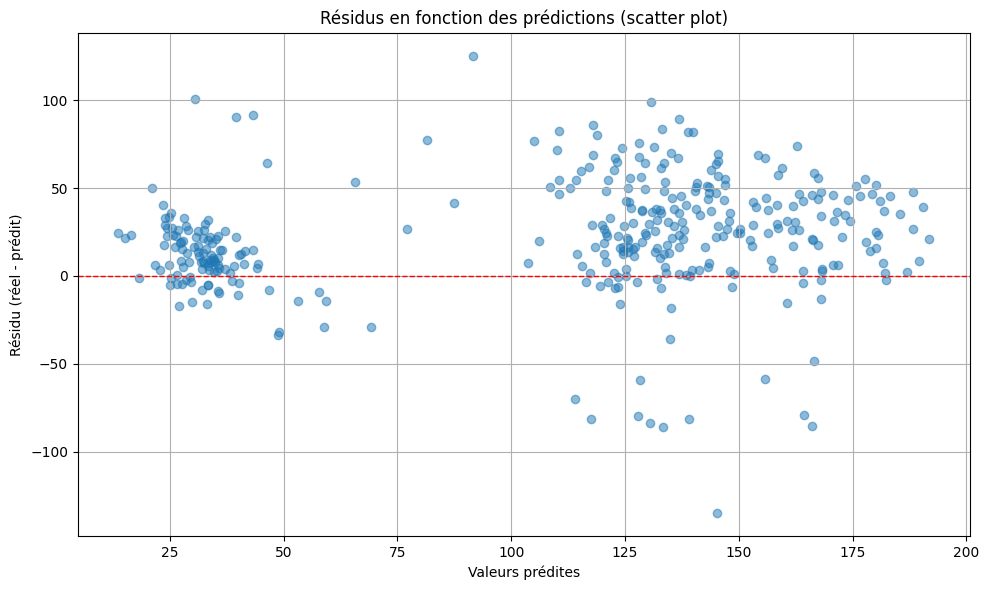

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(all_preds, global_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Résidus en fonction des prédictions (scatter plot)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidu (réel - prédit)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
final_xgb_forecast_corrected['index']= final_xgb_forecast_corrected['date'].astype(str) + "_" + final_xgb_forecast_corrected['station']
final_xgb_forecast_corrected = final_xgb_forecast_corrected[['index', 'y_pred']]
final_xgb_forecast_corrected.rename(columns={'y_pred': 'y'}, inplace=True)
final_xgb_forecast_corrected

index           y
0      2023-01-01_1J7   24.030191
1      2023-01-02_1J7  158.352966
2      2023-01-03_1J7  157.698257
3      2023-01-04_1J7  140.923462
4      2023-01-05_1J7  150.478104
...               ...         ...
78647  2023-06-08_QD6   85.436592
78648  2023-06-09_QD6   79.267632
78649  2023-06-10_QD6   64.558403
78650  2023-06-11_QD6   38.342407
78651  2023-06-12_QD6   76.436203

[78652 rows x 2 columns]

In [33]:
final_xgb_forecast_corrected.to_csv('submission_xgboost_par_gare_features_y_correted_with_mean.csv', index=False)

## Sur les données après le covid

**Score public : 143,6463**

Impossible d'évaluer la mape, car pas assez de données après le covid pour faire un jeu de validation.

In [69]:
df_train = df_train[df_train['date'] >='2021-06-30'] # On garde les données à partir de 2021-06-30

In [70]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Définir les colonnes
features = ['ferie', 'vacances', 'weekday', 'weekofyear','day','job','month','year',
            'quarter', 'lag_365_log']
target = 'y_log'

# Stocker les résultats
all_test_preds = []

# Boucle sur chaque station
for station in df_train['station'].unique():
    try:
        # Split train / validation
        train_data = df_train[(df_train['station'] == station)& (df_train['year'] < 2022)]
        test_data = df_test[(df_test['station'] == station)]

        # Entraîner XGBoost avec des hyperparamètres par défaut
        model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
        model.fit(train_data[features], train_data[target])

        # Prédire sur 2023        
        test_data['y_pred'] = np.expm1(model.predict(test_data[features]))
        all_test_preds.append(test_data[['index','date', 'station', 'y_pred']])

    except Exception as e:
        print(f"Erreur avec la station {station} : {e}")

# Fusionner les résultats test
df_submission_after_covid = pd.concat(all_test_preds, ignore_index=True)

/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_98217/4146650787.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = np.expm1(model.predict(test_data[features]))
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_98217/4146650787.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = np.expm1(model.predict(test_data[features]))
/var/folders/q7/05h3nfts6n3_246h_khmw2z00000gn/T/ipykernel_98217/4146650787.py:27: SettingWithCopyWarning: 
A value is t

In [72]:
df_submission_after_covid.rename(columns={'y_pred': 'y'}, inplace=True)
df_submission_after_covid = df_submission_after_covid[['index', 'y']]
df_submission_after_covid.to_csv('submission_xgboost_par_gare_features_after_covid.csv', index=False)